In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

In [2]:
base_path = '/home/jim/Documents/AI/fact/reproduction/'
sys.path.insert(0, base_path)
from Model import *

In [3]:
model = Model.Initialize('vae', None, pretrained_path=f'{base_path}Models/vae.pt')

Loading the pretrained model...


In [4]:
# sys.path.insert(0, "../Code/")
# from load_scvis import load_vae

path = f'{base_path}/ELDR/Housing/Data/'


data_file = path + 'X.tsv'
target_file = path + 'y.tsv'
input_dim = 13
#model_file = "Model/model/perplexity_10_regularizer_0.001_batch_size_505_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt"
num_clusters = 6

x = pd.read_csv(data_file, sep="\t").values
y = pd.read_csv(target_file, sep="\t").values



data_rep = model.Encode(x)

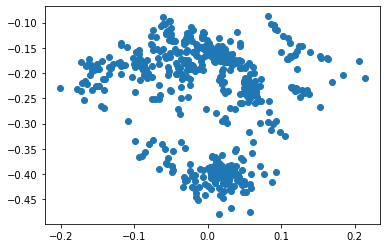

In [5]:
plt.scatter(data_rep[:,0], data_rep[:,1])
plt.show()

In [6]:
from sklearn.cluster import KMeans
num_clusters = 6

# rep = model.Encode(x)
kmeans = KMeans(n_clusters = num_clusters).fit(data_rep)

In [7]:
from eldr.plotter.myplot import *
means, centers, indices = plot_groups(x, data_rep.numpy(), num_clusters, kmeans.labels_, name = "./synth-rep.png")

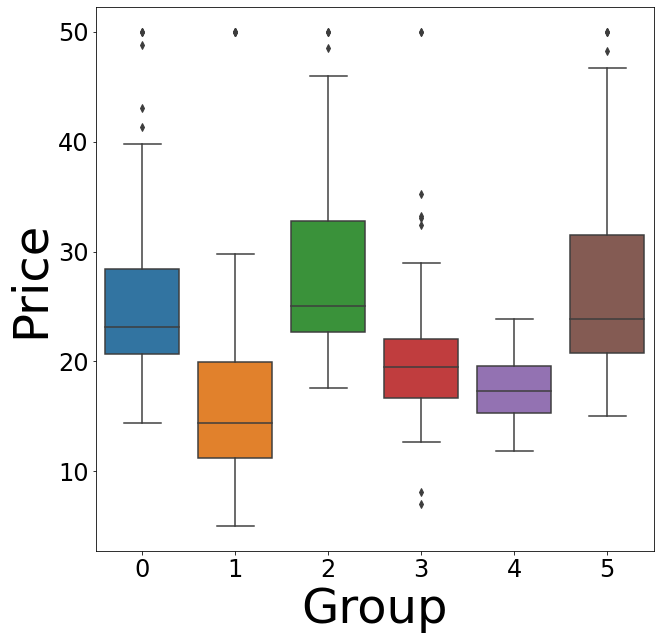

In [8]:
# See what signal is enocded in the clusters
import matplotlib.pyplot as plt
import seaborn as sns

labels = kmeans.labels_

fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(ax = ax, x = labels, y = np.squeeze(y))
ax.set(xlabel = "Group", ylabel = "Price")
ax.get_figure().savefig("housing-labels.png")


In [9]:
from eldr.explain.explain_cs import *
epsilon = 0.05

Explainer = Explain(model, means, centers, use_scaling=True)

if True:
    Explainer.eval_epsilon(torch.tensor(x), indices, epsilon)
    

In [10]:
# with open('./epsilon.txt', 'r') as f:
#     e = f.readlines()
#     print(e)


In [15]:
results_path = f'{base_path}experiments/Housing_scaling/explanations/'
run = True

# Initialize results 
# Columns are:  K, TGT-correctness, TGT-coverage, DBM-correctness, DBM-coverage
K = [1, 3, 5, 7, 9, 11, 13]
if run:
    os.system(f"rm {results_path}*.npy")
    os.system(f"rm {results_path}out.csv")
    
    out = np.zeros((len(K), 5))

    c = 0
    for k in K:
        out[c, 0] = k
        c += 1

In [16]:
import json
from types import SimpleNamespace
best_val = 0.0
ntrials = 1
lg = 1.5
config = SimpleNamespace(**json.load(open(f'{base_path}configs/tgt.json', 'r')))


if run:
    c = 0
    for k in K:

        best_val = 0.0
        for lg in [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]:
            for trial in range(5):
                config.learning_rate = 0.01
                config.lambda_global = lg
                config.consecutive_steps = 5
                print(config)
                Explainer = Explain(model, means, centers, use_scaling=True)
                deltas, logit_gammas, _ = Explainer.explain(config)
                a, b = Explainer.metrics(x, indices, deltas, epsilon, k = k, logit_gammas=logit_gammas) 

                val = np.mean(a)

                if val > best_val:
                    best_val = val
                    out[c, 1] = best_val
                    out[c, 2] = np.mean(b)
                    np.save(f"{results_path}deltas" + str(k) + ".npy", deltas)
                    np.save(f"{results_path}logit_gammas" + str(k) + ".npy", logit_gammas)

                os.system("rm -rf explanation")
        c += 1

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 157, ema: 0.03980999753197582, initial 2, target 5
Retrieving the best deltas...
iter: 158, ema: 0.03949068246389275, initial 2, target 5
Retrieving the best deltas...
iter: 159, ema: 0.03917454345672127, initial 2, target 5
Retrieving the best deltas...
iter: 211, ema: 0.038880353526396495, initial 5, target 3
Retrieving the best deltas...
iter: 212, ema: 0.03866068457818202, initial 5, target 3
Retrieving the best deltas...
iter: 213, ema: 0.038443217590735455, initial 5, target 3
Retrieving the best deltas...
iter: 214, ema: 0.038227930712087195, initial 5, target 3
Retrieving the best deltas...
iter: 229, ema: 0.03804386080553924, initial 1, target 0
Retrieving the best deltas...
iter: 247, ema: 0.03793830726361686, initial 0, target 1
Retrieving the best deltas...
iter: 248, ema: 0.03768515037214507, initial 0, target 1
Retrieving the best deltas...
iter: 249, ema: 0.037434525058901234, initial 0, target 1
Retrieving the best deltas...
iter: 251

Retrieving the best deltas...
iter: 3798, ema: 0.020124438033013288, initial 3, target 0
Retrieving the best deltas...
iter: 3799, ema: 0.019956908882630277, initial 3, target 0
Retrieving the best deltas...
iter: 4540, ema: 0.01974605615976551, initial 2, target 5
Retrieving the best deltas...
iter: 4541, ema: 0.019608289966560086, initial 2, target 5
Retrieving the best deltas...
iter: 4542, ema: 0.019471895959109975, initial 2, target 5
Retrieving the best deltas...
iter: 4543, ema: 0.019336860368991498, initial 2, target 5
Retrieving the best deltas...
iter: 4544, ema: 0.019203169653940852, initial 2, target 5
Retrieving the best deltas...
iter: 4547, ema: 0.01907326474188884, initial 0, target 1
Retrieving the best deltas...
iter: 4550, ema: 0.01884818745587757, initial 1, target 0
Retrieving the best deltas...
iter: 4551, ema: 0.018708988699306008, initial 1, target 0
Retrieving the best deltas...
iter: 4552, ema: 0.018571179955896307, initial 1, target 0
Retrieving the best delt

Retrieving the best deltas...
iter: 629, ema: 0.02728459419108333, initial 2, target 5
Retrieving the best deltas...
iter: 630, ema: 0.027039254696104006, initial 4, target 0
Retrieving the best deltas...
iter: 631, ema: 0.026796342777484404, initial 4, target 0
Retrieving the best deltas...
iter: 632, ema: 0.026555834159460924, initial 4, target 0
Retrieving the best deltas...
iter: 633, ema: 0.026317704860250344, initial 4, target 0
Retrieving the best deltas...
iter: 634, ema: 0.026081931130902358, initial 4, target 0
Retrieving the best deltas...
iter: 842, ema: 0.025845590688466532, initial 3, target 0
Retrieving the best deltas...
iter: 843, ema: 0.025634469586712824, initial 3, target 0
Retrieving the best deltas...
iter: 844, ema: 0.025425440184768715, initial 3, target 0
Retrieving the best deltas...
iter: 845, ema: 0.02528298358879657, initial 5, target 0
Retrieving the best deltas...
iter: 846, ema: 0.02514195123282124, initial 5, target 0
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 944, ema: 0.02421716954165572, initial 2, target 5
Retrieving the best deltas...
iter: 946, ema: 0.024062730225397965, initial 2, target 0
Retrieving the best deltas...
iter: 948, ema: 0.023911420518318408, initial 2, target 0
Retrieving the best deltas...
iter: 950, ema: 0.023763178122940477, initial 2, target 0
Retrieving the best deltas...
iter: 952, ema: 0.023617942055640665, initial 2, target 0
Retrieving the best deltas...
iter: 954, ema: 0.023475652453237322, initial 2, target 0
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

Retrieving the best deltas...
iter: 172, ema: 0.03199728092080067, initial 3, target 0
Retrieving the best deltas...
iter: 173, ema: 0.031728127995647025, initial 3, target 0
Retrieving the best deltas...
iter: 174, ema: 0.031461649626390996, initial 3, target 0
Retrieving the best deltas...
iter: 175, ema: 0.031185623130603777, initial 1, target 0
Retrieving the best deltas...
iter: 176, ema: 0.030912345104574017, initial 1, target 0
Retrieving the best deltas...
iter: 177, ema: 0.03064178807757399, initial 1, target 0
Retrieving the best deltas...
iter: 178, ema: 0.030373924881522907, initial 1, target 0
Retrieving the best deltas...
iter: 179, ema: 0.03010872862700572, initial 1, target 0
Retrieving the best deltas...
iter: 189, ema: 0.029997786262426107, initial 0, target 3
Retrieving the best deltas...
iter: 190, ema: 0.029779343400155898, initial 2, target 5
Retrieving the best deltas...
iter: 191, ema: 0.02956306647044206, initial 2, target 5
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 159, ema: 0.22332222918806338, initial 1, target 5
Retrieving the best deltas...
iter: 160, ema: 0.22126747657643245, initial 5, target 3
Retrieving the best deltas...
iter: 161, ema: 0.21923070031418027, initial 5, target 3
Retrieving the best deltas...
iter: 162, ema: 0.2172128450608103, initial 5, target 3
Retrieving the best deltas...
iter: 163, ema: 0.21521250159228741, initial 5, target 3
Retrieving the best deltas...
iter: 164, ema: 0.21323092384937456, initial 5, target 3
Retrieving the best deltas...
iter: 165, ema: 0.21121099999748189, initial 3, target 4
Retrieving the best deltas...
iter: 166, ema: 0.2092104437782416, initial 3, target 4
Retrieving the best deltas...
iter: 167, ema: 0.20723160414702782, initial 3, target 4
Retrieving the best deltas...
iter: 168, ema: 0.20527076674718675, initial 3, target 4
Retrieving the best deltas...
iter: 169, ema: 0.20333045085518883, initial 3, target 4
Retrieving the best deltas...
iter: 170, ema:

Retrieving the best deltas...
iter: 152, ema: 0.21445997716502382, initial 5, target 1
Retrieving the best deltas...
iter: 153, ema: 0.2129585720092145, initial 5, target 1
Retrieving the best deltas...
iter: 154, ema: 0.21147304599187638, initial 5, target 1
Retrieving the best deltas...
iter: 155, ema: 0.2099191198021655, initial 4, target 1
Retrieving the best deltas...
iter: 156, ema: 0.2083809050572693, initial 4, target 1
Retrieving the best deltas...
iter: 157, ema: 0.2068586869092039, initial 4, target 1
Retrieving the best deltas...
iter: 158, ema: 0.20535180139747652, initial 4, target 1
Retrieving the best deltas...
iter: 159, ema: 0.2038589099201095, initial 4, target 1
Retrieving the best deltas...
iter: 160, ema: 0.2020855086096631, initial 3, target 2
Retrieving the best deltas...
iter: 161, ema: 0.200329329699578, initial 3, target 2
Retrieving the best deltas...
iter: 162, ema: 0.19858769567087203, initial 3, target 2
Retrieving the best deltas...
iter: 163, ema: 0.196

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 208, ema: 0.2421884718046646, initial 5, target 1
Retrieving the best deltas...
iter: 209, ema: 0.24041383042246106, initial 5, target 1
Retrieving the best deltas...
iter: 210, ema: 0.23865617102451028, initial 5, target 1
Retrieving the best deltas...
iter: 211, ema: 0.23691274946636193, initial 5, target 1
Retrieving the best deltas...
iter: 212, ema: 0.23518683700213006, initial 5, target 1
Retrieving the best deltas...
iter: 213, ema: 0.23347837529147347, initial 5, target 1
Retrieving the best deltas...
iter: 214, ema: 0.23178642189551427, initial 5, target 1
Retrieving the best deltas...
iter: 215, ema: 0.22972990145001357, initial 3, target 1
Retrieving the best deltas...
iter: 216, ema: 0.22769211638362616, initial 3, target 1
Retrieving the best deltas...
iter: 217, ema: 0.2256722306391348, initial 3, target 1
Retrieving the best deltas...
iter: 218, ema: 0.2236729809521578, initial 3, target 1
Retrieving the best deltas...
iter: 219, ema: 

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 172, ema: 0.5036481682516986, initial 4, target 2
Retrieving the best deltas...
iter: 173, ema: 0.4992033639219677, initial 4, target 2
Retrieving the best deltas...
iter: 174, ema: 0.4948001709759834, initial 4, target 2
Retrieving the best deltas...
iter: 175, ema: 0.49050087924885716, initial 5, target 1
Retrieving the best deltas...
iter: 176, ema: 0.4862434660556623, initial 5, target 1
Retrieving the best deltas...
iter: 177, ema: 0.4820306203972381, initial 5, target 1
Retrieving the best deltas...
iter: 178, ema: 0.47785635135461596, initial 5, target 1
Retrieving the best deltas...
iter: 179, ema: 0.4737282555646778, initial 5, target 1
Retrieving the best deltas...
iter: 180, ema: 0.46960369989113115, initial 1, target 4
Retrieving the best deltas...
iter: 181, ema: 0.46551443750548105, initial 1, target 4
Retrieving the best deltas...
iter: 182, ema: 0.46146427174398164, initial 1, target 4
Retrieving the best deltas...
iter: 183, ema: 0.4

Retrieving the best deltas...
iter: 3517, ema: 0.1881203921224073, initial 2, target 5
Retrieving the best deltas...
iter: 3518, ema: 0.18632589480785444, initial 2, target 5
Retrieving the best deltas...
iter: 3519, ema: 0.18455198764607644, initial 2, target 5
Retrieving the best deltas...
iter: 3520, ema: 0.18332185644613985, initial 2, target 4
Retrieving the best deltas...
iter: 3521, ema: 0.18209429971347463, initial 2, target 4
Retrieving the best deltas...
iter: 3522, ema: 0.18088687186986713, initial 2, target 4
Retrieving the best deltas...
iter: 3523, ema: 0.1796855094114443, initial 2, target 4
Retrieving the best deltas...
iter: 3524, ema: 0.17850029654390664, initial 2, target 4
Retrieving the best deltas...
iter: 3525, ema: 0.17699036208506605, initial 3, target 1
Retrieving the best deltas...
iter: 3526, ema: 0.17549009976301608, initial 3, target 1
Retrieving the best deltas...
iter: 3527, ema: 0.17399834811254222, initial 3, target 1
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 163, ema: 0.6981639047105488, initial 2, target 1
Retrieving the best deltas...
iter: 164, ema: 0.6917523738461716, initial 2, target 1
Retrieving the best deltas...
iter: 165, ema: 0.685402967346291, initial 2, target 1
Retrieving the best deltas...
iter: 166, ema: 0.6791189965699658, initial 2, target 1
Retrieving the best deltas...
iter: 167, ema: 0.6728959607604741, initial 2, target 1
Retrieving the best deltas...
iter: 168, ema: 0.6667370108389221, initial 2, target 1
Retrieving the best deltas...
iter: 169, ema: 0.6606378315808503, initial 2, target 1
Retrieving the best deltas...
iter: 170, ema: 0.6544250117076345, initial 2, target 3
Retrieving the best deltas...
iter: 171, ema: 0.6482537038668571, initial 2, target 3
Retrieving the best deltas...
iter: 172, ema: 0.6421318816958996, initial 2, target 3
Retrieving the best deltas...
iter: 173, ema: 0.6360474854351026, initial 2, target 3
Retrieving the best deltas...
iter: 174, ema: 0.6300146

Retrieving the best deltas...
iter: 3254, ema: 0.2997959097186782, initial 5, target 3
Retrieving the best deltas...
iter: 3835, ema: 0.2992210293162882, initial 3, target 2
Retrieving the best deltas...
iter: 3836, ema: 0.29650858092983856, initial 3, target 2
Retrieving the best deltas...
iter: 3837, ema: 0.293815040769115, initial 3, target 2
Retrieving the best deltas...
iter: 3838, ema: 0.29115881446387926, initial 3, target 2
Retrieving the best deltas...
iter: 3839, ema: 0.2885166484964658, initial 3, target 2
Retrieving the best deltas...
iter: 3859, ema: 0.2858693403165023, initial 5, target 3
Retrieving the best deltas...
iter: 3860, ema: 0.28362581512718155, initial 2, target 4
Retrieving the best deltas...
iter: 3861, ema: 0.28140951319361596, initial 2, target 4
Retrieving the best deltas...
iter: 3862, ema: 0.2792134721834125, initial 2, target 4
Retrieving the best deltas...
iter: 3863, ema: 0.2770418887944098, initial 2, target 4
Retrieving the best deltas...
iter: 3864

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 146, ema: 0.8483577808949648, initial 3, target 2
Retrieving the best deltas...
iter: 147, ema: 0.840156704533961, initial 3, target 2
Retrieving the best deltas...
iter: 148, ema: 0.8320452155251085, initial 3, target 2
Retrieving the best deltas...
iter: 149, ema: 0.824009941457509, initial 3, target 2
Retrieving the best deltas...
iter: 184, ema: 0.8174779703851616, initial 4, target 3
Retrieving the best deltas...
iter: 185, ema: 0.8096471637218907, initial 3, target 2
Retrieving the best deltas...
iter: 186, ema: 0.8018686317535656, initial 3, target 2
Retrieving the best deltas...
iter: 187, ema: 0.7941312156196527, initial 3, target 2
Retrieving the best deltas...
iter: 188, ema: 0.7864840135678979, initial 3, target 2
Retrieving the best deltas...
iter: 189, ema: 0.7788978109531878, initial 3, target 2
Retrieving the best deltas...
iter: 202, ema: 0.7754879740576962, initial 3, target 5
Retrieving the best deltas...
iter: 203, ema: 0.76800565

Retrieving the best deltas...
iter: 2339, ema: 0.3511005847940656, initial 2, target 1
Retrieving the best deltas...
iter: 3220, ema: 0.3483981229854122, initial 3, target 5
Retrieving the best deltas...
iter: 3221, ema: 0.34509332732484443, initial 3, target 5
Retrieving the best deltas...
iter: 3222, ema: 0.3417950993447447, initial 3, target 5
Retrieving the best deltas...
iter: 3223, ema: 0.3385551062884187, initial 3, target 5
Retrieving the best deltas...
iter: 3224, ema: 0.33532338750281754, initial 3, target 5
Retrieving the best deltas...
iter: 3697, ema: 0.3341614539842295, initial 4, target 3
Retrieving the best deltas...
iter: 3698, ema: 0.330919473711777, initial 4, target 3
Retrieving the best deltas...
iter: 3699, ema: 0.32774340479392505, initial 4, target 3
Retrieving the best deltas...
iter: 3700, ema: 0.3246110930803469, initial 3, target 5
Retrieving the best deltas...
iter: 3701, ema: 0.3215514049706778, initial 3, target 5
Retrieving the best deltas...
iter: 3702,

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 159, ema: 0.9365315964279767, initial 5, target 2
Retrieving the best deltas...
iter: 160, ema: 0.9275980541262641, initial 3, target 5
Retrieving the best deltas...
iter: 161, ema: 0.9186755690636315, initial 3, target 5
Retrieving the best deltas...
iter: 162, ema: 0.9097639948117691, initial 3, target 5
Retrieving the best deltas...
iter: 163, ema: 0.9008950051355439, initial 3, target 5
Retrieving the best deltas...
iter: 164, ema: 0.8920682312047676, initial 3, target 5
Retrieving the best deltas...
iter: 165, ema: 0.883799128242953, initial 5, target 1
Retrieving the best deltas...
iter: 166, ema: 0.8756713066334895, initial 5, target 1
Retrieving the best deltas...
iter: 167, ema: 0.8675670046256997, initial 5, target 1
Retrieving the best deltas...
iter: 168, ema: 0.8596043074588524, initial 5, target 1
Retrieving the best deltas...
iter: 169, ema: 0.8516633748626651, initial 5, target 1
Retrieving the best deltas...
iter: 170, ema: 0.8439660

Retrieving the best deltas...
iter: 2844, ema: 0.37371510219643433, initial 5, target 2
Retrieving the best deltas...
iter: 2845, ema: 0.3703956027085505, initial 4, target 5
Retrieving the best deltas...
iter: 2846, ema: 0.36705458614353065, initial 4, target 5
Retrieving the best deltas...
iter: 2847, ema: 0.363703360431815, initial 4, target 5
Retrieving the best deltas...
iter: 2848, ema: 0.36038777784326725, initial 4, target 5
Retrieving the best deltas...
iter: 2849, ema: 0.35710399585724734, initial 4, target 5
Retrieving the best deltas...
iter: 3926, ema: 0.35388199594688513, initial 3, target 4
Retrieving the best deltas...
iter: 3927, ema: 0.350519549241924, initial 3, target 4
Retrieving the best deltas...
iter: 3928, ema: 0.3471432212080569, initial 3, target 4
Retrieving the best deltas...
iter: 3929, ema: 0.3438540811593484, initial 3, target 4
Retrieving the best deltas...
iter: 3964, ema: 0.34372364848685766, initial 5, target 1
Retrieving the best deltas...
iter: 396

Retrieving the best deltas...
iter: 5958, ema: 0.16356575648442323, initial 2, target 4
Retrieving the best deltas...
iter: 5959, ema: 0.16260156215579172, initial 2, target 4
Retrieving the best deltas...
iter: 5960, ema: 0.16161000705795836, initial 4, target 1
Retrieving the best deltas...
iter: 5961, ema: 0.16061585530407207, initial 4, target 1
Retrieving the best deltas...
iter: 5962, ema: 0.15960471419909902, initial 4, target 1
Retrieving the best deltas...
iter: 5963, ema: 0.15862252884889758, initial 4, target 1
Retrieving the best deltas...
iter: 5964, ema: 0.15763839563277626, initial 4, target 1
Retrieving the best deltas...
iter: 5965, ema: 0.1561736458116948, initial 5, target 2
Retrieving the best deltas...
iter: 5966, ema: 0.15479328528180097, initial 5, target 2
Retrieving the best deltas...
iter: 5967, ema: 0.15335317863767872, initial 5, target 2
Retrieving the best deltas...
iter: 5968, ema: 0.15200464173141195, initial 5, target 2
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 6854, ema: 0.07807606857175627, initial 3, target 5
Retrieving the best deltas...
iter: 6950, ema: 0.07796380656532065, initial 5, target 3
Retrieving the best deltas...
iter: 6951, ema: 0.07743193874951104, initial 5, target 3
Retrieving the best deltas...
iter: 6952, ema: 0.07684336963786623, initial 5, target 3
Retrieving the best deltas...
iter: 6953, ema: 0.07632306050369145, initial 5, target 3
Retrieving the best deltas...
iter: 6954, ema: 0.0757452557948521, initial 5, target 3
Retrieving the best deltas...
iter: 6955, ema: 0.07561231354749384, initial 4, target 2
Retrieving the best deltas...
iter: 6956, ema: 0.07549158896384062, initial 4, target 2
Retrieving the best deltas...
iter: 6957, ema: 0.07536469912751165, initial 4, target 2
Retrieving the best deltas...
iter: 6958, ema: 0.07524296344380985, initial 4, target 2
Retrieving the best deltas...
iter: 6959, ema: 0.075122077281781, initial 4, target 2
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 7633, ema: 0.03920115335348219, initial 0, target 5
Retrieving the best deltas...
iter: 7634, ema: 0.03888824631052554, initial 0, target 5
Retrieving the best deltas...
iter: 7635, ema: 0.03878054197911984, initial 1, target 3
Retrieving the best deltas...
iter: 7637, ema: 0.0386000475370785, initial 1, target 3
Retrieving the best deltas...
iter: 7639, ema: 0.038421436087894514, initial 1, target 3
Retrieving the best deltas...
iter: 7641, ema: 0.038303417772695, initial 5, target 4
Retrieving the best deltas...
iter: 7643, ema: 0.03818782698582882, initial 5, target 4
Retrieving the best deltas...
iter: 7645, ema: 0.0379327962676187, initial 3, target 5
Retrieving the best deltas...
iter: 7646, ema: 0.037749039936135674, initial 3, target 5
Retrieving the best deltas...
iter: 7647, ema: 0.03754652550939695, initial 3, target 5
Retrieving the best deltas...
iter: 7648, ema: 0.03736846916141844, initial 3, target 5
Retrieving the best deltas...
iter

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 173, ema: 1.1291456463639715, initial 2, target 1
Retrieving the best deltas...
iter: 174, ema: 1.1186223958708577, initial 2, target 1
Retrieving the best deltas...
iter: 186, ema: 1.1121422533052323, initial 5, target 1
Retrieving the best deltas...
iter: 187, ema: 1.1016900279143043, initial 5, target 1
Retrieving the best deltas...
iter: 188, ema: 1.0913683415341775, initial 5, target 1
Retrieving the best deltas...
iter: 189, ema: 1.0811204558590568, initial 5, target 1
Retrieving the best deltas...
iter: 201, ema: 1.0759803455200592, initial 1, target 3
Retrieving the best deltas...
iter: 202, ema: 1.0656101015573274, initial 1, target 3
Retrieving the best deltas...
iter: 203, ema: 1.0552654009105638, initial 1, target 3
Retrieving the best deltas...
iter: 204, ema: 1.0449934927132185, initial 1, target 3
Retrieving the best deltas...
iter: 205, ema: 1.0351564374795945, initial 4, target 1
Retrieving the best deltas...
iter: 206, ema: 1.025389

Retrieving the best deltas...
iter: 2481, ema: 0.46614866057008847, initial 4, target 3
Retrieving the best deltas...
iter: 2482, ema: 0.4615951732407574, initial 4, target 3
Retrieving the best deltas...
iter: 2483, ema: 0.45713633028089584, initial 4, target 3
Retrieving the best deltas...
iter: 2484, ema: 0.4526706620227087, initial 4, target 3
Retrieving the best deltas...
iter: 2719, ema: 0.44974232847493795, initial 3, target 2
Retrieving the best deltas...
iter: 3725, ema: 0.4481644968280194, initial 2, target 4
Retrieving the best deltas...
iter: 3726, ema: 0.444444160976818, initial 2, target 4
Retrieving the best deltas...
iter: 3727, ema: 0.4407163244045006, initial 2, target 4
Retrieving the best deltas...
iter: 3728, ema: 0.4369809683154687, initial 2, target 4
Retrieving the best deltas...
iter: 3729, ema: 0.43322950645593383, initial 2, target 4
Retrieving the best deltas...
iter: 3784, ema: 0.4301056487517214, initial 4, target 1
Retrieving the best deltas...
iter: 3785

Retrieving the best deltas...
iter: 5996, ema: 0.16266109639747103, initial 2, target 1
Retrieving the best deltas...
iter: 5997, ema: 0.16161722793827185, initial 2, target 1
Retrieving the best deltas...
iter: 5998, ema: 0.1606207892905, initial 2, target 1
Retrieving the best deltas...
iter: 5999, ema: 0.15959741532099445, initial 2, target 1
Retrieving the best deltas...
iter: 6413, ema: 0.15833951862537302, initial 5, target 3
Retrieving the best deltas...
iter: 6414, ema: 0.15696829805587334, initial 5, target 3
Retrieving the best deltas...
iter: 6415, ema: 0.15565734790455754, initial 1, target 3
Retrieving the best deltas...
iter: 6416, ema: 0.15443014723384918, initial 1, target 3
Retrieving the best deltas...
iter: 6417, ema: 0.15313542139879163, initial 1, target 3
Retrieving the best deltas...
iter: 6418, ema: 0.15194090662973903, initial 1, target 3
Retrieving the best deltas...
iter: 6419, ema: 0.1506805281737646, initial 1, target 3
Retrieving the best deltas...
iter: 6

Retrieving the best deltas...
iter: 7378, ema: 0.06842173359725819, initial 4, target 3
Retrieving the best deltas...
iter: 7379, ema: 0.06787950471380955, initial 4, target 3
Retrieving the best deltas...
iter: 7380, ema: 0.06768358276373357, initial 5, target 4
Retrieving the best deltas...
iter: 7381, ema: 0.06741820316339879, initial 5, target 4
Retrieving the best deltas...
iter: 7382, ema: 0.06712659086204664, initial 5, target 4
Retrieving the best deltas...
iter: 7383, ema: 0.06677352662198668, initial 5, target 4
Retrieving the best deltas...
iter: 7384, ema: 0.06643685775557952, initial 5, target 4
Retrieving the best deltas...
iter: 7398, ema: 0.06627741857759661, initial 5, target 0
Retrieving the best deltas...
iter: 7399, ema: 0.0660389280602195, initial 5, target 0
Retrieving the best deltas...
iter: 7404, ema: 0.06593865318113243, initial 1, target 2
Retrieving the best deltas...
iter: 7405, ema: 0.06568764478100875, initial 4, target 5
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 7999, ema: 0.03414431118558083, initial 5, target 0
Retrieving the best deltas...
iter: 8000, ema: 0.03398485388784937, initial 3, target 4
Retrieving the best deltas...
iter: 8001, ema: 0.033784055208688366, initial 3, target 4
Retrieving the best deltas...
iter: 8002, ema: 0.03362043581090384, initial 3, target 4
Retrieving the best deltas...
iter: 8003, ema: 0.03343056204781128, initial 3, target 4
Retrieving the best deltas...
iter: 8004, ema: 0.03326272631423216, initial 3, target 4
Retrieving the best deltas...
iter: 8005, ema: 0.0330812738552856, initial 0, target 3
Retrieving the best deltas...
iter: 8006, ema: 0.032884309586437135, initial 0, target 3
Retrieving the best deltas...
iter: 8007, ema: 0.03269849241781838, initial 0, target 3
Retrieving the best deltas...
iter: 8008, ema: 0.03250824148007752, initial 0, target 3
Retrieving the best deltas...
iter: 8009, ema: 0.03232308440546727, initial 0, target 3
Retrieving the best deltas...
i

Retrieving the best deltas...
iter: 165, ema: 1.1810632834757626, initial 2, target 1
Retrieving the best deltas...
iter: 166, ema: 1.1698911107854055, initial 2, target 1
Retrieving the best deltas...
iter: 167, ema: 1.1587725483107811, initial 2, target 1
Retrieving the best deltas...
iter: 168, ema: 1.147797574035919, initial 2, target 1
Retrieving the best deltas...
iter: 169, ema: 1.1369000173740291, initial 2, target 1
Retrieving the best deltas...
iter: 170, ema: 1.125867788733182, initial 2, target 3
Retrieving the best deltas...
iter: 171, ema: 1.1149526082786185, initial 2, target 3
Retrieving the best deltas...
iter: 172, ema: 1.104137590279593, initial 2, target 3
Retrieving the best deltas...
iter: 173, ema: 1.0934420826215643, initial 2, target 3
Retrieving the best deltas...
iter: 174, ema: 1.0828399069887704, initial 2, target 3
Retrieving the best deltas...
iter: 175, ema: 1.0722173055091981, initial 2, target 5
Retrieving the best deltas...
iter: 176, ema: 1.061618620

Retrieving the best deltas...
iter: 3070, ema: 0.38753999275665535, initial 5, target 2
Retrieving the best deltas...
iter: 3071, ema: 0.38380505495567163, initial 5, target 2
Retrieving the best deltas...
iter: 3072, ema: 0.3801126895480211, initial 5, target 2
Retrieving the best deltas...
iter: 3073, ema: 0.37644882143924896, initial 5, target 2
Retrieving the best deltas...
iter: 3074, ema: 0.37283305940505224, initial 5, target 2
Retrieving the best deltas...
iter: 3075, ema: 0.3696097156038045, initial 4, target 5
Retrieving the best deltas...
iter: 3076, ema: 0.366402576843784, initial 4, target 5
Retrieving the best deltas...
iter: 3077, ema: 0.36314363407600614, initial 4, target 5
Retrieving the best deltas...
iter: 3078, ema: 0.3599027886860927, initial 4, target 5
Retrieving the best deltas...
iter: 3079, ema: 0.35660896656906865, initial 4, target 5
Retrieving the best deltas...
iter: 3313, ema: 0.35640238551090553, initial 5, target 3
Retrieving the best deltas...
iter: 3

Retrieving the best deltas...
iter: 6069, ema: 0.16747478072914826, initial 4, target 5
Retrieving the best deltas...
iter: 6070, ema: 0.1661189438484372, initial 4, target 5
Retrieving the best deltas...
iter: 6071, ema: 0.1647845815784175, initial 4, target 5
Retrieving the best deltas...
iter: 6072, ema: 0.1634565434410944, initial 4, target 5
Retrieving the best deltas...
iter: 6073, ema: 0.16214794105681046, initial 4, target 5
Retrieving the best deltas...
iter: 6074, ema: 0.16084716562954923, initial 4, target 5
Retrieving the best deltas...
iter: 6075, ema: 0.15956379346383667, initial 4, target 5
Retrieving the best deltas...
iter: 6076, ema: 0.15828975540756907, initial 4, target 5
Retrieving the best deltas...
iter: 6077, ema: 0.15703109423156705, initial 4, target 5
Retrieving the best deltas...
iter: 6078, ema: 0.15578327850389248, initial 4, target 5
Retrieving the best deltas...
iter: 6079, ema: 0.15454881935694703, initial 4, target 5
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 7459, ema: 0.0888806315679021, initial 3, target 5
Retrieving the best deltas...
iter: 7523, ema: 0.0883427967682095, initial 2, target 5
Retrieving the best deltas...
iter: 7524, ema: 0.0875815232487088, initial 2, target 5
Retrieving the best deltas...
iter: 7539, ema: 0.0874103583422585, initial 1, target 4
Retrieving the best deltas...
iter: 7571, ema: 0.08726940405318223, initial 4, target 2
Retrieving the best deltas...
iter: 7572, ema: 0.08702514324018948, initial 4, target 2
Retrieving the best deltas...
iter: 7573, ema: 0.08678837429379718, initial 4, target 2
Retrieving the best deltas...
iter: 7574, ema: 0.08655248850868487, initial 4, target 2
Retrieving the best deltas...
iter: 7575, ema: 0.08629370441122333, initial 1, target 3
Retrieving the best deltas...
iter: 7576, ema: 0.08600757593147601, initial 1, target 3
Retrieving the best deltas...
iter: 7577, ema: 0.08564039817442813, initial 1, target 3
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 7846, ema: 0.05507410616553708, initial 3, target 1
Retrieving the best deltas...
iter: 7847, ema: 0.05484890846280372, initial 3, target 1
Retrieving the best deltas...
iter: 7848, ema: 0.054575596625997966, initial 3, target 1
Retrieving the best deltas...
iter: 7849, ema: 0.05436565434598963, initial 3, target 1
Retrieving the best deltas...
iter: 7850, ema: 0.054081998348061246, initial 1, target 3
Retrieving the best deltas...
iter: 7851, ema: 0.05386663406742191, initial 1, target 3
Retrieving the best deltas...
iter: 7852, ema: 0.05359918767319173, initial 1, target 3
Retrieving the best deltas...
iter: 7853, ema: 0.053375620657354496, initial 1, target 3
Retrieving the best deltas...
iter: 7854, ema: 0.05312428509718021, initial 1, target 3
Retrieving the best deltas...
iter: 7864, ema: 0.05294070125089866, initial 5, target 4
Retrieving the best deltas...
iter: 7865, ema: 0.05258411879998559, initial 3, target 4
Retrieving the best deltas...

Retrieving the best deltas...
iter: 8581, ema: 0.03132334296207664, initial 2, target 5
Retrieving the best deltas...
iter: 8582, ema: 0.0311269572301013, initial 2, target 5
Retrieving the best deltas...
iter: 8583, ema: 0.030959004623350474, initial 2, target 5
Retrieving the best deltas...
iter: 8584, ema: 0.030763463324462774, initial 2, target 5
Retrieving the best deltas...
iter: 8630, ema: 0.03050929502490328, initial 0, target 3
Retrieving the best deltas...
iter: 8631, ema: 0.030336439682267454, initial 0, target 3
Retrieving the best deltas...
iter: 8632, ema: 0.03017837122764699, initial 0, target 3
Retrieving the best deltas...
iter: 8633, ema: 0.030006641497509152, initial 0, target 3
Retrieving the best deltas...
iter: 8634, ema: 0.029854346005165087, initial 0, target 3
Retrieving the best deltas...
iter: 8637, ema: 0.029752098424334007, initial 0, target 2
Retrieving the best deltas...
iter: 8659, ema: 0.029643463198778898, initial 0, target 2
Retrieving the best deltas

Retrieving the best deltas...
iter: 165, ema: 1.3978124939828276, initial 2, target 5
Retrieving the best deltas...
iter: 166, ema: 1.3840112168808647, initial 2, target 5
Retrieving the best deltas...
iter: 167, ema: 1.3702761218469757, initial 2, target 5
Retrieving the best deltas...
iter: 168, ema: 1.3567478876477683, initial 2, target 5
Retrieving the best deltas...
iter: 169, ema: 1.3432876703563623, initial 2, target 5
Retrieving the best deltas...
iter: 170, ema: 1.330063610143866, initial 5, target 3
Retrieving the best deltas...
iter: 171, ema: 1.3170114806890307, initial 5, target 3
Retrieving the best deltas...
iter: 172, ema: 1.3040499068693638, initial 5, target 3
Retrieving the best deltas...
iter: 173, ema: 1.2912582106637316, initial 5, target 3
Retrieving the best deltas...
iter: 174, ema: 1.2785538940591001, initial 5, target 3
Retrieving the best deltas...
iter: 175, ema: 1.2665016581736763, initial 5, target 1
Retrieving the best deltas...
iter: 176, ema: 1.2545054

Retrieving the best deltas...
iter: 2964, ema: 0.447286714752098, initial 3, target 2
Retrieving the best deltas...
iter: 2984, ema: 0.44471733699439314, initial 4, target 2
Retrieving the best deltas...
iter: 2985, ema: 0.44072598865525286, initial 1, target 3
Retrieving the best deltas...
iter: 2986, ema: 0.43674956619130967, initial 1, target 3
Retrieving the best deltas...
iter: 2987, ema: 0.4327156370832873, initial 1, target 3
Retrieving the best deltas...
iter: 2988, ema: 0.4286771231338192, initial 1, target 3
Retrieving the best deltas...
iter: 2989, ema: 0.42472346598261207, initial 1, target 3
Retrieving the best deltas...
iter: 2990, ema: 0.420760149032971, initial 4, target 3
Retrieving the best deltas...
iter: 2991, ema: 0.41678786807719836, initial 4, target 3
Retrieving the best deltas...
iter: 2992, ema: 0.4127674418905559, initial 4, target 3
Retrieving the best deltas...
iter: 2993, ema: 0.40879433290469064, initial 4, target 3
Retrieving the best deltas...
iter: 299

Retrieving the best deltas...
iter: 4288, ema: 0.14480639706623127, initial 1, target 2
Retrieving the best deltas...
iter: 4289, ema: 0.14400567269291334, initial 1, target 2
Retrieving the best deltas...
iter: 5479, ema: 0.14338246334731414, initial 4, target 1
Retrieving the best deltas...
iter: 5584, ema: 0.14273343326162433, initial 2, target 3
Retrieving the best deltas...
iter: 5668, ema: 0.14207116628718838, initial 1, target 5
Retrieving the best deltas...
iter: 5669, ema: 0.14133028210582474, initial 1, target 5
Retrieving the best deltas...
iter: 5908, ema: 0.14013114721773046, initial 4, target 3
Retrieving the best deltas...
iter: 5909, ema: 0.1389138472607831, initial 4, target 3
Retrieving the best deltas...
iter: 5910, ema: 0.13788320446320265, initial 5, target 4
Retrieving the best deltas...
iter: 5911, ema: 0.1368348888910295, initial 5, target 4
Retrieving the best deltas...
iter: 5912, ema: 0.13583018417735065, initial 5, target 4
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 6553, ema: 0.05596586041562256, initial 3, target 4
Retrieving the best deltas...
iter: 6554, ema: 0.055557855939451575, initial 3, target 4
Retrieving the best deltas...
iter: 6556, ema: 0.055250378146613245, initial 1, target 3
Retrieving the best deltas...
iter: 6557, ema: 0.05503620414971924, initial 1, target 3
Retrieving the best deltas...
iter: 6558, ema: 0.0547798262978516, initial 1, target 3
Retrieving the best deltas...
iter: 6559, ema: 0.05456596048677691, initial 1, target 3
Retrieving the best deltas...
iter: 6571, ema: 0.054392508486911274, initial 3, target 0
Retrieving the best deltas...
iter: 6572, ema: 0.05401746839464165, initial 3, target 0
Retrieving the best deltas...
iter: 6573, ema: 0.05358575777290913, initial 3, target 0
Retrieving the best deltas...
iter: 6574, ema: 0.05319541797841952, initial 3, target 0
Retrieving the best deltas...
iter: 6575, ema: 0.053031372648947556, initial 5, target 4
Retrieving the best deltas...

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 159, ema: 1.3763677986150769, initial 2, target 5
Retrieving the best deltas...
iter: 160, ema: 1.3635171719212262, initial 2, target 1
Retrieving the best deltas...
iter: 161, ema: 1.3506739624977846, initial 2, target 1
Retrieving the best deltas...
iter: 162, ema: 1.337850698233081, initial 2, target 1
Retrieving the best deltas...
iter: 163, ema: 1.3251238091204847, initial 2, target 1
Retrieving the best deltas...
iter: 164, ema: 1.3124519554456215, initial 2, target 1
Retrieving the best deltas...
iter: 165, ema: 1.3000194236142775, initial 4, target 2
Retrieving the best deltas...
iter: 166, ema: 1.2876109743449395, initial 4, target 2
Retrieving the best deltas...
iter: 167, ema: 1.2754316884964678, initial 4, target 2
Retrieving the best deltas...
iter: 168, ema: 1.263266038929728, initial 4, target 2
Retrieving the best deltas...
iter: 169, ema: 1.2513333041121109, initial 4, target 2
Retrieving the best deltas...
iter: 181, ema: 1.24799071

Retrieving the best deltas...
iter: 1931, ema: 0.4386042552262118, initial 1, target 2
Retrieving the best deltas...
iter: 1932, ema: 0.4348460497805352, initial 1, target 2
Retrieving the best deltas...
iter: 1933, ema: 0.43111327106509467, initial 1, target 2
Retrieving the best deltas...
iter: 1934, ema: 0.427435494255089, initial 1, target 2
Retrieving the best deltas...
iter: 2491, ema: 0.4257995904962014, initial 5, target 4
Retrieving the best deltas...
iter: 2492, ema: 0.42187050099323126, initial 5, target 4
Retrieving the best deltas...
iter: 2493, ema: 0.41800281455366245, initial 5, target 4
Retrieving the best deltas...
iter: 2494, ema: 0.4141476496780509, initial 5, target 4
Retrieving the best deltas...
iter: 2495, ema: 0.4107130254087198, initial 4, target 1
Retrieving the best deltas...
iter: 2496, ema: 0.4072796335746422, initial 4, target 1
Retrieving the best deltas...
iter: 2497, ema: 0.4037822055315255, initial 4, target 1
Retrieving the best deltas...
iter: 2498,

Retrieving the best deltas...
iter: 5378, ema: 0.20481670085505713, initial 5, target 2
Retrieving the best deltas...
iter: 5379, ema: 0.20292006077445457, initial 5, target 2
Retrieving the best deltas...
iter: 5394, ema: 0.201023707487529, initial 3, target 4
Retrieving the best deltas...
iter: 5395, ema: 0.199197422658515, initial 5, target 2
Retrieving the best deltas...
iter: 5396, ema: 0.1973523615505903, initial 5, target 2
Retrieving the best deltas...
iter: 5397, ema: 0.19556721163486868, initial 5, target 2
Retrieving the best deltas...
iter: 5398, ema: 0.19375384140765642, initial 5, target 2
Retrieving the best deltas...
iter: 5399, ema: 0.19200909600524518, initial 5, target 2
Retrieving the best deltas...
iter: 5400, ema: 0.19045908149291801, initial 3, target 5
Retrieving the best deltas...
iter: 5401, ema: 0.18878685256836444, initial 3, target 5
Retrieving the best deltas...
iter: 5402, ema: 0.1870791801342135, initial 3, target 5
Retrieving the best deltas...
iter: 54

Retrieving the best deltas...
iter: 6224, ema: 0.08825846727706901, initial 4, target 5
Retrieving the best deltas...
iter: 6225, ema: 0.08772663269299004, initial 4, target 5
Retrieving the best deltas...
iter: 6226, ema: 0.08719093957463062, initial 4, target 5
Retrieving the best deltas...
iter: 6227, ema: 0.08667095034400588, initial 4, target 5
Retrieving the best deltas...
iter: 6228, ema: 0.08614467973549332, initial 4, target 5
Retrieving the best deltas...
iter: 6229, ema: 0.08563632228562011, initial 4, target 5
Retrieving the best deltas...
iter: 6292, ema: 0.08515423637290721, initial 5, target 3
Retrieving the best deltas...
iter: 6293, ema: 0.08454527666189597, initial 5, target 3
Retrieving the best deltas...
iter: 6294, ema: 0.08393206644597792, initial 5, target 3
Retrieving the best deltas...
iter: 6382, ema: 0.08344556128297231, initial 0, target 3
Retrieving the best deltas...
iter: 6383, ema: 0.08299100008319657, initial 0, target 3
Retrieving the best deltas...
it

Retrieving the best deltas...
iter: 6604, ema: 0.05048946655877207, initial 3, target 1
Retrieving the best deltas...
iter: 6622, ema: 0.05030521525893214, initial 2, target 3
Retrieving the best deltas...
iter: 6623, ema: 0.050173079830547834, initial 2, target 3
Retrieving the best deltas...
iter: 6624, ema: 0.05003852590026385, initial 2, target 3
Retrieving the best deltas...
iter: 6625, ema: 0.04964747632827269, initial 0, target 3
Retrieving the best deltas...
iter: 6626, ema: 0.04936111432669608, initial 0, target 3
Retrieving the best deltas...
iter: 6627, ema: 0.048980326282327055, initial 0, target 3
Retrieving the best deltas...
iter: 6628, ema: 0.04869693308479709, initial 0, target 3
Retrieving the best deltas...
iter: 6629, ema: 0.04832627141488643, initial 0, target 3
Retrieving the best deltas...
iter: 6630, ema: 0.04805540418995342, initial 0, target 4
Retrieving the best deltas...
iter: 6631, ema: 0.047756575657518625, initial 0, target 4
Retrieving the best deltas...

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 156, ema: 1.1707345359415713, initial 3, target 2
Retrieving the best deltas...
iter: 157, ema: 1.159315196090638, initial 3, target 2
Retrieving the best deltas...
iter: 158, ema: 1.1480700470030927, initial 3, target 2
Retrieving the best deltas...
iter: 159, ema: 1.1368809921344534, initial 3, target 2
Retrieving the best deltas...
iter: 160, ema: 1.1257227631692996, initial 5, target 2
Retrieving the best deltas...
iter: 161, ema: 1.1146366751504007, initial 5, target 2
Retrieving the best deltas...
iter: 162, ema: 1.103633425241852, initial 5, target 2
Retrieving the best deltas...
iter: 163, ema: 1.0927714892626632, initial 5, target 2
Retrieving the best deltas...
iter: 164, ema: 1.0819834896131675, initial 5, target 2
Retrieving the best deltas...
iter: 178, ema: 1.074095431943869, initial 3, target 4
Retrieving the best deltas...
iter: 179, ema: 1.0635467624692458, initial 3, target 4
Retrieving the best deltas...
iter: 180, ema: 1.053413797

Retrieving the best deltas...
iter: 3146, ema: 0.48044790377381785, initial 5, target 4
Retrieving the best deltas...
iter: 3147, ema: 0.4759496157334418, initial 5, target 4
Retrieving the best deltas...
iter: 3148, ema: 0.47156633157695427, initial 5, target 4
Retrieving the best deltas...
iter: 3149, ema: 0.46715264344064833, initial 5, target 4
Retrieving the best deltas...
iter: 3198, ema: 0.46685187669946265, initial 1, target 3
Retrieving the best deltas...
iter: 3199, ema: 0.46250174396564536, initial 1, target 3
Retrieving the best deltas...
iter: 3200, ema: 0.4583030464380649, initial 4, target 5
Retrieving the best deltas...
iter: 3201, ema: 0.45412527529233404, initial 4, target 5
Retrieving the best deltas...
iter: 3202, ema: 0.4498692952308096, initial 4, target 5
Retrieving the best deltas...
iter: 3203, ema: 0.4457636672691412, initial 4, target 5
Retrieving the best deltas...
iter: 3204, ema: 0.44159229577968995, initial 4, target 5
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 4984, ema: 0.2085493668541691, initial 1, target 2
Retrieving the best deltas...
iter: 4985, ema: 0.20726201327931162, initial 5, target 4
Retrieving the best deltas...
iter: 4986, ema: 0.2058641895489729, initial 5, target 4
Retrieving the best deltas...
iter: 4987, ema: 0.2044615273166168, initial 5, target 4
Retrieving the best deltas...
iter: 4988, ema: 0.2029583770278676, initial 5, target 4
Retrieving the best deltas...
iter: 4989, ema: 0.20144268099826054, initial 5, target 4
Retrieving the best deltas...
iter: 4990, ema: 0.20019645762560628, initial 2, target 4
Retrieving the best deltas...
iter: 4991, ema: 0.1989431168079047, initial 2, target 4
Retrieving the best deltas...
iter: 4992, ema: 0.1975777974561127, initial 2, target 4
Retrieving the best deltas...
iter: 4993, ema: 0.1963193765806078, initial 2, target 4
Retrieving the best deltas...
iter: 4994, ema: 0.1949849282961736, initial 2, target 4
Retrieving the best deltas...
iter: 4995

Retrieving the best deltas...
iter: 6204, ema: 0.08872414377283833, initial 3, target 4
Retrieving the best deltas...
iter: 6206, ema: 0.0885253611767038, initial 5, target 1
Retrieving the best deltas...
iter: 6207, ema: 0.0883496473658191, initial 5, target 1
Retrieving the best deltas...
iter: 6208, ema: 0.08816745705642559, initial 5, target 1
Retrieving the best deltas...
iter: 6209, ema: 0.08800000847842172, initial 5, target 1
Retrieving the best deltas...
iter: 6210, ema: 0.08750702194821057, initial 2, target 5
Retrieving the best deltas...
iter: 6211, ema: 0.08690940380644506, initial 2, target 5
Retrieving the best deltas...
iter: 6212, ema: 0.08628402541226336, initial 2, target 5
Retrieving the best deltas...
iter: 6213, ema: 0.08556240638712771, initial 2, target 5
Retrieving the best deltas...
iter: 6214, ema: 0.08486453460244864, initial 2, target 5
Retrieving the best deltas...
iter: 6216, ema: 0.08475174589438655, initial 1, target 5
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 6564, ema: 0.039701485033046886, initial 0, target 3
Retrieving the best deltas...
iter: 6565, ema: 0.03947485065585332, initial 0, target 4
Retrieving the best deltas...
iter: 6566, ema: 0.03930359432836073, initial 0, target 4
Retrieving the best deltas...
iter: 6567, ema: 0.03908187003177702, initial 0, target 4
Retrieving the best deltas...
iter: 6568, ema: 0.03891362416475889, initial 0, target 4
Retrieving the best deltas...
iter: 6569, ema: 0.03869672999831615, initial 0, target 4
Retrieving the best deltas...
iter: 6604, ema: 0.038532451625226706, initial 5, target 3
Retrieving the best deltas...
iter: 6621, ema: 0.03826739565961459, initial 2, target 5
Retrieving the best deltas...
iter: 6622, ema: 0.03803041450970937, initial 2, target 5
Retrieving the best deltas...
iter: 6623, ema: 0.037804340996500194, initial 2, target 5
Retrieving the best deltas...
iter: 6624, ema: 0.03757523528871415, initial 2, target 5
Retrieving the best deltas...

Retrieving the best deltas...
iter: 171, ema: 1.4220167284775496, initial 5, target 2
Retrieving the best deltas...
iter: 172, ema: 1.4079494068734877, initial 5, target 2
Retrieving the best deltas...
iter: 173, ema: 1.3940769592613877, initial 5, target 2
Retrieving the best deltas...
iter: 174, ema: 1.3802850591981404, initial 5, target 2
Retrieving the best deltas...
iter: 175, ema: 1.3667739812772028, initial 3, target 4
Retrieving the best deltas...
iter: 176, ema: 1.3532967881632991, initial 3, target 4
Retrieving the best deltas...
iter: 177, ema: 1.33995025670011, initial 3, target 4
Retrieving the best deltas...
iter: 178, ema: 1.3267483538868463, initial 3, target 4
Retrieving the best deltas...
iter: 179, ema: 1.3136599267241966, initial 3, target 4
Retrieving the best deltas...
iter: 180, ema: 1.3011655873974595, initial 2, target 1
Retrieving the best deltas...
iter: 181, ema: 1.28877839120738, initial 2, target 1
Retrieving the best deltas...
iter: 182, ema: 1.2765329591

Retrieving the best deltas...
iter: 2024, ema: 0.5307450960230699, initial 1, target 5
Retrieving the best deltas...
iter: 2025, ema: 0.5262431316525094, initial 2, target 4
Retrieving the best deltas...
iter: 2026, ema: 0.5216242522816705, initial 2, target 4
Retrieving the best deltas...
iter: 2027, ema: 0.5171346445443867, initial 2, target 4
Retrieving the best deltas...
iter: 2028, ema: 0.5126137518154593, initial 2, target 4
Retrieving the best deltas...
iter: 2029, ema: 0.50820731333736, initial 2, target 4
Retrieving the best deltas...
iter: 2030, ema: 0.503505729955683, initial 3, target 5
Retrieving the best deltas...
iter: 2031, ema: 0.4988165413851811, initial 3, target 5
Retrieving the best deltas...
iter: 2032, ema: 0.49401566961632376, initial 3, target 5
Retrieving the best deltas...
iter: 2033, ema: 0.4893308994515135, initial 3, target 5
Retrieving the best deltas...
iter: 2034, ema: 0.48462244699845314, initial 3, target 5
Retrieving the best deltas...
iter: 2035, em

Retrieving the best deltas...
iter: 4769, ema: 0.1728138769139307, initial 4, target 3
Retrieving the best deltas...
iter: 4770, ema: 0.17120489341763284, initial 2, target 5
Retrieving the best deltas...
iter: 4771, ema: 0.1697198729129647, initial 2, target 5
Retrieving the best deltas...
iter: 4772, ema: 0.1681381859365001, initial 2, target 5
Retrieving the best deltas...
iter: 4773, ema: 0.16668737341369844, initial 2, target 5
Retrieving the best deltas...
iter: 4774, ema: 0.16513237020310362, initial 2, target 5
Retrieving the best deltas...
iter: 4775, ema: 0.16436199584928388, initial 2, target 4
Retrieving the best deltas...
iter: 4776, ema: 0.16354565110737046, initial 2, target 4
Retrieving the best deltas...
iter: 4777, ema: 0.16261357187295575, initial 2, target 4
Retrieving the best deltas...
iter: 4778, ema: 0.1616686968294181, initial 2, target 4
Retrieving the best deltas...
iter: 4779, ema: 0.16076382730449473, initial 2, target 4
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 5430, ema: 0.09037462742803279, initial 3, target 4
Retrieving the best deltas...
iter: 5431, ema: 0.08969572339664901, initial 3, target 4
Retrieving the best deltas...
iter: 5432, ema: 0.0889908742424736, initial 3, target 4
Retrieving the best deltas...
iter: 5433, ema: 0.0883136829661052, initial 3, target 4
Retrieving the best deltas...
iter: 5434, ema: 0.08763273144314222, initial 3, target 4
Retrieving the best deltas...
iter: 5468, ema: 0.08706335749615274, initial 0, target 2
Retrieving the best deltas...
iter: 5469, ema: 0.0865186753856654, initial 0, target 2
Retrieving the best deltas...
iter: 5470, ema: 0.08615942790683506, initial 0, target 5
Retrieving the best deltas...
iter: 5471, ema: 0.08566090474159156, initial 0, target 5
Retrieving the best deltas...
iter: 5472, ema: 0.08512216979796021, initial 0, target 5
Retrieving the best deltas...
iter: 5473, ema: 0.08444415126282956, initial 0, target 5
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 6007, ema: 0.03836989548769036, initial 3, target 4
Retrieving the best deltas...
iter: 6009, ema: 0.038020285025654306, initial 3, target 4
Retrieving the best deltas...
iter: 6010, ema: 0.03777757324326921, initial 3, target 0
Retrieving the best deltas...
iter: 6011, ema: 0.03757008798095981, initial 3, target 0
Retrieving the best deltas...
iter: 6012, ema: 0.03732637202232247, initial 3, target 0
Retrieving the best deltas...
iter: 6013, ema: 0.037128657093984614, initial 3, target 0
Retrieving the best deltas...
iter: 6014, ema: 0.036883858601430355, initial 3, target 0
Retrieving the best deltas...
iter: 6016, ema: 0.03667627183459872, initial 5, target 3
Retrieving the best deltas...
iter: 6018, ema: 0.036473503863401285, initial 5, target 3
Retrieving the best deltas...
iter: 6020, ema: 0.03618879272946804, initial 0, target 3
Retrieving the best deltas...
iter: 6021, ema: 0.03605415771767495, initial 0, target 3
Retrieving the best deltas..

Retrieving the best deltas...
iter: 154, ema: 1.3584178681237378, initial 5, target 4
Retrieving the best deltas...
iter: 178, ema: 1.3556460462841664, initial 4, target 3
Retrieving the best deltas...
iter: 179, ema: 1.3422485068172156, initial 4, target 3
Retrieving the best deltas...
iter: 180, ema: 1.33015591670897, initial 1, target 2
Retrieving the best deltas...
iter: 181, ema: 1.3180407941056105, initial 1, target 2
Retrieving the best deltas...
iter: 182, ema: 1.3059982762352313, initial 1, target 2
Retrieving the best deltas...
iter: 183, ema: 1.2939195217499662, initial 1, target 2
Retrieving the best deltas...
iter: 184, ema: 1.281922317444427, initial 1, target 2
Retrieving the best deltas...
iter: 185, ema: 1.2694962764955082, initial 4, target 5
Retrieving the best deltas...
iter: 186, ema: 1.257145063998774, initial 4, target 5
Retrieving the best deltas...
iter: 187, ema: 1.244946864126375, initial 4, target 5
Retrieving the best deltas...
iter: 188, ema: 1.23284023506

Retrieving the best deltas...
iter: 2698, ema: 0.49912087421270956, initial 4, target 1
Retrieving the best deltas...
iter: 2699, ema: 0.4947649986808123, initial 4, target 1
Retrieving the best deltas...
iter: 2735, ema: 0.49008976767780654, initial 2, target 5
Retrieving the best deltas...
iter: 2736, ema: 0.48531437941771294, initial 2, target 5
Retrieving the best deltas...
iter: 2737, ema: 0.4806699338738892, initial 2, target 5
Retrieving the best deltas...
iter: 2738, ema: 0.47598560830048475, initial 2, target 5
Retrieving the best deltas...
iter: 2739, ema: 0.4714375008845412, initial 2, target 5
Retrieving the best deltas...
iter: 2831, ema: 0.4713205666071525, initial 3, target 5
Retrieving the best deltas...
iter: 2832, ema: 0.46685279740831126, initial 3, target 5
Retrieving the best deltas...
iter: 2833, ema: 0.4623882874533679, initial 3, target 5
Retrieving the best deltas...
iter: 2834, ema: 0.45800719480472746, initial 3, target 5
Retrieving the best deltas...
iter: 2

Retrieving the best deltas...
iter: 4803, ema: 0.18164792774714011, initial 3, target 4
Retrieving the best deltas...
iter: 4804, ema: 0.18004391358456026, initial 3, target 4
Retrieving the best deltas...
iter: 4805, ema: 0.17864808217683834, initial 5, target 3
Retrieving the best deltas...
iter: 4806, ema: 0.17709544177591213, initial 5, target 3
Retrieving the best deltas...
iter: 4807, ema: 0.175610760289997, initial 5, target 3
Retrieving the best deltas...
iter: 4808, ema: 0.17408900429227397, initial 5, target 3
Retrieving the best deltas...
iter: 4809, ema: 0.17263390710303447, initial 5, target 3
Retrieving the best deltas...
iter: 4823, ema: 0.17130719918596313, initial 2, target 5
Retrieving the best deltas...
iter: 4824, ema: 0.1697480507130592, initial 2, target 5
Retrieving the best deltas...
iter: 4825, ema: 0.1688192235093134, initial 1, target 5
Retrieving the best deltas...
iter: 4826, ema: 0.167879067032954, initial 1, target 5
Retrieving the best deltas...
iter: 48

Retrieving the best deltas...
iter: 5183, ema: 0.085081277204282, initial 2, target 3
Retrieving the best deltas...
iter: 5184, ema: 0.08463065664827789, initial 2, target 3
Retrieving the best deltas...
iter: 5185, ema: 0.08413454536300267, initial 3, target 2
Retrieving the best deltas...
iter: 5186, ema: 0.08365015782181771, initial 3, target 2
Retrieving the best deltas...
iter: 5187, ema: 0.08317038236848225, initial 3, target 2
Retrieving the best deltas...
iter: 5188, ema: 0.08268915873620701, initial 3, target 2
Retrieving the best deltas...
iter: 5189, ema: 0.08222551379834865, initial 3, target 2
Retrieving the best deltas...
iter: 5229, ema: 0.08175388894408718, initial 3, target 4
Retrieving the best deltas...
iter: 5238, ema: 0.08161948140073458, initial 2, target 4
Retrieving the best deltas...
iter: 5239, ema: 0.0815125458732501, initial 2, target 4
Retrieving the best deltas...
iter: 5240, ema: 0.08131379029525349, initial 1, target 3
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 5546, ema: 0.04299711044910088, initial 5, target 3
Retrieving the best deltas...
iter: 5547, ema: 0.042852050980873004, initial 5, target 3
Retrieving the best deltas...
iter: 5548, ema: 0.04266780723679823, initial 5, target 3
Retrieving the best deltas...
iter: 5549, ema: 0.042526533731105674, initial 5, target 3
Retrieving the best deltas...
iter: 5563, ema: 0.042258569251561254, initial 4, target 0
Retrieving the best deltas...
iter: 5564, ema: 0.042007998503300996, initial 4, target 0
Retrieving the best deltas...
iter: 5568, ema: 0.04189889879025265, initial 2, target 3
Retrieving the best deltas...
iter: 5571, ema: 0.04177569838520264, initial 3, target 1
Retrieving the best deltas...
iter: 5573, ema: 0.04164599367640876, initial 3, target 1
Retrieving the best deltas...
iter: 5574, ema: 0.0415404052289907, initial 3, target 1
Retrieving the best deltas...
iter: 5575, ema: 0.04126379092733641, initial 3, target 0
Retrieving the best deltas...

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 163, ema: 1.7560616519269074, initial 1, target 3
Retrieving the best deltas...
iter: 164, ema: 1.7389057402540802, initial 1, target 3
Retrieving the best deltas...
iter: 165, ema: 1.7221037826421124, initial 4, target 2
Retrieving the best deltas...
iter: 166, ema: 1.7057275374648413, initial 4, target 2
Retrieving the best deltas...
iter: 167, ema: 1.6892618590512143, initial 4, target 2
Retrieving the best deltas...
iter: 168, ema: 1.6732095559814657, initial 4, target 2
Retrieving the best deltas...
iter: 169, ema: 1.657073552839487, initial 4, target 2
Retrieving the best deltas...
iter: 170, ema: 1.641171622999712, initial 4, target 1
Retrieving the best deltas...
iter: 171, ema: 1.6254715813854557, initial 4, target 1
Retrieving the best deltas...
iter: 172, ema: 1.609895884069068, initial 4, target 1
Retrieving the best deltas...
iter: 173, ema: 1.5944975975717506, initial 4, target 1
Retrieving the best deltas...
iter: 174, ema: 1.579241849

Retrieving the best deltas...
iter: 1870, ema: 0.6506907302389778, initial 3, target 5
Retrieving the best deltas...
iter: 1871, ema: 0.6445175263948972, initial 3, target 5
Retrieving the best deltas...
iter: 1872, ema: 0.6382943351076105, initial 3, target 5
Retrieving the best deltas...
iter: 1873, ema: 0.6322423117524383, initial 3, target 5
Retrieving the best deltas...
iter: 1874, ema: 0.6261445522873935, initial 3, target 5
Retrieving the best deltas...
iter: 1875, ema: 0.6207340120935086, initial 4, target 2
Retrieving the best deltas...
iter: 1876, ema: 0.615167626198829, initial 4, target 2
Retrieving the best deltas...
iter: 1877, ema: 0.6098209159544445, initial 4, target 2
Retrieving the best deltas...
iter: 1878, ema: 0.6043585842700426, initial 4, target 2
Retrieving the best deltas...
iter: 1879, ema: 0.5991250622066963, initial 4, target 2
Retrieving the best deltas...
iter: 1880, ema: 0.5935617902194635, initial 2, target 3
Retrieving the best deltas...
iter: 1881, em

Retrieving the best deltas...
iter: 3799, ema: 0.24131537258531643, initial 3, target 5
Retrieving the best deltas...
iter: 3800, ema: 0.23917294151690538, initial 3, target 4
Retrieving the best deltas...
iter: 3801, ema: 0.2370427555321243, initial 3, target 4
Retrieving the best deltas...
iter: 3802, ema: 0.23492989257363486, initial 3, target 4
Retrieving the best deltas...
iter: 3803, ema: 0.23285483405971655, initial 3, target 4
Retrieving the best deltas...
iter: 3804, ema: 0.23077071334048396, initial 3, target 4
Retrieving the best deltas...
iter: 3805, ema: 0.22873806405934735, initial 5, target 3
Retrieving the best deltas...
iter: 3806, ema: 0.22681712416941238, initial 5, target 3
Retrieving the best deltas...
iter: 3807, ema: 0.22482339983237754, initial 5, target 3
Retrieving the best deltas...
iter: 3808, ema: 0.22294224804244878, initial 5, target 3
Retrieving the best deltas...
iter: 3809, ema: 0.22098666185435073, initial 5, target 3
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 4210, ema: 0.10522736031115841, initial 5, target 4
Retrieving the best deltas...
iter: 4211, ema: 0.10492261836049739, initial 5, target 4
Retrieving the best deltas...
iter: 4212, ema: 0.10449222883310522, initial 5, target 4
Retrieving the best deltas...
iter: 4213, ema: 0.10387599484741031, initial 5, target 4
Retrieving the best deltas...
iter: 4214, ema: 0.10327937179757302, initial 5, target 4
Retrieving the best deltas...
iter: 4219, ema: 0.1031032197565762, initial 1, target 5
Retrieving the best deltas...
iter: 4220, ema: 0.10250104521334356, initial 4, target 5
Retrieving the best deltas...
iter: 4221, ema: 0.10191440136804168, initial 4, target 5
Retrieving the best deltas...
iter: 4222, ema: 0.10132238803861782, initial 4, target 5
Retrieving the best deltas...
iter: 4223, ema: 0.10074929394496146, initial 4, target 5
Retrieving the best deltas...
iter: 4224, ema: 0.1001672054647499, initial 4, target 5
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 4362, ema: 0.06194567226965009, initial 5, target 0
Retrieving the best deltas...
iter: 4363, ema: 0.06153109962158194, initial 5, target 0
Retrieving the best deltas...
iter: 4364, ema: 0.061080995899624256, initial 5, target 0
Retrieving the best deltas...
iter: 4380, ema: 0.060922854231223435, initial 0, target 5
Retrieving the best deltas...
iter: 4381, ema: 0.060517221781671765, initial 0, target 5
Retrieving the best deltas...
iter: 4382, ema: 0.06008972944530856, initial 0, target 5
Retrieving the best deltas...
iter: 4383, ema: 0.059693662488171276, initial 0, target 5
Retrieving the best deltas...
iter: 4384, ema: 0.059273172394257514, initial 0, target 5
Retrieving the best deltas...
iter: 4386, ema: 0.05899081360519218, initial 4, target 5
Retrieving the best deltas...
iter: 4388, ema: 0.058676360490610244, initial 4, target 5
Retrieving the best deltas...
iter: 4390, ema: 0.05831508593999397, initial 3, target 5
Retrieving the best deltas

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 169, ema: 1.7242812208623837, initial 1, target 3
Retrieving the best deltas...
iter: 170, ema: 1.7082557697463272, initial 1, target 2
Retrieving the best deltas...
iter: 171, ema: 1.6921437605892176, initial 1, target 2
Retrieving the best deltas...
iter: 172, ema: 1.676109175724567, initial 1, target 2
Retrieving the best deltas...
iter: 173, ema: 1.6600308329704934, initial 1, target 2
Retrieving the best deltas...
iter: 174, ema: 1.64413120376419, initial 1, target 2
Retrieving the best deltas...
iter: 175, ema: 1.6290524702973908, initial 1, target 5
Retrieving the best deltas...
iter: 176, ema: 1.614064754117595, initial 1, target 5
Retrieving the best deltas...
iter: 177, ema: 1.5989702101880074, initial 1, target 5
Retrieving the best deltas...
iter: 178, ema: 1.5839350645512764, initial 1, target 5
Retrieving the best deltas...
iter: 179, ema: 1.5688290039224149, initial 1, target 5
Retrieving the best deltas...
iter: 206, ema: 1.5683357027

Retrieving the best deltas...
iter: 2645, ema: 0.5447863884066402, initial 3, target 5
Retrieving the best deltas...
iter: 2646, ema: 0.5397156966052364, initial 3, target 5
Retrieving the best deltas...
iter: 2647, ema: 0.5345940549943539, initial 3, target 5
Retrieving the best deltas...
iter: 2648, ema: 0.5295365689248795, initial 3, target 5
Retrieving the best deltas...
iter: 2649, ema: 0.5245132408087895, initial 3, target 5
Retrieving the best deltas...
iter: 2650, ema: 0.5198915143489828, initial 3, target 2
Retrieving the best deltas...
iter: 2651, ema: 0.515132145686268, initial 3, target 2
Retrieving the best deltas...
iter: 2652, ema: 0.510344066259549, initial 3, target 2
Retrieving the best deltas...
iter: 2653, ema: 0.5056873482534419, initial 3, target 2
Retrieving the best deltas...
iter: 2654, ema: 0.5009865810074844, initial 3, target 2
Retrieving the best deltas...
iter: 2655, ema: 0.49810092773064507, initial 4, target 2
Retrieving the best deltas...
iter: 2656, em

Retrieving the best deltas...
iter: 3978, ema: 0.24798516794792785, initial 2, target 4
Retrieving the best deltas...
iter: 3979, ema: 0.24728844166899178, initial 2, target 4
Retrieving the best deltas...
iter: 3980, ema: 0.24540319802953212, initial 2, target 5
Retrieving the best deltas...
iter: 3981, ema: 0.24345071484612896, initial 2, target 5
Retrieving the best deltas...
iter: 3982, ema: 0.24128483866048653, initial 2, target 5
Retrieving the best deltas...
iter: 3983, ema: 0.2390741641253121, initial 2, target 5
Retrieving the best deltas...
iter: 3984, ema: 0.23694725279565534, initial 2, target 5
Retrieving the best deltas...
iter: 3985, ema: 0.23478464675555946, initial 2, target 5
Retrieving the best deltas...
iter: 3986, ema: 0.23269583169926425, initial 2, target 5
Retrieving the best deltas...
iter: 3987, ema: 0.2305804309419406, initial 2, target 5
Retrieving the best deltas...
iter: 3988, ema: 0.2285288607453204, initial 2, target 5
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 4307, ema: 0.08998295014641933, initial 4, target 0
Retrieving the best deltas...
iter: 4308, ema: 0.08935536230814288, initial 4, target 0
Retrieving the best deltas...
iter: 4309, ema: 0.0887325220665307, initial 4, target 0
Retrieving the best deltas...
iter: 4310, ema: 0.0885723814842464, initial 1, target 4
Retrieving the best deltas...
iter: 4311, ema: 0.08845685801134387, initial 1, target 4
Retrieving the best deltas...
iter: 4312, ema: 0.08833228851272285, initial 1, target 4
Retrieving the best deltas...
iter: 4313, ema: 0.08818211333815737, initial 1, target 4
Retrieving the best deltas...
iter: 4318, ema: 0.08802910431600218, initial 3, target 4
Retrieving the best deltas...
iter: 4319, ema: 0.0875715877516353, initial 3, target 4
Retrieving the best deltas...
iter: 4330, ema: 0.08694513119954762, initial 3, target 5
Retrieving the best deltas...
iter: 4331, ema: 0.0864112902102064, initial 3, target 5
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 4459, ema: 0.0558362080499191, initial 1, target 3
Retrieving the best deltas...
iter: 4495, ema: 0.05568857816124287, initial 3, target 2
Retrieving the best deltas...
iter: 4497, ema: 0.0554099379052894, initial 3, target 2
Retrieving the best deltas...
iter: 4499, ema: 0.055139418165617196, initial 3, target 2
Retrieving the best deltas...
iter: 4520, ema: 0.054975728584292734, initial 3, target 1
Retrieving the best deltas...
iter: 4522, ema: 0.05468889920899593, initial 3, target 1
Retrieving the best deltas...
iter: 4524, ema: 0.05440592271506226, initial 3, target 1
Retrieving the best deltas...
iter: 4525, ema: 0.05405355716640991, initial 2, target 5
Retrieving the best deltas...
iter: 4526, ema: 0.05379692103238195, initial 2, target 5
Retrieving the best deltas...
iter: 4527, ema: 0.05344568292959111, initial 2, target 5
Retrieving the best deltas...
iter: 4528, ema: 0.05319998571929277, initial 2, target 5
Retrieving the best deltas...
it

Retrieving the best deltas...
iter: 183, ema: 2.5262768619817075, initial 2, target 3
Retrieving the best deltas...
iter: 184, ema: 2.5022733031735775, initial 2, target 3
Retrieving the best deltas...
iter: 185, ema: 2.4783852005835074, initial 5, target 1
Retrieving the best deltas...
iter: 186, ema: 2.4545821702765767, initial 5, target 1
Retrieving the best deltas...
iter: 187, ema: 2.4308510945960355, initial 5, target 1
Retrieving the best deltas...
iter: 188, ema: 2.407277534773671, initial 5, target 1
Retrieving the best deltas...
iter: 189, ema: 2.3840145321111046, initial 5, target 1
Retrieving the best deltas...
iter: 190, ema: 2.362784614553646, initial 4, target 2
Retrieving the best deltas...
iter: 191, ema: 2.341520518746664, initial 4, target 2
Retrieving the best deltas...
iter: 192, ema: 2.320391708393716, initial 4, target 2
Retrieving the best deltas...
iter: 193, ema: 2.299237831674044, initial 4, target 2
Retrieving the best deltas...
iter: 194, ema: 2.27820858955

Retrieving the best deltas...
iter: 1369, ema: 0.764832876475613, initial 5, target 4
Retrieving the best deltas...
iter: 1370, ema: 0.7578485522453399, initial 2, target 1
Retrieving the best deltas...
iter: 1371, ema: 0.7509901617613004, initial 2, target 1
Retrieving the best deltas...
iter: 1372, ema: 0.7441441199878952, initial 2, target 1
Retrieving the best deltas...
iter: 1373, ema: 0.737422933268855, initial 2, target 1
Retrieving the best deltas...
iter: 1374, ema: 0.7307124193136164, initial 2, target 1
Retrieving the best deltas...
iter: 1375, ema: 0.7239620774555232, initial 4, target 3
Retrieving the best deltas...
iter: 1376, ema: 0.7172204129941608, initial 4, target 3
Retrieving the best deltas...
iter: 1377, ema: 0.7102904595004392, initial 4, target 3
Retrieving the best deltas...
iter: 1378, ema: 0.703399113340547, initial 4, target 3
Retrieving the best deltas...
iter: 1379, ema: 0.6966032372123366, initial 4, target 3
Retrieving the best deltas...
iter: 1380, ema:

Retrieving the best deltas...
iter: 3297, ema: 0.30035378787341716, initial 5, target 4
Retrieving the best deltas...
iter: 3298, ema: 0.29781014956175056, initial 5, target 4
Retrieving the best deltas...
iter: 3299, ema: 0.29523029672371726, initial 5, target 4
Retrieving the best deltas...
iter: 3300, ema: 0.2933179519056748, initial 5, target 1
Retrieving the best deltas...
iter: 3301, ema: 0.2911159173811153, initial 5, target 1
Retrieving the best deltas...
iter: 3302, ema: 0.289052443097336, initial 5, target 1
Retrieving the best deltas...
iter: 3303, ema: 0.286885348137617, initial 5, target 1
Retrieving the best deltas...
iter: 3304, ema: 0.28487098684374085, initial 5, target 1
Retrieving the best deltas...
iter: 3305, ema: 0.28275532305994583, initial 1, target 2
Retrieving the best deltas...
iter: 3306, ema: 0.28062664092035455, initial 1, target 2
Retrieving the best deltas...
iter: 3307, ema: 0.27853625773635354, initial 1, target 2
Retrieving the best deltas...
iter: 33

Retrieving the best deltas...
iter: 3946, ema: 0.1555130057968123, initial 4, target 1
Retrieving the best deltas...
iter: 3947, ema: 0.1546703872783034, initial 4, target 1
Retrieving the best deltas...
iter: 3948, ema: 0.15384399033844656, initial 4, target 1
Retrieving the best deltas...
iter: 3949, ema: 0.15300267995285577, initial 4, target 1
Retrieving the best deltas...
iter: 3950, ema: 0.15223590001740764, initial 1, target 4
Retrieving the best deltas...
iter: 3951, ema: 0.15143582995361013, initial 1, target 4
Retrieving the best deltas...
iter: 3952, ema: 0.15071661877502662, initial 1, target 4
Retrieving the best deltas...
iter: 3953, ema: 0.14989574381998147, initial 1, target 4
Retrieving the best deltas...
iter: 3954, ema: 0.14922378026443775, initial 1, target 4
Retrieving the best deltas...
iter: 3974, ema: 0.1483986962182457, initial 5, target 3
Retrieving the best deltas...
iter: 3975, ema: 0.1472702779332502, initial 3, target 2
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 4305, ema: 0.05836892604826046, initial 5, target 4
Retrieving the best deltas...
iter: 4306, ema: 0.058240867768209886, initial 5, target 4
Retrieving the best deltas...
iter: 4307, ema: 0.05807443863981654, initial 5, target 4
Retrieving the best deltas...
iter: 4308, ema: 0.05794140239820235, initial 5, target 4
Retrieving the best deltas...
iter: 4309, ema: 0.05778601682298083, initial 5, target 4
Retrieving the best deltas...
iter: 4310, ema: 0.05763140785894366, initial 3, target 1
Retrieving the best deltas...
iter: 4311, ema: 0.05747364795227405, initial 3, target 1
Retrieving the best deltas...
iter: 4312, ema: 0.05730036704648893, initial 3, target 1
Retrieving the best deltas...
iter: 4313, ema: 0.05716590447545317, initial 3, target 1
Retrieving the best deltas...
iter: 4314, ema: 0.05697394959317709, initial 3, target 1
Retrieving the best deltas...
iter: 4324, ema: 0.056623168269465896, initial 4, target 0
Retrieving the best deltas...


Retrieving the best deltas...
iter: 160, ema: 1.7743687742516772, initial 2, target 1
Retrieving the best deltas...
iter: 161, ema: 1.7574696513195556, initial 2, target 1
Retrieving the best deltas...
iter: 162, ema: 1.740564343204888, initial 2, target 1
Retrieving the best deltas...
iter: 163, ema: 1.7239253517757698, initial 2, target 1
Retrieving the best deltas...
iter: 164, ema: 1.7073556343270477, initial 2, target 1
Retrieving the best deltas...
iter: 165, ema: 1.6908654173918174, initial 4, target 5
Retrieving the best deltas...
iter: 166, ema: 1.674252284834835, initial 4, target 5
Retrieving the best deltas...
iter: 167, ema: 1.6580944277468843, initial 4, target 5
Retrieving the best deltas...
iter: 168, ema: 1.6418077030042595, initial 4, target 5
Retrieving the best deltas...
iter: 169, ema: 1.6259756174164204, initial 4, target 5
Retrieving the best deltas...
iter: 170, ema: 1.6100021815784191, initial 3, target 5
Retrieving the best deltas...
iter: 171, ema: 1.59421809

Retrieving the best deltas...
iter: 2778, ema: 0.6393127792801552, initial 4, target 5
Retrieving the best deltas...
iter: 2779, ema: 0.6335141813321741, initial 4, target 5
Retrieving the best deltas...
iter: 2811, ema: 0.6333278739805889, initial 2, target 4
Retrieving the best deltas...
iter: 2812, ema: 0.6280576002709382, initial 2, target 4
Retrieving the best deltas...
iter: 2813, ema: 0.62255897879513, initial 2, target 4
Retrieving the best deltas...
iter: 2814, ema: 0.6171137653520979, initial 2, target 4
Retrieving the best deltas...
iter: 2948, ema: 0.6131928104478869, initial 1, target 5
Retrieving the best deltas...
iter: 2949, ema: 0.6078900304124322, initial 1, target 5
Retrieving the best deltas...
iter: 2950, ema: 0.6024909859020224, initial 5, target 4
Retrieving the best deltas...
iter: 2951, ema: 0.5969244844136162, initial 5, target 4
Retrieving the best deltas...
iter: 2952, ema: 0.5914149408393451, initial 5, target 4
Retrieving the best deltas...
iter: 2953, ema

Retrieving the best deltas...
iter: 3375, ema: 0.22742399535303168, initial 2, target 1
Retrieving the best deltas...
iter: 3376, ema: 0.22587900392321353, initial 2, target 1
Retrieving the best deltas...
iter: 3377, ema: 0.22438361743377178, initial 2, target 1
Retrieving the best deltas...
iter: 3378, ema: 0.22286878033770785, initial 2, target 1
Retrieving the best deltas...
iter: 3379, ema: 0.22140372444441644, initial 2, target 1
Retrieving the best deltas...
iter: 3394, ema: 0.2200367693328688, initial 4, target 1
Retrieving the best deltas...
iter: 3395, ema: 0.2194646033924412, initial 2, target 3
Retrieving the best deltas...
iter: 3396, ema: 0.218525666440405, initial 2, target 3
Retrieving the best deltas...
iter: 3397, ema: 0.2173068442547607, initial 2, target 3
Retrieving the best deltas...
iter: 3398, ema: 0.2160135282991573, initial 2, target 3
Retrieving the best deltas...
iter: 3399, ema: 0.2144277523884239, initial 2, target 3
Retrieving the best deltas...
iter: 340

Retrieving the best deltas...
iter: 3825, ema: 0.08656980973239212, initial 5, target 0
Retrieving the best deltas...
iter: 3826, ema: 0.08583251855460716, initial 5, target 0
Retrieving the best deltas...
iter: 3827, ema: 0.08528829949072037, initial 5, target 0
Retrieving the best deltas...
iter: 3828, ema: 0.0845661232233179, initial 5, target 0
Retrieving the best deltas...
iter: 3829, ema: 0.08403228493819943, initial 5, target 0
Retrieving the best deltas...
iter: 3836, ema: 0.08391756350040418, initial 0, target 2
Retrieving the best deltas...
iter: 3837, ema: 0.08355538975594025, initial 0, target 2
Retrieving the best deltas...
iter: 3838, ema: 0.08308174863044028, initial 0, target 2
Retrieving the best deltas...
iter: 3839, ema: 0.08269389952756732, initial 0, target 2
Retrieving the best deltas...
iter: 3840, ema: 0.08247779180042338, initial 0, target 1
Retrieving the best deltas...
iter: 3842, ema: 0.0823752854673136, initial 0, target 1
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 4031, ema: 0.05409167156467944, initial 5, target 2
Retrieving the best deltas...
iter: 4032, ema: 0.053859745811836016, initial 5, target 2
Retrieving the best deltas...
iter: 4033, ema: 0.05359338996102605, initial 5, target 2
Retrieving the best deltas...
iter: 4034, ema: 0.05337448307143938, initial 5, target 2
Retrieving the best deltas...
iter: 4044, ema: 0.05321835198011664, initial 2, target 5
Retrieving the best deltas...
iter: 4045, ema: 0.05291308094016314, initial 2, target 0
Retrieving the best deltas...
iter: 4047, ema: 0.05261792104627156, initial 2, target 0
Retrieving the best deltas...
iter: 4049, ema: 0.052331519764640656, initial 2, target 0
Retrieving the best deltas...
iter: 4051, ema: 0.05205862446169391, initial 2, target 0
Retrieving the best deltas...
iter: 4053, ema: 0.05179114161672078, initial 2, target 0
Retrieving the best deltas...
iter: 4112, ema: 0.05140157979875495, initial 5, target 0
Retrieving the best deltas...


namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=5.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 170, ema: 2.2262942167539337, initial 2, target 5
Retrieving the best deltas...
iter: 171, ema: 2.204783404439166, initial 2, target 5
Retrieving the best deltas...
iter: 172, ema: 2.1834136440096104, initial 2, target 5
Retrieving the best deltas...
iter: 173, ema: 2.1619407929281813, initial 2, target 5
Retrieving the best deltas...
iter: 174, ema: 2.140616533565265, initial 2, target 5
Retrieving the best deltas...
iter: 175, ema: 2.1209528334276526, initial 1, target 4
Retrieving the best deltas...
iter: 176, ema: 2.1012359219256322, initial 1, target 4
Retrieving the best deltas...
iter: 177, ema: 2.0815867338963994, initial 1, target 4
Retrieving the best deltas...
iter: 178, ema: 2.061836633890347, initial 1, target 4
Retrieving the best deltas...
iter: 179, ema: 2.042202264687798, initial 1, target 4
Retrieving the best deltas...
iter: 212, ema: 2.034008405952523, initial 2, target 4
Retrieving the best deltas...
iter: 213, ema: 2.01457603476

Retrieving the best deltas...
iter: 1511, ema: 0.9050101634777409, initial 1, target 2
Retrieving the best deltas...
iter: 1512, ema: 0.8966973765142415, initial 1, target 2
Retrieving the best deltas...
iter: 1513, ema: 0.8884508689754385, initial 1, target 2
Retrieving the best deltas...
iter: 1514, ema: 0.8803186858652081, initial 1, target 2
Retrieving the best deltas...
iter: 1515, ema: 0.8722122537601457, initial 2, target 1
Retrieving the best deltas...
iter: 1516, ema: 0.8642453116410355, initial 2, target 1
Retrieving the best deltas...
iter: 1517, ema: 0.8562994400522159, initial 2, target 1
Retrieving the best deltas...
iter: 1518, ema: 0.8484917849910693, initial 2, target 1
Retrieving the best deltas...
iter: 1519, ema: 0.8407032753682446, initial 2, target 1
Retrieving the best deltas...
iter: 1571, ema: 0.8402599618435425, initial 2, target 3
Retrieving the best deltas...
iter: 1572, ema: 0.832421351245991, initial 2, target 3
Retrieving the best deltas...
iter: 1573, em

Retrieving the best deltas...
iter: 3191, ema: 0.3864800360310382, initial 1, target 5
Retrieving the best deltas...
iter: 3192, ema: 0.3841944935166064, initial 1, target 5
Retrieving the best deltas...
iter: 3193, ema: 0.3818287586391758, initial 1, target 5
Retrieving the best deltas...
iter: 3194, ema: 0.3791578376659337, initial 1, target 5
Retrieving the best deltas...
iter: 3467, ema: 0.37716920814107185, initial 5, target 4
Retrieving the best deltas...
iter: 3468, ema: 0.3739545068619492, initial 5, target 4
Retrieving the best deltas...
iter: 3469, ema: 0.3705887292214298, initial 5, target 4
Retrieving the best deltas...
iter: 3470, ema: 0.36738171194435987, initial 4, target 3
Retrieving the best deltas...
iter: 3471, ema: 0.3639509090152623, initial 4, target 3
Retrieving the best deltas...
iter: 3472, ema: 0.36061732862478185, initial 4, target 3
Retrieving the best deltas...
iter: 3473, ema: 0.35725956153268446, initial 4, target 3
Retrieving the best deltas...
iter: 347

Retrieving the best deltas...
iter: 3875, ema: 0.14668047704849912, initial 1, target 3
Retrieving the best deltas...
iter: 3876, ema: 0.14566410361000628, initial 1, target 3
Retrieving the best deltas...
iter: 3877, ema: 0.14463364196803213, initial 1, target 3
Retrieving the best deltas...
iter: 3878, ema: 0.14361912935332638, initial 1, target 3
Retrieving the best deltas...
iter: 3879, ema: 0.14262595584057391, initial 1, target 3
Retrieving the best deltas...
iter: 3880, ema: 0.1418183872422774, initial 4, target 1
Retrieving the best deltas...
iter: 3881, ema: 0.14127846812486525, initial 4, target 1
Retrieving the best deltas...
iter: 3882, ema: 0.1404999910814273, initial 4, target 1
Retrieving the best deltas...
iter: 3883, ema: 0.13995649703666374, initial 4, target 1
Retrieving the best deltas...
iter: 3884, ema: 0.13920684874496417, initial 4, target 1
Retrieving the best deltas...
iter: 3885, ema: 0.1386544165088449, initial 4, target 2
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 4198, ema: 0.059306180312067094, initial 2, target 5
Retrieving the best deltas...
iter: 4199, ema: 0.05891088167254281, initial 2, target 5
Retrieving the best deltas...
iter: 4200, ema: 0.05853159411355764, initial 5, target 0
Retrieving the best deltas...
iter: 4201, ema: 0.05818178841738762, initial 5, target 0
Retrieving the best deltas...
iter: 4202, ema: 0.05780754776921047, initial 5, target 0
Retrieving the best deltas...
iter: 4203, ema: 0.05746724267010799, initial 5, target 0
Retrieving the best deltas...
iter: 4204, ema: 0.057097904593873636, initial 5, target 0
Retrieving the best deltas...
iter: 4205, ema: 0.05698838031194342, initial 3, target 1
Retrieving the best deltas...
iter: 4206, ema: 0.05686848911337769, initial 3, target 1
Retrieving the best deltas...
iter: 4207, ema: 0.056737789806383734, initial 3, target 1
Retrieving the best deltas...
iter: 4209, ema: 0.05649027283182183, initial 3, target 1
Retrieving the best deltas...

Retrieving the best deltas...
iter: 1605, ema: 0.026057486121797778, initial 2, target 5
Retrieving the best deltas...
iter: 1606, ema: 0.02586650088476119, initial 2, target 5
Retrieving the best deltas...
iter: 1607, ema: 0.025677411628045217, initial 2, target 5
Retrieving the best deltas...
iter: 1608, ema: 0.025490199531545042, initial 2, target 5
Retrieving the best deltas...
iter: 1609, ema: 0.02530484570258657, initial 2, target 5
Retrieving the best deltas...
iter: 2684, ema: 0.025155006345017807, initial 3, target 5
Retrieving the best deltas...
iter: 2685, ema: 0.02494064174748462, initial 3, target 0
Retrieving the best deltas...
iter: 2686, ema: 0.024728422770330622, initial 3, target 0
Retrieving the best deltas...
iter: 2687, ema: 0.024518327896816055, initial 3, target 0
Retrieving the best deltas...
iter: 2688, ema: 0.024310335918500816, initial 3, target 0
Retrieving the best deltas...
iter: 2689, ema: 0.02410442578547815, initial 3, target 0
Retrieving the best delta

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 160, ema: 0.029960868156280806, initial 2, target 5
Retrieving the best deltas...
iter: 161, ema: 0.029742208151631973, initial 2, target 5
Retrieving the best deltas...
iter: 162, ema: 0.029525716604865877, initial 2, target 5
Retrieving the best deltas...
iter: 163, ema: 0.029311371812777237, initial 2, target 5
Retrieving the best deltas...
iter: 164, ema: 0.029099152251939923, initial 2, target 5
Retrieving the best deltas...
iter: 165, ema: 0.02890638341912363, initial 5, target 2
Retrieving the best deltas...
iter: 166, ema: 0.028715507834326692, initial 5, target 2
Retrieving the best deltas...
iter: 167, ema: 0.028526506555755688, initial 5, target 2
Retrieving the best deltas...
iter: 168, ema: 0.028339360858974812, initial 5, target 2
Retrieving the best deltas...
iter: 169, ema: 0.028154052206792613, initial 5, target 2
Retrieving the best deltas...
iter: 170, ema: 0.02801148678717911, initial 3, target 5
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 167, ema: 0.22981072374357944, initial 4, target 3
Retrieving the best deltas...
iter: 168, ema: 0.22760442403174863, initial 4, target 3
Retrieving the best deltas...
iter: 169, ema: 0.22541937267986686, initial 4, target 3
Retrieving the best deltas...
iter: 170, ema: 0.22328707795809383, initial 5, target 2
Retrieving the best deltas...
iter: 171, ema: 0.22117426592738396, initial 5, target 2
Retrieving the best deltas...
iter: 172, ema: 0.21908003331305737, initial 5, target 2
Retrieving the best deltas...
iter: 173, ema: 0.21700574812090728, initial 5, target 2
Retrieving the best deltas...
iter: 174, ema: 0.2149492849016276, initial 5, target 2
Retrieving the best deltas...
iter: 236, ema: 0.2136840319522904, initial 4, target 3
Retrieving the best deltas...
iter: 237, ema: 0.2116380287854423, initial 4, target 3
Retrieving the best deltas...
iter: 238, ema: 0.2096133179359947, initial 4, target 3
Retrieving the best deltas...
iter: 239, ema: 0

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 186, ema: 0.2371694483434389, initial 2, target 4
Retrieving the best deltas...
iter: 187, ema: 0.23540286881918487, initial 2, target 4
Retrieving the best deltas...
iter: 188, ema: 0.23365418210936417, initial 2, target 4
Retrieving the best deltas...
iter: 189, ema: 0.2319216246590982, initial 2, target 4
Retrieving the best deltas...
iter: 201, ema: 0.23071262936514308, initial 1, target 5
Retrieving the best deltas...
iter: 202, ema: 0.2290492159497189, initial 1, target 5
Retrieving the best deltas...
iter: 203, ema: 0.2274020618297391, initial 1, target 5
Retrieving the best deltas...
iter: 204, ema: 0.22577309854693764, initial 1, target 5
Retrieving the best deltas...
iter: 279, ema: 0.22475781261302247, initial 2, target 5
Retrieving the best deltas...
iter: 280, ema: 0.22279439432232026, initial 5, target 4
Retrieving the best deltas...
iter: 281, ema: 0.2208482673608299, initial 5, target 4
Retrieving the best deltas...
iter: 282, ema: 0.

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 499, ema: 0.3535882841308252, initial 3, target 1
Retrieving the best deltas...
iter: 500, ema: 0.3507000003160778, initial 4, target 1
Retrieving the best deltas...
iter: 501, ema: 0.3478294847868607, initial 4, target 1
Retrieving the best deltas...
iter: 502, ema: 0.34497843628904207, initial 4, target 1
Retrieving the best deltas...
iter: 503, ema: 0.3421517708408154, initial 4, target 1
Retrieving the best deltas...
iter: 504, ema: 0.3393422629706307, initial 4, target 1
Retrieving the best deltas...
iter: 505, ema: 0.3366185313075305, initial 2, target 4
Retrieving the best deltas...
iter: 506, ema: 0.33391322657499967, initial 2, target 4
Retrieving the best deltas...
iter: 507, ema: 0.33122699397687033, initial 2, target 4
Retrieving the best deltas...
iter: 508, ema: 0.3285626094639806, initial 2, target 4
Retrieving the best deltas...
iter: 509, ema: 0.32591316669081677, initial 2, target 4
Retrieving the best deltas...
iter: 510, ema: 0.32

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 175, ema: 0.7265374809720331, initial 2, target 3
Retrieving the best deltas...
iter: 176, ema: 0.7195917092105777, initial 2, target 3
Retrieving the best deltas...
iter: 177, ema: 0.7127028599001587, initial 2, target 3
Retrieving the best deltas...
iter: 178, ema: 0.7058968727585121, initial 2, target 3
Retrieving the best deltas...
iter: 179, ema: 0.6991450743884821, initial 2, target 3
Retrieving the best deltas...
iter: 180, ema: 0.6928043929677078, initial 1, target 2
Retrieving the best deltas...
iter: 181, ema: 0.6865054704756995, initial 1, target 2
Retrieving the best deltas...
iter: 182, ema: 0.680247593125338, initial 1, target 2
Retrieving the best deltas...
iter: 183, ema: 0.6740378084963842, initial 1, target 2
Retrieving the best deltas...
iter: 184, ema: 0.667861821614645, initial 1, target 2
Retrieving the best deltas...
iter: 305, ema: 0.6659280762759412, initial 1, target 2
Retrieving the best deltas...
iter: 306, ema: 0.65984483

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 204, ema: 0.9810580067021292, initial 1, target 5
Retrieving the best deltas...
iter: 214, ema: 0.9780624447098857, initial 2, target 5
Retrieving the best deltas...
iter: 215, ema: 0.9688564037112565, initial 2, target 1
Retrieving the best deltas...
iter: 216, ema: 0.9597555690387775, initial 2, target 1
Retrieving the best deltas...
iter: 217, ema: 0.9507325305611978, initial 2, target 1
Retrieving the best deltas...
iter: 218, ema: 0.9418129878918706, initial 2, target 1
Retrieving the best deltas...
iter: 219, ema: 0.9329693090646043, initial 2, target 1
Retrieving the best deltas...
iter: 220, ema: 0.9238151743584662, initial 3, target 5
Retrieving the best deltas...
iter: 221, ema: 0.9147311786478312, initial 3, target 5
Retrieving the best deltas...
iter: 222, ema: 0.9057583021267152, initial 3, target 5
Retrieving the best deltas...
iter: 223, ema: 0.8968559064384507, initial 3, target 5
Retrieving the best deltas...
iter: 224, ema: 0.888060

Retrieving the best deltas...
iter: 1738, ema: 0.3416552065814966, initial 3, target 5
Retrieving the best deltas...
iter: 1739, ema: 0.3383843681094924, initial 3, target 5
Retrieving the best deltas...
iter: 1740, ema: 0.33567036507716785, initial 2, target 4
Retrieving the best deltas...
iter: 1741, ema: 0.3329612980038832, initial 2, target 4
Retrieving the best deltas...
iter: 1742, ema: 0.330244950061381, initial 2, target 4
Retrieving the best deltas...
iter: 1743, ema: 0.32758641751039697, initial 2, target 4
Retrieving the best deltas...
iter: 1744, ema: 0.32492751076881476, initial 2, target 4
Retrieving the best deltas...
iter: 1745, ema: 0.32198466600839043, initial 5, target 4
Retrieving the best deltas...
iter: 1746, ema: 0.3190689825211476, initial 5, target 4
Retrieving the best deltas...
iter: 1747, ema: 0.31618220761543175, initial 5, target 4
Retrieving the best deltas...
iter: 1748, ema: 0.31332715213124357, initial 5, target 4
Retrieving the best deltas...
iter: 17

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 160, ema: 1.2415214056782191, initial 3, target 2
Retrieving the best deltas...
iter: 161, ema: 1.2293808539596343, initial 3, target 2
Retrieving the best deltas...
iter: 162, ema: 1.2174544058331125, initial 3, target 2
Retrieving the best deltas...
iter: 163, ema: 1.2055505656381338, initial 3, target 2
Retrieving the best deltas...
iter: 164, ema: 1.1938664138315211, initial 3, target 2
Retrieving the best deltas...
iter: 165, ema: 1.1826616224942714, initial 5, target 1
Retrieving the best deltas...
iter: 166, ema: 1.1714962683195997, initial 5, target 1
Retrieving the best deltas...
iter: 167, ema: 1.1605184732332208, initial 5, target 1
Retrieving the best deltas...
iter: 168, ema: 1.1495763323575094, initial 5, target 1
Retrieving the best deltas...
iter: 169, ema: 1.138820452292873, initial 5, target 1
Retrieving the best deltas...
iter: 170, ema: 1.1280531308026238, initial 5, target 2
Retrieving the best deltas...
iter: 171, ema: 1.1173664

Retrieving the best deltas...
iter: 2119, ema: 0.5037880531687705, initial 3, target 1
Retrieving the best deltas...
iter: 2140, ema: 0.49911071178960464, initial 3, target 4
Retrieving the best deltas...
iter: 2141, ema: 0.4943827732972422, initial 3, target 4
Retrieving the best deltas...
iter: 2142, ema: 0.489637626900166, initial 3, target 4
Retrieving the best deltas...
iter: 2143, ema: 0.48488842317904113, initial 3, target 4
Retrieving the best deltas...
iter: 2144, ema: 0.48023116191973914, initial 3, target 4
Retrieving the best deltas...
iter: 2145, ema: 0.47627867507182675, initial 1, target 5
Retrieving the best deltas...
iter: 2146, ema: 0.4722913869944283, initial 1, target 5
Retrieving the best deltas...
iter: 2147, ema: 0.4683025624394216, initial 1, target 5
Retrieving the best deltas...
iter: 2148, ema: 0.4642767109552423, initial 1, target 5
Retrieving the best deltas...
iter: 2149, ema: 0.46038161556905566, initial 1, target 5
Retrieving the best deltas...
iter: 241

Retrieving the best deltas...
iter: 5138, ema: 0.2207458721802816, initial 2, target 1
Retrieving the best deltas...
iter: 5139, ema: 0.21910851024181877, initial 2, target 1
Retrieving the best deltas...
iter: 5140, ema: 0.2171436881521376, initial 3, target 5
Retrieving the best deltas...
iter: 5141, ema: 0.21516358150979298, initial 3, target 5
Retrieving the best deltas...
iter: 5142, ema: 0.21322937721760088, initial 3, target 5
Retrieving the best deltas...
iter: 5143, ema: 0.2112904702683638, initial 3, target 5
Retrieving the best deltas...
iter: 5144, ema: 0.2093928215190517, initial 3, target 5
Retrieving the best deltas...
iter: 5145, ema: 0.20829865400611355, initial 1, target 5
Retrieving the best deltas...
iter: 5146, ema: 0.20711332056892717, initial 1, target 5
Retrieving the best deltas...
iter: 5147, ema: 0.20590522283348517, initial 1, target 5
Retrieving the best deltas...
iter: 5148, ema: 0.2045849963286792, initial 1, target 5
Retrieving the best deltas...
iter: 5

Retrieving the best deltas...
iter: 6149, ema: 0.11043441700406233, initial 1, target 3
Retrieving the best deltas...
iter: 6150, ema: 0.11002265615654673, initial 2, target 1
Retrieving the best deltas...
iter: 6151, ema: 0.10960201239942272, initial 2, target 1
Retrieving the best deltas...
iter: 6152, ema: 0.10907827312196464, initial 2, target 1
Retrieving the best deltas...
iter: 6153, ema: 0.1086669229169758, initial 2, target 1
Retrieving the best deltas...
iter: 6154, ema: 0.1081526643607091, initial 2, target 1
Retrieving the best deltas...
iter: 6155, ema: 0.1074453344104032, initial 1, target 3
Retrieving the best deltas...
iter: 6156, ema: 0.10668230544460484, initial 1, target 3
Retrieving the best deltas...
iter: 6157, ema: 0.10592394732334556, initial 1, target 3
Retrieving the best deltas...
iter: 6158, ema: 0.10518947627414622, initial 1, target 3
Retrieving the best deltas...
iter: 6159, ema: 0.10443093836214805, initial 1, target 3
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 6492, ema: 0.05513841698478149, initial 2, target 0
Retrieving the best deltas...
iter: 6493, ema: 0.05489025892825307, initial 2, target 0
Retrieving the best deltas...
iter: 6494, ema: 0.05456202987026441, initial 2, target 0
Retrieving the best deltas...
iter: 6495, ema: 0.054368077050242374, initial 4, target 3
Retrieving the best deltas...
iter: 6496, ema: 0.05411042710496745, initial 4, target 3
Retrieving the best deltas...
iter: 6497, ema: 0.05378537361522737, initial 4, target 3
Retrieving the best deltas...
iter: 6498, ema: 0.05339059045392494, initial 4, target 3
Retrieving the best deltas...
iter: 6499, ema: 0.05303297707685271, initial 4, target 3
Retrieving the best deltas...
iter: 6500, ema: 0.05276777442848637, initial 4, target 0
Retrieving the best deltas...
iter: 6501, ema: 0.052368105854495306, initial 4, target 0
Retrieving the best deltas...
iter: 6502, ema: 0.05208839729859918, initial 4, target 0
Retrieving the best deltas...


Retrieving the best deltas...
iter: 8867, ema: 0.030306796222642936, initial 3, target 4
Retrieving the best deltas...
iter: 8868, ema: 0.030199997265953536, initial 3, target 4
Retrieving the best deltas...
iter: 8869, ema: 0.030067160378814267, initial 3, target 4
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=Tr

Retrieving the best deltas...
iter: 169, ema: 1.2895332311913086, initial 5, target 3
Retrieving the best deltas...
iter: 232, ema: 1.2834114307719657, initial 3, target 5
Retrieving the best deltas...
iter: 233, ema: 1.270823154257, initial 3, target 5
Retrieving the best deltas...
iter: 234, ema: 1.2582628798829496, initial 3, target 5
Retrieving the best deltas...
iter: 235, ema: 1.2461156637965152, initial 3, target 1
Retrieving the best deltas...
iter: 236, ema: 1.233981417512747, initial 3, target 1
Retrieving the best deltas...
iter: 237, ema: 1.2219383981842735, initial 3, target 1
Retrieving the best deltas...
iter: 238, ema: 1.2100547068167478, initial 3, target 1
Retrieving the best deltas...
iter: 239, ema: 1.1982410286337397, initial 3, target 1
Retrieving the best deltas...
iter: 252, ema: 1.1875518059080596, initial 4, target 1
Retrieving the best deltas...
iter: 253, ema: 1.176584893826872, initial 4, target 1
Retrieving the best deltas...
iter: 254, ema: 1.165698514700

Retrieving the best deltas...
iter: 2388, ema: 0.5237067380326454, initial 1, target 2
Retrieving the best deltas...
iter: 2389, ema: 0.5194167654355059, initial 1, target 2
Retrieving the best deltas...
iter: 2390, ema: 0.5145406764778785, initial 4, target 5
Retrieving the best deltas...
iter: 2391, ema: 0.5097536911803443, initial 4, target 5
Retrieving the best deltas...
iter: 2392, ema: 0.5049751526276846, initial 4, target 5
Retrieving the best deltas...
iter: 2393, ema: 0.5002829306596491, initial 4, target 5
Retrieving the best deltas...
iter: 2394, ema: 0.4956000189275775, initial 4, target 5
Retrieving the best deltas...
iter: 2734, ema: 0.49501923628891, initial 2, target 3
Retrieving the best deltas...
iter: 2753, ema: 0.49124413549077856, initial 1, target 2
Retrieving the best deltas...
iter: 2754, ema: 0.4869234246485494, initial 1, target 2
Retrieving the best deltas...
iter: 2755, ema: 0.4822407423231335, initial 2, target 5
Retrieving the best deltas...
iter: 2756, em

Retrieving the best deltas...
iter: 5479, ema: 0.23239535820123502, initial 4, target 2
Retrieving the best deltas...
iter: 5480, ema: 0.2308249629718123, initial 5, target 2
Retrieving the best deltas...
iter: 5481, ema: 0.22913361262383436, initial 5, target 2
Retrieving the best deltas...
iter: 5482, ema: 0.2274284710798795, initial 5, target 2
Retrieving the best deltas...
iter: 5483, ema: 0.2256286604266359, initial 5, target 2
Retrieving the best deltas...
iter: 5484, ema: 0.223823119904139, initial 5, target 2
Retrieving the best deltas...
iter: 5599, ema: 0.22331084220776062, initial 3, target 2
Retrieving the best deltas...
iter: 5600, ema: 0.2217711852498592, initial 2, target 4
Retrieving the best deltas...
iter: 5601, ema: 0.22019778068290788, initial 2, target 4
Retrieving the best deltas...
iter: 5602, ema: 0.21869647194119665, initial 2, target 4
Retrieving the best deltas...
iter: 5603, ema: 0.21714656397482404, initial 2, target 4
Retrieving the best deltas...
iter: 56

Retrieving the best deltas...
iter: 5832, ema: 0.09278639469349581, initial 1, target 3
Retrieving the best deltas...
iter: 5833, ema: 0.09217868551031903, initial 1, target 3
Retrieving the best deltas...
iter: 5834, ema: 0.09155544062576686, initial 1, target 3
Retrieving the best deltas...
iter: 5835, ema: 0.09123911469847734, initial 1, target 2
Retrieving the best deltas...
iter: 5836, ema: 0.09098929302964676, initial 1, target 2
Retrieving the best deltas...
iter: 5837, ema: 0.09066741955233938, initial 1, target 2
Retrieving the best deltas...
iter: 5838, ema: 0.09043937210275524, initial 1, target 2
Retrieving the best deltas...
iter: 5839, ema: 0.09011389419380283, initial 1, target 2
Retrieving the best deltas...
iter: 5840, ema: 0.08941731148232045, initial 5, target 3
Retrieving the best deltas...
iter: 5841, ema: 0.08879100225579074, initial 5, target 3
Retrieving the best deltas...
iter: 5842, ema: 0.08810807480453668, initial 5, target 3
Retrieving the best deltas...
it

Retrieving the best deltas...
iter: 6681, ema: 0.042431655930023134, initial 4, target 0
Retrieving the best deltas...
iter: 6682, ema: 0.04220590552064313, initial 4, target 0
Retrieving the best deltas...
iter: 6683, ema: 0.04195520320677566, initial 4, target 0
Retrieving the best deltas...
iter: 6684, ema: 0.041735009097828166, initial 4, target 0
Retrieving the best deltas...
iter: 6685, ema: 0.04161152130498087, initial 0, target 2
Retrieving the best deltas...
iter: 6686, ema: 0.04145923325565715, initial 0, target 2
Retrieving the best deltas...
iter: 6687, ema: 0.04133364082332241, initial 0, target 2
Retrieving the best deltas...
iter: 6688, ema: 0.04118880627797275, initial 0, target 2
Retrieving the best deltas...
iter: 6689, ema: 0.041061059927083726, initial 0, target 2
Retrieving the best deltas...
iter: 6691, ema: 0.04086532741709494, initial 1, target 3
Retrieving the best deltas...
iter: 6693, ema: 0.04067159987234033, initial 1, target 3
Retrieving the best deltas...

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 165, ema: 1.4661436670038528, initial 5, target 1
Retrieving the best deltas...
iter: 166, ema: 1.452842337845096, initial 5, target 1
Retrieving the best deltas...
iter: 167, ema: 1.4395338331945198, initial 5, target 1
Retrieving the best deltas...
iter: 168, ema: 1.426319095833558, initial 5, target 1
Retrieving the best deltas...
iter: 169, ema: 1.413086792911116, initial 5, target 1
Retrieving the best deltas...
iter: 170, ema: 1.3993313198031716, initial 5, target 3
Retrieving the best deltas...
iter: 171, ema: 1.3855647285177624, initial 5, target 3
Retrieving the best deltas...
iter: 172, ema: 1.3719821984134983, initial 5, target 3
Retrieving the best deltas...
iter: 173, ema: 1.35848877681218, initial 5, target 3
Retrieving the best deltas...
iter: 174, ema: 1.3451773482252478, initial 5, target 3
Retrieving the best deltas...
iter: 175, ema: 1.3322155529744848, initial 3, target 1
Retrieving the best deltas...
iter: 176, ema: 1.31929125602

Retrieving the best deltas...
iter: 1803, ema: 0.6165524393100822, initial 2, target 3
Retrieving the best deltas...
iter: 1804, ema: 0.6107589297077548, initial 2, target 3
Retrieving the best deltas...
iter: 2471, ema: 0.6083582082321244, initial 1, target 3
Retrieving the best deltas...
iter: 2472, ema: 0.6028559331139621, initial 1, target 3
Retrieving the best deltas...
iter: 2473, ema: 0.5973635133157462, initial 1, target 3
Retrieving the best deltas...
iter: 2474, ema: 0.5917624998976575, initial 1, target 3
Retrieving the best deltas...
iter: 2506, ema: 0.5916141784989764, initial 3, target 2
Retrieving the best deltas...
iter: 2507, ema: 0.585974156981795, initial 3, target 2
Retrieving the best deltas...
iter: 2508, ema: 0.5805331943679135, initial 3, target 2
Retrieving the best deltas...
iter: 2509, ema: 0.5749986937856474, initial 3, target 2
Retrieving the best deltas...
iter: 2628, ema: 0.5703960201821326, initial 2, target 3
Retrieving the best deltas...
iter: 2629, em

Retrieving the best deltas...
iter: 4446, ema: 0.2596874366660074, initial 1, target 3
Retrieving the best deltas...
iter: 4447, ema: 0.2574391314540867, initial 1, target 3
Retrieving the best deltas...
iter: 4448, ema: 0.2551990052226204, initial 1, target 3
Retrieving the best deltas...
iter: 4449, ema: 0.2529785750966656, initial 1, target 3
Retrieving the best deltas...
iter: 4450, ema: 0.250937491031962, initial 3, target 4
Retrieving the best deltas...
iter: 4451, ema: 0.2488797941592858, initial 3, target 4
Retrieving the best deltas...
iter: 4452, ema: 0.24668153134729967, initial 3, target 4
Retrieving the best deltas...
iter: 4453, ema: 0.24448771882970174, initial 3, target 4
Retrieving the best deltas...
iter: 4454, ema: 0.2421715696437145, initial 3, target 4
Retrieving the best deltas...
iter: 4455, ema: 0.23998002629828005, initial 3, target 5
Retrieving the best deltas...
iter: 4456, ema: 0.23781398200380835, initial 3, target 5
Retrieving the best deltas...
iter: 4457

Retrieving the best deltas...
iter: 5111, ema: 0.08688551903793906, initial 5, target 4
Retrieving the best deltas...
iter: 5112, ema: 0.08632273077412841, initial 5, target 4
Retrieving the best deltas...
iter: 5113, ema: 0.08589271483023915, initial 5, target 4
Retrieving the best deltas...
iter: 5114, ema: 0.08534611585292173, initial 5, target 4
Retrieving the best deltas...
iter: 5115, ema: 0.08518186096675617, initial 1, target 2
Retrieving the best deltas...
iter: 5116, ema: 0.08496762512111812, initial 1, target 2
Retrieving the best deltas...
iter: 5117, ema: 0.08478706837698129, initial 1, target 2
Retrieving the best deltas...
iter: 5118, ema: 0.0845895256439275, initial 1, target 2
Retrieving the best deltas...
iter: 5119, ema: 0.08439824391216359, initial 1, target 2
Retrieving the best deltas...
iter: 5120, ema: 0.08397825255714077, initial 4, target 5
Retrieving the best deltas...
iter: 5121, ema: 0.08345723075444496, initial 4, target 5
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 5472, ema: 0.044065765247878017, initial 5, target 3
Retrieving the best deltas...
iter: 5473, ema: 0.04392458971746287, initial 5, target 3
Retrieving the best deltas...
iter: 5474, ema: 0.04371418624265438, initial 5, target 3
Retrieving the best deltas...
iter: 5475, ema: 0.04348623168669156, initial 4, target 3
Retrieving the best deltas...
iter: 5476, ema: 0.043211150199969524, initial 4, target 3
Retrieving the best deltas...
iter: 5477, ema: 0.04298398051459781, initial 4, target 3
Retrieving the best deltas...
iter: 5478, ema: 0.04271806428592602, initial 4, target 3
Retrieving the best deltas...
iter: 5479, ema: 0.04249158224228608, initial 4, target 3
Retrieving the best deltas...
iter: 5511, ema: 0.04228004092322556, initial 4, target 3
Retrieving the best deltas...
iter: 5512, ema: 0.04197922949409287, initial 4, target 3
Retrieving the best deltas...
iter: 5513, ema: 0.041806539765215346, initial 4, target 3
Retrieving the best deltas...

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 165, ema: 1.595228076668299, initial 2, target 4
Retrieving the best deltas...
iter: 166, ema: 1.5799446817584828, initial 2, target 4
Retrieving the best deltas...
iter: 167, ema: 1.564895280344736, initial 2, target 4
Retrieving the best deltas...
iter: 168, ema: 1.549908100626883, initial 2, target 4
Retrieving the best deltas...
iter: 169, ema: 1.5351661517931987, initial 2, target 4
Retrieving the best deltas...
iter: 170, ema: 1.520469152526739, initial 2, target 4
Retrieving the best deltas...
iter: 171, ema: 1.5060286786762038, initial 2, target 4
Retrieving the best deltas...
iter: 172, ema: 1.491615945094932, initial 2, target 4
Retrieving the best deltas...
iter: 173, ema: 1.4774710870327232, initial 2, target 4
Retrieving the best deltas...
iter: 174, ema: 1.4633368224080663, initial 2, target 4
Retrieving the best deltas...
iter: 200, ema: 1.456592592514799, initial 1, target 3
Retrieving the best deltas...
iter: 201, ema: 1.442315326538

Retrieving the best deltas...
iter: 2243, ema: 0.6254326825936418, initial 1, target 4
Retrieving the best deltas...
iter: 2244, ema: 0.6202654270672583, initial 1, target 4
Retrieving the best deltas...
iter: 2245, ema: 0.6152467323402907, initial 3, target 4
Retrieving the best deltas...
iter: 2246, ema: 0.6101611999302846, initial 3, target 4
Retrieving the best deltas...
iter: 2247, ema: 0.6049885672234937, initial 3, target 4
Retrieving the best deltas...
iter: 2248, ema: 0.5997686226600816, initial 3, target 4
Retrieving the best deltas...
iter: 2249, ema: 0.5944448895047174, initial 3, target 4
Retrieving the best deltas...
iter: 2250, ema: 0.5899351697089439, initial 5, target 1
Retrieving the best deltas...
iter: 2251, ema: 0.5852402735067351, initial 5, target 1
Retrieving the best deltas...
iter: 2252, ema: 0.5804800703058456, initial 5, target 1
Retrieving the best deltas...
iter: 2253, ema: 0.5756254394641038, initial 5, target 1
Retrieving the best deltas...
iter: 2254, e

Retrieving the best deltas...
iter: 4629, ema: 0.16767937847478948, initial 3, target 5
Retrieving the best deltas...
iter: 4919, ema: 0.16753310468643712, initial 3, target 4
Retrieving the best deltas...
iter: 4989, ema: 0.1674051378574448, initial 5, target 2
Retrieving the best deltas...
iter: 4990, ema: 0.1661434463870935, initial 3, target 4
Retrieving the best deltas...
iter: 4991, ema: 0.1646614395246196, initial 3, target 4
Retrieving the best deltas...
iter: 4992, ema: 0.16329371902482065, initial 3, target 4
Retrieving the best deltas...
iter: 4993, ema: 0.16185172870412456, initial 3, target 4
Retrieving the best deltas...
iter: 4994, ema: 0.16050037366557557, initial 3, target 4
Retrieving the best deltas...
iter: 4995, ema: 0.15914938695042682, initial 5, target 2
Retrieving the best deltas...
iter: 4996, ema: 0.15774757875344414, initial 5, target 2
Retrieving the best deltas...
iter: 4997, ema: 0.1564185631953959, initial 5, target 2
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 5486, ema: 0.069416959428414, initial 4, target 3
Retrieving the best deltas...
iter: 5487, ema: 0.06898446558682923, initial 4, target 3
Retrieving the best deltas...
iter: 5488, ema: 0.06846204857136921, initial 4, target 3
Retrieving the best deltas...
iter: 5489, ema: 0.0680342379572993, initial 4, target 3
Retrieving the best deltas...
iter: 5490, ema: 0.06754639850103611, initial 3, target 4
Retrieving the best deltas...
iter: 5491, ema: 0.06714165210707303, initial 3, target 4
Retrieving the best deltas...
iter: 5492, ema: 0.06667446387915295, initial 3, target 4
Retrieving the best deltas...
iter: 5493, ema: 0.06626623020994064, initial 3, target 4
Retrieving the best deltas...
iter: 5494, ema: 0.06581950272086384, initial 3, target 4
Retrieving the best deltas...
iter: 5499, ema: 0.06543318495412104, initial 2, target 0
Retrieving the best deltas...
iter: 5507, ema: 0.06487061651533252, initial 5, target 2
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 6532, ema: 0.041126031725557254, initial 0, target 4
Retrieving the best deltas...
iter: 6533, ema: 0.04092443463922748, initial 0, target 4
Retrieving the best deltas...
iter: 6534, ema: 0.040806170687764855, initial 0, target 4
Retrieving the best deltas...
iter: 6535, ema: 0.04066869639166502, initial 3, target 5
Retrieving the best deltas...
iter: 6536, ema: 0.04051255293270175, initial 3, target 5
Retrieving the best deltas...
iter: 6537, ema: 0.04038156576086503, initial 3, target 5
Retrieving the best deltas...
iter: 6538, ema: 0.04022459122844664, initial 3, target 5
Retrieving the best deltas...
iter: 6539, ema: 0.040100028827538554, initial 3, target 5
Retrieving the best deltas...
iter: 6540, ema: 0.03994217331966058, initial 3, target 5
Retrieving the best deltas...
iter: 6541, ema: 0.03982397449615292, initial 3, target 5
Retrieving the best deltas...
iter: 6542, ema: 0.039665189370777856, initial 3, target 5
Retrieving the best deltas..

Retrieving the best deltas...
iter: 161, ema: 1.777651055557593, initial 1, target 5
Retrieving the best deltas...
iter: 162, ema: 1.7606994560003615, initial 1, target 5
Retrieving the best deltas...
iter: 163, ema: 1.7438261009637448, initial 1, target 5
Retrieving the best deltas...
iter: 164, ema: 1.7271976951172046, initial 1, target 5
Retrieving the best deltas...
iter: 165, ema: 1.7103780845628174, initial 5, target 2
Retrieving the best deltas...
iter: 166, ema: 1.6935899168677857, initial 5, target 2
Retrieving the best deltas...
iter: 167, ema: 1.676803835631505, initial 5, target 2
Retrieving the best deltas...
iter: 168, ema: 1.660346909828071, initial 5, target 2
Retrieving the best deltas...
iter: 169, ema: 1.6438976344254248, initial 5, target 2
Retrieving the best deltas...
iter: 170, ema: 1.6283755335329737, initial 3, target 4
Retrieving the best deltas...
iter: 171, ema: 1.6129082797256686, initial 3, target 4
Retrieving the best deltas...
iter: 172, ema: 1.597375150

Retrieving the best deltas...
iter: 2215, ema: 0.6498085348831247, initial 2, target 5
Retrieving the best deltas...
iter: 2216, ema: 0.6435501660790408, initial 2, target 5
Retrieving the best deltas...
iter: 2217, ema: 0.6373146951846779, initial 2, target 5
Retrieving the best deltas...
iter: 2218, ema: 0.6311851445742921, initial 2, target 5
Retrieving the best deltas...
iter: 2219, ema: 0.6250693625516585, initial 2, target 5
Retrieving the best deltas...
iter: 2220, ema: 0.6192373802680594, initial 4, target 5
Retrieving the best deltas...
iter: 2221, ema: 0.6134652659634386, initial 4, target 5
Retrieving the best deltas...
iter: 2222, ema: 0.6077479680067538, initial 4, target 5
Retrieving the best deltas...
iter: 2223, ema: 0.6020921318073448, initial 4, target 5
Retrieving the best deltas...
iter: 2224, ema: 0.5964872092238052, initial 4, target 5
Retrieving the best deltas...
iter: 2263, ema: 0.5957175408985117, initial 4, target 2
Retrieving the best deltas...
iter: 2264, e

Retrieving the best deltas...
iter: 3841, ema: 0.28283407412139977, initial 3, target 2
Retrieving the best deltas...
iter: 3842, ema: 0.2804635223467819, initial 3, target 2
Retrieving the best deltas...
iter: 3843, ema: 0.27801983035132044, initial 3, target 2
Retrieving the best deltas...
iter: 3844, ema: 0.2757047186718335, initial 3, target 2
Retrieving the best deltas...
iter: 3845, ema: 0.2734959796787988, initial 1, target 3
Retrieving the best deltas...
iter: 3846, ema: 0.2712007192859524, initial 1, target 3
Retrieving the best deltas...
iter: 3847, ema: 0.26884735212311933, initial 1, target 3
Retrieving the best deltas...
iter: 3848, ema: 0.26658274354765743, initial 1, target 3
Retrieving the best deltas...
iter: 3849, ema: 0.2642896949599945, initial 1, target 3
Retrieving the best deltas...
iter: 3850, ema: 0.2620548578532791, initial 1, target 3
Retrieving the best deltas...
iter: 3851, ema: 0.2598212045886053, initial 1, target 3
Retrieving the best deltas...
iter: 385

Retrieving the best deltas...
iter: 4374, ema: 0.1356222332694641, initial 4, target 3
Retrieving the best deltas...
iter: 4375, ema: 0.13453717705276869, initial 5, target 2
Retrieving the best deltas...
iter: 4376, ema: 0.1334311465412437, initial 5, target 2
Retrieving the best deltas...
iter: 4377, ema: 0.13236078966311202, initial 5, target 2
Retrieving the best deltas...
iter: 4378, ema: 0.1312835244850821, initial 5, target 2
Retrieving the best deltas...
iter: 4379, ema: 0.13022743656425095, initial 5, target 2
Retrieving the best deltas...
iter: 4388, ema: 0.12976525128342614, initial 3, target 0
Retrieving the best deltas...
iter: 4389, ema: 0.12886210619363514, initial 3, target 0
Retrieving the best deltas...
iter: 4406, ema: 0.12874579968230784, initial 4, target 1
Retrieving the best deltas...
iter: 4407, ema: 0.12821436826641452, initial 4, target 1
Retrieving the best deltas...
iter: 4408, ema: 0.12761069121671262, initial 4, target 1
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 4755, ema: 0.05125952239650456, initial 2, target 5
Retrieving the best deltas...
iter: 4756, ema: 0.05106502136647491, initial 2, target 5
Retrieving the best deltas...
iter: 4757, ema: 0.05071510781793982, initial 2, target 5
Retrieving the best deltas...
iter: 4758, ema: 0.05052066900680163, initial 2, target 5
Retrieving the best deltas...
iter: 4759, ema: 0.05018146292881371, initial 2, target 5
Retrieving the best deltas...
iter: 4784, ema: 0.05000825353172112, initial 5, target 3
Retrieving the best deltas...
iter: 4785, ema: 0.04975621557662509, initial 0, target 3
Retrieving the best deltas...
iter: 4786, ema: 0.049499972920768714, initial 0, target 3
Retrieving the best deltas...
iter: 4787, ema: 0.04925820488462023, initial 0, target 3
Retrieving the best deltas...
iter: 4788, ema: 0.0490015439430066, initial 0, target 3
Retrieving the best deltas...
iter: 4789, ema: 0.048769943099895734, initial 0, target 3
Retrieving the best deltas...
i

Retrieving the best deltas...
iter: 158, ema: 1.7725690578444067, initial 5, target 2
Retrieving the best deltas...
iter: 159, ema: 1.7551229664333692, initial 5, target 2
Retrieving the best deltas...
iter: 216, ema: 1.7380111169672816, initial 3, target 2
Retrieving the best deltas...
iter: 217, ema: 1.7210197989978633, initial 3, target 2
Retrieving the best deltas...
iter: 218, ema: 1.7042093050991356, initial 3, target 2
Retrieving the best deltas...
iter: 219, ema: 1.687550540545554, initial 3, target 2
Retrieving the best deltas...
iter: 220, ema: 1.671474021098198, initial 5, target 1
Retrieving the best deltas...
iter: 221, ema: 1.6555052646070418, initial 5, target 1
Retrieving the best deltas...
iter: 222, ema: 1.6397543949225546, initial 5, target 1
Retrieving the best deltas...
iter: 223, ema: 1.6240969551419824, initial 5, target 1
Retrieving the best deltas...
iter: 224, ema: 1.6086653640655133, initial 5, target 1
Retrieving the best deltas...
iter: 225, ema: 1.59331293

Retrieving the best deltas...
iter: 850, ema: 0.6891694940494754, initial 4, target 5
Retrieving the best deltas...
iter: 851, ema: 0.6827440808061346, initial 4, target 5
Retrieving the best deltas...
iter: 852, ema: 0.6762731815720746, initial 4, target 5
Retrieving the best deltas...
iter: 853, ema: 0.6699754374366699, initial 4, target 5
Retrieving the best deltas...
iter: 854, ema: 0.6636335457360031, initial 4, target 5
Retrieving the best deltas...
iter: 855, ema: 0.6575531232054361, initial 3, target 5
Retrieving the best deltas...
iter: 856, ema: 0.6513008617876347, initial 3, target 5
Retrieving the best deltas...
iter: 857, ema: 0.645038749459703, initial 3, target 5
Retrieving the best deltas...
iter: 858, ema: 0.6388797508381168, initial 3, target 5
Retrieving the best deltas...
iter: 859, ema: 0.6327446825539406, initial 3, target 5
Retrieving the best deltas...
iter: 2012, ema: 0.6274430992321852, initial 1, target 4
Retrieving the best deltas...
iter: 2013, ema: 0.62189

Retrieving the best deltas...
iter: 3508, ema: 0.2929452608677803, initial 3, target 5
Retrieving the best deltas...
iter: 3509, ema: 0.2902405867064026, initial 3, target 5
Retrieving the best deltas...
iter: 3510, ema: 0.28778746865622074, initial 4, target 5
Retrieving the best deltas...
iter: 3511, ema: 0.28531419447071904, initial 4, target 5
Retrieving the best deltas...
iter: 3512, ema: 0.282912015307918, initial 4, target 5
Retrieving the best deltas...
iter: 3513, ema: 0.2804858556713512, initial 4, target 5
Retrieving the best deltas...
iter: 3514, ema: 0.27813363419101556, initial 4, target 5
Retrieving the best deltas...
iter: 3753, ema: 0.27787079787998065, initial 4, target 3
Retrieving the best deltas...
iter: 3754, ema: 0.2753486422248798, initial 4, target 3
Retrieving the best deltas...
iter: 3755, ema: 0.27325948227670155, initial 4, target 1
Retrieving the best deltas...
iter: 3756, ema: 0.2712887222094744, initial 4, target 1
Retrieving the best deltas...
iter: 375

Retrieving the best deltas...
iter: 4153, ema: 0.1495105114985924, initial 5, target 2
Retrieving the best deltas...
iter: 4154, ema: 0.14830282646271853, initial 5, target 2
Retrieving the best deltas...
iter: 4162, ema: 0.14808871436051266, initial 3, target 1
Retrieving the best deltas...
iter: 4163, ema: 0.1470196630140386, initial 3, target 1
Retrieving the best deltas...
iter: 4164, ema: 0.14597043305381532, initial 3, target 1
Retrieving the best deltas...
iter: 4165, ema: 0.1454483515088454, initial 5, target 2
Retrieving the best deltas...
iter: 4166, ema: 0.1446276155714242, initial 5, target 2
Retrieving the best deltas...
iter: 4167, ema: 0.14374827841947554, initial 5, target 2
Retrieving the best deltas...
iter: 4168, ema: 0.14263775654166716, initial 5, target 2
Retrieving the best deltas...
iter: 4169, ema: 0.14146090864344915, initial 5, target 2
Retrieving the best deltas...
iter: 4170, ema: 0.14043695558868285, initial 3, target 1
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 4306, ema: 0.08846659147229036, initial 3, target 0
Retrieving the best deltas...
iter: 4307, ema: 0.0878312153160709, initial 3, target 0
Retrieving the best deltas...
iter: 4308, ema: 0.08713831905670329, initial 3, target 0
Retrieving the best deltas...
iter: 4309, ema: 0.08650902283172697, initial 3, target 0
Retrieving the best deltas...
iter: 4310, ema: 0.0860192075447349, initial 0, target 2
Retrieving the best deltas...
iter: 4311, ema: 0.08551384206864705, initial 0, target 2
Retrieving the best deltas...
iter: 4312, ema: 0.08502714256982938, initial 0, target 2
Retrieving the best deltas...
iter: 4313, ema: 0.08453835222955074, initial 0, target 2
Retrieving the best deltas...
iter: 4314, ema: 0.0840545772721089, initial 0, target 2
Retrieving the best deltas...
iter: 4316, ema: 0.08392671447331147, initial 2, target 1
Retrieving the best deltas...
iter: 4317, ema: 0.08377060805083406, initial 2, target 1
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 4455, ema: 0.053820393055271074, initial 3, target 5
Retrieving the best deltas...
iter: 4456, ema: 0.053593923093274286, initial 3, target 5
Retrieving the best deltas...
iter: 4457, ema: 0.05333775878894438, initial 3, target 5
Retrieving the best deltas...
iter: 4458, ema: 0.05311189007573951, initial 3, target 5
Retrieving the best deltas...
iter: 4459, ema: 0.0528646088473051, initial 3, target 5
Retrieving the best deltas...
iter: 4482, ema: 0.0526498478868848, initial 1, target 3
Retrieving the best deltas...
iter: 4484, ema: 0.052417156520196094, initial 1, target 3
Retrieving the best deltas...
iter: 4494, ema: 0.05224558702098782, initial 3, target 4
Retrieving the best deltas...
iter: 4496, ema: 0.05203888389931921, initial 3, target 1
Retrieving the best deltas...
iter: 4498, ema: 0.0518347644299747, initial 3, target 1
Retrieving the best deltas...
iter: 4508, ema: 0.05158866263779591, initial 3, target 0
Retrieving the best deltas...
it

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=5.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 407, ema: 2.1000422469374187, initial 3, target 2
Retrieving the best deltas...
iter: 408, ema: 2.079449819081096, initial 3, target 2
Retrieving the best deltas...
iter: 409, ema: 2.0590949055925387, initial 3, target 2
Retrieving the best deltas...
iter: 440, ema: 2.0465570060837477, initial 2, target 4
Retrieving the best deltas...
iter: 441, ema: 2.027073714757356, initial 2, target 4
Retrieving the best deltas...
iter: 442, ema: 2.0075567007692148, initial 2, target 4
Retrieving the best deltas...
iter: 443, ema: 1.988259326639292, initial 2, target 4
Retrieving the best deltas...
iter: 444, ema: 1.9691396363181792, initial 2, target 4
Retrieving the best deltas...
iter: 445, ema: 1.9510228432741656, initial 4, target 1
Retrieving the best deltas...
iter: 446, ema: 1.9328507742833718, initial 4, target 1
Retrieving the best deltas...
iter: 447, ema: 1.9147000958955396, initial 4, target 1
Retrieving the best deltas...
iter: 448, ema: 1.896518613

Retrieving the best deltas...
iter: 1516, ema: 0.8341882825657192, initial 4, target 1
Retrieving the best deltas...
iter: 1517, ema: 0.8264574377245524, initial 4, target 1
Retrieving the best deltas...
iter: 1518, ema: 0.8190471484086663, initial 4, target 1
Retrieving the best deltas...
iter: 1519, ema: 0.8114544487032823, initial 4, target 1
Retrieving the best deltas...
iter: 1520, ema: 0.804423628789504, initial 5, target 1
Retrieving the best deltas...
iter: 1521, ema: 0.7973636026500627, initial 5, target 1
Retrieving the best deltas...
iter: 1522, ema: 0.7900794352308685, initial 5, target 1
Retrieving the best deltas...
iter: 1523, ema: 0.7831095594826953, initial 5, target 1
Retrieving the best deltas...
iter: 1524, ema: 0.7759606853154282, initial 5, target 1
Retrieving the best deltas...
iter: 1525, ema: 0.7686751366656731, initial 5, target 4
Retrieving the best deltas...
iter: 1526, ema: 0.7614096117706789, initial 5, target 4
Retrieving the best deltas...
iter: 1527, em

Retrieving the best deltas...
iter: 3178, ema: 0.3397547532511018, initial 4, target 3
Retrieving the best deltas...
iter: 3179, ema: 0.3364595655108084, initial 4, target 3
Retrieving the best deltas...
iter: 3180, ema: 0.33389909321263866, initial 1, target 5
Retrieving the best deltas...
iter: 3181, ema: 0.3313982937152533, initial 1, target 5
Retrieving the best deltas...
iter: 3182, ema: 0.32890869174214155, initial 1, target 5
Retrieving the best deltas...
iter: 3183, ema: 0.326434107212959, initial 1, target 5
Retrieving the best deltas...
iter: 3184, ema: 0.32401437304700503, initial 1, target 5
Retrieving the best deltas...
iter: 3185, ema: 0.32152073114973545, initial 3, target 1
Retrieving the best deltas...
iter: 3186, ema: 0.31884501993222647, initial 3, target 1
Retrieving the best deltas...
iter: 3187, ema: 0.31599235804992887, initial 3, target 1
Retrieving the best deltas...
iter: 3188, ema: 0.3133859971850792, initial 3, target 1
Retrieving the best deltas...
iter: 31

Retrieving the best deltas...
iter: 3821, ema: 0.08529783891233311, initial 5, target 4
Retrieving the best deltas...
iter: 3822, ema: 0.0849829961411812, initial 5, target 4
Retrieving the best deltas...
iter: 3823, ema: 0.08453929859470641, initial 5, target 4
Retrieving the best deltas...
iter: 3824, ema: 0.08422402272562785, initial 5, target 4
Retrieving the best deltas...
iter: 3825, ema: 0.08399290541948076, initial 1, target 2
Retrieving the best deltas...
iter: 3827, ema: 0.08382787960949925, initial 1, target 2
Retrieving the best deltas...
iter: 3829, ema: 0.08366456195797063, initial 1, target 2
Retrieving the best deltas...
iter: 3830, ema: 0.0833237186514803, initial 5, target 2
Retrieving the best deltas...
iter: 3831, ema: 0.08275010014961497, initial 5, target 2
Retrieving the best deltas...
iter: 3832, ema: 0.08224991734709772, initial 5, target 2
Retrieving the best deltas...
iter: 3833, ema: 0.08167982473351129, initial 5, target 2
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 4481, ema: 0.048414742776083444, initial 0, target 3
Retrieving the best deltas...
iter: 4483, ema: 0.04800661721897004, initial 0, target 3
Retrieving the best deltas...
iter: 4491, ema: 0.04766442595004134, initial 5, target 0
Retrieving the best deltas...
iter: 4492, ema: 0.047449953484269995, initial 5, target 0
Retrieving the best deltas...
iter: 4493, ema: 0.04715632627428143, initial 5, target 0
Retrieving the best deltas...
iter: 4494, ema: 0.04694923247119152, initial 5, target 0
Retrieving the best deltas...
iter: 4895, ema: 0.046633393085236494, initial 0, target 5
Retrieving the best deltas...
iter: 4896, ema: 0.04639950575786113, initial 0, target 5
Retrieving the best deltas...
iter: 4897, ema: 0.046158805103686515, initial 0, target 5
Retrieving the best deltas...
iter: 4898, ema: 0.04592826482824603, initial 0, target 5
Retrieving the best deltas...
iter: 4899, ema: 0.04569367509459851, initial 0, target 5
Retrieving the best deltas..

Retrieving the best deltas...
iter: 222, ema: 2.007831203390108, initial 3, target 1
Retrieving the best deltas...
iter: 223, ema: 1.9881661250312692, initial 3, target 1
Retrieving the best deltas...
iter: 224, ema: 1.968713264065819, initial 3, target 1
Retrieving the best deltas...
iter: 225, ema: 1.9497854887881463, initial 1, target 4
Retrieving the best deltas...
iter: 226, ema: 1.9310577715083161, initial 1, target 4
Retrieving the best deltas...
iter: 227, ema: 1.912486407990034, initial 1, target 4
Retrieving the best deltas...
iter: 228, ema: 1.8941488169594882, initial 1, target 4
Retrieving the best deltas...
iter: 229, ema: 1.875939016633693, initial 1, target 4
Retrieving the best deltas...
iter: 230, ema: 1.8581860200489848, initial 4, target 5
Retrieving the best deltas...
iter: 231, ema: 1.8404662487224774, initial 4, target 5
Retrieving the best deltas...
iter: 232, ema: 1.8226758752060808, initial 4, target 5
Retrieving the best deltas...
iter: 233, ema: 1.8049219746

Retrieving the best deltas...
iter: 1984, ema: 0.7501453670309539, initial 2, target 5
Retrieving the best deltas...
iter: 1985, ema: 0.7429934744856844, initial 3, target 4
Retrieving the best deltas...
iter: 1986, ema: 0.7357903860222667, initial 3, target 4
Retrieving the best deltas...
iter: 1987, ema: 0.7287696291296933, initial 3, target 4
Retrieving the best deltas...
iter: 1988, ema: 0.7217208002590997, initial 3, target 4
Retrieving the best deltas...
iter: 1989, ema: 0.7148283420540914, initial 3, target 4
Retrieving the best deltas...
iter: 2050, ema: 0.7107381543204214, initial 4, target 1
Retrieving the best deltas...
iter: 2051, ema: 0.7043640636134322, initial 4, target 1
Retrieving the best deltas...
iter: 2052, ema: 0.6980625187606507, initial 4, target 1
Retrieving the best deltas...
iter: 2053, ema: 0.6918009010502084, initial 4, target 1
Retrieving the best deltas...
iter: 2054, ema: 0.685638343063285, initial 4, target 1
Retrieving the best deltas...
iter: 2138, em

Retrieving the best deltas...
iter: 3523, ema: 0.25053218474999717, initial 1, target 3
Retrieving the best deltas...
iter: 3524, ema: 0.24855084882483378, initial 1, target 3
Retrieving the best deltas...
iter: 3525, ema: 0.24691269218566458, initial 2, target 5
Retrieving the best deltas...
iter: 3526, ema: 0.24519332672601957, initial 2, target 5
Retrieving the best deltas...
iter: 3527, ema: 0.24319640600374895, initial 2, target 5
Retrieving the best deltas...
iter: 3528, ema: 0.24113243677372379, initial 2, target 5
Retrieving the best deltas...
iter: 3529, ema: 0.23889003975513673, initial 2, target 5
Retrieving the best deltas...
iter: 3530, ema: 0.23715288649489347, initial 4, target 3
Retrieving the best deltas...
iter: 3531, ema: 0.23504887461920546, initial 4, target 3
Retrieving the best deltas...
iter: 3532, ema: 0.23299084152015415, initial 4, target 3
Retrieving the best deltas...
iter: 3533, ema: 0.23092277075876835, initial 4, target 3
Retrieving the best deltas...
it

Retrieving the best deltas...
iter: 3869, ema: 0.10103477138311387, initial 0, target 2
Retrieving the best deltas...
iter: 3870, ema: 0.10047036572844201, initial 2, target 5
Retrieving the best deltas...
iter: 3871, ema: 0.09978400720064749, initial 2, target 5
Retrieving the best deltas...
iter: 3872, ema: 0.09901915917049707, initial 2, target 5
Retrieving the best deltas...
iter: 3873, ema: 0.09834135470249605, initial 2, target 5
Retrieving the best deltas...
iter: 3874, ema: 0.09759677301827838, initial 2, target 5
Retrieving the best deltas...
iter: 3875, ema: 0.09718808310701382, initial 2, target 3
Retrieving the best deltas...
iter: 3876, ema: 0.09662803315569156, initial 2, target 3
Retrieving the best deltas...
iter: 3877, ema: 0.09623660095447999, initial 2, target 3
Retrieving the best deltas...
iter: 3878, ema: 0.09567867950534378, initial 2, target 3
Retrieving the best deltas...
iter: 3879, ema: 0.09530356698807278, initial 2, target 3
Retrieving the best deltas...
it

Retrieving the best deltas...
iter: 4227, ema: 0.05023336617006726, initial 0, target 4
Retrieving the best deltas...
iter: 4228, ema: 0.050059433984511376, initial 0, target 4
Retrieving the best deltas...
iter: 4229, ema: 0.04987118210213954, initial 0, target 4
Retrieving the best deltas...
iter: 4232, ema: 0.049724589987075345, initial 3, target 1
Retrieving the best deltas...
iter: 4234, ema: 0.049614988171087546, initial 3, target 1
Retrieving the best deltas...
iter: 4235, ema: 0.04937857748716729, initial 3, target 5
Retrieving the best deltas...
iter: 4237, ema: 0.049057353230593896, initial 3, target 5
Retrieving the best deltas...
iter: 4239, ema: 0.048742406342975254, initial 3, target 5
Retrieving the best deltas...
iter: 4314, ema: 0.04861420372699259, initial 3, target 4
Retrieving the best deltas...
iter: 4315, ema: 0.048239504540625346, initial 0, target 5
Retrieving the best deltas...
iter: 4316, ema: 0.04810004679333816, initial 0, target 5
Retrieving the best deltas

Retrieving the best deltas...
iter: 163, ema: 1.9270159893448808, initial 3, target 4
Retrieving the best deltas...
iter: 164, ema: 1.9079536103863022, initial 3, target 4
Retrieving the best deltas...
iter: 165, ema: 1.8892184258125142, initial 3, target 4
Retrieving the best deltas...
iter: 166, ema: 1.8705234409511782, initial 3, target 4
Retrieving the best deltas...
iter: 167, ema: 1.8521728020985215, initial 3, target 4
Retrieving the best deltas...
iter: 168, ema: 1.8338377042669551, initial 3, target 4
Retrieving the best deltas...
iter: 169, ema: 1.8158641554085326, initial 3, target 4
Retrieving the best deltas...
iter: 170, ema: 1.7983765515134964, initial 1, target 5
Retrieving the best deltas...
iter: 171, ema: 1.7813325269839935, initial 1, target 5
Retrieving the best deltas...
iter: 172, ema: 1.7642123363796427, initial 1, target 5
Retrieving the best deltas...
iter: 173, ema: 1.7474851715077677, initial 1, target 5
Retrieving the best deltas...
iter: 174, ema: 1.730725

Retrieving the best deltas...
iter: 1614, ema: 0.6765587096223455, initial 1, target 2
Retrieving the best deltas...
iter: 1615, ema: 0.6702706607839594, initial 3, target 4
Retrieving the best deltas...
iter: 1616, ema: 0.663955610455028, initial 3, target 4
Retrieving the best deltas...
iter: 1617, ema: 0.6574964505459789, initial 3, target 4
Retrieving the best deltas...
iter: 1618, ema: 0.6512972155417666, initial 3, target 4
Retrieving the best deltas...
iter: 1619, ema: 0.6449761755579321, initial 3, target 4
Retrieving the best deltas...
iter: 1620, ema: 0.6390871143232258, initial 5, target 4
Retrieving the best deltas...
iter: 1621, ema: 0.6330352553259897, initial 5, target 4
Retrieving the best deltas...
iter: 1622, ema: 0.6272658153371267, initial 5, target 4
Retrieving the best deltas...
iter: 1623, ema: 0.6213362475167999, initial 5, target 4
Retrieving the best deltas...
iter: 1624, ema: 0.6156707716814653, initial 5, target 4
Retrieving the best deltas...
iter: 1625, em

Retrieving the best deltas...
iter: 3539, ema: 0.2878643652153296, initial 5, target 3
Retrieving the best deltas...
iter: 3540, ema: 0.28542561077065864, initial 2, target 5
Retrieving the best deltas...
iter: 3541, ema: 0.28271457691299645, initial 2, target 5
Retrieving the best deltas...
iter: 3542, ema: 0.28026964130912874, initial 2, target 5
Retrieving the best deltas...
iter: 3543, ema: 0.2776153900962125, initial 2, target 5
Retrieving the best deltas...
iter: 3544, ema: 0.27521612888114055, initial 2, target 5
Retrieving the best deltas...
iter: 3545, ema: 0.2731153049477045, initial 3, target 1
Retrieving the best deltas...
iter: 3546, ema: 0.2708755740149839, initial 3, target 1
Retrieving the best deltas...
iter: 3547, ema: 0.2685401696252607, initial 3, target 1
Retrieving the best deltas...
iter: 3548, ema: 0.26636539913265955, initial 3, target 1
Retrieving the best deltas...
iter: 3549, ema: 0.2640543933399375, initial 3, target 1
Retrieving the best deltas...
iter: 35

Retrieving the best deltas...
iter: 4521, ema: 0.08529383256636164, initial 0, target 4
Retrieving the best deltas...
iter: 4522, ema: 0.08474846018682997, initial 0, target 4
Retrieving the best deltas...
iter: 4523, ema: 0.08423435244707038, initial 0, target 4
Retrieving the best deltas...
iter: 4524, ema: 0.08369813413133514, initial 0, target 4
Retrieving the best deltas...
iter: 4525, ema: 0.08319844493223419, initial 3, target 5
Retrieving the best deltas...
iter: 4526, ema: 0.08269211269481638, initial 3, target 5
Retrieving the best deltas...
iter: 4527, ema: 0.08219856049510858, initial 3, target 5
Retrieving the best deltas...
iter: 4528, ema: 0.08170601907505683, initial 3, target 5
Retrieving the best deltas...
iter: 4529, ema: 0.08121841096682103, initial 3, target 5
Retrieving the best deltas...
iter: 4530, ema: 0.0807410537512573, initial 0, target 4
Retrieving the best deltas...
iter: 4531, ema: 0.08023832893305596, initial 0, target 4
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 4940, ema: 0.04793890523547775, initial 3, target 0
Retrieving the best deltas...
iter: 4941, ema: 0.04781870677380262, initial 3, target 0
Retrieving the best deltas...
iter: 4942, ema: 0.04748059615334285, initial 3, target 0
Retrieving the best deltas...
iter: 4943, ema: 0.04737224759451557, initial 3, target 0
Retrieving the best deltas...
iter: 4944, ema: 0.04703110145751723, initial 3, target 0
Retrieving the best deltas...
iter: 5045, ema: 0.04686899866196017, initial 4, target 5
Retrieving the best deltas...
iter: 5087, ema: 0.046458706719685314, initial 3, target 0
Retrieving the best deltas...
iter: 5088, ema: 0.0463423114353206, initial 3, target 0
Retrieving the best deltas...
iter: 5089, ema: 0.04603986971904322, initial 3, target 0
Retrieving the best deltas...
iter: 5523, ema: 0.04584141397471228, initial 2, target 5
Retrieving the best deltas...
iter: 5524, ema: 0.04566659459973424, initial 2, target 5
Retrieving the best deltas...
it

Retrieving the best deltas...
iter: 2133, ema: 0.024553719433955505, initial 4, target 0
Retrieving the best deltas...
iter: 2134, ema: 0.024318371052937243, initial 4, target 0
Retrieving the best deltas...
iter: 2177, ema: 0.024066766672751937, initial 4, target 0
Retrieving the best deltas...
iter: 2178, ema: 0.02383617848207545, initial 4, target 0
Retrieving the best deltas...
iter: 2179, ema: 0.023607891026584348, initial 4, target 0
Retrieving the best deltas...
iter: 2180, ema: 0.02347871037382738, initial 5, target 0
Retrieving the best deltas...
iter: 2181, ema: 0.02335081825865574, initial 5, target 0
Retrieving the best deltas...
iter: 2182, ema: 0.023224201832946486, initial 5, target 0
Retrieving the best deltas...
iter: 2183, ema: 0.023098848330491768, initial 5, target 0
Retrieving the best deltas...
iter: 2184, ema: 0.022974745131372258, initial 5, target 0
Retrieving the best deltas...
iter: 2185, ema: 0.02281337331595069, initial 2, target 5
Retrieving the best delta

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 172, ema: 0.5150436685560912, initial 4, target 5
Retrieving the best deltas...
iter: 173, ema: 0.5101813068370503, initial 4, target 5
Retrieving the best deltas...
iter: 174, ema: 0.5053605026231882, initial 4, target 5
Retrieving the best deltas...
iter: 225, ema: 0.5026696339474472, initial 3, target 1
Retrieving the best deltas...
iter: 226, ema: 0.4979026194549192, initial 3, target 1
Retrieving the best deltas...
iter: 227, ema: 0.49318722460421155, initial 3, target 1
Retrieving the best deltas...
iter: 228, ema: 0.4885175650742124, initial 3, target 1
Retrieving the best deltas...
iter: 229, ema: 0.4838947163196609, initial 3, target 1
Retrieving the best deltas...
iter: 230, ema: 0.47971484453583596, initial 5, target 1
Retrieving the best deltas...
iter: 231, ema: 0.47557337765588154, initial 5, target 1
Retrieving the best deltas...
iter: 232, ema: 0.4714611621483848, initial 5, target 1
Retrieving the best deltas...
iter: 233, ema: 0.467

Retrieving the best deltas...
iter: 2786, ema: 0.19237840156853855, initial 1, target 3
Retrieving the best deltas...
iter: 2787, ema: 0.19070778861681278, initial 1, target 3
Retrieving the best deltas...
iter: 2788, ema: 0.1890513573143806, initial 1, target 3
Retrieving the best deltas...
iter: 2789, ema: 0.18741575822242962, initial 1, target 3
Retrieving the best deltas...
iter: 2790, ema: 0.1858322079100587, initial 5, target 4
Retrieving the best deltas...
iter: 2791, ema: 0.18425281988503478, initial 5, target 4
Retrieving the best deltas...
iter: 2792, ema: 0.18269966912595154, initial 5, target 4
Retrieving the best deltas...
iter: 2793, ema: 0.18115292166525565, initial 5, target 4
Retrieving the best deltas...
iter: 2794, ema: 0.1796295408592214, initial 5, target 4
Retrieving the best deltas...
iter: 2795, ema: 0.17792670751735407, initial 4, target 3
Retrieving the best deltas...
iter: 2796, ema: 0.17624636619660844, initial 4, target 3
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 186, ema: 0.6146282479276888, initial 2, target 4
Retrieving the best deltas...
iter: 187, ema: 0.6090928652246322, initial 2, target 4
Retrieving the best deltas...
iter: 188, ema: 0.603609531010283, initial 2, target 4
Retrieving the best deltas...
iter: 189, ema: 0.5981860924723169, initial 2, target 4
Retrieving the best deltas...
iter: 190, ema: 0.592810041906714, initial 2, target 4
Retrieving the best deltas...
iter: 191, ema: 0.5874963551439413, initial 2, target 4
Retrieving the best deltas...
iter: 192, ema: 0.5822254185806505, initial 2, target 4
Retrieving the best deltas...
iter: 193, ema: 0.577019334525514, initial 2, target 4
Retrieving the best deltas...
iter: 194, ema: 0.5718541716871081, initial 2, target 4
Retrieving the best deltas...
iter: 203, ema: 0.5703616382833615, initial 1, target 3
Retrieving the best deltas...
iter: 204, ema: 0.5649379333962731, initial 1, target 3
Retrieving the best deltas...
iter: 205, ema: 0.559598993

Retrieving the best deltas...
iter: 1007, ema: 0.2443518069111524, initial 3, target 4
Retrieving the best deltas...
iter: 1008, ema: 0.24202678232637403, initial 3, target 4
Retrieving the best deltas...
iter: 1009, ema: 0.2397230470132568, initial 3, target 4
Retrieving the best deltas...
iter: 1010, ema: 0.23790145029994061, initial 2, target 1
Retrieving the best deltas...
iter: 1011, ema: 0.23609275911518424, initial 2, target 1
Retrieving the best deltas...
iter: 1012, ema: 0.2342912853765071, initial 2, target 1
Retrieving the best deltas...
iter: 1013, ema: 0.23251294645145582, initial 2, target 1
Retrieving the best deltas...
iter: 1014, ema: 0.23074729460676807, initial 2, target 1
Retrieving the best deltas...
iter: 1015, ema: 0.22854244472849664, initial 5, target 2
Retrieving the best deltas...
iter: 1016, ema: 0.2263676789864462, initial 5, target 2
Retrieving the best deltas...
iter: 1017, ema: 0.22420542529249346, initial 5, target 2
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 170, ema: 0.6563605307296041, initial 4, target 1
Retrieving the best deltas...
iter: 171, ema: 0.6505097983149263, initial 4, target 1
Retrieving the best deltas...
iter: 172, ema: 0.6446912904817756, initial 4, target 1
Retrieving the best deltas...
iter: 173, ema: 0.638922963270198, initial 4, target 1
Retrieving the best deltas...
iter: 174, ema: 0.6331889086379252, initial 4, target 1
Retrieving the best deltas...
iter: 175, ema: 0.6271569723267859, initial 4, target 5
Retrieving the best deltas...
iter: 176, ema: 0.6211716526620796, initial 4, target 5
Retrieving the best deltas...
iter: 177, ema: 0.6152603132585167, initial 4, target 5
Retrieving the best deltas...
iter: 178, ema: 0.609393560907879, initial 4, target 5
Retrieving the best deltas...
iter: 179, ema: 0.6036004266579172, initial 4, target 5
Retrieving the best deltas...
iter: 180, ema: 0.5977305143102835, initial 5, target 2
Retrieving the best deltas...
iter: 181, ema: 0.59190338

Retrieving the best deltas...
iter: 2219, ema: 0.2686524998660305, initial 1, target 3
Retrieving the best deltas...
iter: 2220, ema: 0.2665814883783723, initial 2, target 4
Retrieving the best deltas...
iter: 2221, ema: 0.26453764081026243, initial 2, target 4
Retrieving the best deltas...
iter: 2222, ema: 0.2625050007092444, initial 2, target 4
Retrieving the best deltas...
iter: 2223, ema: 0.26050466638799635, initial 2, target 4
Retrieving the best deltas...
iter: 2224, ema: 0.25850957972135313, initial 2, target 4
Retrieving the best deltas...
iter: 2571, ema: 0.25799215581917945, initial 4, target 1
Retrieving the best deltas...
iter: 2572, ema: 0.255992461710524, initial 4, target 1
Retrieving the best deltas...
iter: 2573, ema: 0.2539998237040221, initial 4, target 1
Retrieving the best deltas...
iter: 2574, ema: 0.2520432130802784, initial 4, target 1
Retrieving the best deltas...
iter: 2575, ema: 0.249649706078919, initial 5, target 2
Retrieving the best deltas...
iter: 2576,

Retrieving the best deltas...
iter: 165, ema: 0.9512582042418405, initial 1, target 2
Retrieving the best deltas...
iter: 166, ema: 0.9423524644267022, initial 1, target 2
Retrieving the best deltas...
iter: 167, ema: 0.9334952889982407, initial 1, target 2
Retrieving the best deltas...
iter: 168, ema: 0.9247690159467369, initial 1, target 2
Retrieving the best deltas...
iter: 169, ema: 0.9160907842421169, initial 1, target 2
Retrieving the best deltas...
iter: 170, ema: 0.90728107668972, initial 3, target 1
Retrieving the best deltas...
iter: 171, ema: 0.898528117336192, initial 3, target 1
Retrieving the best deltas...
iter: 172, ema: 0.8898397587124354, initial 3, target 1
Retrieving the best deltas...
iter: 173, ema: 0.8812029740137366, initial 3, target 1
Retrieving the best deltas...
iter: 174, ema: 0.8726935002816997, initial 3, target 1
Retrieving the best deltas...
iter: 175, ema: 0.8642822699971149, initial 3, target 5
Retrieving the best deltas...
iter: 176, ema: 0.855932726

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 157, ema: 0.781195010797483, initial 2, target 1
Retrieving the best deltas...
iter: 158, ema: 0.7739781001912943, initial 2, target 1
Retrieving the best deltas...
iter: 159, ema: 0.7668067641044972, initial 2, target 1
Retrieving the best deltas...
iter: 160, ema: 0.7596564311251506, initial 3, target 1
Retrieving the best deltas...
iter: 161, ema: 0.7525483014713535, initial 3, target 1
Retrieving the best deltas...
iter: 162, ema: 0.7454742194816968, initial 3, target 1
Retrieving the best deltas...
iter: 163, ema: 0.738453516820018, initial 3, target 1
Retrieving the best deltas...
iter: 164, ema: 0.7314566510810009, initial 3, target 1
Retrieving the best deltas...
iter: 165, ema: 0.7245656985058999, initial 3, target 2
Retrieving the best deltas...
iter: 166, ema: 0.7177286217122744, initial 3, target 2
Retrieving the best deltas...
iter: 167, ema: 0.7109147449398413, initial 3, target 2
Retrieving the best deltas...
iter: 168, ema: 0.70414875

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 175, ema: 0.9687614907719528, initial 4, target 3
Retrieving the best deltas...
iter: 176, ema: 0.959241622631635, initial 4, target 3
Retrieving the best deltas...
iter: 177, ema: 0.9497981540167698, initial 4, target 3
Retrieving the best deltas...
iter: 178, ema: 0.9404084455804353, initial 4, target 3
Retrieving the best deltas...
iter: 179, ema: 0.9311268925163113, initial 4, target 3
Retrieving the best deltas...
iter: 190, ema: 0.9257681383858115, initial 3, target 4
Retrieving the best deltas...
iter: 191, ema: 0.9166584693792752, initial 3, target 4
Retrieving the best deltas...
iter: 192, ema: 0.9076189564144124, initial 3, target 4
Retrieving the best deltas...
iter: 193, ema: 0.8986864140441769, initial 3, target 4
Retrieving the best deltas...
iter: 194, ema: 0.8898306509532179, initial 3, target 4
Retrieving the best deltas...
iter: 195, ema: 0.8812564670513937, initial 2, target 5
Retrieving the best deltas...
iter: 196, ema: 0.8727152

Retrieving the best deltas...
iter: 2609, ema: 0.34259806355567385, initial 5, target 4
Retrieving the best deltas...
iter: 2610, ema: 0.3394885334042141, initial 3, target 2
Retrieving the best deltas...
iter: 2611, ema: 0.3363755588547145, initial 3, target 2
Retrieving the best deltas...
iter: 2612, ema: 0.3333042568830249, initial 3, target 2
Retrieving the best deltas...
iter: 2613, ema: 0.33025596768149945, initial 3, target 2
Retrieving the best deltas...
iter: 2614, ema: 0.32724305729751113, initial 3, target 2
Retrieving the best deltas...
iter: 2615, ema: 0.3242526858687647, initial 1, target 3
Retrieving the best deltas...
iter: 2616, ema: 0.32129011500441484, initial 1, target 3
Retrieving the best deltas...
iter: 2617, ema: 0.31834009669425906, initial 1, target 3
Retrieving the best deltas...
iter: 2618, ema: 0.3154410361834446, initial 1, target 3
Retrieving the best deltas...
iter: 2619, ema: 0.3125437535722751, initial 1, target 3
Retrieving the best deltas...
iter: 26

Retrieving the best deltas...
iter: 8158, ema: 0.11734401406547139, initial 5, target 1
Retrieving the best deltas...
iter: 8159, ema: 0.11682728791717392, initial 5, target 1
Retrieving the best deltas...
iter: 8160, ema: 0.1159644616851098, initial 1, target 3
Retrieving the best deltas...
iter: 8161, ema: 0.1150957588133015, initial 1, target 3
Retrieving the best deltas...
iter: 8162, ema: 0.114210166486753, initial 1, target 3
Retrieving the best deltas...
iter: 8163, ema: 0.11334923304431284, initial 1, target 3
Retrieving the best deltas...
iter: 8164, ema: 0.11248920764366306, initial 1, target 3
Retrieving the best deltas...
iter: 8165, ema: 0.11164845174706103, initial 3, target 2
Retrieving the best deltas...
iter: 8166, ema: 0.11083068045173645, initial 3, target 2
Retrieving the best deltas...
iter: 8167, ema: 0.11000302476210014, initial 3, target 2
Retrieving the best deltas...
iter: 8168, ema: 0.10920523707665393, initial 3, target 2
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 9909, ema: 0.06781123420978748, initial 3, target 4
Retrieving the best deltas...
iter: 9910, ema: 0.06729642721361231, initial 3, target 5
Retrieving the best deltas...
iter: 9911, ema: 0.06679838774723658, initial 3, target 5
Retrieving the best deltas...
iter: 9912, ema: 0.0662918653087479, initial 3, target 5
Retrieving the best deltas...
iter: 9913, ema: 0.06580556546267821, initial 3, target 5
Retrieving the best deltas...
iter: 9914, ema: 0.06530713048796638, initial 3, target 5
Retrieving the best deltas...
iter: 9915, ema: 0.06499108928837952, initial 3, target 2
Retrieving the best deltas...
iter: 9916, ema: 0.06464419194375068, initial 3, target 2
Retrieving the best deltas...
iter: 9917, ema: 0.06427625937666936, initial 3, target 2
Retrieving the best deltas...
iter: 9918, ema: 0.06394030694213887, initial 3, target 2
Retrieving the best deltas...
iter: 9919, ema: 0.06357567020239338, initial 3, target 2
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 10505, ema: 0.029077845637884046, initial 5, target 0
Retrieving the best deltas...
iter: 10506, ema: 0.028866418714709522, initial 5, target 0
Retrieving the best deltas...
iter: 10507, ema: 0.028619373796739747, initial 5, target 0
Retrieving the best deltas...
iter: 10508, ema: 0.02841151697191098, initial 5, target 0
Retrieving the best deltas...
iter: 10509, ema: 0.0281700528463967, initial 5, target 0
Retrieving the best deltas...
iter: 10575, ema: 0.027936204053016483, initial 3, target 0
Retrieving the best deltas...
iter: 10576, ema: 0.027734739774434726, initial 3, target 0
Retrieving the best deltas...
iter: 10577, ema: 0.027557565749465694, initial 3, target 0
Retrieving the best deltas...
iter: 10578, ema: 0.027362757328621028, initial 3, target 0
Retrieving the best deltas...
iter: 10579, ema: 0.02718619663646992, initial 3, target 0
Retrieving the best deltas...
iter: 10587, ema: 0.027051322658248382, initial 5, target 3
Retrieving the

Retrieving the best deltas...
iter: 182, ema: 1.3840582769750287, initial 2, target 5
Retrieving the best deltas...
iter: 183, ema: 1.3703320980472955, initial 2, target 5
Retrieving the best deltas...
iter: 184, ema: 1.3567592540836144, initial 2, target 5
Retrieving the best deltas...
iter: 193, ema: 1.3550236306150996, initial 3, target 1
Retrieving the best deltas...
iter: 194, ema: 1.3418793281659127, initial 3, target 1
Retrieving the best deltas...
iter: 195, ema: 1.3292623084025774, initial 2, target 3
Retrieving the best deltas...
iter: 196, ema: 1.3167113134289603, initial 2, target 3
Retrieving the best deltas...
iter: 197, ema: 1.3042530406350465, initial 2, target 3
Retrieving the best deltas...
iter: 198, ema: 1.2918533415542273, initial 2, target 3
Retrieving the best deltas...
iter: 199, ema: 1.2795503210908934, initial 2, target 3
Retrieving the best deltas...
iter: 278, ema: 1.2747883145647454, initial 5, target 2
Retrieving the best deltas...
iter: 279, ema: 1.262163

Retrieving the best deltas...
iter: 792, ema: 0.458752919487902, initial 5, target 4
Retrieving the best deltas...
iter: 793, ema: 0.45445887223901443, initial 5, target 4
Retrieving the best deltas...
iter: 794, ema: 0.4502607763435629, initial 5, target 4
Retrieving the best deltas...
iter: 795, ema: 0.44645156938035535, initial 5, target 1
Retrieving the best deltas...
iter: 796, ema: 0.4426593412550017, initial 5, target 1
Retrieving the best deltas...
iter: 797, ema: 0.4389226862088648, initial 5, target 1
Retrieving the best deltas...
iter: 798, ema: 0.435208511304145, initial 5, target 1
Retrieving the best deltas...
iter: 799, ema: 0.43154290346480617, initial 5, target 1
Retrieving the best deltas...
iter: 800, ema: 0.4278834564029717, initial 1, target 5
Retrieving the best deltas...
iter: 801, ema: 0.42431235196830314, initial 1, target 5
Retrieving the best deltas...
iter: 802, ema: 0.4207316910854485, initial 1, target 5
Retrieving the best deltas...
iter: 803, ema: 0.4172

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 179, ema: 1.5119341896368146, initial 3, target 4
Retrieving the best deltas...
iter: 180, ema: 1.4975191662489522, initial 5, target 3
Retrieving the best deltas...
iter: 181, ema: 1.4831786360523458, initial 5, target 3
Retrieving the best deltas...
iter: 182, ema: 1.4689136505618237, initial 5, target 3
Retrieving the best deltas...
iter: 183, ema: 1.4547220697889325, initial 5, target 3
Retrieving the best deltas...
iter: 184, ema: 1.4406049012224575, initial 5, target 3
Retrieving the best deltas...
iter: 185, ema: 1.4265382923175784, initial 3, target 5
Retrieving the best deltas...
iter: 186, ema: 1.4125217681740714, initial 3, target 5
Retrieving the best deltas...
iter: 187, ema: 1.3986015639276645, initial 3, target 5
Retrieving the best deltas...
iter: 188, ema: 1.3848027472923825, initial 3, target 5
Retrieving the best deltas...
iter: 189, ema: 1.3711615435782396, initial 3, target 5
Retrieving the best deltas...
iter: 221, ema: 1.370663

Retrieving the best deltas...
iter: 1868, ema: 0.41136430392257695, initial 3, target 4
Retrieving the best deltas...
iter: 1869, ema: 0.40743573215053874, initial 3, target 4
Retrieving the best deltas...
iter: 3785, ema: 0.40625975484184207, initial 2, target 1
Retrieving the best deltas...
iter: 3786, ema: 0.40293009690926934, initial 2, target 1
Retrieving the best deltas...
iter: 3787, ema: 0.39951275336356556, initial 2, target 1
Retrieving the best deltas...
iter: 3788, ema: 0.39613978954290824, initial 2, target 1
Retrieving the best deltas...
iter: 3789, ema: 0.39279047416611634, initial 2, target 1
Retrieving the best deltas...
iter: 3850, ema: 0.38961616658626086, initial 3, target 5
Retrieving the best deltas...
iter: 3851, ema: 0.3858900512908747, initial 3, target 5
Retrieving the best deltas...
iter: 3852, ema: 0.38226508058714886, initial 3, target 5
Retrieving the best deltas...
iter: 3853, ema: 0.378614391435255, initial 3, target 5
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 5794, ema: 0.16019508154949527, initial 3, target 1
Retrieving the best deltas...
iter: 5795, ema: 0.15909873905423652, initial 3, target 4
Retrieving the best deltas...
iter: 5796, ema: 0.15793224599725939, initial 3, target 4
Retrieving the best deltas...
iter: 5797, ema: 0.15671188729504018, initial 3, target 4
Retrieving the best deltas...
iter: 5798, ema: 0.15543915442153092, initial 3, target 4
Retrieving the best deltas...
iter: 5799, ema: 0.1540969517246786, initial 3, target 4
Retrieving the best deltas...
iter: 5812, ema: 0.15392208927265613, initial 2, target 3
Retrieving the best deltas...
iter: 5813, ema: 0.153067670763114, initial 2, target 3
Retrieving the best deltas...
iter: 5814, ema: 0.1521909170603485, initial 2, target 3
Retrieving the best deltas...
iter: 5831, ema: 0.15148401147293694, initial 4, target 2
Retrieving the best deltas...
iter: 5832, ema: 0.1506552658210791, initial 4, target 2
Retrieving the best deltas...
iter: 5

Retrieving the best deltas...
iter: 6623, ema: 0.054616054843259286, initial 2, target 5
Retrieving the best deltas...
iter: 6624, ema: 0.054195169046162076, initial 2, target 5
Retrieving the best deltas...
iter: 6625, ema: 0.05400390377918096, initial 3, target 0
Retrieving the best deltas...
iter: 6626, ema: 0.053785065268639916, initial 3, target 0
Retrieving the best deltas...
iter: 6627, ema: 0.05346547302292044, initial 3, target 0
Retrieving the best deltas...
iter: 6628, ema: 0.0531100839929719, initial 3, target 0
Retrieving the best deltas...
iter: 6629, ema: 0.052664675987151244, initial 3, target 0
Retrieving the best deltas...
iter: 6638, ema: 0.05226528369604963, initial 5, target 2
Retrieving the best deltas...
iter: 6639, ema: 0.051939131763947245, initial 5, target 2
Retrieving the best deltas...
iter: 6648, ema: 0.05163260274834029, initial 0, target 3
Retrieving the best deltas...
iter: 6649, ema: 0.05131007895091699, initial 0, target 3
Retrieving the best deltas..

Retrieving the best deltas...
iter: 9103, ema: 0.03081800047678339, initial 0, target 5
Retrieving the best deltas...
iter: 9104, ema: 0.030603528258888537, initial 0, target 5
Retrieving the best deltas...
iter: 9105, ema: 0.030441860138437873, initial 0, target 3
Retrieving the best deltas...
iter: 9106, ema: 0.030311847298116593, initial 0, target 3
Retrieving the best deltas...
iter: 9107, ema: 0.030156577382816272, initial 0, target 3
Retrieving the best deltas...
iter: 9108, ema: 0.030025721509546105, initial 0, target 3
Retrieving the best deltas...
iter: 9109, ema: 0.029876791435079937, initial 0, target 3
Retrieving the best deltas...
iter: 9119, ema: 0.029719455978146306, initial 0, target 4
Retrieving the best deltas...
iter: 9123, ema: 0.029580525255611074, initial 2, target 0
Retrieving the best deltas...
iter: 9125, ema: 0.02936761303310788, initial 5, target 0
Retrieving the best deltas...
iter: 9126, ema: 0.029163395306885682, initial 5, target 0
Retrieving the best del

Retrieving the best deltas...
iter: 168, ema: 1.6037802152057372, initial 5, target 4
Retrieving the best deltas...
iter: 169, ema: 1.5881342987291698, initial 5, target 4
Retrieving the best deltas...
iter: 170, ema: 1.5723975566566692, initial 4, target 3
Retrieving the best deltas...
iter: 171, ema: 1.5568685670497813, initial 4, target 3
Retrieving the best deltas...
iter: 172, ema: 1.541441636963911, initial 4, target 3
Retrieving the best deltas...
iter: 173, ema: 1.5262249784865827, initial 4, target 3
Retrieving the best deltas...
iter: 174, ema: 1.51110164013896, initial 4, target 3
Retrieving the best deltas...
iter: 175, ema: 1.4963880016458002, initial 2, target 3
Retrieving the best deltas...
iter: 176, ema: 1.4817814458495824, initial 2, target 3
Retrieving the best deltas...
iter: 177, ema: 1.4673643282349491, initial 2, target 3
Retrieving the best deltas...
iter: 178, ema: 1.4530447967432567, initial 2, target 3
Retrieving the best deltas...
iter: 179, ema: 1.438918363

Retrieving the best deltas...
iter: 1394, ema: 0.5800843901259147, initial 2, target 3
Retrieving the best deltas...
iter: 1395, ema: 0.57498689995748, initial 5, target 1
Retrieving the best deltas...
iter: 1396, ema: 0.5699829225885547, initial 5, target 1
Retrieving the best deltas...
iter: 1397, ema: 0.5649906620379488, initial 5, target 1
Retrieving the best deltas...
iter: 1398, ema: 0.5600816964354355, initial 5, target 1
Retrieving the best deltas...
iter: 1399, ema: 0.5551926616732058, initial 5, target 1
Retrieving the best deltas...
iter: 1400, ema: 0.5503251421863574, initial 2, target 4
Retrieving the best deltas...
iter: 1401, ema: 0.5455048592617702, initial 2, target 4
Retrieving the best deltas...
iter: 1402, ema: 0.5407408600661442, initial 2, target 4
Retrieving the best deltas...
iter: 1403, ema: 0.5360097479678345, initial 2, target 4
Retrieving the best deltas...
iter: 1404, ema: 0.5313473405131282, initial 2, target 4
Retrieving the best deltas...
iter: 1405, ema

Retrieving the best deltas...
iter: 4686, ema: 0.2477714909662289, initial 1, target 2
Retrieving the best deltas...
iter: 4687, ema: 0.2459556177620081, initial 1, target 2
Retrieving the best deltas...
iter: 4688, ema: 0.24413553128245952, initial 1, target 2
Retrieving the best deltas...
iter: 4689, ema: 0.24234740897623147, initial 1, target 2
Retrieving the best deltas...
iter: 4690, ema: 0.24021544844494633, initial 5, target 3
Retrieving the best deltas...
iter: 4691, ema: 0.23804180408696837, initial 5, target 3
Retrieving the best deltas...
iter: 4692, ema: 0.23595342500089309, initial 5, target 3
Retrieving the best deltas...
iter: 4693, ema: 0.23382190709012662, initial 5, target 3
Retrieving the best deltas...
iter: 4694, ema: 0.23177625205368735, initial 5, target 3
Retrieving the best deltas...
iter: 4695, ema: 0.22981636632570057, initial 1, target 3
Retrieving the best deltas...
iter: 4696, ema: 0.227836694270348, initial 1, target 3
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 5587, ema: 0.09858536323755956, initial 5, target 2
Retrieving the best deltas...
iter: 5588, ema: 0.09797690479548253, initial 5, target 2
Retrieving the best deltas...
iter: 5589, ema: 0.0972384055148121, initial 5, target 2
Retrieving the best deltas...
iter: 5592, ema: 0.09709518751141001, initial 3, target 2
Retrieving the best deltas...
iter: 5593, ema: 0.09682060899466478, initial 3, target 2
Retrieving the best deltas...
iter: 5594, ema: 0.09648145870277187, initial 3, target 2
Retrieving the best deltas...
iter: 5595, ema: 0.09626878022700361, initial 3, target 4
Retrieving the best deltas...
iter: 5596, ema: 0.09605752207194083, initial 3, target 4
Retrieving the best deltas...
iter: 5597, ema: 0.09566724532177817, initial 3, target 4
Retrieving the best deltas...
iter: 5598, ema: 0.09525978779790266, initial 3, target 4
Retrieving the best deltas...
iter: 5599, ema: 0.09469904452649246, initial 3, target 4
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 5976, ema: 0.04707925439439192, initial 5, target 2
Retrieving the best deltas...
iter: 5977, ema: 0.046765313410325395, initial 5, target 2
Retrieving the best deltas...
iter: 5978, ema: 0.04652722454808941, initial 5, target 2
Retrieving the best deltas...
iter: 5979, ema: 0.04622372379750374, initial 5, target 2
Retrieving the best deltas...
iter: 5980, ema: 0.045967536314744345, initial 2, target 5
Retrieving the best deltas...
iter: 5981, ema: 0.0456561451260988, initial 2, target 5
Retrieving the best deltas...
iter: 5982, ema: 0.04540144624101089, initial 2, target 5
Retrieving the best deltas...
iter: 5983, ema: 0.04509978803998825, initial 2, target 5
Retrieving the best deltas...
iter: 5984, ema: 0.0448464670640879, initial 2, target 5
Retrieving the best deltas...
iter: 5985, ema: 0.044627140194080935, initial 4, target 0
Retrieving the best deltas...
iter: 5986, ema: 0.044371629993223784, initial 4, target 0
Retrieving the best deltas...


Retrieving the best deltas...
iter: 174, ema: 1.8653559467934169, initial 3, target 4
Retrieving the best deltas...
iter: 184, ema: 1.8482264139859699, initial 5, target 3
Retrieving the best deltas...
iter: 185, ema: 1.8303225267949437, initial 3, target 5
Retrieving the best deltas...
iter: 186, ema: 1.8124391893528409, initial 3, target 5
Retrieving the best deltas...
iter: 187, ema: 1.7946024565716765, initial 3, target 5
Retrieving the best deltas...
iter: 188, ema: 1.7768872599894285, initial 3, target 5
Retrieving the best deltas...
iter: 189, ema: 1.7593219519663388, initial 3, target 5
Retrieving the best deltas...
iter: 190, ema: 1.7429305124380639, initial 1, target 5
Retrieving the best deltas...
iter: 191, ema: 1.7265792097665336, initial 1, target 5
Retrieving the best deltas...
iter: 192, ema: 1.7103516680704844, initial 1, target 5
Retrieving the best deltas...
iter: 193, ema: 1.6941452132145782, initial 1, target 5
Retrieving the best deltas...
iter: 194, ema: 1.678067

Retrieving the best deltas...
iter: 1903, ema: 0.6473317195109446, initial 3, target 1
Retrieving the best deltas...
iter: 1904, ema: 0.6411962019170919, initial 3, target 1
Retrieving the best deltas...
iter: 1905, ema: 0.6354807411827587, initial 5, target 2
Retrieving the best deltas...
iter: 1906, ema: 0.6296520544336203, initial 5, target 2
Retrieving the best deltas...
iter: 1907, ema: 0.6237913073215389, initial 5, target 2
Retrieving the best deltas...
iter: 1908, ema: 0.6178871799982953, initial 5, target 2
Retrieving the best deltas...
iter: 1909, ema: 0.6119604236267601, initial 5, target 2
Retrieving the best deltas...
iter: 1910, ema: 0.6059822711125035, initial 5, target 2
Retrieving the best deltas...
iter: 1911, ema: 0.6001496981503832, initial 5, target 2
Retrieving the best deltas...
iter: 1912, ema: 0.5942852065240884, initial 5, target 2
Retrieving the best deltas...
iter: 1913, ema: 0.5885738868015795, initial 5, target 2
Retrieving the best deltas...
iter: 1914, e

Retrieving the best deltas...
iter: 4243, ema: 0.23398622900362048, initial 4, target 5
Retrieving the best deltas...
iter: 4244, ema: 0.23199574962073644, initial 4, target 5
Retrieving the best deltas...
iter: 4245, ema: 0.23042415444221037, initial 1, target 2
Retrieving the best deltas...
iter: 4246, ema: 0.22880262405201077, initial 1, target 2
Retrieving the best deltas...
iter: 4247, ema: 0.22714202915945686, initial 1, target 2
Retrieving the best deltas...
iter: 4248, ema: 0.22554307577178723, initial 1, target 2
Retrieving the best deltas...
iter: 4249, ema: 0.2239237002600649, initial 1, target 2
Retrieving the best deltas...
iter: 4250, ema: 0.22301524304834253, initial 2, target 3
Retrieving the best deltas...
iter: 4251, ema: 0.22197405844184132, initial 2, target 3
Retrieving the best deltas...
iter: 4252, ema: 0.22090353430072313, initial 2, target 3
Retrieving the best deltas...
iter: 4253, ema: 0.21968818237038698, initial 2, target 3
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 4920, ema: 0.10493790089124994, initial 4, target 3
Retrieving the best deltas...
iter: 4921, ema: 0.1044305273318709, initial 4, target 3
Retrieving the best deltas...
iter: 4922, ema: 0.10390095115603773, initial 4, target 3
Retrieving the best deltas...
iter: 4923, ema: 0.10322028070830057, initial 4, target 3
Retrieving the best deltas...
iter: 4924, ema: 0.10251107904753409, initial 4, target 3
Retrieving the best deltas...
iter: 4929, ema: 0.10231959644946563, initial 0, target 2
Retrieving the best deltas...
iter: 4930, ema: 0.1021788954561271, initial 2, target 4
Retrieving the best deltas...
iter: 4931, ema: 0.10195105057726944, initial 2, target 4
Retrieving the best deltas...
iter: 4932, ema: 0.10161387519491652, initial 2, target 4
Retrieving the best deltas...
iter: 4933, ema: 0.10131408376483529, initial 2, target 4
Retrieving the best deltas...
iter: 4934, ema: 0.10097431544918344, initial 2, target 4
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 5095, ema: 0.06415696084067991, initial 3, target 2
Retrieving the best deltas...
iter: 5096, ema: 0.06393343340029431, initial 3, target 2
Retrieving the best deltas...
iter: 5097, ema: 0.06358862133685163, initial 3, target 2
Retrieving the best deltas...
iter: 5098, ema: 0.0633643440131821, initial 3, target 2
Retrieving the best deltas...
iter: 5099, ema: 0.0630316791814797, initial 3, target 2
Retrieving the best deltas...
iter: 5100, ema: 0.0627032393891027, initial 0, target 3
Retrieving the best deltas...
iter: 5101, ema: 0.06232931651737554, initial 0, target 3
Retrieving the best deltas...
iter: 5102, ema: 0.06182500197177729, initial 0, target 3
Retrieving the best deltas...
iter: 5103, ema: 0.061455615313835386, initial 0, target 3
Retrieving the best deltas...
iter: 5104, ema: 0.06096406675623613, initial 0, target 3
Retrieving the best deltas...
iter: 5111, ema: 0.06054926744163318, initial 5, target 0
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 6891, ema: 0.03515145515734612, initial 0, target 3
Retrieving the best deltas...
iter: 6892, ema: 0.03497984157980792, initial 0, target 3
Retrieving the best deltas...
iter: 6893, ema: 0.034823517587150125, initial 0, target 3
Retrieving the best deltas...
iter: 6894, ema: 0.03465092301294341, initial 0, target 3
Retrieving the best deltas...
iter: 7375, ema: 0.03447979548341457, initial 4, target 3
Retrieving the best deltas...
iter: 7376, ema: 0.03437554349058628, initial 4, target 3
Retrieving the best deltas...
iter: 7377, ema: 0.03416210933671119, initial 4, target 3
Retrieving the best deltas...
iter: 7378, ema: 0.034056884474101316, initial 4, target 3
Retrieving the best deltas...
iter: 7379, ema: 0.03385067478979848, initial 4, target 3
Retrieving the best deltas...
iter: 7381, ema: 0.033735473189791386, initial 5, target 2
Retrieving the best deltas...
iter: 7382, ema: 0.03350803535538409, initial 5, target 2
Retrieving the best deltas...

Retrieving the best deltas...
iter: 159, ema: 1.4854112178255114, initial 2, target 5
Retrieving the best deltas...
iter: 160, ema: 1.4708441475348975, initial 1, target 3
Retrieving the best deltas...
iter: 161, ema: 1.4565053387506934, initial 1, target 3
Retrieving the best deltas...
iter: 162, ema: 1.4422185897686968, initial 1, target 3
Retrieving the best deltas...
iter: 163, ema: 1.4281734829704265, initial 1, target 3
Retrieving the best deltas...
iter: 164, ema: 1.4141613256253, initial 1, target 3
Retrieving the best deltas...
iter: 165, ema: 1.4004493948026522, initial 3, target 5
Retrieving the best deltas...
iter: 166, ema: 1.3868248121059916, initial 3, target 5
Retrieving the best deltas...
iter: 167, ema: 1.373197804583193, initial 3, target 5
Retrieving the best deltas...
iter: 168, ema: 1.3596619883662961, initial 3, target 5
Retrieving the best deltas...
iter: 169, ema: 1.3463040505887705, initial 3, target 5
Retrieving the best deltas...
iter: 170, ema: 1.3337138926

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 152, ema: 1.4651274165423682, initial 4, target 5
Retrieving the best deltas...
iter: 153, ema: 1.4508149657997342, initial 4, target 5
Retrieving the best deltas...
iter: 154, ema: 1.4367334162701493, initial 4, target 5
Retrieving the best deltas...
iter: 205, ema: 1.4252793777865256, initial 5, target 1
Retrieving the best deltas...
iter: 206, ema: 1.4123263860735558, initial 5, target 1
Retrieving the best deltas...
iter: 207, ema: 1.3994461540573169, initial 5, target 1
Retrieving the best deltas...
iter: 208, ema: 1.38649771782273, initial 5, target 1
Retrieving the best deltas...
iter: 209, ema: 1.3736288979479552, initial 5, target 1
Retrieving the best deltas...
iter: 210, ema: 1.360864344907859, initial 2, target 1
Retrieving the best deltas...
iter: 211, ema: 1.348170144594042, initial 2, target 1
Retrieving the best deltas...
iter: 212, ema: 1.3354122618376862, initial 2, target 1
Retrieving the best deltas...
iter: 213, ema: 1.3227224133

Retrieving the best deltas...
iter: 2428, ema: 0.48035558426857666, initial 1, target 4
Retrieving the best deltas...
iter: 2429, ema: 0.47623186872239776, initial 1, target 4
Retrieving the best deltas...
iter: 2541, ema: 0.4728240413199046, initial 1, target 4
Retrieving the best deltas...
iter: 2542, ema: 0.4687822518053529, initial 1, target 4
Retrieving the best deltas...
iter: 2543, ema: 0.4648470415651647, initial 1, target 4
Retrieving the best deltas...
iter: 2544, ema: 0.46086515872578315, initial 1, target 4
Retrieving the best deltas...
iter: 2545, ema: 0.45702549407890924, initial 1, target 4
Retrieving the best deltas...
iter: 2546, ema: 0.45310199505698057, initial 1, target 4
Retrieving the best deltas...
iter: 2547, ema: 0.44935631286745525, initial 1, target 4
Retrieving the best deltas...
iter: 2548, ema: 0.4454897084964196, initial 1, target 4
Retrieving the best deltas...
iter: 2549, ema: 0.4418364772688897, initial 1, target 4
Retrieving the best deltas...
iter: 2

Retrieving the best deltas...
iter: 4509, ema: 0.15727364129762564, initial 3, target 2
Retrieving the best deltas...
iter: 4510, ema: 0.1559706979704033, initial 3, target 5
Retrieving the best deltas...
iter: 4511, ema: 0.15466148871183488, initial 3, target 5
Retrieving the best deltas...
iter: 4512, ema: 0.15338121256053538, initial 3, target 5
Retrieving the best deltas...
iter: 4513, ema: 0.1521012085421571, initial 3, target 5
Retrieving the best deltas...
iter: 4514, ema: 0.1508430865795664, initial 3, target 5
Retrieving the best deltas...
iter: 4515, ema: 0.15010391132209097, initial 1, target 5
Retrieving the best deltas...
iter: 4516, ema: 0.14935213649383844, initial 1, target 5
Retrieving the best deltas...
iter: 4517, ema: 0.1486386198388591, initial 1, target 5
Retrieving the best deltas...
iter: 4518, ema: 0.14791827707997798, initial 1, target 5
Retrieving the best deltas...
iter: 4519, ema: 0.1471987110268744, initial 1, target 5
Retrieving the best deltas...
iter: 4

Retrieving the best deltas...
iter: 4869, ema: 0.0685514521235245, initial 3, target 2
Retrieving the best deltas...
iter: 4875, ema: 0.06816549091745176, initial 0, target 5
Retrieving the best deltas...
iter: 4876, ema: 0.06765176613446743, initial 0, target 5
Retrieving the best deltas...
iter: 4877, ema: 0.06712434116600458, initial 0, target 5
Retrieving the best deltas...
iter: 4878, ema: 0.06661978823430856, initial 0, target 5
Retrieving the best deltas...
iter: 4879, ema: 0.06610392222541218, initial 0, target 5
Retrieving the best deltas...
iter: 4880, ema: 0.06575077049772213, initial 5, target 2
Retrieving the best deltas...
iter: 4881, ema: 0.06526805985830096, initial 5, target 2
Retrieving the best deltas...
iter: 4882, ema: 0.06488944644553711, initial 5, target 2
Retrieving the best deltas...
iter: 4883, ema: 0.06440877791394807, initial 5, target 2
Retrieving the best deltas...
iter: 4884, ema: 0.06404511318741755, initial 5, target 2
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 5877, ema: 0.03828837105583034, initial 4, target 0
Retrieving the best deltas...
iter: 5878, ema: 0.038170132675879924, initial 4, target 0
Retrieving the best deltas...
iter: 5879, ema: 0.03800135288658002, initial 4, target 0
Retrieving the best deltas...
iter: 5881, ema: 0.03786217130072629, initial 4, target 3
Retrieving the best deltas...
iter: 5882, ema: 0.037707013137929034, initial 4, target 3
Retrieving the best deltas...
iter: 5883, ema: 0.037535152597044374, initial 4, target 3
Retrieving the best deltas...
iter: 5884, ema: 0.037378515509452745, initial 4, target 3
Retrieving the best deltas...
iter: 5933, ema: 0.03712762051496967, initial 4, target 3
Retrieving the best deltas...
iter: 5935, ema: 0.036764228758001824, initial 3, target 0
Retrieving the best deltas...
iter: 5937, ema: 0.03638982422937005, initial 3, target 0
Retrieving the best deltas...
iter: 5939, ema: 0.03602258246191389, initial 3, target 0
Retrieving the best deltas.

Retrieving the best deltas...
iter: 191, ema: 1.7536813837003409, initial 4, target 1
Retrieving the best deltas...
iter: 192, ema: 1.7370615949227992, initial 4, target 1
Retrieving the best deltas...
iter: 193, ema: 1.7205098205799498, initial 4, target 1
Retrieving the best deltas...
iter: 194, ema: 1.7039848468358012, initial 4, target 1
Retrieving the best deltas...
iter: 206, ema: 1.6885885401302776, initial 1, target 5
Retrieving the best deltas...
iter: 207, ema: 1.6723851434833665, initial 1, target 5
Retrieving the best deltas...
iter: 208, ema: 1.656472276719649, initial 1, target 5
Retrieving the best deltas...
iter: 209, ema: 1.6405700600261657, initial 1, target 5
Retrieving the best deltas...
iter: 210, ema: 1.625424186890723, initial 4, target 1
Retrieving the best deltas...
iter: 211, ema: 1.610229425331302, initial 4, target 1
Retrieving the best deltas...
iter: 212, ema: 1.595057363632663, initial 4, target 1
Retrieving the best deltas...
iter: 213, ema: 1.5799292426

Retrieving the best deltas...
iter: 1946, ema: 0.6840808252293488, initial 1, target 2
Retrieving the best deltas...
iter: 1947, ema: 0.6779828095387056, initial 1, target 2
Retrieving the best deltas...
iter: 1948, ema: 0.6718006666835277, initial 1, target 2
Retrieving the best deltas...
iter: 1949, ema: 0.665833509710706, initial 1, target 2
Retrieving the best deltas...
iter: 1950, ema: 0.659712719735805, initial 3, target 1
Retrieving the best deltas...
iter: 1951, ema: 0.6535151502257891, initial 3, target 1
Retrieving the best deltas...
iter: 1952, ema: 0.6473157791801933, initial 3, target 1
Retrieving the best deltas...
iter: 1953, ema: 0.6412276026480951, initial 3, target 1
Retrieving the best deltas...
iter: 1954, ema: 0.6351643662432653, initial 3, target 1
Retrieving the best deltas...
iter: 1955, ema: 0.6292784600875799, initial 2, target 3
Retrieving the best deltas...
iter: 1956, ema: 0.6233880431977713, initial 2, target 3
Retrieving the best deltas...
iter: 1957, ema

Retrieving the best deltas...
iter: 3989, ema: 0.2665285471455111, initial 5, target 1
Retrieving the best deltas...
iter: 3990, ema: 0.26495495628238674, initial 1, target 5
Retrieving the best deltas...
iter: 3991, ema: 0.2633301700056766, initial 1, target 5
Retrieving the best deltas...
iter: 3992, ema: 0.26150335789245, initial 1, target 5
Retrieving the best deltas...
iter: 3993, ema: 0.2596708371124309, initial 1, target 5
Retrieving the best deltas...
iter: 3994, ema: 0.25782466715006286, initial 1, target 5
Retrieving the best deltas...
iter: 4007, ema: 0.2560565671012062, initial 3, target 5
Retrieving the best deltas...
iter: 4008, ema: 0.2539363606948064, initial 3, target 5
Retrieving the best deltas...
iter: 4009, ema: 0.2516069484513623, initial 3, target 5
Retrieving the best deltas...
iter: 4010, ema: 0.24963963419536808, initial 2, target 5
Retrieving the best deltas...
iter: 4011, ema: 0.24749602448380648, initial 2, target 5
Retrieving the best deltas...
iter: 4012,

Retrieving the best deltas...
iter: 4563, ema: 0.11407851524868963, initial 4, target 5
Retrieving the best deltas...
iter: 4564, ema: 0.11334974981091582, initial 4, target 5
Retrieving the best deltas...
iter: 4565, ema: 0.11320658736005168, initial 2, target 0
Retrieving the best deltas...
iter: 4566, ema: 0.1128153475418587, initial 2, target 0
Retrieving the best deltas...
iter: 4567, ema: 0.11240238423863554, initial 2, target 0
Retrieving the best deltas...
iter: 4568, ema: 0.11176794724874008, initial 2, target 0
Retrieving the best deltas...
iter: 4569, ema: 0.11112756292164509, initial 2, target 0
Retrieving the best deltas...
iter: 4570, ema: 0.11099907341141287, initial 1, target 3
Retrieving the best deltas...
iter: 4571, ema: 0.11079040973597164, initial 1, target 3
Retrieving the best deltas...
iter: 4572, ema: 0.11041114001096547, initial 1, target 3
Retrieving the best deltas...
iter: 4573, ema: 0.1099867093159263, initial 1, target 3
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 4737, ema: 0.07005874212655698, initial 5, target 4
Retrieving the best deltas...
iter: 4738, ema: 0.06981002914023939, initial 5, target 4
Retrieving the best deltas...
iter: 4739, ema: 0.0694653200565916, initial 5, target 4
Retrieving the best deltas...
iter: 4740, ema: 0.06933422579214477, initial 1, target 3
Retrieving the best deltas...
iter: 4741, ema: 0.06904787105229544, initial 1, target 3
Retrieving the best deltas...
iter: 4742, ema: 0.06868311689881461, initial 1, target 3
Retrieving the best deltas...
iter: 4743, ema: 0.06841686016392805, initial 1, target 3
Retrieving the best deltas...
iter: 4744, ema: 0.0680430425913272, initial 1, target 3
Retrieving the best deltas...
iter: 4752, ema: 0.0676763422589171, initial 4, target 5
Retrieving the best deltas...
iter: 4753, ema: 0.06745062506473674, initial 4, target 5
Retrieving the best deltas...
iter: 4754, ema: 0.06712694616530188, initial 4, target 5
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 4920, ema: 0.04281137704074678, initial 4, target 3
Retrieving the best deltas...
iter: 4921, ema: 0.04264491708107883, initial 4, target 3
Retrieving the best deltas...
iter: 4922, ema: 0.04238616870758745, initial 4, target 3
Retrieving the best deltas...
iter: 4923, ema: 0.042219087015327166, initial 4, target 3
Retrieving the best deltas...
iter: 4924, ema: 0.0419693636004418, initial 4, target 3
Retrieving the best deltas...
iter: 4925, ema: 0.04182883666289319, initial 3, target 5
Retrieving the best deltas...
iter: 4926, ema: 0.041655949373236745, initial 3, target 5
Retrieving the best deltas...
iter: 4927, ema: 0.0415148920843994, initial 3, target 5
Retrieving the best deltas...
iter: 4928, ema: 0.04134865365025356, initial 3, target 5
Retrieving the best deltas...
iter: 4929, ema: 0.041207010729670375, initial 3, target 5
Retrieving the best deltas...
iter: 5099, ema: 0.04107789995277004, initial 2, target 0
Retrieving the best deltas...
i

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 162, ema: 2.0193321854666726, initial 2, target 3
Retrieving the best deltas...
iter: 163, ema: 1.9995690211318826, initial 2, target 3
Retrieving the best deltas...
iter: 164, ema: 1.9800020734261738, initial 2, target 3
Retrieving the best deltas...
iter: 175, ema: 1.9756929813035573, initial 1, target 5
Retrieving the best deltas...
iter: 176, ema: 1.9573422928478483, initial 1, target 5
Retrieving the best deltas...
iter: 177, ema: 1.9389998776443702, initial 1, target 5
Retrieving the best deltas...
iter: 178, ema: 1.9207030462325239, initial 1, target 5
Retrieving the best deltas...
iter: 179, ema: 1.902378654239537, initial 1, target 5
Retrieving the best deltas...
iter: 180, ema: 1.8839556387070635, initial 3, target 2
Retrieving the best deltas...
iter: 181, ema: 1.8654496681336343, initial 3, target 2
Retrieving the best deltas...
iter: 182, ema: 1.8472478129245182, initial 3, target 2
Retrieving the best deltas...
iter: 183, ema: 1.8291035

Retrieving the best deltas...
iter: 1603, ema: 0.7026618981545377, initial 3, target 4
Retrieving the best deltas...
iter: 1604, ema: 0.6959939607400056, initial 3, target 4
Retrieving the best deltas...
iter: 1605, ema: 0.6902405423754626, initial 1, target 4
Retrieving the best deltas...
iter: 1606, ema: 0.6845044167146913, initial 1, target 4
Retrieving the best deltas...
iter: 1607, ema: 0.6785760989877356, initial 1, target 4
Retrieving the best deltas...
iter: 1608, ema: 0.6726410542311118, initial 1, target 4
Retrieving the best deltas...
iter: 1609, ema: 0.6665563735204961, initial 1, target 4
Retrieving the best deltas...
iter: 1684, ema: 0.6640697011498674, initial 5, target 1
Retrieving the best deltas...
iter: 1705, ema: 0.6633611544977998, initial 4, target 3
Retrieving the best deltas...
iter: 1706, ema: 0.6570930176612001, initial 4, target 3
Retrieving the best deltas...
iter: 1707, ema: 0.6506783675104278, initial 4, target 3
Retrieving the best deltas...
iter: 1708, e

Retrieving the best deltas...
iter: 3168, ema: 0.3133799035512374, initial 4, target 2
Retrieving the best deltas...
iter: 3169, ema: 0.31103902957552043, initial 4, target 2
Retrieving the best deltas...
iter: 3449, ema: 0.31057251254927426, initial 2, target 5
Retrieving the best deltas...
iter: 3508, ema: 0.3084820939355318, initial 5, target 4
Retrieving the best deltas...
iter: 3509, ema: 0.3057895798529875, initial 5, target 4
Retrieving the best deltas...
iter: 3528, ema: 0.3050479519600374, initial 5, target 2
Retrieving the best deltas...
iter: 3529, ema: 0.3023338194392478, initial 5, target 2
Retrieving the best deltas...
iter: 3840, ema: 0.30179915992044004, initial 2, target 1
Retrieving the best deltas...
iter: 3841, ema: 0.29935512476609516, initial 2, target 1
Retrieving the best deltas...
iter: 3842, ema: 0.29719133648387497, initial 2, target 1
Retrieving the best deltas...
iter: 3843, ema: 0.29479358359804536, initial 2, target 1
Retrieving the best deltas...
iter: 3

Retrieving the best deltas...
iter: 4444, ema: 0.13148406683618932, initial 5, target 4
Retrieving the best deltas...
iter: 4457, ema: 0.13076891210048294, initial 5, target 2
Retrieving the best deltas...
iter: 4458, ema: 0.12969048174028802, initial 5, target 2
Retrieving the best deltas...
iter: 4459, ema: 0.1286770890234625, initial 5, target 2
Retrieving the best deltas...
iter: 4460, ema: 0.12855778194247966, initial 4, target 2
Retrieving the best deltas...
iter: 4461, ema: 0.1283793510120262, initial 4, target 2
Retrieving the best deltas...
iter: 4462, ema: 0.12793826756476737, initial 4, target 2
Retrieving the best deltas...
iter: 4463, ema: 0.12745390289151057, initial 4, target 2
Retrieving the best deltas...
iter: 4464, ema: 0.12685780136378755, initial 4, target 2
Retrieving the best deltas...
iter: 4479, ema: 0.12654045558134044, initial 4, target 0
Retrieving the best deltas...
iter: 4482, ema: 0.1263359300145513, initial 5, target 1
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 4604, ema: 0.08147700227134293, initial 4, target 3
Retrieving the best deltas...
iter: 4605, ema: 0.08077118640072183, initial 5, target 0
Retrieving the best deltas...
iter: 4606, ema: 0.08022365844103461, initial 5, target 0
Retrieving the best deltas...
iter: 4607, ema: 0.07953270184714832, initial 5, target 0
Retrieving the best deltas...
iter: 4608, ema: 0.07899525072939242, initial 5, target 0
Retrieving the best deltas...
iter: 4609, ema: 0.07831890271926299, initial 5, target 0
Retrieving the best deltas...
iter: 4611, ema: 0.07798201730327378, initial 5, target 4
Retrieving the best deltas...
iter: 4612, ema: 0.07759283192775453, initial 5, target 4
Retrieving the best deltas...
iter: 4613, ema: 0.07729815512392507, initial 5, target 4
Retrieving the best deltas...
iter: 4614, ema: 0.07690863703736316, initial 5, target 4
Retrieving the best deltas...
iter: 4615, ema: 0.07630587917912168, initial 0, target 5
Retrieving the best deltas...
it

Retrieving the best deltas...
iter: 4760, ema: 0.04697451865644881, initial 5, target 0
Retrieving the best deltas...
iter: 4761, ema: 0.04671986722411626, initial 5, target 0
Retrieving the best deltas...
iter: 4762, ema: 0.046407718654496416, initial 5, target 0
Retrieving the best deltas...
iter: 4763, ema: 0.046160768597386985, initial 5, target 0
Retrieving the best deltas...
iter: 4764, ema: 0.04585219493349103, initial 5, target 0
Retrieving the best deltas...
iter: 4994, ema: 0.045630877786622975, initial 3, target 0
Retrieving the best deltas...
iter: 5236, ema: 0.04540371002473753, initial 5, target 0
Retrieving the best deltas...
iter: 5237, ema: 0.045105772888423386, initial 5, target 0
Retrieving the best deltas...
iter: 5238, ema: 0.044868031819913556, initial 5, target 0
Retrieving the best deltas...
iter: 5239, ema: 0.044577561246555285, initial 5, target 0
Retrieving the best deltas...
iter: 5240, ema: 0.04431236733042123, initial 0, target 3
Retrieving the best deltas

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=5.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 175, ema: 2.2618357477441373, initial 4, target 1
Retrieving the best deltas...
iter: 176, ema: 2.2406216452992354, initial 4, target 1
Retrieving the best deltas...
iter: 177, ema: 2.219492613630655, initial 4, target 1
Retrieving the best deltas...
iter: 178, ema: 2.1983278718229045, initial 4, target 1
Retrieving the best deltas...
iter: 179, ema: 2.177224664923504, initial 4, target 1
Retrieving the best deltas...
iter: 180, ema: 2.1581948115891074, initial 2, target 4
Retrieving the best deltas...
iter: 181, ema: 2.139239967994014, initial 2, target 4
Retrieving the best deltas...
iter: 182, ema: 2.1202158335554584, initial 2, target 4
Retrieving the best deltas...
iter: 183, ema: 2.1012385069500312, initial 2, target 4
Retrieving the best deltas...
iter: 184, ema: 2.0822201306004517, initial 2, target 4
Retrieving the best deltas...
iter: 185, ema: 2.062708480759005, initial 2, target 3
Retrieving the best deltas...
iter: 186, ema: 2.0432459532

Retrieving the best deltas...
iter: 1514, ema: 0.9148527291864298, initial 1, target 4
Retrieving the best deltas...
iter: 1515, ema: 0.9063868297512969, initial 3, target 4
Retrieving the best deltas...
iter: 1516, ema: 0.8979026658353095, initial 3, target 4
Retrieving the best deltas...
iter: 1517, ema: 0.8892328233333147, initial 3, target 4
Retrieving the best deltas...
iter: 1518, ema: 0.880590841201802, initial 3, target 4
Retrieving the best deltas...
iter: 1519, ema: 0.8721057771047764, initial 3, target 4
Retrieving the best deltas...
iter: 1520, ema: 0.8641425814396942, initial 3, target 2
Retrieving the best deltas...
iter: 1521, ema: 0.8560201698497073, initial 3, target 2
Retrieving the best deltas...
iter: 1522, ema: 0.8478373338744626, initial 3, target 2
Retrieving the best deltas...
iter: 1523, ema: 0.8398415056582221, initial 3, target 2
Retrieving the best deltas...
iter: 1524, ema: 0.8318273108590414, initial 3, target 2
Retrieving the best deltas...
iter: 1525, em

Retrieving the best deltas...
iter: 3174, ema: 0.3131111400766692, initial 2, target 4
Retrieving the best deltas...
iter: 3198, ema: 0.31262266609666206, initial 0, target 5
Retrieving the best deltas...
iter: 3199, ema: 0.31055055592319847, initial 0, target 5
Retrieving the best deltas...
iter: 3214, ema: 0.3094972369198641, initial 4, target 2
Retrieving the best deltas...
iter: 3217, ema: 0.3091018267221492, initial 5, target 1
Retrieving the best deltas...
iter: 3218, ema: 0.3086621282567351, initial 5, target 1
Retrieving the best deltas...
iter: 3219, ema: 0.3079481464514207, initial 5, target 1
Retrieving the best deltas...
iter: 3220, ema: 0.3055691845188718, initial 4, target 1
Retrieving the best deltas...
iter: 3221, ema: 0.30331277903919207, initial 4, target 1
Retrieving the best deltas...
iter: 3222, ema: 0.30097870078121364, initial 4, target 1
Retrieving the best deltas...
iter: 3223, ema: 0.29876459629307583, initial 4, target 1
Retrieving the best deltas...
iter: 32

Retrieving the best deltas...
iter: 3475, ema: 0.11164280516479023, initial 3, target 5
Retrieving the best deltas...
iter: 3476, ema: 0.11080848321465525, initial 3, target 5
Retrieving the best deltas...
iter: 3477, ema: 0.11007720724936718, initial 3, target 5
Retrieving the best deltas...
iter: 3478, ema: 0.10926297914221315, initial 3, target 5
Retrieving the best deltas...
iter: 3479, ema: 0.10854256851099019, initial 3, target 5
Retrieving the best deltas...
iter: 3480, ema: 0.10823154536978269, initial 2, target 5
Retrieving the best deltas...
iter: 3481, ema: 0.10754262362634048, initial 2, target 5
Retrieving the best deltas...
iter: 3482, ema: 0.10685014296489713, initial 2, target 5
Retrieving the best deltas...
iter: 3483, ema: 0.10595081298404514, initial 2, target 5
Retrieving the best deltas...
iter: 3484, ema: 0.10526828590398077, initial 2, target 5
Retrieving the best deltas...
iter: 3485, ema: 0.10500867875547601, initial 2, target 1
Retrieving the best deltas...
it

Retrieving the best deltas...
iter: 3779, ema: 0.053487603163653454, initial 0, target 5
Retrieving the best deltas...
iter: 3780, ema: 0.05336094630556752, initial 3, target 5
Retrieving the best deltas...
iter: 3781, ema: 0.053082633463983495, initial 3, target 5
Retrieving the best deltas...
iter: 3782, ema: 0.05295607198174825, initial 3, target 5
Retrieving the best deltas...
iter: 3783, ema: 0.05268562964009316, initial 3, target 5
Retrieving the best deltas...
iter: 3784, ema: 0.05255909043146174, initial 3, target 5
Retrieving the best deltas...
iter: 3956, ema: 0.052417598151351205, initial 0, target 3
Retrieving the best deltas...
iter: 3957, ema: 0.05212732659116719, initial 0, target 3
Retrieving the best deltas...
iter: 3958, ema: 0.05193682937594236, initial 0, target 3
Retrieving the best deltas...
iter: 3959, ema: 0.0516572602166162, initial 0, target 3
Retrieving the best deltas...
iter: 3960, ema: 0.05142400167859513, initial 4, target 0
Retrieving the best deltas...


Retrieving the best deltas...
iter: 203, ema: 2.60055523277018, initial 3, target 2
Retrieving the best deltas...
iter: 204, ema: 2.575011164301004, initial 3, target 2
Retrieving the best deltas...
iter: 205, ema: 2.549841334049734, initial 2, target 3
Retrieving the best deltas...
iter: 206, ema: 2.524801810089334, initial 2, target 3
Retrieving the best deltas...
iter: 207, ema: 2.500016570497104, initial 2, target 3
Retrieving the best deltas...
iter: 208, ema: 2.47548004801518, initial 2, target 3
Retrieving the best deltas...
iter: 209, ema: 2.451183378446021, initial 2, target 3
Retrieving the best deltas...
iter: 219, ema: 2.4425978866121825, initial 1, target 5
Retrieving the best deltas...
iter: 220, ema: 2.418907534711822, initial 2, target 1
Retrieving the best deltas...
iter: 221, ema: 2.395418250900439, initial 2, target 1
Retrieving the best deltas...
iter: 222, ema: 2.372199863442294, initial 2, target 1
Retrieving the best deltas...
iter: 223, ema: 2.3491775027126343, 

Retrieving the best deltas...
iter: 893, ema: 1.0140371782906343, initial 2, target 1
Retrieving the best deltas...
iter: 894, ema: 1.0047399853611207, initial 2, target 1
Retrieving the best deltas...
iter: 895, ema: 0.9952650998179886, initial 1, target 3
Retrieving the best deltas...
iter: 896, ema: 0.9856448918633983, initial 1, target 3
Retrieving the best deltas...
iter: 897, ema: 0.9762721204065077, initial 1, target 3
Retrieving the best deltas...
iter: 898, ema: 0.9668536714583401, initial 1, target 3
Retrieving the best deltas...
iter: 899, ema: 0.9576556383496588, initial 1, target 3
Retrieving the best deltas...
iter: 900, ema: 0.9484351640628581, initial 1, target 3
Retrieving the best deltas...
iter: 901, ema: 0.9394081597184079, initial 1, target 3
Retrieving the best deltas...
iter: 902, ema: 0.93038196238462, initial 1, target 3
Retrieving the best deltas...
iter: 903, ema: 0.9215223509953224, initial 1, target 3
Retrieving the best deltas...
iter: 904, ema: 0.91268679

Retrieving the best deltas...
iter: 2844, ema: 0.3960538907059967, initial 2, target 3
Retrieving the best deltas...
iter: 2845, ema: 0.39293135004012286, initial 1, target 4
Retrieving the best deltas...
iter: 2846, ema: 0.3897336154560329, initial 1, target 4
Retrieving the best deltas...
iter: 2847, ema: 0.38664787819845287, initial 1, target 4
Retrieving the best deltas...
iter: 2848, ema: 0.3835356761540391, initial 1, target 4
Retrieving the best deltas...
iter: 2849, ema: 0.38048556372326253, initial 1, target 4
Retrieving the best deltas...
iter: 3330, ema: 0.37922167162218406, initial 4, target 5
Retrieving the best deltas...
iter: 3331, ema: 0.376441599888777, initial 4, target 5
Retrieving the best deltas...
iter: 3332, ema: 0.37335630051150276, initial 4, target 5
Retrieving the best deltas...
iter: 3333, ema: 0.3702544567379933, initial 4, target 5
Retrieving the best deltas...
iter: 3334, ema: 0.3668541058569794, initial 4, target 5
Retrieving the best deltas...
iter: 333

Retrieving the best deltas...
iter: 3887, ema: 0.13337988659743247, initial 3, target 1
Retrieving the best deltas...
iter: 3888, ema: 0.13244957284335038, initial 3, target 1
Retrieving the best deltas...
iter: 3889, ema: 0.1315999783887635, initial 3, target 1
Retrieving the best deltas...
iter: 3890, ema: 0.13123514624794608, initial 1, target 5
Retrieving the best deltas...
iter: 3891, ema: 0.13069369384285492, initial 1, target 5
Retrieving the best deltas...
iter: 3892, ema: 0.13027011390775758, initial 1, target 5
Retrieving the best deltas...
iter: 3893, ema: 0.12976790478714123, initial 1, target 5
Retrieving the best deltas...
iter: 3894, ema: 0.12932033713439042, initial 1, target 5
Retrieving the best deltas...
iter: 3895, ema: 0.12881350663325336, initial 1, target 4
Retrieving the best deltas...
iter: 3896, ema: 0.12833334747007424, initial 1, target 4
Retrieving the best deltas...
iter: 3897, ema: 0.1277965436192396, initial 1, target 4
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 4248, ema: 0.06548513586440366, initial 3, target 0
Retrieving the best deltas...
iter: 4249, ema: 0.06513408166882886, initial 3, target 0
Retrieving the best deltas...
iter: 4286, ema: 0.0648681288563906, initial 5, target 0
Retrieving the best deltas...
iter: 4287, ema: 0.06455229007429499, initial 5, target 0
Retrieving the best deltas...
iter: 4288, ema: 0.06401712623506141, initial 5, target 0
Retrieving the best deltas...
iter: 4289, ema: 0.06371209389713069, initial 5, target 0
Retrieving the best deltas...
iter: 4291, ema: 0.0635827685882489, initial 4, target 5
Retrieving the best deltas...
iter: 4292, ema: 0.06333616098363615, initial 4, target 5
Retrieving the best deltas...
iter: 4294, ema: 0.0630107422089526, initial 4, target 5
Retrieving the best deltas...
iter: 4296, ema: 0.06269551883054987, initial 5, target 4
Retrieving the best deltas...
iter: 4298, ema: 0.06238676465349338, initial 5, target 4
Retrieving the best deltas...
iter:

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 169, ema: 0.03695501270657791, initial 3, target 4
Retrieving the best deltas...
iter: 276, ema: 0.036811340134280016, initial 2, target 0
Retrieving the best deltas...
iter: 277, ema: 0.03660768924715888, initial 2, target 0
Retrieving the best deltas...
iter: 278, ema: 0.03640608904363855, initial 2, target 0
Retrieving the best deltas...
iter: 279, ema: 0.0362065189423772, initial 2, target 0
Retrieving the best deltas...
iter: 280, ema: 0.03610576867403449, initial 3, target 2
Retrieving the best deltas...
iter: 282, ema: 0.03590730823195685, initial 3, target 2
Retrieving the best deltas...
iter: 284, ema: 0.03571283444171485, initial 3, target 2
Retrieving the best deltas...
iter: 387, ema: 0.03545712356778754, initial 4, target 0
Retrieving the best deltas...
iter: 388, ema: 0.03513296839607403, initial 4, target 0
Retrieving the best deltas...
iter: 389, ema: 0.034812021467325774, initial 4, target 0
Retrieving the best deltas...
iter: 390, e

Retrieving the best deltas...
iter: 5075, ema: 0.01929138914750602, initial 3, target 1
Retrieving the best deltas...
iter: 5076, ema: 0.01916536368153016, initial 3, target 1
Retrieving the best deltas...
iter: 5077, ema: 0.019040510534736564, initial 3, target 1
Retrieving the best deltas...
iter: 5078, ema: 0.018916817942023892, initial 3, target 1
Retrieving the best deltas...
iter: 5079, ema: 0.01879427451205553, initial 3, target 1
Retrieving the best deltas...
iter: 5099, ema: 0.018596586649016148, initial 3, target 0
Retrieving the best deltas...
iter: 5100, ema: 0.01847808189690277, initial 3, target 4
Retrieving the best deltas...
iter: 5101, ema: 0.018360755649769443, initial 3, target 4
Retrieving the best deltas...
iter: 5102, ema: 0.018244596071343617, initial 3, target 4
Retrieving the best deltas...
iter: 5103, ema: 0.018129591555474188, initial 3, target 4
Retrieving the best deltas...
iter: 5104, ema: 0.01801573050031285, initial 3, target 4
Retrieving the best deltas

Retrieving the best deltas...
iter: 136, ema: 0.2842227129973164, initial 1, target 3
Retrieving the best deltas...
iter: 137, ema: 0.2816270176258006, initial 1, target 3
Retrieving the best deltas...
iter: 138, ema: 0.2790581674475923, initial 1, target 3
Retrieving the best deltas...
iter: 139, ema: 0.2765146279335976, initial 1, target 3
Retrieving the best deltas...
iter: 140, ema: 0.2740378377684405, initial 4, target 5
Retrieving the best deltas...
iter: 141, ema: 0.2715855189345743, initial 4, target 5
Retrieving the best deltas...
iter: 142, ema: 0.26915473262599515, initial 4, target 5
Retrieving the best deltas...
iter: 143, ema: 0.2667476640013863, initial 4, target 5
Retrieving the best deltas...
iter: 144, ema: 0.26436214270038694, initial 4, target 5
Retrieving the best deltas...
iter: 145, ema: 0.2619664472589876, initial 1, target 3
Retrieving the best deltas...
iter: 146, ema: 0.2595939470432685, initial 1, target 3
Retrieving the best deltas...
iter: 147, ema: 0.2572

Retrieving the best deltas...
iter: 3339, ema: 0.13107884049596738, initial 2, target 4
Retrieving the best deltas...
iter: 3340, ema: 0.1300491097095661, initial 5, target 4
Retrieving the best deltas...
iter: 3341, ema: 0.12902877763512952, initial 5, target 4
Retrieving the best deltas...
iter: 3342, ema: 0.1280173802897055, initial 5, target 4
Retrieving the best deltas...
iter: 3343, ema: 0.12701803613622703, initial 5, target 4
Retrieving the best deltas...
iter: 3344, ema: 0.126027360785559, initial 5, target 4
Retrieving the best deltas...
iter: 3427, ema: 0.12589498805162044, initial 1, target 3
Retrieving the best deltas...
iter: 3428, ema: 0.12488327522014742, initial 1, target 3
Retrieving the best deltas...
iter: 3429, ema: 0.12388151798840177, initial 1, target 3
Retrieving the best deltas...
iter: 3430, ema: 0.12328897525920327, initial 1, target 5
Retrieving the best deltas...
iter: 3431, ema: 0.12269940663331068, initial 1, target 5
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 339, ema: 0.27344692698993434, initial 2, target 4
Retrieving the best deltas...
iter: 340, ema: 0.2708187283126947, initial 5, target 2
Retrieving the best deltas...
iter: 341, ema: 0.2682131270120991, initial 5, target 2
Retrieving the best deltas...
iter: 342, ema: 0.26563279307124, initial 5, target 2
Retrieving the best deltas...
iter: 343, ema: 0.26307804502459475, initial 5, target 2
Retrieving the best deltas...
iter: 344, ema: 0.26054851965035486, initial 5, target 2
Retrieving the best deltas...
iter: 345, ema: 0.2585337250517431, initial 4, target 2
Retrieving the best deltas...
iter: 346, ema: 0.25653837938564583, initial 4, target 2
Retrieving the best deltas...
iter: 347, ema: 0.2545610951385199, initial 4, target 2
Retrieving the best deltas...
iter: 348, ema: 0.25260187706662074, initial 4, target 2
Retrieving the best deltas...
iter: 349, ema: 0.2506613683188928, initial 4, target 2
Retrieving the best deltas...
iter: 350, ema: 0.248

Retrieving the best deltas...
iter: 1179, ema: 0.11672975143646026, initial 5, target 2
Retrieving the best deltas...
iter: 1180, ema: 0.11573472650742805, initial 5, target 3
Retrieving the best deltas...
iter: 1181, ema: 0.11474854532333527, initial 5, target 3
Retrieving the best deltas...
iter: 1182, ema: 0.11377208493021916, initial 5, target 3
Retrieving the best deltas...
iter: 1183, ema: 0.11280558963615808, initial 5, target 3
Retrieving the best deltas...
iter: 1184, ema: 0.11184852069019399, initial 5, target 3
Retrieving the best deltas...
iter: 1185, ema: 0.11133420608138174, initial 2, target 4
Retrieving the best deltas...
iter: 1186, ema: 0.11082609461275915, initial 2, target 4
Retrieving the best deltas...
iter: 1187, ema: 0.11032287695122657, initial 2, target 4
Retrieving the best deltas...
iter: 1188, ema: 0.10982412291250396, initial 2, target 4
Retrieving the best deltas...
iter: 1189, ema: 0.10933080754682373, initial 2, target 4
Retrieving the best deltas...
it

Retrieving the best deltas...
iter: 177, ema: 0.4669488819579908, initial 2, target 4
Retrieving the best deltas...
iter: 178, ema: 0.46289143452984316, initial 2, target 4
Retrieving the best deltas...
iter: 179, ema: 0.45887114831599396, initial 2, target 4
Retrieving the best deltas...
iter: 213, ema: 0.45514261284646956, initial 2, target 1
Retrieving the best deltas...
iter: 214, ema: 0.4511508482926666, initial 2, target 1
Retrieving the best deltas...
iter: 307, ema: 0.4503747002808363, initial 5, target 2
Retrieving the best deltas...
iter: 308, ema: 0.44604178413876194, initial 5, target 2
Retrieving the best deltas...
iter: 309, ema: 0.44174035172216114, initial 5, target 2
Retrieving the best deltas...
iter: 310, ema: 0.4379516764009644, initial 1, target 2
Retrieving the best deltas...
iter: 311, ema: 0.4341866898948354, initial 1, target 2
Retrieving the best deltas...
iter: 312, ema: 0.4304519562428453, initial 1, target 2
Retrieving the best deltas...
iter: 313, ema: 0.4

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 399, ema: 0.3327425804855393, initial 5, target 3
Retrieving the best deltas...
iter: 429, ema: 0.33089439059430376, initial 2, target 5
Retrieving the best deltas...
iter: 430, ema: 0.32819618329686595, initial 4, target 2
Retrieving the best deltas...
iter: 431, ema: 0.3255133886245871, initial 4, target 2
Retrieving the best deltas...
iter: 432, ema: 0.3228511213528022, initial 4, target 2
Retrieving the best deltas...
iter: 433, ema: 0.3202111860761281, initial 4, target 2
Retrieving the best deltas...
iter: 434, ema: 0.31760095992363924, initial 4, target 2
Retrieving the best deltas...
iter: 435, ema: 0.3149910425696836, initial 2, target 1
Retrieving the best deltas...
iter: 436, ema: 0.31239846798266224, initial 2, target 1
Retrieving the best deltas...
iter: 437, ema: 0.30984059894293947, initial 2, target 1
Retrieving the best deltas...
iter: 438, ema: 0.30729949235884646, initial 2, target 1
Retrieving the best deltas...
iter: 439, ema: 0.

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 180, ema: 0.49225370234706756, initial 1, target 5
Retrieving the best deltas...
iter: 181, ema: 0.48801931651924224, initial 1, target 5
Retrieving the best deltas...
iter: 182, ema: 0.4838152218199693, initial 1, target 5
Retrieving the best deltas...
iter: 183, ema: 0.4796422744247867, initial 1, target 5
Retrieving the best deltas...
iter: 184, ema: 0.47550520295491, initial 1, target 5
Retrieving the best deltas...
iter: 185, ema: 0.4711030563925135, initial 2, target 3
Retrieving the best deltas...
iter: 186, ema: 0.4667402962150458, initial 2, target 3
Retrieving the best deltas...
iter: 187, ema: 0.4624113511502008, initial 2, target 3
Retrieving the best deltas...
iter: 188, ema: 0.4581191957985032, initial 2, target 3
Retrieving the best deltas...
iter: 189, ema: 0.4538620137581946, initial 2, target 3
Retrieving the best deltas...
iter: 223, ema: 0.45080674758273326, initial 3, target 2
Retrieving the best deltas...
iter: 224, ema: 0.44658

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 231, ema: 0.8401916984884973, initial 3, target 4
Retrieving the best deltas...
iter: 232, ema: 0.8319536087440793, initial 3, target 4
Retrieving the best deltas...
iter: 233, ema: 0.8237764479060541, initial 3, target 4
Retrieving the best deltas...
iter: 234, ema: 0.815671755723151, initial 3, target 4
Retrieving the best deltas...
iter: 271, ema: 0.8106856889001969, initial 2, target 4
Retrieving the best deltas...
iter: 272, ema: 0.8032469439762552, initial 2, target 4
Retrieving the best deltas...
iter: 273, ema: 0.7958648884669087, initial 2, target 4
Retrieving the best deltas...
iter: 274, ema: 0.788513033343493, initial 2, target 4
Retrieving the best deltas...
iter: 275, ema: 0.7809571114585873, initial 5, target 2
Retrieving the best deltas...
iter: 276, ema: 0.773441091561766, initial 5, target 2
Retrieving the best deltas...
iter: 277, ema: 0.7659757448602289, initial 5, target 2
Retrieving the best deltas...
iter: 278, ema: 0.758545970

Retrieving the best deltas...
iter: 2758, ema: 0.34015083443218197, initial 1, target 5
Retrieving the best deltas...
iter: 2759, ema: 0.33743072966518783, initial 1, target 5
Retrieving the best deltas...
iter: 2760, ema: 0.33466677385653015, initial 4, target 1
Retrieving the best deltas...
iter: 2761, ema: 0.331912534526528, initial 4, target 1
Retrieving the best deltas...
iter: 2762, ema: 0.32916995589497255, initial 4, target 1
Retrieving the best deltas...
iter: 2763, ema: 0.3264753834904923, initial 4, target 1
Retrieving the best deltas...
iter: 2764, ema: 0.3237910561101315, initial 4, target 1
Retrieving the best deltas...
iter: 2765, ema: 0.3208600703913282, initial 3, target 1
Retrieving the best deltas...
iter: 2766, ema: 0.3179159386069007, initial 3, target 1
Retrieving the best deltas...
iter: 2767, ema: 0.31503555372400316, initial 3, target 1
Retrieving the best deltas...
iter: 2768, ema: 0.3121558818404158, initial 3, target 1
Retrieving the best deltas...
iter: 276

Retrieving the best deltas...
iter: 7070, ema: 0.126244251342533, initial 4, target 1
Retrieving the best deltas...
iter: 7071, ema: 0.1255633296249298, initial 4, target 1
Retrieving the best deltas...
iter: 7072, ema: 0.12490697729698896, initial 4, target 1
Retrieving the best deltas...
iter: 7073, ema: 0.12423304473689158, initial 4, target 1
Retrieving the best deltas...
iter: 7074, ema: 0.1235953748005395, initial 4, target 1
Retrieving the best deltas...
iter: 7898, ema: 0.12300140678241382, initial 1, target 4
Retrieving the best deltas...
iter: 7899, ema: 0.12239600383153543, initial 1, target 4
Retrieving the best deltas...
iter: 8010, ema: 0.12227779428336949, initial 4, target 3
Retrieving the best deltas...
iter: 8011, ema: 0.12142623529754273, initial 4, target 3
Retrieving the best deltas...
iter: 8012, ema: 0.12053909381491909, initial 4, target 3
Retrieving the best deltas...
iter: 8013, ema: 0.119641592271232, initial 4, target 3
Retrieving the best deltas...
iter: 80

Retrieving the best deltas...
iter: 8643, ema: 0.07626480391241727, initial 3, target 4
Retrieving the best deltas...
iter: 8644, ema: 0.07564874174382728, initial 3, target 4
Retrieving the best deltas...
iter: 8946, ema: 0.07547627618678673, initial 3, target 5
Retrieving the best deltas...
iter: 8947, ema: 0.07502027723650716, initial 3, target 5
Retrieving the best deltas...
iter: 8948, ema: 0.07451212976476528, initial 3, target 5
Retrieving the best deltas...
iter: 8949, ema: 0.07400737693766721, initial 3, target 5
Retrieving the best deltas...
iter: 9104, ema: 0.07379561477639093, initial 5, target 3
Retrieving the best deltas...
iter: 9140, ema: 0.0732630092036151, initial 3, target 5
Retrieving the best deltas...
iter: 9141, ema: 0.07272444598626185, initial 3, target 5
Retrieving the best deltas...
iter: 9142, ema: 0.07214302258552191, initial 3, target 5
Retrieving the best deltas...
iter: 9143, ema: 0.0716140485492097, initial 3, target 5
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 9787, ema: 0.035286899411582175, initial 2, target 0
Retrieving the best deltas...
iter: 9788, ema: 0.035151293277853914, initial 2, target 0
Retrieving the best deltas...
iter: 9789, ema: 0.03502824293684269, initial 2, target 0
Retrieving the best deltas...
iter: 9790, ema: 0.03480821100798936, initial 4, target 3
Retrieving the best deltas...
iter: 9791, ema: 0.03457210620689803, initial 4, target 3
Retrieving the best deltas...
iter: 9792, ema: 0.03435424170860578, initial 4, target 3
Retrieving the best deltas...
iter: 9793, ema: 0.034124964236088, initial 4, target 3
Retrieving the best deltas...
iter: 9794, ema: 0.03390917850599063, initial 4, target 3
Retrieving the best deltas...
iter: 9795, ema: 0.0337071605749152, initial 3, target 4
Retrieving the best deltas...
iter: 9796, ema: 0.033511987251038315, initial 3, target 4
Retrieving the best deltas...
iter: 9797, ema: 0.03331971126946311, initial 3, target 4
Retrieving the best deltas...
it

Retrieving the best deltas...
iter: 166, ema: 0.8272028214608775, initial 2, target 5
Retrieving the best deltas...
iter: 167, ema: 0.8190337946452344, initial 2, target 5
Retrieving the best deltas...
iter: 168, ema: 0.8109545764738837, initial 2, target 5
Retrieving the best deltas...
iter: 169, ema: 0.8029495062893006, initial 2, target 5
Retrieving the best deltas...
iter: 170, ema: 0.7956532101224582, initial 2, target 4
Retrieving the best deltas...
iter: 171, ema: 0.7883792907532864, initial 2, target 4
Retrieving the best deltas...
iter: 172, ema: 0.7811612138531054, initial 2, target 4
Retrieving the best deltas...
iter: 173, ema: 0.7739731582390895, initial 2, target 4
Retrieving the best deltas...
iter: 174, ema: 0.7668665892892832, initial 2, target 4
Retrieving the best deltas...
iter: 175, ema: 0.7594843588812765, initial 1, target 3
Retrieving the best deltas...
iter: 176, ema: 0.7521591615272741, initial 1, target 3
Retrieving the best deltas...
iter: 177, ema: 0.744911

Retrieving the best deltas...
iter: 2668, ema: 0.34070993665151605, initial 2, target 3
Retrieving the best deltas...
iter: 2669, ema: 0.3376289735983797, initial 2, target 3
Retrieving the best deltas...
iter: 2734, ema: 0.33624135500813834, initial 5, target 1
Retrieving the best deltas...
iter: 2757, ema: 0.3357049667907786, initial 4, target 2
Retrieving the best deltas...
iter: 2758, ema: 0.3329580746722521, initial 4, target 2
Retrieving the best deltas...
iter: 2759, ema: 0.3302393866609512, initial 4, target 2
Retrieving the best deltas...
iter: 2760, ema: 0.3271021239981719, initial 5, target 2
Retrieving the best deltas...
iter: 2761, ema: 0.3239795402097614, initial 5, target 2
Retrieving the best deltas...
iter: 2762, ema: 0.32084638175468466, initial 5, target 2
Retrieving the best deltas...
iter: 2763, ema: 0.31778387290182025, initial 5, target 2
Retrieving the best deltas...
iter: 2764, ema: 0.3147149983272988, initial 5, target 2
Retrieving the best deltas...
iter: 276

Retrieving the best deltas...
iter: 150, ema: 0.8770337869197449, initial 3, target 2
Retrieving the best deltas...
iter: 151, ema: 0.8685838484541195, initial 3, target 2
Retrieving the best deltas...
iter: 152, ema: 0.8601741259346765, initial 3, target 2
Retrieving the best deltas...
iter: 153, ema: 0.8518717487243174, initial 3, target 2
Retrieving the best deltas...
iter: 154, ema: 0.8436265203323448, initial 3, target 2
Retrieving the best deltas...
iter: 178, ema: 0.8410277067597487, initial 5, target 4
Retrieving the best deltas...
iter: 179, ema: 0.8329103004856429, initial 5, target 4
Retrieving the best deltas...
iter: 180, ema: 0.8248281841530686, initial 5, target 3
Retrieving the best deltas...
iter: 181, ema: 0.8167919743896764, initial 5, target 3
Retrieving the best deltas...
iter: 182, ema: 0.8088088275544673, initial 5, target 3
Retrieving the best deltas...
iter: 183, ema: 0.8009264524169069, initial 5, target 3
Retrieving the best deltas...
iter: 184, ema: 0.793102

Retrieving the best deltas...
iter: 1994, ema: 0.35973693013472796, initial 3, target 2
Retrieving the best deltas...
iter: 1995, ema: 0.35677085784058377, initial 4, target 2
Retrieving the best deltas...
iter: 1996, ema: 0.35381085218052866, initial 4, target 2
Retrieving the best deltas...
iter: 1997, ema: 0.3508860951229949, initial 4, target 2
Retrieving the best deltas...
iter: 1998, ema: 0.3479828662384917, initial 4, target 2
Retrieving the best deltas...
iter: 1999, ema: 0.34511848220649116, initial 4, target 2
Retrieving the best deltas...
iter: 2000, ema: 0.3417804928260895, initial 5, target 2
Retrieving the best deltas...
iter: 2001, ema: 0.33850321588754395, initial 5, target 2
Retrieving the best deltas...
iter: 2002, ema: 0.33522897160834414, initial 5, target 2
Retrieving the best deltas...
iter: 2003, ema: 0.33201946622511724, initial 5, target 2
Retrieving the best deltas...
iter: 2004, ema: 0.3288076529795147, initial 5, target 2
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 7111, ema: 0.142807681167906, initial 4, target 3
Retrieving the best deltas...
iter: 7112, ema: 0.14148955616900089, initial 4, target 3
Retrieving the best deltas...
iter: 7113, ema: 0.14020088374305045, initial 4, target 3
Retrieving the best deltas...
iter: 7114, ema: 0.13891080987668428, initial 4, target 3
Retrieving the best deltas...
iter: 7115, ema: 0.13779189717639712, initial 3, target 1
Retrieving the best deltas...
iter: 7116, ema: 0.13671414874171747, initial 3, target 1
Retrieving the best deltas...
iter: 7117, ema: 0.13562309146129864, initial 3, target 1
Retrieving the best deltas...
iter: 7118, ema: 0.13455690514869234, initial 3, target 1
Retrieving the best deltas...
iter: 7119, ema: 0.13349452620231583, initial 3, target 1
Retrieving the best deltas...
iter: 7120, ema: 0.13244107918618758, initial 3, target 1
Retrieving the best deltas...
iter: 7121, ema: 0.13140695545685147, initial 3, target 1
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 9906, ema: 0.061118874661210146, initial 4, target 3
Retrieving the best deltas...
iter: 9907, ema: 0.060615277718715006, initial 4, target 3
Retrieving the best deltas...
iter: 9908, ema: 0.06014106877274812, initial 4, target 3
Retrieving the best deltas...
iter: 9909, ema: 0.059649497757243375, initial 4, target 3
Retrieving the best deltas...
iter: 9918, ema: 0.05945187119242786, initial 5, target 4
Retrieving the best deltas...
iter: 9919, ema: 0.05918990430256989, initial 5, target 4
Retrieving the best deltas...
iter: 9920, ema: 0.05879021895131522, initial 5, target 2
Retrieving the best deltas...
iter: 9921, ema: 0.058331022589321366, initial 5, target 2
Retrieving the best deltas...
iter: 9922, ema: 0.05788098969025043, initial 5, target 2
Retrieving the best deltas...
iter: 9923, ema: 0.05742760376118621, initial 5, target 2
Retrieving the best deltas...
iter: 9924, ema: 0.05698968054762155, initial 5, target 2
Retrieving the best deltas..

Retrieving the best deltas...
iter: 10442, ema: 0.02869822712138209, initial 5, target 0
Retrieving the best deltas...
iter: 10443, ema: 0.028478627514587983, initial 5, target 0
Retrieving the best deltas...
iter: 10444, ema: 0.02824741022475528, initial 5, target 0
Retrieving the best deltas...
iter: 10507, ema: 0.028032733489202693, initial 3, target 0
Retrieving the best deltas...
iter: 10508, ema: 0.027836801805084906, initial 3, target 0
Retrieving the best deltas...
iter: 10509, ema: 0.02765557899239769, initial 3, target 0
Retrieving the best deltas...
iter: 10548, ema: 0.02749066469595697, initial 3, target 4
Retrieving the best deltas...
iter: 10549, ema: 0.02733149656008291, initial 3, target 4
Retrieving the best deltas...
iter: 12189, ema: 0.02721083968194709, initial 0, target 5
Retrieving the best deltas...
iter: 13698, ema: 0.02702257162205856, initial 3, target 4
Retrieving the best deltas...
iter: 13699, ema: 0.02687326691971477, initial 3, target 4
Retrieving the bes

Retrieving the best deltas...
iter: 195, ema: 0.9068382504782648, initial 5, target 2
Retrieving the best deltas...
iter: 196, ema: 0.8982451632340307, initial 5, target 2
Retrieving the best deltas...
iter: 197, ema: 0.8897179366372385, initial 5, target 2
Retrieving the best deltas...
iter: 198, ema: 0.8812369663725431, initial 5, target 2
Retrieving the best deltas...
iter: 199, ema: 0.872816330131693, initial 5, target 2
Retrieving the best deltas...
iter: 200, ema: 0.8647575503115209, initial 2, target 1
Retrieving the best deltas...
iter: 201, ema: 0.856741267121743, initial 2, target 1
Retrieving the best deltas...
iter: 202, ema: 0.8487832863878625, initial 2, target 1
Retrieving the best deltas...
iter: 203, ema: 0.8408668867552184, initial 2, target 1
Retrieving the best deltas...
iter: 204, ema: 0.833050427919712, initial 2, target 1
Retrieving the best deltas...
iter: 205, ema: 0.8253109219846382, initial 4, target 1
Retrieving the best deltas...
iter: 206, ema: 0.817639130

Retrieving the best deltas...
iter: 1717, ema: 0.39070157670346395, initial 2, target 4
Retrieving the best deltas...
iter: 1718, ema: 0.3874348150316261, initial 2, target 4
Retrieving the best deltas...
iter: 1719, ema: 0.3841816721888531, initial 2, target 4
Retrieving the best deltas...
iter: 3443, ema: 0.38097433685215265, initial 3, target 5
Retrieving the best deltas...
iter: 3444, ema: 0.3773262870082004, initial 3, target 5
Retrieving the best deltas...
iter: 3568, ema: 0.37608893427485635, initial 4, target 1
Retrieving the best deltas...
iter: 3569, ema: 0.3729275100415157, initial 4, target 1
Retrieving the best deltas...
iter: 3570, ema: 0.36986447271261164, initial 4, target 2
Retrieving the best deltas...
iter: 3571, ema: 0.36681872959025713, initial 4, target 2
Retrieving the best deltas...
iter: 3572, ema: 0.36375596336063876, initial 4, target 2
Retrieving the best deltas...
iter: 3573, ema: 0.36073578472606105, initial 4, target 2
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 163, ema: 1.2290381869391949, initial 3, target 2
Retrieving the best deltas...
iter: 164, ema: 1.2170524986308502, initial 3, target 2
Retrieving the best deltas...
iter: 165, ema: 1.2050505906770101, initial 4, target 3
Retrieving the best deltas...
iter: 166, ema: 1.1931273556718156, initial 4, target 3
Retrieving the best deltas...
iter: 167, ema: 1.1813305106963203, initial 4, target 3
Retrieving the best deltas...
iter: 168, ema: 1.1696423630126744, initial 4, target 3
Retrieving the best deltas...
iter: 169, ema: 1.1580824093856013, initial 4, target 3
Retrieving the best deltas...
iter: 170, ema: 1.146871032612445, initial 2, target 3
Retrieving the best deltas...
iter: 171, ema: 1.1357189939409025, initial 2, target 3
Retrieving the best deltas...
iter: 172, ema: 1.1247254335363341, initial 2, target 3
Retrieving the best deltas...
iter: 173, ema: 1.1137925842771765, initial 2, target 3
Retrieving the best deltas...
iter: 174, ema: 1.1030206

Retrieving the best deltas...
iter: 1935, ema: 0.28279854999113585, initial 5, target 2
Retrieving the best deltas...
iter: 1936, ema: 0.28012430200643557, initial 5, target 2
Retrieving the best deltas...
iter: 1937, ema: 0.2774547111553008, initial 5, target 2
Retrieving the best deltas...
iter: 1938, ema: 0.2748308096145773, initial 5, target 2
Retrieving the best deltas...
iter: 1939, ema: 0.272217090482715, initial 5, target 2
Retrieving the best deltas...
iter: 1940, ema: 0.2696424746292593, initial 5, target 2
Retrieving the best deltas...
iter: 1941, ema: 0.2670835745436434, initial 5, target 2
Retrieving the best deltas...
iter: 1942, ema: 0.2645572046805381, initial 5, target 2
Retrieving the best deltas...
iter: 1943, ema: 0.262052091808023, initial 5, target 2
Retrieving the best deltas...
iter: 1944, ema: 0.25957294906541006, initial 5, target 2
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.5, learning_rate=0.01, min_iters=20

Retrieving the best deltas...
iter: 178, ema: 1.2908160486205187, initial 3, target 1
Retrieving the best deltas...
iter: 179, ema: 1.2782338518922458, initial 3, target 1
Retrieving the best deltas...
iter: 189, ema: 1.27166290389907, initial 2, target 3
Retrieving the best deltas...
iter: 218, ema: 1.261847102407455, initial 4, target 5
Retrieving the best deltas...
iter: 219, ema: 1.2495471865447372, initial 4, target 5
Retrieving the best deltas...
iter: 220, ema: 1.2373713831063995, initial 4, target 5
Retrieving the best deltas...
iter: 221, ema: 1.2253155704247276, initial 4, target 5
Retrieving the best deltas...
iter: 222, ema: 1.2133827618209765, initial 4, target 5
Retrieving the best deltas...
iter: 223, ema: 1.2015661816009644, initial 4, target 5
Retrieving the best deltas...
iter: 224, ema: 1.189871545447079, initial 4, target 5
Retrieving the best deltas...
iter: 290, ema: 1.1875420692944014, initial 3, target 4
Retrieving the best deltas...
iter: 291, ema: 1.1758717024

Retrieving the best deltas...
iter: 2416, ema: 0.5097649949984646, initial 5, target 3
Retrieving the best deltas...
iter: 2417, ema: 0.5048593506641614, initial 5, target 3
Retrieving the best deltas...
iter: 2418, ema: 0.5000428585755978, initial 5, target 3
Retrieving the best deltas...
iter: 2419, ema: 0.4952347131769034, initial 5, target 3
Retrieving the best deltas...
iter: 2609, ema: 0.4912046158779031, initial 1, target 5
Retrieving the best deltas...
iter: 2610, ema: 0.4866010118907871, initial 3, target 4
Retrieving the best deltas...
iter: 2611, ema: 0.48197605742810373, initial 3, target 4
Retrieving the best deltas...
iter: 2612, ema: 0.47737427720512177, initial 3, target 4
Retrieving the best deltas...
iter: 2613, ema: 0.4727399390149302, initial 3, target 4
Retrieving the best deltas...
iter: 2614, ema: 0.46818100405073215, initial 3, target 4
Retrieving the best deltas...
iter: 2615, ema: 0.46385026659729767, initial 5, target 4
Retrieving the best deltas...
iter: 261

Retrieving the best deltas...
iter: 5477, ema: 0.2000783151332493, initial 3, target 5
Retrieving the best deltas...
iter: 5478, ema: 0.19828643201261914, initial 3, target 5
Retrieving the best deltas...
iter: 5479, ema: 0.19646039332434986, initial 3, target 5
Retrieving the best deltas...
iter: 5497, ema: 0.196164688405921, initial 4, target 5
Retrieving the best deltas...
iter: 5498, ema: 0.19449222193102503, initial 4, target 5
Retrieving the best deltas...
iter: 5499, ema: 0.1929050422448025, initial 4, target 5
Retrieving the best deltas...
iter: 5500, ema: 0.19128743536727874, initial 3, target 2
Retrieving the best deltas...
iter: 5501, ema: 0.18967396391737137, initial 3, target 2
Retrieving the best deltas...
iter: 5502, ema: 0.18809296192799604, initial 3, target 2
Retrieving the best deltas...
iter: 5503, ema: 0.18650718968539287, initial 3, target 2
Retrieving the best deltas...
iter: 5504, ema: 0.1849621421298838, initial 3, target 2
Retrieving the best deltas...
iter: 5

Retrieving the best deltas...
iter: 6671, ema: 0.10998837557038381, initial 4, target 5
Retrieving the best deltas...
iter: 6672, ema: 0.10920553480619893, initial 4, target 5
Retrieving the best deltas...
iter: 6673, ema: 0.1084474335539774, initial 4, target 5
Retrieving the best deltas...
iter: 6674, ema: 0.1076790784869742, initial 4, target 5
Retrieving the best deltas...
iter: 6675, ema: 0.10678666044010818, initial 3, target 4
Retrieving the best deltas...
iter: 6676, ema: 0.105873603815429, initial 3, target 4
Retrieving the best deltas...
iter: 6677, ema: 0.10497855148230659, initial 3, target 4
Retrieving the best deltas...
iter: 6678, ema: 0.1040762436911416, initial 3, target 4
Retrieving the best deltas...
iter: 6679, ema: 0.10320603791497175, initial 3, target 4
Retrieving the best deltas...
iter: 6680, ema: 0.10276201252327169, initial 4, target 1
Retrieving the best deltas...
iter: 6681, ema: 0.10235569098685132, initial 4, target 1
Retrieving the best deltas...
iter: 6

Retrieving the best deltas...
iter: 7375, ema: 0.06425122746458267, initial 2, target 5
Retrieving the best deltas...
iter: 7376, ema: 0.06376670035565206, initial 2, target 5
Retrieving the best deltas...
iter: 7377, ema: 0.0632318697486407, initial 2, target 5
Retrieving the best deltas...
iter: 7378, ema: 0.06275475519452946, initial 2, target 5
Retrieving the best deltas...
iter: 7379, ema: 0.062232715109526236, initial 2, target 5
Retrieving the best deltas...
iter: 7386, ema: 0.06203011785317213, initial 2, target 3
Retrieving the best deltas...
iter: 7387, ema: 0.06176813480233216, initial 2, target 3
Retrieving the best deltas...
iter: 7388, ema: 0.06148775353138957, initial 2, target 3
Retrieving the best deltas...
iter: 7389, ema: 0.061227933600686596, initial 2, target 3
Retrieving the best deltas...
iter: 7390, ema: 0.06091528897463399, initial 4, target 5
Retrieving the best deltas...
iter: 7391, ema: 0.06065814196893897, initial 4, target 5
Retrieving the best deltas...
i

Retrieving the best deltas...
iter: 7737, ema: 0.03437473672263864, initial 3, target 4
Retrieving the best deltas...
iter: 7738, ema: 0.03419976068940474, initial 3, target 4
Retrieving the best deltas...
iter: 7739, ema: 0.034001725193834764, initial 3, target 4
Retrieving the best deltas...
iter: 7774, ema: 0.03381452148869197, initial 4, target 3
Retrieving the best deltas...
iter: 7775, ema: 0.03361789465988591, initial 0, target 3
Retrieving the best deltas...
iter: 7776, ema: 0.03341482415407365, initial 0, target 3
Retrieving the best deltas...
iter: 7777, ema: 0.033225023488957395, initial 0, target 3
Retrieving the best deltas...
iter: 7778, ema: 0.03302284094527475, initial 0, target 3
Retrieving the best deltas...
iter: 7779, ema: 0.0328397870581027, initial 0, target 3
Retrieving the best deltas...
iter: 7813, ema: 0.03259952971095422, initial 2, target 5
Retrieving the best deltas...
iter: 7814, ema: 0.032391513705671164, initial 2, target 5
Retrieving the best deltas...


Retrieving the best deltas...
iter: 162, ema: 0.9670786624238279, initial 2, target 5
Retrieving the best deltas...
iter: 163, ema: 0.9575416515143745, initial 2, target 5
Retrieving the best deltas...
iter: 164, ema: 0.9480750753157648, initial 2, target 5
Retrieving the best deltas...
iter: 177, ema: 0.9478817412398389, initial 2, target 5
Retrieving the best deltas...
iter: 178, ema: 0.9385508152166465, initial 2, target 5
Retrieving the best deltas...
iter: 179, ema: 0.9292630094522004, initial 2, target 5
Retrieving the best deltas...
iter: 269, ema: 0.9210937391585746, initial 2, target 1
Retrieving the best deltas...
iter: 270, ema: 0.9125007426026436, initial 2, target 1
Retrieving the best deltas...
iter: 271, ema: 0.9039481043125334, initial 2, target 1
Retrieving the best deltas...
iter: 272, ema: 0.8955266292976429, initial 2, target 1
Retrieving the best deltas...
iter: 273, ema: 0.8871436543937743, initial 2, target 1
Retrieving the best deltas...
iter: 274, ema: 0.878890

Retrieving the best deltas...
iter: 3103, ema: 0.4051429097369083, initial 2, target 4
Retrieving the best deltas...
iter: 3104, ema: 0.40172678166326087, initial 2, target 4
Retrieving the best deltas...
iter: 3105, ema: 0.39844996081649503, initial 5, target 1
Retrieving the best deltas...
iter: 3106, ema: 0.39517641997228714, initial 5, target 1
Retrieving the best deltas...
iter: 3107, ema: 0.39187879290711625, initial 5, target 1
Retrieving the best deltas...
iter: 3108, ema: 0.38867400290833337, initial 5, target 1
Retrieving the best deltas...
iter: 3109, ema: 0.3854375949277854, initial 5, target 1
Retrieving the best deltas...
iter: 3110, ema: 0.38193378433005337, initial 4, target 5
Retrieving the best deltas...
iter: 3111, ema: 0.37841494578070606, initial 4, target 5
Retrieving the best deltas...
iter: 3112, ema: 0.3749728496468831, initial 4, target 5
Retrieving the best deltas...
iter: 3113, ema: 0.37152438301129154, initial 4, target 5
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 5951, ema: 0.19214959810028454, initial 1, target 2
Retrieving the best deltas...
iter: 5952, ema: 0.19083141005189697, initial 1, target 2
Retrieving the best deltas...
iter: 5953, ema: 0.1895376474806663, initial 1, target 2
Retrieving the best deltas...
iter: 5954, ema: 0.18825127732877994, initial 1, target 2
Retrieving the best deltas...
iter: 5972, ema: 0.18702855503624952, initial 1, target 3
Retrieving the best deltas...
iter: 5973, ema: 0.1854685974553785, initial 1, target 3
Retrieving the best deltas...
iter: 5974, ema: 0.1838814125817225, initial 1, target 3
Retrieving the best deltas...
iter: 5975, ema: 0.18279135736799174, initial 1, target 4
Retrieving the best deltas...
iter: 5976, ema: 0.18162843024081163, initial 1, target 4
Retrieving the best deltas...
iter: 5977, ema: 0.18043849196029413, initial 1, target 4
Retrieving the best deltas...
iter: 5978, ema: 0.1792924717091797, initial 1, target 4
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 7413, ema: 0.08318828195336937, initial 5, target 3
Retrieving the best deltas...
iter: 7414, ema: 0.08258607644963706, initial 5, target 3
Retrieving the best deltas...
iter: 7421, ema: 0.08244811315164646, initial 1, target 5
Retrieving the best deltas...
iter: 7422, ema: 0.0823013195458792, initial 1, target 5
Retrieving the best deltas...
iter: 7423, ema: 0.08218429997296182, initial 1, target 5
Retrieving the best deltas...
iter: 7424, ema: 0.08202662519697088, initial 1, target 5
Retrieving the best deltas...
iter: 7425, ema: 0.0815581151973496, initial 3, target 1
Retrieving the best deltas...
iter: 7426, ema: 0.08104697819823793, initial 3, target 1
Retrieving the best deltas...
iter: 7427, ema: 0.0805439739099346, initial 3, target 1
Retrieving the best deltas...
iter: 7428, ema: 0.0800309642066052, initial 3, target 1
Retrieving the best deltas...
iter: 7429, ema: 0.0795483638987338, initial 3, target 1
Retrieving the best deltas...
iter: 7

Retrieving the best deltas...
iter: 7768, ema: 0.044449458121773214, initial 4, target 0
Retrieving the best deltas...
iter: 7769, ema: 0.044188381654293785, initial 4, target 0
Retrieving the best deltas...
iter: 7770, ema: 0.04396062398508065, initial 2, target 0
Retrieving the best deltas...
iter: 7771, ema: 0.04378454103702629, initial 2, target 0
Retrieving the best deltas...
iter: 7772, ema: 0.043564744635055275, initial 2, target 0
Retrieving the best deltas...
iter: 7773, ema: 0.043388594000482075, initial 2, target 0
Retrieving the best deltas...
iter: 7774, ema: 0.04317667866334724, initial 2, target 0
Retrieving the best deltas...
iter: 7775, ema: 0.04301663280019714, initial 0, target 2
Retrieving the best deltas...
iter: 7776, ema: 0.04282879655023076, initial 0, target 2
Retrieving the best deltas...
iter: 7777, ema: 0.04266813861792347, initial 0, target 2
Retrieving the best deltas...
iter: 7778, ema: 0.042487692997260997, initial 0, target 2
Retrieving the best deltas.

Retrieving the best deltas...
iter: 161, ema: 1.135306146535888, initial 3, target 4
Retrieving the best deltas...
iter: 162, ema: 1.1241020057015652, initial 3, target 4
Retrieving the best deltas...
iter: 163, ema: 1.1130117979593728, initial 3, target 4
Retrieving the best deltas...
iter: 164, ema: 1.1020356839463787, initial 3, target 4
Retrieving the best deltas...
iter: 165, ema: 1.0918544944932083, initial 4, target 2
Retrieving the best deltas...
iter: 166, ema: 1.0816909745476564, initial 4, target 2
Retrieving the best deltas...
iter: 167, ema: 1.0715744112571577, initial 4, target 2
Retrieving the best deltas...
iter: 168, ema: 1.0615113033596768, initial 4, target 2
Retrieving the best deltas...
iter: 169, ema: 1.0514991586612317, initial 4, target 2
Retrieving the best deltas...
iter: 170, ema: 1.0414840037280904, initial 4, target 5
Retrieving the best deltas...
iter: 171, ema: 1.031537093232874, initial 4, target 5
Retrieving the best deltas...
iter: 172, ema: 1.02162761

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 141, ema: 1.6875440856846808, initial 5, target 4
Retrieving the best deltas...
iter: 142, ema: 1.6709533992009673, initial 5, target 4
Retrieving the best deltas...
iter: 143, ema: 1.6546763126275283, initial 5, target 4
Retrieving the best deltas...
iter: 144, ema: 1.6384100727082918, initial 5, target 4
Retrieving the best deltas...
iter: 145, ema: 1.62308326785497, initial 1, target 5
Retrieving the best deltas...
iter: 146, ema: 1.6077554582107545, initial 1, target 5
Retrieving the best deltas...
iter: 147, ema: 1.5925091564866898, initial 1, target 5
Retrieving the best deltas...
iter: 148, ema: 1.577297185844269, initial 1, target 5
Retrieving the best deltas...
iter: 149, ema: 1.5622484740478055, initial 1, target 5
Retrieving the best deltas...
iter: 150, ema: 1.5473283885462716, initial 2, target 4
Retrieving the best deltas...
iter: 151, ema: 1.5325151424316763, initial 2, target 4
Retrieving the best deltas...
iter: 152, ema: 1.517898568

Retrieving the best deltas...
iter: 2694, ema: 0.5530519540919152, initial 5, target 3
Retrieving the best deltas...
iter: 2695, ema: 0.5487155092264367, initial 1, target 2
Retrieving the best deltas...
iter: 2696, ema: 0.5443079869975748, initial 1, target 2
Retrieving the best deltas...
iter: 2697, ema: 0.5398892189085286, initial 1, target 2
Retrieving the best deltas...
iter: 2698, ema: 0.5353824555148287, initial 1, target 2
Retrieving the best deltas...
iter: 2699, ema: 0.5308836975869443, initial 1, target 2
Retrieving the best deltas...
iter: 2700, ema: 0.5262794914479193, initial 1, target 2
Retrieving the best deltas...
iter: 2701, ema: 0.5217028006820664, initial 1, target 2
Retrieving the best deltas...
iter: 2702, ema: 0.5170971600174603, initial 1, target 2
Retrieving the best deltas...
iter: 2703, ema: 0.5126078493376672, initial 1, target 2
Retrieving the best deltas...
iter: 2704, ema: 0.5081002385104993, initial 1, target 2
Retrieving the best deltas...
iter: 2757, e

Retrieving the best deltas...
iter: 4851, ema: 0.2385254802804816, initial 1, target 3
Retrieving the best deltas...
iter: 4852, ema: 0.23641080411539592, initial 1, target 3
Retrieving the best deltas...
iter: 4853, ema: 0.23444598006450587, initial 1, target 3
Retrieving the best deltas...
iter: 4854, ema: 0.23238708801687774, initial 1, target 3
Retrieving the best deltas...
iter: 4885, ema: 0.2316632088551289, initial 4, target 5
Retrieving the best deltas...
iter: 4886, ema: 0.22983667227020585, initial 4, target 5
Retrieving the best deltas...
iter: 4887, ema: 0.22787905472186024, initial 4, target 5
Retrieving the best deltas...
iter: 4888, ema: 0.22599813665241147, initial 4, target 5
Retrieving the best deltas...
iter: 4889, ema: 0.2240776547371074, initial 4, target 5
Retrieving the best deltas...
iter: 4890, ema: 0.22235883747964474, initial 3, target 2
Retrieving the best deltas...
iter: 4891, ema: 0.22058220526253264, initial 3, target 2
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 5637, ema: 0.10715022504536938, initial 4, target 2
Retrieving the best deltas...
iter: 5638, ema: 0.1067841933866992, initial 4, target 2
Retrieving the best deltas...
iter: 5639, ema: 0.10636543806231497, initial 4, target 2
Retrieving the best deltas...
iter: 5640, ema: 0.10602263972240798, initial 4, target 1
Retrieving the best deltas...
iter: 5641, ema: 0.10558061455863049, initial 4, target 1
Retrieving the best deltas...
iter: 5642, ema: 0.1052169796439564, initial 4, target 1
Retrieving the best deltas...
iter: 5643, ema: 0.10477082483683331, initial 4, target 1
Retrieving the best deltas...
iter: 5644, ema: 0.10442638016926407, initial 4, target 1
Retrieving the best deltas...
iter: 5653, ema: 0.10373698574965795, initial 3, target 4
Retrieving the best deltas...
iter: 5654, ema: 0.10292794582634116, initial 3, target 4
Retrieving the best deltas...
iter: 5655, ema: 0.10206602769831871, initial 4, target 3
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 5945, ema: 0.054284098728364996, initial 4, target 3
Retrieving the best deltas...
iter: 5946, ema: 0.05398895648397766, initial 4, target 3
Retrieving the best deltas...
iter: 5947, ema: 0.0535721839823324, initial 4, target 3
Retrieving the best deltas...
iter: 5948, ema: 0.05327989565153107, initial 4, target 3
Retrieving the best deltas...
iter: 5949, ema: 0.052874371247375936, initial 4, target 3
Retrieving the best deltas...
iter: 5950, ema: 0.05251700955233582, initial 0, target 5
Retrieving the best deltas...
iter: 5951, ema: 0.05208004412378462, initial 0, target 5
Retrieving the best deltas...
iter: 5952, ema: 0.051729580849183956, initial 0, target 5
Retrieving the best deltas...
iter: 5953, ema: 0.05130153471678558, initial 0, target 5
Retrieving the best deltas...
iter: 5954, ema: 0.050957812542275216, initial 0, target 5
Retrieving the best deltas...
iter: 5955, ema: 0.050673008598695266, initial 2, target 5
Retrieving the best deltas..

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 123, ema: 2.16486469993337, initial 3, target 5
Retrieving the best deltas...
iter: 124, ema: 2.143418134212003, initial 3, target 5
Retrieving the best deltas...
iter: 134, ema: 2.1241001839795346, initial 5, target 4
Retrieving the best deltas...
iter: 135, ema: 2.10366749384056, initial 1, target 5
Retrieving the best deltas...
iter: 136, ema: 2.0833114970164495, initial 1, target 5
Retrieving the best deltas...
iter: 137, ema: 2.063297590146723, initial 1, target 5
Retrieving the best deltas...
iter: 138, ema: 2.0433317484706244, initial 1, target 5
Retrieving the best deltas...
iter: 139, ema: 2.023728528482428, initial 1, target 5
Retrieving the best deltas...
iter: 140, ema: 2.0039846714204383, initial 5, target 2
Retrieving the best deltas...
iter: 141, ema: 1.9842430681692733, initial 5, target 2
Retrieving the best deltas...
iter: 142, ema: 1.9646441159608565, initial 5, target 2
Retrieving the best deltas...
iter: 143, ema: 1.9451651768170

Retrieving the best deltas...
iter: 1094, ema: 0.7987574324471091, initial 4, target 1
Retrieving the best deltas...
iter: 1114, ema: 0.7929258591029416, initial 3, target 4
Retrieving the best deltas...
iter: 1380, ema: 0.7908490229461902, initial 2, target 1
Retrieving the best deltas...
iter: 1381, ema: 0.7836398775156508, initial 2, target 1
Retrieving the best deltas...
iter: 1382, ema: 0.776431950860064, initial 2, target 1
Retrieving the best deltas...
iter: 1383, ema: 0.7693668327267094, initial 2, target 1
Retrieving the best deltas...
iter: 1384, ema: 0.7623017651160331, initial 2, target 1
Retrieving the best deltas...
iter: 1385, ema: 0.754821383968897, initial 3, target 4
Retrieving the best deltas...
iter: 1386, ema: 0.747563089654593, initial 3, target 4
Retrieving the best deltas...
iter: 1387, ema: 0.740239042124143, initial 3, target 4
Retrieving the best deltas...
iter: 1388, ema: 0.7331172607406287, initial 3, target 4
Retrieving the best deltas...
iter: 1389, ema: 

Retrieving the best deltas...
iter: 3367, ema: 0.3347985448469711, initial 1, target 3
Retrieving the best deltas...
iter: 3368, ema: 0.33190287975069804, initial 1, target 3
Retrieving the best deltas...
iter: 3369, ema: 0.32885902183076693, initial 1, target 3
Retrieving the best deltas...
iter: 3370, ema: 0.32590116284790377, initial 3, target 2
Retrieving the best deltas...
iter: 3371, ema: 0.323060815808949, initial 3, target 2
Retrieving the best deltas...
iter: 3372, ema: 0.32016762891163364, initial 3, target 2
Retrieving the best deltas...
iter: 3373, ema: 0.3173779701020562, initial 3, target 2
Retrieving the best deltas...
iter: 3374, ema: 0.3145482923366607, initial 3, target 2
Retrieving the best deltas...
iter: 3375, ema: 0.3115355487336915, initial 5, target 2
Retrieving the best deltas...
iter: 3376, ema: 0.30871571221833416, initial 5, target 2
Retrieving the best deltas...
iter: 3377, ema: 0.30576685364863415, initial 5, target 2
Retrieving the best deltas...
iter: 33

Retrieving the best deltas...
iter: 4634, ema: 0.1466605287263781, initial 3, target 1
Retrieving the best deltas...
iter: 4635, ema: 0.1457104825109532, initial 3, target 4
Retrieving the best deltas...
iter: 4636, ema: 0.14469425741076347, initial 3, target 4
Retrieving the best deltas...
iter: 4637, ema: 0.1435052791757631, initial 3, target 4
Retrieving the best deltas...
iter: 4638, ema: 0.14228097928097003, initial 3, target 4
Retrieving the best deltas...
iter: 4639, ema: 0.14110433220073432, initial 3, target 4
Retrieving the best deltas...
iter: 4640, ema: 0.14044198140614034, initial 3, target 5
Retrieving the best deltas...
iter: 4641, ema: 0.13962828739396407, initial 3, target 5
Retrieving the best deltas...
iter: 4642, ema: 0.13874128493341364, initial 3, target 5
Retrieving the best deltas...
iter: 4643, ema: 0.13769713851159646, initial 3, target 5
Retrieving the best deltas...
iter: 4644, ema: 0.13659010702592506, initial 3, target 5
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 5020, ema: 0.05208189583793419, initial 2, target 0
Retrieving the best deltas...
iter: 5021, ema: 0.05195661326503144, initial 2, target 0
Retrieving the best deltas...
iter: 5022, ema: 0.05167395909232728, initial 2, target 0
Retrieving the best deltas...
iter: 5023, ema: 0.05154585176911756, initial 2, target 0
Retrieving the best deltas...
iter: 5024, ema: 0.05127359160149829, initial 2, target 0
Retrieving the best deltas...
iter: 5042, ema: 0.051065925549169444, initial 4, target 3
Retrieving the best deltas...
iter: 5043, ema: 0.050753639864715996, initial 4, target 3
Retrieving the best deltas...
iter: 5044, ema: 0.050475130141293144, initial 4, target 3
Retrieving the best deltas...
iter: 5069, ema: 0.050066078949489556, initial 3, target 0
Retrieving the best deltas...
iter: 5070, ema: 0.0499438265920015, initial 5, target 3
Retrieving the best deltas...
iter: 5071, ema: 0.04980770042893574, initial 5, target 3
Retrieving the best deltas...

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 172, ema: 1.792555370247758, initial 1, target 4
Retrieving the best deltas...
iter: 173, ema: 1.7755227444899404, initial 1, target 4
Retrieving the best deltas...
iter: 174, ema: 1.758474226668378, initial 1, target 4
Retrieving the best deltas...
iter: 175, ema: 1.7416243086419019, initial 4, target 1
Retrieving the best deltas...
iter: 176, ema: 1.7248619927326736, initial 4, target 1
Retrieving the best deltas...
iter: 177, ema: 1.7083376059707303, initial 4, target 1
Retrieving the best deltas...
iter: 178, ema: 1.69191799863463, initial 4, target 1
Retrieving the best deltas...
iter: 179, ema: 1.675712430265968, initial 4, target 1
Retrieving the best deltas...
iter: 180, ema: 1.6595094944904754, initial 5, target 2
Retrieving the best deltas...
iter: 181, ema: 1.643209313046118, initial 5, target 2
Retrieving the best deltas...
iter: 182, ema: 1.6269495735074269, initial 5, target 2
Retrieving the best deltas...
iter: 183, ema: 1.610974466714

Retrieving the best deltas...
iter: 2659, ema: 0.4974656565712676, initial 2, target 4
Retrieving the best deltas...
iter: 2660, ema: 0.49372577250893096, initial 4, target 1
Retrieving the best deltas...
iter: 2661, ema: 0.4897582911460224, initial 4, target 1
Retrieving the best deltas...
iter: 2662, ema: 0.4857962050714628, initial 4, target 1
Retrieving the best deltas...
iter: 2663, ema: 0.4815989735465994, initial 4, target 1
Retrieving the best deltas...
iter: 2664, ema: 0.4775250284089976, initial 4, target 1
Retrieving the best deltas...
iter: 2665, ema: 0.4735299661191493, initial 1, target 2
Retrieving the best deltas...
iter: 2666, ema: 0.46957912095267257, initial 1, target 2
Retrieving the best deltas...
iter: 2667, ema: 0.4654949774458994, initial 1, target 2
Retrieving the best deltas...
iter: 2668, ema: 0.46163876999555425, initial 1, target 2
Retrieving the best deltas...
iter: 2669, ema: 0.4576182885979316, initial 1, target 2
Retrieving the best deltas...
iter: 2670

Retrieving the best deltas...
iter: 3917, ema: 0.20051470693112156, initial 5, target 1
Retrieving the best deltas...
iter: 3918, ema: 0.1992690622876002, initial 5, target 1
Retrieving the best deltas...
iter: 3919, ema: 0.1980975828537558, initial 5, target 1
Retrieving the best deltas...
iter: 3920, ema: 0.19647226224089884, initial 3, target 5
Retrieving the best deltas...
iter: 3921, ema: 0.19473681873801124, initial 3, target 5
Retrieving the best deltas...
iter: 3922, ema: 0.19314111303742273, initial 3, target 5
Retrieving the best deltas...
iter: 3923, ema: 0.1914428214097121, initial 3, target 5
Retrieving the best deltas...
iter: 3924, ema: 0.18987606939826981, initial 3, target 5
Retrieving the best deltas...
iter: 3926, ema: 0.18975577984411718, initial 2, target 4
Retrieving the best deltas...
iter: 3927, ema: 0.1894286300919216, initial 2, target 4
Retrieving the best deltas...
iter: 3928, ema: 0.1890216134905759, initial 2, target 4
Retrieving the best deltas...
iter: 3

Retrieving the best deltas...
iter: 4298, ema: 0.08425438635762901, initial 0, target 2
Retrieving the best deltas...
iter: 4299, ema: 0.08371811604384786, initial 0, target 2
Retrieving the best deltas...
iter: 4300, ema: 0.0834055552226838, initial 5, target 4
Retrieving the best deltas...
iter: 4301, ema: 0.08291067744285972, initial 5, target 4
Retrieving the best deltas...
iter: 4302, ema: 0.08261420794418653, initial 5, target 4
Retrieving the best deltas...
iter: 4303, ema: 0.0821193587994604, initial 5, target 4
Retrieving the best deltas...
iter: 4304, ema: 0.08183881517687126, initial 5, target 4
Retrieving the best deltas...
iter: 4305, ema: 0.0816793727643718, initial 3, target 1
Retrieving the best deltas...
iter: 4306, ema: 0.08142123310662859, initial 3, target 1
Retrieving the best deltas...
iter: 4307, ema: 0.08097091294336893, initial 3, target 1
Retrieving the best deltas...
iter: 4308, ema: 0.08060971319415661, initial 3, target 1
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 4821, ema: 0.04604898783518865, initial 1, target 3
Retrieving the best deltas...
iter: 4823, ema: 0.04592128316620201, initial 1, target 3
Retrieving the best deltas...
iter: 4851, ema: 0.045809242457874134, initial 3, target 0
Retrieving the best deltas...
iter: 4852, ema: 0.04544755377550447, initial 3, target 0
Retrieving the best deltas...
iter: 4853, ema: 0.04532632680086025, initial 3, target 0
Retrieving the best deltas...
iter: 4854, ema: 0.04496239350757749, initial 3, target 0
Retrieving the best deltas...
iter: 4983, ema: 0.04485066036749323, initial 2, target 0
Retrieving the best deltas...
iter: 4984, ema: 0.04468924162154154, initial 2, target 0
Retrieving the best deltas...
iter: 4986, ema: 0.04452751464660663, initial 0, target 2
Retrieving the best deltas...
iter: 4988, ema: 0.044368891142697, initial 0, target 2
Retrieving the best deltas...
iter: 4990, ema: 0.04419674800982608, initial 2, target 0
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 175, ema: 2.076906206772569, initial 5, target 4
Retrieving the best deltas...
iter: 176, ema: 2.0571899389378077, initial 5, target 4
Retrieving the best deltas...
iter: 177, ema: 2.037459474742445, initial 5, target 4
Retrieving the best deltas...
iter: 178, ema: 2.0178329923457228, initial 5, target 4
Retrieving the best deltas...
iter: 179, ema: 1.9981799212017912, initial 5, target 4
Retrieving the best deltas...
iter: 200, ema: 1.9877074766494223, initial 1, target 2
Retrieving the best deltas...
iter: 201, ema: 1.9686711201820786, initial 1, target 2
Retrieving the best deltas...
iter: 202, ema: 1.949721960505493, initial 1, target 2
Retrieving the best deltas...
iter: 203, ema: 1.9308797713596035, initial 1, target 2
Retrieving the best deltas...
iter: 204, ema: 1.9122994304710255, initial 1, target 2
Retrieving the best deltas...
iter: 238, ema: 1.898806694307837, initial 2, target 1
Retrieving the best deltas...
iter: 239, ema: 1.8809737624

Retrieving the best deltas...
iter: 2145, ema: 0.4359101240037203, initial 5, target 4
Retrieving the best deltas...
iter: 2146, ema: 0.4319727603079217, initial 5, target 4
Retrieving the best deltas...
iter: 2147, ema: 0.4280694475915555, initial 5, target 4
Retrieving the best deltas...
iter: 2148, ema: 0.4242042008424857, initial 5, target 4
Retrieving the best deltas...
iter: 2149, ema: 0.4203849619975893, initial 5, target 4
Retrieving the best deltas...
iter: 2251, ema: 0.4183784921698608, initial 1, target 5
Retrieving the best deltas...
iter: 2252, ema: 0.4149842319374789, initial 1, target 5
Retrieving the best deltas...
iter: 2253, ema: 0.4116115654916221, initial 1, target 5
Retrieving the best deltas...
iter: 2254, ema: 0.4082999435620057, initial 1, target 5
Retrieving the best deltas...
iter: 2283, ema: 0.4062276590966119, initial 4, target 5
Retrieving the best deltas...
iter: 2284, ema: 0.40262052081643585, initial 4, target 5
Retrieving the best deltas...
iter: 2285, 

Retrieving the best deltas...
iter: 4031, ema: 0.19673711388794923, initial 4, target 5
Retrieving the best deltas...
iter: 4032, ema: 0.19564120646509986, initial 4, target 5
Retrieving the best deltas...
iter: 4033, ema: 0.19438459673952585, initial 4, target 5
Retrieving the best deltas...
iter: 4034, ema: 0.19299677359498751, initial 4, target 5
Retrieving the best deltas...
iter: 4036, ema: 0.1928928316416662, initial 2, target 4
Retrieving the best deltas...
iter: 4037, ema: 0.19258243109529197, initial 2, target 4
Retrieving the best deltas...
iter: 4038, ema: 0.19217468225049505, initial 2, target 4
Retrieving the best deltas...
iter: 4039, ema: 0.19154924585279479, initial 2, target 4
Retrieving the best deltas...
iter: 4040, ema: 0.19042148271717713, initial 3, target 2
Retrieving the best deltas...
iter: 4041, ema: 0.18909906875315213, initial 3, target 2
Retrieving the best deltas...
iter: 4042, ema: 0.1876944967449772, initial 3, target 2
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 4195, ema: 0.11197247403677285, initial 4, target 0
Retrieving the best deltas...
iter: 4196, ema: 0.1116374214225791, initial 4, target 0
Retrieving the best deltas...
iter: 4197, ema: 0.11111687192682865, initial 4, target 0
Retrieving the best deltas...
iter: 4198, ema: 0.11048088279784518, initial 4, target 0
Retrieving the best deltas...
iter: 4199, ema: 0.10966494409960101, initial 4, target 0
Retrieving the best deltas...
iter: 4202, ema: 0.10941893892494171, initial 0, target 2
Retrieving the best deltas...
iter: 4203, ema: 0.10894805780686195, initial 0, target 2
Retrieving the best deltas...
iter: 4204, ema: 0.10843830664426965, initial 0, target 2
Retrieving the best deltas...
iter: 4205, ema: 0.10762370220945451, initial 3, target 5
Retrieving the best deltas...
iter: 4206, ema: 0.10686520555322282, initial 3, target 5
Retrieving the best deltas...
iter: 4207, ema: 0.10606239662088814, initial 3, target 5
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 4346, ema: 0.056973017726868525, initial 5, target 3
Retrieving the best deltas...
iter: 4347, ema: 0.05669547022609396, initial 5, target 3
Retrieving the best deltas...
iter: 4348, ema: 0.05648626394287942, initial 5, target 3
Retrieving the best deltas...
iter: 4349, ema: 0.056214241940717266, initial 5, target 3
Retrieving the best deltas...
iter: 4360, ema: 0.05572072673280027, initial 3, target 0
Retrieving the best deltas...
iter: 4361, ema: 0.055463991769697234, initial 3, target 0
Retrieving the best deltas...
iter: 4362, ema: 0.05504313867746344, initial 3, target 0
Retrieving the best deltas...
iter: 4363, ema: 0.054786327482203294, initial 3, target 0
Retrieving the best deltas...
iter: 4364, ema: 0.05437885353247846, initial 3, target 0
Retrieving the best deltas...
iter: 4365, ema: 0.05409524443112532, initial 5, target 0
Retrieving the best deltas...
iter: 4366, ema: 0.0536641082921534, initial 5, target 0
Retrieving the best deltas...

Retrieving the best deltas...
iter: 175, ema: 2.1392749095495645, initial 4, target 3
Retrieving the best deltas...
iter: 176, ema: 2.1180039729299143, initial 4, target 3
Retrieving the best deltas...
iter: 177, ema: 2.0971476731465035, initial 4, target 3
Retrieving the best deltas...
iter: 178, ema: 2.0762941996791078, initial 4, target 3
Retrieving the best deltas...
iter: 179, ema: 2.055858735845261, initial 4, target 3
Retrieving the best deltas...
iter: 180, ema: 2.035414344019905, initial 4, target 3
Retrieving the best deltas...
iter: 181, ema: 2.015391415693107, initial 4, target 3
Retrieving the best deltas...
iter: 182, ema: 1.9953478908004765, initial 4, target 3
Retrieving the best deltas...
iter: 183, ema: 1.97572936254072, initial 4, target 3
Retrieving the best deltas...
iter: 184, ema: 1.9560786532426082, initial 4, target 3
Retrieving the best deltas...
iter: 195, ema: 1.9504452531159528, initial 5, target 4
Retrieving the best deltas...
iter: 196, ema: 1.93281348583

Retrieving the best deltas...
iter: 2309, ema: 0.6242393503060468, initial 4, target 1
Retrieving the best deltas...
iter: 2310, ema: 0.6181898373962267, initial 4, target 3
Retrieving the best deltas...
iter: 2311, ema: 0.6122807776818489, initial 4, target 3
Retrieving the best deltas...
iter: 2312, ema: 0.6063463678937073, initial 4, target 3
Retrieving the best deltas...
iter: 2313, ema: 0.6005601575855023, initial 4, target 3
Retrieving the best deltas...
iter: 2314, ema: 0.5947384574239224, initial 4, target 3
Retrieving the best deltas...
iter: 2315, ema: 0.5896181961489242, initial 1, target 5
Retrieving the best deltas...
iter: 2316, ema: 0.5845296015428103, initial 1, target 5
Retrieving the best deltas...
iter: 2317, ema: 0.5794424311603835, initial 1, target 5
Retrieving the best deltas...
iter: 2318, ema: 0.5744711663646374, initial 1, target 5
Retrieving the best deltas...
iter: 2319, ema: 0.5694659158100331, initial 1, target 5
Retrieving the best deltas...
iter: 2353, e

Retrieving the best deltas...
iter: 3544, ema: 0.2792321790240399, initial 3, target 4
Retrieving the best deltas...
iter: 3545, ema: 0.2774918774259458, initial 2, target 5
Retrieving the best deltas...
iter: 3546, ema: 0.2754636268563515, initial 2, target 5
Retrieving the best deltas...
iter: 3547, ema: 0.27344272674520526, initial 2, target 5
Retrieving the best deltas...
iter: 3548, ema: 0.2711440957087846, initial 2, target 5
Retrieving the best deltas...
iter: 3549, ema: 0.2688563176377203, initial 2, target 5
Retrieving the best deltas...
iter: 3550, ema: 0.2671785926868269, initial 1, target 2
Retrieving the best deltas...
iter: 3551, ema: 0.26520698013794936, initial 1, target 2
Retrieving the best deltas...
iter: 3552, ema: 0.26328530990047844, initial 1, target 2
Retrieving the best deltas...
iter: 3553, ema: 0.2613394693993922, initial 1, target 2
Retrieving the best deltas...
iter: 3554, ema: 0.2594679986038568, initial 1, target 2
Retrieving the best deltas...
iter: 3567

Retrieving the best deltas...
iter: 3937, ema: 0.11807911042999082, initial 3, target 4
Retrieving the best deltas...
iter: 3938, ema: 0.11718443924123591, initial 3, target 4
Retrieving the best deltas...
iter: 3939, ema: 0.11626438004891276, initial 3, target 4
Retrieving the best deltas...
iter: 3942, ema: 0.11615268629556226, initial 2, target 0
Retrieving the best deltas...
iter: 3943, ema: 0.11584538235612386, initial 2, target 0
Retrieving the best deltas...
iter: 3944, ema: 0.11532191625937022, initial 2, target 0
Retrieving the best deltas...
iter: 3949, ema: 0.11514832581022777, initial 4, target 5
Retrieving the best deltas...
iter: 3950, ema: 0.11480138396114115, initial 5, target 1
Retrieving the best deltas...
iter: 3951, ema: 0.11444040519934003, initial 5, target 1
Retrieving the best deltas...
iter: 3952, ema: 0.11409347404153837, initial 5, target 1
Retrieving the best deltas...
iter: 3953, ema: 0.11374582571407732, initial 5, target 1
Retrieving the best deltas...
it

Retrieving the best deltas...
iter: 4100, ema: 0.06967612864138269, initial 5, target 0
Retrieving the best deltas...
iter: 4101, ema: 0.06940903328553803, initial 5, target 0
Retrieving the best deltas...
iter: 4102, ema: 0.06888518341078369, initial 5, target 0
Retrieving the best deltas...
iter: 4103, ema: 0.06839816624042458, initial 5, target 0
Retrieving the best deltas...
iter: 4104, ema: 0.06788240240838027, initial 5, target 0
Retrieving the best deltas...
iter: 4105, ema: 0.06767068039037423, initial 1, target 3
Retrieving the best deltas...
iter: 4106, ema: 0.06734406403800905, initial 1, target 3
Retrieving the best deltas...
iter: 4107, ema: 0.06711486940662115, initial 1, target 3
Retrieving the best deltas...
iter: 4108, ema: 0.0668148003437047, initial 1, target 3
Retrieving the best deltas...
iter: 4109, ema: 0.06656808590081786, initial 1, target 3
Retrieving the best deltas...
iter: 4110, ema: 0.06645112674271643, initial 0, target 3
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 4691, ema: 0.04200425873583082, initial 0, target 4
Retrieving the best deltas...
iter: 4693, ema: 0.041731838312654215, initial 0, target 4
Retrieving the best deltas...
iter: 4859, ema: 0.04133920547591692, initial 3, target 4
Retrieving the best deltas...
iter: 4989, ema: 0.04119879677917658, initial 3, target 4
Retrieving the best deltas...
iter: 4991, ema: 0.04107434930297812, initial 2, target 0
Retrieving the best deltas...
iter: 4993, ema: 0.04095235289899913, initial 2, target 0
Retrieving the best deltas...
iter: 5224, ema: 0.040771388142197836, initial 5, target 0
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     

Retrieving the best deltas...
iter: 275, ema: 2.05982937685272, initial 5, target 2
Retrieving the best deltas...
iter: 276, ema: 2.039892059255686, initial 5, target 2
Retrieving the best deltas...
iter: 277, ema: 2.019914066701786, initial 5, target 2
Retrieving the best deltas...
iter: 278, ema: 1.9999971087655024, initial 5, target 2
Retrieving the best deltas...
iter: 279, ema: 1.9802373861940494, initial 5, target 2
Retrieving the best deltas...
iter: 292, ema: 1.9651852217694734, initial 1, target 3
Retrieving the best deltas...
iter: 293, ema: 1.947910749982477, initial 1, target 3
Retrieving the best deltas...
iter: 294, ema: 1.9307003776530165, initial 1, target 3
Retrieving the best deltas...
iter: 295, ema: 1.9126184931096177, initial 4, target 5
Retrieving the best deltas...
iter: 296, ema: 1.8943886061697974, initial 4, target 5
Retrieving the best deltas...
iter: 297, ema: 1.8760123954154926, initial 4, target 5
Retrieving the best deltas...
iter: 298, ema: 1.85761290474

Retrieving the best deltas...
iter: 2185, ema: 0.7843786261388884, initial 1, target 5
Retrieving the best deltas...
iter: 2186, ema: 0.7779130366534127, initial 1, target 5
Retrieving the best deltas...
iter: 2187, ema: 0.771388003659172, initial 1, target 5
Retrieving the best deltas...
iter: 2188, ema: 0.7646228568629463, initial 1, target 5
Retrieving the best deltas...
iter: 2189, ema: 0.7578480637726465, initial 1, target 5
Retrieving the best deltas...
iter: 2217, ema: 0.7558700909334316, initial 5, target 2
Retrieving the best deltas...
iter: 2218, ema: 0.7486014243629292, initial 5, target 2
Retrieving the best deltas...
iter: 2219, ema: 0.7413722549341667, initial 5, target 2
Retrieving the best deltas...
iter: 2220, ema: 0.7343169719197276, initial 2, target 5
Retrieving the best deltas...
iter: 2221, ema: 0.7271836428856595, initial 2, target 5
Retrieving the best deltas...
iter: 2222, ema: 0.7202149749026284, initial 2, target 5
Retrieving the best deltas...
iter: 2223, em

Retrieving the best deltas...
iter: 3115, ema: 0.2804157770359232, initial 2, target 3
Retrieving the best deltas...
iter: 3116, ema: 0.27808221544493006, initial 2, target 3
Retrieving the best deltas...
iter: 3117, ema: 0.2757937517217008, initial 2, target 3
Retrieving the best deltas...
iter: 3118, ema: 0.27351265486445975, initial 2, target 3
Retrieving the best deltas...
iter: 3119, ema: 0.27126379109177273, initial 2, target 3
Retrieving the best deltas...
iter: 3120, ema: 0.26902662807490174, initial 2, target 5
Retrieving the best deltas...
iter: 3121, ema: 0.26673283978400514, initial 2, target 5
Retrieving the best deltas...
iter: 3122, ema: 0.2642049869441182, initial 2, target 5
Retrieving the best deltas...
iter: 3123, ema: 0.26195394235231073, initial 2, target 5
Retrieving the best deltas...
iter: 3124, ema: 0.2594792418058099, initial 2, target 5
Retrieving the best deltas...
iter: 3307, ema: 0.25755333089310334, initial 4, target 5
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 3880, ema: 0.10487309283695748, initial 2, target 0
Retrieving the best deltas...
iter: 3881, ema: 0.10463884105101535, initial 2, target 0
Retrieving the best deltas...
iter: 3882, ema: 0.10412717857477224, initial 2, target 0
Retrieving the best deltas...
iter: 3883, ema: 0.10350976353915517, initial 2, target 0
Retrieving the best deltas...
iter: 3884, ema: 0.10282332055391534, initial 2, target 0
Retrieving the best deltas...
iter: 3885, ema: 0.10229995485738363, initial 3, target 0
Retrieving the best deltas...
iter: 3886, ema: 0.10168084386964135, initial 3, target 0
Retrieving the best deltas...
iter: 3887, ema: 0.10077859078051843, initial 3, target 0
Retrieving the best deltas...
iter: 3888, ema: 0.1001616702656962, initial 3, target 0
Retrieving the best deltas...
iter: 3889, ema: 0.09926716323077255, initial 3, target 0
Retrieving the best deltas...
iter: 3890, ema: 0.09861816590801654, initial 4, target 0
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 4056, ema: 0.059522820406256706, initial 3, target 2
Retrieving the best deltas...
iter: 4058, ema: 0.05924525791496131, initial 3, target 2
Retrieving the best deltas...
iter: 4087, ema: 0.05889299815317526, initial 0, target 5
Retrieving the best deltas...
iter: 4088, ema: 0.05845858880806793, initial 0, target 5
Retrieving the best deltas...
iter: 4089, ema: 0.058173621126905495, initial 0, target 5
Retrieving the best deltas...
iter: 4105, ema: 0.05792448337329633, initial 5, target 0
Retrieving the best deltas...
iter: 4106, ema: 0.057636795944707345, initial 5, target 0
Retrieving the best deltas...
iter: 4107, ema: 0.05721362630195358, initial 5, target 0
Retrieving the best deltas...
iter: 4108, ema: 0.056930488225522324, initial 5, target 0
Retrieving the best deltas...
iter: 4109, ema: 0.05651695741880502, initial 5, target 0
Retrieving the best deltas...
iter: 4110, ema: 0.05612452877344569, initial 3, target 0
Retrieving the best deltas..

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=5.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 171, ema: 0.03443446498651795, initial 1, target 3
Retrieving the best deltas...
iter: 172, ema: 0.034329388226063025, initial 1, target 3
Retrieving the best deltas...
iter: 173, ema: 0.034225045527657934, initial 1, target 3
Retrieving the best deltas...
iter: 174, ema: 0.03412142988595829, initial 1, target 3
Retrieving the best deltas...
iter: 176, ema: 0.033930695522212, initial 3, target 1
Retrieving the best deltas...
iter: 178, ema: 0.033742666867288135, initial 3, target 1
Retrieving the best deltas...
iter: 180, ema: 0.03335141345644283, initial 1, target 0
Retrieving the best deltas...
iter: 181, ema: 0.03305614736631706, initial 1, target 0
Retrieving the best deltas...
iter: 182, ema: 0.03276382311046762, initial 1, target 0
Retrieving the best deltas...
iter: 183, ema: 0.032474411251925295, initial 1, target 0
Retrieving the best deltas...
iter: 184, ema: 0.03218788273190959, initial 1, target 0
Retrieving the best deltas...
iter: 204, 

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 170, ema: 0.03596466791942272, initial 2, target 0
Retrieving the best deltas...
iter: 171, ema: 0.03576992633756407, initial 2, target 0
Retrieving the best deltas...
iter: 172, ema: 0.03557714627174778, initial 2, target 0
Retrieving the best deltas...
iter: 173, ema: 0.03538630810681344, initial 2, target 0
Retrieving the best deltas...
iter: 174, ema: 0.03519739253551093, initial 2, target 0
Retrieving the best deltas...
iter: 217, ema: 0.03500062878387718, initial 1, target 0
Retrieving the best deltas...
iter: 218, ema: 0.034688622708555036, initial 1, target 0
Retrieving the best deltas...
iter: 219, ema: 0.03437972655421159, initial 1, target 0
Retrieving the best deltas...
iter: 220, ema: 0.03415570936719979, initial 5, target 0
Retrieving the best deltas...
iter: 221, ema: 0.03393393065705102, initial 5, target 0
Retrieving the best deltas...
iter: 222, ema: 0.03371436802037019, initial 5, target 0
Retrieving the best deltas...
iter: 223, e

Retrieving the best deltas...
iter: 5424, ema: 0.01964268050866492, initial 5, target 2
Retrieving the best deltas...
iter: 5426, ema: 0.019460582383377865, initial 3, target 5
Retrieving the best deltas...
iter: 5428, ema: 0.01928207398323738, initial 3, target 5
Retrieving the best deltas...
iter: 5430, ema: 0.019047819598957797, initial 3, target 1
Retrieving the best deltas...
iter: 5431, ema: 0.018902889232909132, initial 3, target 1
Retrieving the best deltas...
iter: 5432, ema: 0.018759338647290763, initial 3, target 1
Retrieving the best deltas...
iter: 5433, ema: 0.018617154100177735, initial 3, target 1
Retrieving the best deltas...
iter: 5434, ema: 0.01847632198240774, initial 3, target 1
Retrieving the best deltas...
iter: 5435, ema: 0.018349986495021512, initial 2, target 5
Retrieving the best deltas...
iter: 5436, ema: 0.018224911675643517, initial 2, target 5
Retrieving the best deltas...
iter: 5437, ema: 0.018101084898967224, initial 2, target 5
Retrieving the best delt

Retrieving the best deltas...
iter: 164, ema: 0.23168253656413118, initial 2, target 5
Retrieving the best deltas...
iter: 165, ema: 0.22962400610123176, initial 3, target 1
Retrieving the best deltas...
iter: 166, ema: 0.2275851654204265, initial 3, target 1
Retrieving the best deltas...
iter: 167, ema: 0.2255676414701452, initial 3, target 1
Retrieving the best deltas...
iter: 168, ema: 0.2235686837133546, initial 3, target 1
Retrieving the best deltas...
iter: 169, ema: 0.22159062076104794, initial 3, target 1
Retrieving the best deltas...
iter: 170, ema: 0.21947630300567234, initial 5, target 2
Retrieving the best deltas...
iter: 171, ema: 0.2173832370293759, initial 5, target 2
Retrieving the best deltas...
iter: 172, ema: 0.2153103655116604, initial 5, target 2
Retrieving the best deltas...
iter: 173, ema: 0.21325944351469256, initial 5, target 2
Retrieving the best deltas...
iter: 174, ema: 0.21122828534435859, initial 5, target 2
Retrieving the best deltas...
iter: 175, ema: 0.

Retrieving the best deltas...
iter: 2646, ema: 0.10655050535413407, initial 1, target 4
Retrieving the best deltas...
iter: 2647, ema: 0.10608569684196169, initial 1, target 4
Retrieving the best deltas...
iter: 2648, ema: 0.10562587161653209, initial 1, target 4
Retrieving the best deltas...
iter: 2649, ema: 0.10517050814872024, initial 1, target 4
Retrieving the best deltas...
iter: 2650, ema: 0.10421093810173458, initial 4, target 3
Retrieving the best deltas...
iter: 2651, ema: 0.10325969548013668, initial 4, target 3
Retrieving the best deltas...
iter: 2652, ema: 0.10231879188010584, initial 4, target 3
Retrieving the best deltas...
iter: 2653, ema: 0.10138683939407861, initial 4, target 3
Retrieving the best deltas...
iter: 2654, ema: 0.10046422275899639, initial 4, target 3
Retrieving the best deltas...
iter: 2655, ema: 0.0996038574577004, initial 3, target 5
Retrieving the best deltas...
iter: 2656, ema: 0.09874934884554386, initial 3, target 5
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 179, ema: 0.2305488466041898, initial 4, target 1
Retrieving the best deltas...
iter: 180, ema: 0.2283267977117935, initial 2, target 5
Retrieving the best deltas...
iter: 181, ema: 0.2261265908374533, initial 2, target 5
Retrieving the best deltas...
iter: 182, ema: 0.22394835082786316, initial 2, target 5
Retrieving the best deltas...
iter: 183, ema: 0.22179226782424813, initial 2, target 5
Retrieving the best deltas...
iter: 184, ema: 0.21965695750962724, initial 2, target 5
Retrieving the best deltas...
iter: 280, ema: 0.21952148062886517, initial 2, target 3
Retrieving the best deltas...
iter: 281, ema: 0.21762779549457337, initial 2, target 3
Retrieving the best deltas...
iter: 282, ema: 0.21575141376496085, initial 2, target 3
Retrieving the best deltas...
iter: 283, ema: 0.21389525916530014, initial 2, target 3
Retrieving the best deltas...
iter: 284, ema: 0.2120557937993585, initial 2, target 3
Retrieving the best deltas...
iter: 285, ema: 0

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 161, ema: 0.2062165986601064, initial 1, target 5
Retrieving the best deltas...
iter: 162, ema: 0.2047985468400035, initial 1, target 5
Retrieving the best deltas...
iter: 163, ema: 0.20339349484459446, initial 1, target 5
Retrieving the best deltas...
iter: 164, ema: 0.2020033071960581, initial 1, target 5
Retrieving the best deltas...
iter: 165, ema: 0.2002324980194685, initial 1, target 3
Retrieving the best deltas...
iter: 166, ema: 0.19847845626159152, initial 1, target 3
Retrieving the best deltas...
iter: 167, ema: 0.1967410169863284, initial 1, target 3
Retrieving the best deltas...
iter: 168, ema: 0.1950212323387806, initial 1, target 3
Retrieving the best deltas...
iter: 169, ema: 0.1933178842746358, initial 1, target 3
Retrieving the best deltas...
iter: 170, ema: 0.1915103758369942, initial 3, target 4
Retrieving the best deltas...
iter: 171, ema: 0.18971834898318934, initial 3, target 4
Retrieving the best deltas...
iter: 172, ema: 0.187

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 146, ema: 0.34000517639863514, initial 1, target 4
Retrieving the best deltas...
iter: 147, ema: 0.3372111692027702, initial 1, target 4
Retrieving the best deltas...
iter: 148, ema: 0.3344472546261042, initial 1, target 4
Retrieving the best deltas...
iter: 149, ema: 0.33170350913133967, initial 1, target 4
Retrieving the best deltas...
iter: 150, ema: 0.3286699964410313, initial 1, target 3
Retrieving the best deltas...
iter: 151, ema: 0.32566053820582086, initial 1, target 3
Retrieving the best deltas...
iter: 152, ema: 0.3226715531898294, initial 1, target 3
Retrieving the best deltas...
iter: 153, ema: 0.31970973725822827, initial 1, target 3
Retrieving the best deltas...
iter: 154, ema: 0.31676949226285206, initial 1, target 3
Retrieving the best deltas...
iter: 155, ema: 0.31386458930165506, initial 3, target 1
Retrieving the best deltas...
iter: 156, ema: 0.31098953412818936, initial 3, target 1
Retrieving the best deltas...
iter: 157, ema: 0

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 190, ema: 0.48813241072267965, initial 2, target 3
Retrieving the best deltas...
iter: 191, ema: 0.4835762414265967, initial 2, target 3
Retrieving the best deltas...
iter: 192, ema: 0.4790560367678606, initial 2, target 3
Retrieving the best deltas...
iter: 193, ema: 0.4745744204057012, initial 2, target 3
Retrieving the best deltas...
iter: 194, ema: 0.4701309118161526, initial 2, target 3
Retrieving the best deltas...
iter: 205, ema: 0.4696269384959278, initial 1, target 3
Retrieving the best deltas...
iter: 206, ema: 0.4652182462483196, initial 1, target 3
Retrieving the best deltas...
iter: 207, ema: 0.4608489851671311, initial 1, target 3
Retrieving the best deltas...
iter: 208, ema: 0.4565172841424916, initial 1, target 3
Retrieving the best deltas...
iter: 209, ema: 0.45221926799887635, initial 1, target 3
Retrieving the best deltas...
iter: 210, ema: 0.44800620754469905, initial 3, target 2
Retrieving the best deltas...
iter: 211, ema: 0.443

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 156, ema: 0.5371466775165639, initial 5, target 2
Retrieving the best deltas...
iter: 157, ema: 0.5318891654531037, initial 5, target 2
Retrieving the best deltas...
iter: 158, ema: 0.52668453767212, initial 5, target 2
Retrieving the best deltas...
iter: 159, ema: 0.5215332384883726, initial 5, target 2
Retrieving the best deltas...
iter: 323, ema: 0.5198666642686823, initial 4, target 2
Retrieving the best deltas...
iter: 324, ema: 0.5152969910626896, initial 4, target 2
Retrieving the best deltas...
iter: 407, ema: 0.5113921714551984, initial 1, target 4
Retrieving the best deltas...
iter: 408, ema: 0.50689906519656, initial 1, target 4
Retrieving the best deltas...
iter: 409, ema: 0.5024340610388375, initial 1, target 4
Retrieving the best deltas...
iter: 410, ema: 0.49806018316016815, initial 1, target 5
Retrieving the best deltas...
iter: 411, ema: 0.49374505720370565, initial 1, target 5
Retrieving the best deltas...
iter: 412, ema: 0.48945587

Retrieving the best deltas...
iter: 3258, ema: 0.2090276251816043, initial 1, target 4
Retrieving the best deltas...
iter: 3259, ema: 0.20756044050082126, initial 1, target 4
Retrieving the best deltas...
iter: 3260, ema: 0.2061358433904679, initial 1, target 5
Retrieving the best deltas...
iter: 3261, ema: 0.2047367686304457, initial 1, target 5
Retrieving the best deltas...
iter: 3262, ema: 0.203343911799816, initial 1, target 5
Retrieving the best deltas...
iter: 3263, ema: 0.2019664776769255, initial 1, target 5
Retrieving the best deltas...
iter: 3264, ema: 0.20060482232496188, initial 1, target 5
Retrieving the best deltas...
iter: 3265, ema: 0.19888314817858532, initial 4, target 5
Retrieving the best deltas...
iter: 3266, ema: 0.19719550794479912, initial 4, target 5
Retrieving the best deltas...
iter: 3267, ema: 0.19550837867092577, initial 4, target 5
Retrieving the best deltas...
iter: 3268, ema: 0.1938540608903286, initial 4, target 5
Retrieving the best deltas...
iter: 326

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 166, ema: 0.9197357440300958, initial 3, target 4
Retrieving the best deltas...
iter: 167, ema: 0.9106789964707043, initial 3, target 4
Retrieving the best deltas...
iter: 168, ema: 0.9017026700092984, initial 3, target 4
Retrieving the best deltas...
iter: 169, ema: 0.8928269838126746, initial 3, target 4
Retrieving the best deltas...
iter: 170, ema: 0.884665031669927, initial 1, target 5
Retrieving the best deltas...
iter: 171, ema: 0.8765446063568278, initial 1, target 5
Retrieving the best deltas...
iter: 172, ema: 0.8684979863487863, initial 1, target 5
Retrieving the best deltas...
iter: 173, ema: 0.8604901515342744, initial 1, target 5
Retrieving the best deltas...
iter: 174, ema: 0.8525415788907779, initial 1, target 5
Retrieving the best deltas...
iter: 175, ema: 0.84436105610289, initial 4, target 5
Retrieving the best deltas...
iter: 176, ema: 0.8362176308497214, initial 4, target 5
Retrieving the best deltas...
iter: 177, ema: 0.828162812

Retrieving the best deltas...
iter: 2617, ema: 0.37121891943597224, initial 1, target 4
Retrieving the best deltas...
iter: 2618, ema: 0.36813964663250837, initial 1, target 4
Retrieving the best deltas...
iter: 2619, ema: 0.3650812287119086, initial 1, target 4
Retrieving the best deltas...
iter: 2620, ema: 0.3616418443071032, initial 5, target 3
Retrieving the best deltas...
iter: 2621, ema: 0.35820617665129034, initial 5, target 3
Retrieving the best deltas...
iter: 2622, ema: 0.3548357630435065, initial 5, target 3
Retrieving the best deltas...
iter: 2623, ema: 0.3514679590952199, initial 5, target 3
Retrieving the best deltas...
iter: 2624, ema: 0.34816514766001533, initial 5, target 3
Retrieving the best deltas...
iter: 2625, ema: 0.3452591023358304, initial 1, target 2
Retrieving the best deltas...
iter: 2626, ema: 0.34241108867500947, initial 1, target 2
Retrieving the best deltas...
iter: 2627, ema: 0.33956062190478026, initial 1, target 2
Retrieving the best deltas...
iter: 2

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 158, ema: 0.9948987685856697, initial 5, target 3
Retrieving the best deltas...
iter: 159, ema: 0.9851626636756263, initial 5, target 3
Retrieving the best deltas...
iter: 160, ema: 0.9756762338405921, initial 2, target 3
Retrieving the best deltas...
iter: 161, ema: 0.966235125258447, initial 2, target 3
Retrieving the best deltas...
iter: 162, ema: 0.9569372089484656, initial 2, target 3
Retrieving the best deltas...
iter: 163, ema: 0.9476812315619518, initial 2, target 3
Retrieving the best deltas...
iter: 164, ema: 0.9385712195247575, initial 2, target 3
Retrieving the best deltas...
iter: 165, ema: 0.9294755215145214, initial 1, target 3
Retrieving the best deltas...
iter: 166, ema: 0.9204648224599752, initial 1, target 3
Retrieving the best deltas...
iter: 167, ema: 0.9115437961202578, initial 1, target 3
Retrieving the best deltas...
iter: 168, ema: 0.9027175232386488, initial 1, target 3
Retrieving the best deltas...
iter: 169, ema: 0.8939697

Retrieving the best deltas...
iter: 2608, ema: 0.3658654987379153, initial 4, target 2
Retrieving the best deltas...
iter: 2609, ema: 0.3628190380278823, initial 4, target 2
Retrieving the best deltas...
iter: 2610, ema: 0.3594824163031241, initial 1, target 3
Retrieving the best deltas...
iter: 2611, ema: 0.35617275063271764, initial 1, target 3
Retrieving the best deltas...
iter: 2612, ema: 0.3529013865946202, initial 1, target 3
Retrieving the best deltas...
iter: 2613, ema: 0.34966333511182507, initial 1, target 3
Retrieving the best deltas...
iter: 2614, ema: 0.34644985865485417, initial 1, target 3
Retrieving the best deltas...
iter: 2615, ema: 0.3436235209228836, initial 4, target 2
Retrieving the best deltas...
iter: 2616, ema: 0.34080232421289086, initial 4, target 2
Retrieving the best deltas...
iter: 2617, ema: 0.33802964312168854, initial 4, target 2
Retrieving the best deltas...
iter: 2618, ema: 0.33526722851752805, initial 4, target 2
Retrieving the best deltas...
iter: 2

Retrieving the best deltas...
iter: 6103, ema: 0.1475665140123779, initial 4, target 3
Retrieving the best deltas...
iter: 6104, ema: 0.1462424859197833, initial 4, target 3
Retrieving the best deltas...
iter: 6105, ema: 0.14510009970704504, initial 5, target 4
Retrieving the best deltas...
iter: 6106, ema: 0.14397324679866821, initial 5, target 4
Retrieving the best deltas...
iter: 6107, ema: 0.14285752603649732, initial 5, target 4
Retrieving the best deltas...
iter: 6108, ema: 0.1417492309704149, initial 5, target 4
Retrieving the best deltas...
iter: 6109, ema: 0.14065972182400793, initial 5, target 4
Retrieving the best deltas...
iter: 6110, ema: 0.13952749538411988, initial 1, target 3
Retrieving the best deltas...
iter: 6111, ema: 0.1384355643000244, initial 1, target 3
Retrieving the best deltas...
iter: 6112, ema: 0.13733560432195452, initial 1, target 3
Retrieving the best deltas...
iter: 6113, ema: 0.1362539646233895, initial 1, target 3
Retrieving the best deltas...
iter: 6

Retrieving the best deltas...
iter: 7782, ema: 0.08750799841687193, initial 5, target 3
Retrieving the best deltas...
iter: 7783, ema: 0.0868717916089799, initial 5, target 3
Retrieving the best deltas...
iter: 7784, ema: 0.08619625745025485, initial 5, target 3
Retrieving the best deltas...
iter: 7785, ema: 0.08583233243752655, initial 1, target 3
Retrieving the best deltas...
iter: 7786, ema: 0.08544240338518068, initial 1, target 3
Retrieving the best deltas...
iter: 7787, ema: 0.08500497016792205, initial 1, target 3
Retrieving the best deltas...
iter: 7788, ema: 0.08452177952974896, initial 1, target 3
Retrieving the best deltas...
iter: 7789, ema: 0.0840126436416046, initial 1, target 3
Retrieving the best deltas...
iter: 7790, ema: 0.0835383056202629, initial 5, target 3
Retrieving the best deltas...
iter: 7791, ema: 0.08297640337055999, initial 5, target 3
Retrieving the best deltas...
iter: 7792, ema: 0.08241141572317498, initial 5, target 3
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 8390, ema: 0.042628896106146605, initial 0, target 3
Retrieving the best deltas...
iter: 8391, ema: 0.04235478111870508, initial 0, target 3
Retrieving the best deltas...
iter: 8392, ema: 0.04205333968082812, initial 0, target 3
Retrieving the best deltas...
iter: 8393, ema: 0.041787805331537614, initial 0, target 3
Retrieving the best deltas...
iter: 8394, ema: 0.04149029401546875, initial 0, target 3
Retrieving the best deltas...
iter: 8395, ema: 0.0413842906194935, initial 1, target 3
Retrieving the best deltas...
iter: 8396, ema: 0.04124114732982016, initial 1, target 3
Retrieving the best deltas...
iter: 8398, ema: 0.040995037165558086, initial 1, target 3
Retrieving the best deltas...
iter: 8400, ema: 0.040725787344267926, initial 3, target 5
Retrieving the best deltas...
iter: 8401, ema: 0.04047584821935897, initial 3, target 5
Retrieving the best deltas...
iter: 8402, ema: 0.040287508446771314, initial 3, target 5
Retrieving the best deltas..

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 154, ema: 1.097142347000361, initial 4, target 3
Retrieving the best deltas...
iter: 155, ema: 1.0868087649785452, initial 1, target 2
Retrieving the best deltas...
iter: 156, ema: 1.0765176250327173, initial 1, target 2
Retrieving the best deltas...
iter: 157, ema: 1.0663825085461793, initial 1, target 2
Retrieving the best deltas...
iter: 158, ema: 1.0563021569419555, initial 1, target 2
Retrieving the best deltas...
iter: 159, ema: 1.046361426304178, initial 1, target 2
Retrieving the best deltas...
iter: 171, ema: 1.0436687322184806, initial 2, target 3
Retrieving the best deltas...
iter: 172, ema: 1.0336575470326455, initial 2, target 3
Retrieving the best deltas...
iter: 173, ema: 1.0236834703225424, initial 2, target 3
Retrieving the best deltas...
iter: 174, ema: 1.0137782574226604, initial 2, target 3
Retrieving the best deltas...
iter: 175, ema: 1.0039622186720216, initial 1, target 3
Retrieving the best deltas...
iter: 176, ema: 0.99419573

Retrieving the best deltas...
iter: 3228, ema: 0.3862013871250276, initial 1, target 2
Retrieving the best deltas...
iter: 3229, ema: 0.3830506861438301, initial 1, target 2
Retrieving the best deltas...
iter: 3230, ema: 0.37960077617343735, initial 3, target 2
Retrieving the best deltas...
iter: 3231, ema: 0.3761749326272677, initial 3, target 2
Retrieving the best deltas...
iter: 3232, ema: 0.37269878003677054, initial 3, target 2
Retrieving the best deltas...
iter: 3233, ema: 0.36929150577677805, initial 3, target 2
Retrieving the best deltas...
iter: 3234, ema: 0.3658876212783712, initial 3, target 2
Retrieving the best deltas...
iter: 3235, ema: 0.3626331897750077, initial 1, target 3
Retrieving the best deltas...
iter: 3236, ema: 0.3593652112834485, initial 1, target 3
Retrieving the best deltas...
iter: 3237, ema: 0.35609318613184526, initial 1, target 3
Retrieving the best deltas...
iter: 3238, ema: 0.3527912679307789, initial 1, target 3
Retrieving the best deltas...
iter: 323

Retrieving the best deltas...
iter: 7064, ema: 0.14071800655046576, initial 2, target 3
Retrieving the best deltas...
iter: 7065, ema: 0.1399691574023195, initial 4, target 1
Retrieving the best deltas...
iter: 7066, ema: 0.13922068688010847, initial 4, target 1
Retrieving the best deltas...
iter: 7067, ema: 0.13839354340591348, initial 4, target 1
Retrieving the best deltas...
iter: 7068, ema: 0.1376551946711017, initial 4, target 1
Retrieving the best deltas...
iter: 7069, ema: 0.1368511426179964, initial 4, target 1
Retrieving the best deltas...
iter: 7070, ema: 0.13573278011402143, initial 3, target 4
Retrieving the best deltas...
iter: 7071, ema: 0.13457738346164866, initial 3, target 4
Retrieving the best deltas...
iter: 7072, ema: 0.13337806072587657, initial 3, target 4
Retrieving the best deltas...
iter: 7073, ema: 0.13221530648258664, initial 3, target 4
Retrieving the best deltas...
iter: 7074, ema: 0.1310323976072467, initial 3, target 4
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 7897, ema: 0.06135465955204334, initial 5, target 3
Retrieving the best deltas...
iter: 7898, ema: 0.06097007723313472, initial 5, target 3
Retrieving the best deltas...
iter: 7899, ema: 0.06056442806343518, initial 5, target 3
Retrieving the best deltas...
iter: 7915, ema: 0.06025733669095476, initial 4, target 5
Retrieving the best deltas...
iter: 7916, ema: 0.059987636787675894, initial 4, target 5
Retrieving the best deltas...
iter: 7917, ema: 0.0597063522752655, initial 4, target 5
Retrieving the best deltas...
iter: 7918, ema: 0.059443129077987586, initial 4, target 5
Retrieving the best deltas...
iter: 7919, ema: 0.0591663575377885, initial 4, target 5
Retrieving the best deltas...
iter: 7926, ema: 0.058950224723281035, initial 3, target 4
Retrieving the best deltas...
iter: 7927, ema: 0.05855418563018536, initial 3, target 4
Retrieving the best deltas...
iter: 7928, ema: 0.058086724626436756, initial 3, target 4
Retrieving the best deltas...


Retrieving the best deltas...
iter: 8582, ema: 0.030165496256994436, initial 3, target 0
Retrieving the best deltas...
iter: 8583, ema: 0.02998743718780752, initial 3, target 0
Retrieving the best deltas...
iter: 8584, ema: 0.029774754669601708, initial 3, target 0
Retrieving the best deltas...
iter: 8585, ema: 0.029628684561894974, initial 4, target 3
Retrieving the best deltas...
iter: 8586, ema: 0.02946425056659398, initial 4, target 3
Retrieving the best deltas...
iter: 8587, ema: 0.029312378796474987, initial 4, target 3
Retrieving the best deltas...
iter: 8588, ema: 0.029153979573360564, initial 4, target 3
Retrieving the best deltas...
iter: 8589, ema: 0.029002229321672884, initial 4, target 3
Retrieving the best deltas...
iter: 8900, ema: 0.028890316072604623, initial 4, target 3
Retrieving the best deltas...
iter: 8901, ema: 0.02872747228385662, initial 4, target 3
Retrieving the best deltas...
iter: 8902, ema: 0.02859037408985931, initial 4, target 3
Retrieving the best delta

Retrieving the best deltas...
iter: 181, ema: 1.3813808686024687, initial 2, target 3
Retrieving the best deltas...
iter: 182, ema: 1.3681299348520113, initial 2, target 3
Retrieving the best deltas...
iter: 183, ema: 1.354955554604372, initial 2, target 3
Retrieving the best deltas...
iter: 184, ema: 1.3418338413475377, initial 2, target 3
Retrieving the best deltas...
iter: 185, ema: 1.3292290076150535, initial 2, target 5
Retrieving the best deltas...
iter: 186, ema: 1.316657848133514, initial 2, target 5
Retrieving the best deltas...
iter: 187, ema: 1.304161422927311, initial 2, target 5
Retrieving the best deltas...
iter: 188, ema: 1.291704508619348, initial 2, target 5
Retrieving the best deltas...
iter: 189, ema: 1.2793148570530328, initial 2, target 5
Retrieving the best deltas...
iter: 190, ema: 1.2673940857142196, initial 1, target 2
Retrieving the best deltas...
iter: 191, ema: 1.2554948376010941, initial 1, target 2
Retrieving the best deltas...
iter: 192, ema: 1.2436893839

Retrieving the best deltas...
iter: 2211, ema: 0.5304026851979281, initial 4, target 2
Retrieving the best deltas...
iter: 2212, ema: 0.5257515645700804, initial 4, target 2
Retrieving the best deltas...
iter: 2213, ema: 0.5211282632064155, initial 4, target 2
Retrieving the best deltas...
iter: 2214, ema: 0.5165731754102526, initial 4, target 2
Retrieving the best deltas...
iter: 2215, ema: 0.5121001134799158, initial 2, target 1
Retrieving the best deltas...
iter: 2216, ema: 0.5076354304881268, initial 2, target 1
Retrieving the best deltas...
iter: 2217, ema: 0.503138234884248, initial 2, target 1
Retrieving the best deltas...
iter: 2218, ema: 0.49876305720607317, initial 2, target 1
Retrieving the best deltas...
iter: 2219, ema: 0.4943546834219086, initial 2, target 1
Retrieving the best deltas...
iter: 3516, ema: 0.49063692937626086, initial 2, target 4
Retrieving the best deltas...
iter: 3517, ema: 0.4863826126936109, initial 2, target 4
Retrieving the best deltas...
iter: 3518, 

Retrieving the best deltas...
iter: 4891, ema: 0.22640552690188284, initial 2, target 1
Retrieving the best deltas...
iter: 4892, ema: 0.22500789562716678, initial 2, target 1
Retrieving the best deltas...
iter: 4893, ema: 0.2235358571842914, initial 2, target 1
Retrieving the best deltas...
iter: 4894, ema: 0.2220276234971731, initial 2, target 1
Retrieving the best deltas...
iter: 4967, ema: 0.2207959776500462, initial 2, target 3
Retrieving the best deltas...
iter: 4968, ema: 0.21898482413597925, initial 2, target 3
Retrieving the best deltas...
iter: 4969, ema: 0.21712685809575463, initial 2, target 3
Retrieving the best deltas...
iter: 4970, ema: 0.21574060250503338, initial 1, target 3
Retrieving the best deltas...
iter: 4971, ema: 0.21434974529237244, initial 1, target 3
Retrieving the best deltas...
iter: 4972, ema: 0.21284658232641007, initial 1, target 3
Retrieving the best deltas...
iter: 4973, ema: 0.2113325609675911, initial 1, target 3
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 5934, ema: 0.09731916564406896, initial 4, target 2
Retrieving the best deltas...
iter: 5945, ema: 0.09705353620126612, initial 4, target 5
Retrieving the best deltas...
iter: 5946, ema: 0.09644239345242599, initial 4, target 5
Retrieving the best deltas...
iter: 5947, ema: 0.0958176379110368, initial 4, target 5
Retrieving the best deltas...
iter: 5948, ema: 0.09521525178938034, initial 4, target 5
Retrieving the best deltas...
iter: 5949, ema: 0.09460159002585246, initial 4, target 5
Retrieving the best deltas...
iter: 5950, ema: 0.09401021412516239, initial 5, target 4
Retrieving the best deltas...
iter: 5951, ema: 0.09340667620439884, initial 5, target 4
Retrieving the best deltas...
iter: 5952, ema: 0.09283205629575413, initial 5, target 4
Retrieving the best deltas...
iter: 5953, ema: 0.09223559941923896, initial 5, target 4
Retrieving the best deltas...
iter: 5954, ema: 0.09167749497160829, initial 5, target 4
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 6328, ema: 0.04337792064239406, initial 3, target 5
Retrieving the best deltas...
iter: 6329, ema: 0.043147260896463445, initial 3, target 5
Retrieving the best deltas...
iter: 6330, ema: 0.042923242886938905, initial 3, target 4
Retrieving the best deltas...
iter: 6331, ema: 0.0426528913325841, initial 3, target 4
Retrieving the best deltas...
iter: 6332, ema: 0.0424320869752573, initial 3, target 4
Retrieving the best deltas...
iter: 6333, ema: 0.042157345218854045, initial 3, target 4
Retrieving the best deltas...
iter: 6334, ema: 0.041950309837970066, initial 3, target 4
Retrieving the best deltas...
iter: 6335, ema: 0.04173951219838043, initial 5, target 3
Retrieving the best deltas...
iter: 6336, ema: 0.04158890303331582, initial 5, target 3
Retrieving the best deltas...
iter: 6337, ema: 0.04138217314625173, initial 5, target 3
Retrieving the best deltas...
iter: 6338, ema: 0.04123471578060533, initial 5, target 3
Retrieving the best deltas...


Retrieving the best deltas...
iter: 203, ema: 1.3172773704088048, initial 4, target 2
Retrieving the best deltas...
iter: 204, ema: 1.30486468690681, initial 4, target 2
Retrieving the best deltas...
iter: 205, ema: 1.29245372621583, initial 5, target 3
Retrieving the best deltas...
iter: 206, ema: 1.2801238546598295, initial 5, target 3
Retrieving the best deltas...
iter: 207, ema: 1.2678208176995374, initial 5, target 3
Retrieving the best deltas...
iter: 208, ema: 1.2555971506320442, initial 5, target 3
Retrieving the best deltas...
iter: 209, ema: 1.2433999020807123, initial 5, target 3
Retrieving the best deltas...
iter: 210, ema: 1.2316849588168317, initial 3, target 1
Retrieving the best deltas...
iter: 211, ema: 1.219976332085781, initial 3, target 1
Retrieving the best deltas...
iter: 212, ema: 1.2082739516441803, initial 3, target 1
Retrieving the best deltas...
iter: 213, ema: 1.1966160336908036, initial 3, target 1
Retrieving the best deltas...
iter: 214, ema: 1.18501516418

Retrieving the best deltas...
iter: 2117, ema: 0.4913957811781949, initial 2, target 3
Retrieving the best deltas...
iter: 2118, ema: 0.48686574113024217, initial 2, target 3
Retrieving the best deltas...
iter: 2119, ema: 0.4823346690042457, initial 2, target 3
Retrieving the best deltas...
iter: 2120, ema: 0.4778922294474249, initial 2, target 3
Retrieving the best deltas...
iter: 2121, ema: 0.47345401948418603, initial 2, target 3
Retrieving the best deltas...
iter: 2122, ema: 0.46909737657426914, initial 2, target 3
Retrieving the best deltas...
iter: 2123, ema: 0.46475024125436876, initial 2, target 3
Retrieving the best deltas...
iter: 2124, ema: 0.4604776272470289, initial 2, target 3
Retrieving the best deltas...
iter: 2125, ema: 0.4561608571535933, initial 5, target 2
Retrieving the best deltas...
iter: 2126, ema: 0.4518116491749209, initial 5, target 2
Retrieving the best deltas...
iter: 2127, ema: 0.4474471665980596, initial 5, target 2
Retrieving the best deltas...
iter: 212

Retrieving the best deltas...
iter: 5173, ema: 0.18703096422637217, initial 5, target 3
Retrieving the best deltas...
iter: 5174, ema: 0.18544327684321865, initial 5, target 3
Retrieving the best deltas...
iter: 5175, ema: 0.1847960489084132, initial 5, target 4
Retrieving the best deltas...
iter: 5176, ema: 0.18407946720410479, initial 5, target 4
Retrieving the best deltas...
iter: 5177, ema: 0.18330133759222628, initial 5, target 4
Retrieving the best deltas...
iter: 5178, ema: 0.18246548027008552, initial 5, target 4
Retrieving the best deltas...
iter: 5179, ema: 0.18155893808809598, initial 5, target 4
Retrieving the best deltas...
iter: 5198, ema: 0.18097704191945202, initial 3, target 5
Retrieving the best deltas...
iter: 5199, ema: 0.1795664103904643, initial 3, target 5
Retrieving the best deltas...
iter: 5200, ema: 0.17863702112023888, initial 2, target 1
Retrieving the best deltas...
iter: 5201, ema: 0.1776578053856791, initial 2, target 1
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 5547, ema: 0.09787066349452292, initial 1, target 5
Retrieving the best deltas...
iter: 5548, ema: 0.0976846938667188, initial 1, target 5
Retrieving the best deltas...
iter: 5549, ema: 0.0974636306200539, initial 1, target 5
Retrieving the best deltas...
iter: 5550, ema: 0.09722790042914688, initial 2, target 4
Retrieving the best deltas...
iter: 5551, ema: 0.09687603510821026, initial 2, target 4
Retrieving the best deltas...
iter: 5552, ema: 0.09663290282021085, initial 2, target 4
Retrieving the best deltas...
iter: 5553, ema: 0.09627963498166023, initial 2, target 4
Retrieving the best deltas...
iter: 5554, ema: 0.09604258091232687, initial 2, target 4
Retrieving the best deltas...
iter: 5555, ema: 0.09550420724820788, initial 4, target 5
Retrieving the best deltas...
iter: 5556, ema: 0.09490673418479142, initial 4, target 5
Retrieving the best deltas...
iter: 5557, ema: 0.09429308244467387, initial 4, target 5
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 5935, ema: 0.05399181146930681, initial 0, target 3
Retrieving the best deltas...
iter: 5936, ema: 0.05358603962402459, initial 0, target 3
Retrieving the best deltas...
iter: 5937, ema: 0.05323293880333013, initial 0, target 3
Retrieving the best deltas...
iter: 5938, ema: 0.05283817708445004, initial 0, target 3
Retrieving the best deltas...
iter: 5939, ema: 0.05248892168802904, initial 0, target 3
Retrieving the best deltas...
iter: 6009, ema: 0.05213321542967534, initial 5, target 2
Retrieving the best deltas...
iter: 6011, ema: 0.05193460874641155, initial 2, target 3
Retrieving the best deltas...
iter: 6012, ema: 0.051771685992234674, initial 2, target 3
Retrieving the best deltas...
iter: 6013, ema: 0.05163173688889363, initial 2, target 3
Retrieving the best deltas...
iter: 6014, ema: 0.05147593378083319, initial 2, target 3
Retrieving the best deltas...
iter: 6015, ema: 0.05122780149768637, initial 3, target 1
Retrieving the best deltas...
i

Retrieving the best deltas...
iter: 8134, ema: 0.027832559817924724, initial 4, target 3
Retrieving the best deltas...
iter: 8135, ema: 0.027714195763722735, initial 4, target 3
Retrieving the best deltas...
iter: 8136, ema: 0.027596565521259227, initial 4, target 3
Retrieving the best deltas...
iter: 8137, ema: 0.027476999604090183, initial 4, target 3
Retrieving the best deltas...
iter: 8138, ema: 0.027365195803543216, initial 4, target 3
Retrieving the best deltas...
iter: 8139, ema: 0.027244383584383414, initial 4, target 3
Retrieving the best deltas...
iter: 8141, ema: 0.026999057890652527, initial 2, target 5
Retrieving the best deltas...
iter: 8143, ema: 0.026758473815248908, initial 2, target 5
Retrieving the best deltas...
iter: 8145, ema: 0.026624506522578147, initial 2, target 0
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter contai

Retrieving the best deltas...
iter: 166, ema: 1.2343476151009534, initial 4, target 5
Retrieving the best deltas...
iter: 167, ema: 1.2224025740210547, initial 4, target 5
Retrieving the best deltas...
iter: 168, ema: 1.2105199479281394, initial 4, target 5
Retrieving the best deltas...
iter: 169, ema: 1.198746409181485, initial 4, target 5
Retrieving the best deltas...
iter: 170, ema: 1.1877413063765487, initial 5, target 1
Retrieving the best deltas...
iter: 171, ema: 1.1767220683222723, initial 5, target 1
Retrieving the best deltas...
iter: 172, ema: 1.1657583011142865, initial 5, target 1
Retrieving the best deltas...
iter: 173, ema: 1.1548146573228568, initial 5, target 1
Retrieving the best deltas...
iter: 174, ema: 1.143953598896434, initial 5, target 1
Retrieving the best deltas...
iter: 175, ema: 1.1330295855290418, initial 2, target 3
Retrieving the best deltas...
iter: 176, ema: 1.1221066860424338, initial 2, target 3
Retrieving the best deltas...
iter: 177, ema: 1.11126586

Retrieving the best deltas...
iter: 2016, ema: 0.47816735400314375, initial 5, target 2
Retrieving the best deltas...
iter: 2017, ema: 0.47357090612495634, initial 5, target 2
Retrieving the best deltas...
iter: 2018, ema: 0.4689692333998009, initial 5, target 2
Retrieving the best deltas...
iter: 2019, ema: 0.46446834797959596, initial 5, target 2
Retrieving the best deltas...
iter: 2020, ema: 0.45995396163163643, initial 5, target 2
Retrieving the best deltas...
iter: 2021, ema: 0.4555468088027048, initial 5, target 2
Retrieving the best deltas...
iter: 2022, ema: 0.4511179003186371, initial 5, target 2
Retrieving the best deltas...
iter: 2023, ema: 0.4468026863931787, initial 5, target 2
Retrieving the best deltas...
iter: 2024, ema: 0.44245748330964946, initial 5, target 2
Retrieving the best deltas...
iter: 2610, ema: 0.44159666860130686, initial 1, target 4
Retrieving the best deltas...
iter: 2611, ema: 0.437790905173987, initial 1, target 4
Retrieving the best deltas...
iter: 26

Retrieving the best deltas...
iter: 5417, ema: 0.1995567274069209, initial 3, target 1
Retrieving the best deltas...
iter: 5418, ema: 0.19785896831434616, initial 3, target 1
Retrieving the best deltas...
iter: 5419, ema: 0.19622482321902943, initial 3, target 1
Retrieving the best deltas...
iter: 5420, ema: 0.194407586046779, initial 2, target 5
Retrieving the best deltas...
iter: 5421, ema: 0.19261354155921598, initial 2, target 5
Retrieving the best deltas...
iter: 5422, ema: 0.1908354354710164, initial 2, target 5
Retrieving the best deltas...
iter: 5423, ema: 0.18907399584615472, initial 2, target 5
Retrieving the best deltas...
iter: 5424, ema: 0.187334302513963, initial 2, target 5
Retrieving the best deltas...
iter: 5425, ema: 0.18609975930519337, initial 4, target 1
Retrieving the best deltas...
iter: 5426, ema: 0.18484921821606914, initial 4, target 1
Retrieving the best deltas...
iter: 5427, ema: 0.18364823073611888, initial 4, target 1
Retrieving the best deltas...
iter: 54

Retrieving the best deltas...
iter: 6029, ema: 0.10517852326620018, initial 3, target 1
Retrieving the best deltas...
iter: 6030, ema: 0.10439287575269254, initial 3, target 5
Retrieving the best deltas...
iter: 6031, ema: 0.10349971059250501, initial 3, target 5
Retrieving the best deltas...
iter: 6032, ema: 0.10272845431670338, initial 3, target 5
Retrieving the best deltas...
iter: 6033, ema: 0.10185419455689433, initial 3, target 5
Retrieving the best deltas...
iter: 6034, ema: 0.10109700024045527, initial 3, target 5
Retrieving the best deltas...
iter: 6035, ema: 0.10040868783809592, initial 1, target 3
Retrieving the best deltas...
iter: 6036, ema: 0.09971757809489638, initial 1, target 3
Retrieving the best deltas...
iter: 6037, ema: 0.09902793829011891, initial 1, target 3
Retrieving the best deltas...
iter: 6038, ema: 0.09836396576438639, initial 1, target 3
Retrieving the best deltas...
iter: 6039, ema: 0.09767276942317238, initial 1, target 3
Retrieving the best deltas...
it

Retrieving the best deltas...
iter: 6494, ema: 0.04983694424801145, initial 5, target 0
Retrieving the best deltas...
iter: 6495, ema: 0.04967524132249101, initial 3, target 1
Retrieving the best deltas...
iter: 6496, ema: 0.04948121154960166, initial 3, target 1
Retrieving the best deltas...
iter: 6497, ema: 0.0493355648960631, initial 3, target 1
Retrieving the best deltas...
iter: 6498, ema: 0.049154731524338455, initial 3, target 1
Retrieving the best deltas...
iter: 6499, ema: 0.04899611876748664, initial 3, target 1
Retrieving the best deltas...
iter: 6500, ema: 0.04880384727844831, initial 2, target 0
Retrieving the best deltas...
iter: 6501, ema: 0.04854361734821344, initial 2, target 0
Retrieving the best deltas...
iter: 6502, ema: 0.04835336468431955, initial 2, target 0
Retrieving the best deltas...
iter: 6503, ema: 0.048101721883520174, initial 2, target 0
Retrieving the best deltas...
iter: 6504, ema: 0.047908412559725486, initial 2, target 0
Retrieving the best deltas...


namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 174, ema: 1.6594688282440422, initial 3, target 1
Retrieving the best deltas...
iter: 175, ema: 1.6432528821423664, initial 3, target 2
Retrieving the best deltas...
iter: 176, ema: 1.6271349392599923, initial 3, target 2
Retrieving the best deltas...
iter: 177, ema: 1.6112278841430339, initial 3, target 2
Retrieving the best deltas...
iter: 178, ema: 1.595434479310557, initial 3, target 2
Retrieving the best deltas...
iter: 179, ema: 1.579840171866616, initial 3, target 2
Retrieving the best deltas...
iter: 180, ema: 1.5645669803496902, initial 5, target 4
Retrieving the best deltas...
iter: 181, ema: 1.5494171651623583, initial 5, target 4
Retrieving the best deltas...
iter: 182, ema: 1.5342601091114396, initial 5, target 4
Retrieving the best deltas...
iter: 183, ema: 1.5192931374230223, initial 5, target 4
Retrieving the best deltas...
iter: 184, ema: 1.5044416935384328, initial 5, target 4
Retrieving the best deltas...
iter: 185, ema: 1.48963428

Retrieving the best deltas...
iter: 2144, ema: 0.5313639132989729, initial 1, target 3
Retrieving the best deltas...
iter: 2145, ema: 0.526415514814372, initial 3, target 5
Retrieving the best deltas...
iter: 2146, ema: 0.52144855608055, initial 3, target 5
Retrieving the best deltas...
iter: 2147, ema: 0.5164155873384467, initial 3, target 5
Retrieving the best deltas...
iter: 2148, ema: 0.5115140773578611, initial 3, target 5
Retrieving the best deltas...
iter: 2149, ema: 0.5065825410370415, initial 3, target 5
Retrieving the best deltas...
iter: 2150, ema: 0.5023108730124972, initial 1, target 4
Retrieving the best deltas...
iter: 2151, ema: 0.4979839689595964, initial 1, target 4
Retrieving the best deltas...
iter: 2152, ema: 0.4936649702879619, initial 1, target 4
Retrieving the best deltas...
iter: 2153, ema: 0.4894376691295607, initial 1, target 4
Retrieving the best deltas...
iter: 2154, ema: 0.4851877189331019, initial 1, target 4
Retrieving the best deltas...
iter: 3038, ema:

Retrieving the best deltas...
iter: 4776, ema: 0.18607504540985828, initial 2, target 3
Retrieving the best deltas...
iter: 4777, ema: 0.1846111806786353, initial 2, target 3
Retrieving the best deltas...
iter: 4778, ema: 0.18314509434061566, initial 2, target 3
Retrieving the best deltas...
iter: 4779, ema: 0.18171499961745485, initial 2, target 3
Retrieving the best deltas...
iter: 4780, ema: 0.18010606470148194, initial 5, target 2
Retrieving the best deltas...
iter: 4781, ema: 0.17848085470662536, initial 5, target 2
Retrieving the best deltas...
iter: 4782, ema: 0.17689952583699783, initial 5, target 2
Retrieving the best deltas...
iter: 4783, ema: 0.17531094884647394, initial 5, target 2
Retrieving the best deltas...
iter: 4784, ema: 0.17375658555120954, initial 5, target 2
Retrieving the best deltas...
iter: 4785, ema: 0.1727183358098847, initial 1, target 5
Retrieving the best deltas...
iter: 4786, ema: 0.17175172560051324, initial 1, target 5
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 5487, ema: 0.09010236692935661, initial 2, target 1
Retrieving the best deltas...
iter: 5488, ema: 0.0898481419452561, initial 2, target 1
Retrieving the best deltas...
iter: 5489, ema: 0.08959914834905144, initial 2, target 1
Retrieving the best deltas...
iter: 5490, ema: 0.08935012751015417, initial 2, target 1
Retrieving the best deltas...
iter: 5491, ema: 0.08910596243898539, initial 2, target 1
Retrieving the best deltas...
iter: 5492, ema: 0.08886204541858894, initial 2, target 1
Retrieving the best deltas...
iter: 5493, ema: 0.08862260940000906, initial 2, target 1
Retrieving the best deltas...
iter: 5494, ema: 0.08838369772039095, initial 2, target 1
Retrieving the best deltas...
iter: 5495, ema: 0.08819412737538633, initial 0, target 4
Retrieving the best deltas...
iter: 5496, ema: 0.08789303798432861, initial 0, target 4
Retrieving the best deltas...
iter: 5497, ema: 0.08752203778640585, initial 0, target 4
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 5747, ema: 0.0470873650538676, initial 0, target 3
Retrieving the best deltas...
iter: 5748, ema: 0.04675597854693487, initial 0, target 3
Retrieving the best deltas...
iter: 5749, ema: 0.04651975109336135, initial 0, target 3
Retrieving the best deltas...
iter: 5750, ema: 0.04627205219781184, initial 3, target 4
Retrieving the best deltas...
iter: 5751, ema: 0.04599542914873983, initial 3, target 4
Retrieving the best deltas...
iter: 5752, ema: 0.045763124665182425, initial 3, target 4
Retrieving the best deltas...
iter: 5753, ema: 0.04548096999566354, initial 3, target 4
Retrieving the best deltas...
iter: 5754, ema: 0.04526392881165139, initial 3, target 4
Retrieving the best deltas...
iter: 5755, ema: 0.04502486093788634, initial 2, target 5
Retrieving the best deltas...
iter: 5756, ema: 0.044710117332362104, initial 2, target 5
Retrieving the best deltas...
iter: 5757, ema: 0.044480372766356406, initial 2, target 5
Retrieving the best deltas...


Retrieving the best deltas...
iter: 174, ema: 1.3973241242707581, initial 5, target 4
Retrieving the best deltas...
iter: 175, ema: 1.3838927028091155, initial 2, target 3
Retrieving the best deltas...
iter: 176, ema: 1.3705585258688815, initial 2, target 3
Retrieving the best deltas...
iter: 177, ema: 1.3572029421017988, initial 2, target 3
Retrieving the best deltas...
iter: 178, ema: 1.3440404434917925, initial 2, target 3
Retrieving the best deltas...
iter: 179, ema: 1.3309494408885014, initial 2, target 3
Retrieving the best deltas...
iter: 192, ema: 1.326417345428398, initial 3, target 4
Retrieving the best deltas...
iter: 193, ema: 1.313313920075885, initial 3, target 4
Retrieving the best deltas...
iter: 194, ema: 1.3003961996423103, initial 3, target 4
Retrieving the best deltas...
iter: 195, ema: 1.288524723437928, initial 1, target 4
Retrieving the best deltas...
iter: 196, ema: 1.276630958193171, initial 1, target 4
Retrieving the best deltas...
iter: 197, ema: 1.2647907203

Retrieving the best deltas...
iter: 1553, ema: 0.5595371572939999, initial 1, target 4
Retrieving the best deltas...
iter: 1554, ema: 0.5545897544454299, initial 1, target 4
Retrieving the best deltas...
iter: 1670, ema: 0.5514772819163312, initial 3, target 2
Retrieving the best deltas...
iter: 1671, ema: 0.5462926040157765, initial 3, target 2
Retrieving the best deltas...
iter: 1672, ema: 0.5411875147585511, initial 3, target 2
Retrieving the best deltas...
iter: 1673, ema: 0.5361012428725556, initial 3, target 2
Retrieving the best deltas...
iter: 1674, ema: 0.5311030525592513, initial 3, target 2
Retrieving the best deltas...
iter: 1675, ema: 0.5261756041115792, initial 3, target 1
Retrieving the best deltas...
iter: 1676, ema: 0.5211971424837021, initial 3, target 1
Retrieving the best deltas...
iter: 1677, ema: 0.5163797636420445, initial 3, target 1
Retrieving the best deltas...
iter: 1678, ema: 0.5114870383933193, initial 3, target 1
Retrieving the best deltas...
iter: 1679, e

Retrieving the best deltas...
iter: 4366, ema: 0.1515010567903117, initial 1, target 5
Retrieving the best deltas...
iter: 4367, ema: 0.15076589320357636, initial 1, target 5
Retrieving the best deltas...
iter: 4368, ema: 0.14994074373854632, initial 1, target 5
Retrieving the best deltas...
iter: 4369, ema: 0.14920543297846417, initial 1, target 5
Retrieving the best deltas...
iter: 4370, ema: 0.14841664737037924, initial 5, target 1
Retrieving the best deltas...
iter: 4371, ema: 0.14768359769400344, initial 5, target 1
Retrieving the best deltas...
iter: 4372, ema: 0.14691419352517746, initial 5, target 1
Retrieving the best deltas...
iter: 4373, ema: 0.14619129190774718, initial 5, target 1
Retrieving the best deltas...
iter: 4374, ema: 0.14544097179703555, initial 5, target 1
Retrieving the best deltas...
iter: 4375, ema: 0.14436564359652315, initial 5, target 3
Retrieving the best deltas...
iter: 4376, ema: 0.14320379337620182, initial 5, target 3
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 6102, ema: 0.08152530389847185, initial 2, target 5
Retrieving the best deltas...
iter: 6103, ema: 0.0809241242939592, initial 2, target 5
Retrieving the best deltas...
iter: 6104, ema: 0.08024794224346847, initial 2, target 5
Retrieving the best deltas...
iter: 6113, ema: 0.0799743213344569, initial 2, target 5
Retrieving the best deltas...
iter: 6114, ema: 0.07931849083508703, initial 2, target 5
Retrieving the best deltas...
iter: 6115, ema: 0.07886548993730144, initial 3, target 4
Retrieving the best deltas...
iter: 6116, ema: 0.07836448655070026, initial 3, target 4
Retrieving the best deltas...
iter: 6117, ema: 0.0777428949051673, initial 3, target 4
Retrieving the best deltas...
iter: 6118, ema: 0.0772072147957324, initial 3, target 4
Retrieving the best deltas...
iter: 6119, ema: 0.07660750830948558, initial 3, target 4
Retrieving the best deltas...
iter: 6125, ema: 0.07608832192841578, initial 3, target 1
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 6578, ema: 0.0388571179269452, initial 0, target 5
Retrieving the best deltas...
iter: 6579, ema: 0.03866713169168553, initial 0, target 5
Retrieving the best deltas...
iter: 6580, ema: 0.03834055527240395, initial 0, target 5
Retrieving the best deltas...
iter: 6581, ema: 0.038156697949255074, initial 0, target 5
Retrieving the best deltas...
iter: 6582, ema: 0.03783426332223388, initial 0, target 5
Retrieving the best deltas...
iter: 6583, ema: 0.03765643142184111, initial 0, target 5
Retrieving the best deltas...
iter: 6584, ema: 0.037338037785716725, initial 0, target 5
Retrieving the best deltas...
iter: 6591, ema: 0.0371721084166836, initial 4, target 0
Retrieving the best deltas...
iter: 6592, ema: 0.03695522465586946, initial 4, target 0
Retrieving the best deltas...
iter: 6593, ema: 0.036852872991040175, initial 4, target 0
Retrieving the best deltas...
iter: 6594, ema: 0.03663825198485461, initial 4, target 0
Retrieving the best deltas...
i

Retrieving the best deltas...
iter: 174, ema: 2.005904237123705, initial 5, target 3
Retrieving the best deltas...
iter: 193, ema: 1.9935918779941881, initial 3, target 5
Retrieving the best deltas...
iter: 194, ema: 1.9739338377818225, initial 3, target 5
Retrieving the best deltas...
iter: 195, ema: 1.9551742005355865, initial 1, target 5
Retrieving the best deltas...
iter: 196, ema: 1.9365107806749775, initial 1, target 5
Retrieving the best deltas...
iter: 197, ema: 1.9179086729690786, initial 1, target 5
Retrieving the best deltas...
iter: 198, ema: 1.899446833963921, initial 1, target 5
Retrieving the best deltas...
iter: 199, ema: 1.8812327325069635, initial 1, target 5
Retrieving the best deltas...
iter: 200, ema: 1.8632996697303148, initial 1, target 2
Retrieving the best deltas...
iter: 201, ema: 1.8453341443971523, initial 1, target 2
Retrieving the best deltas...
iter: 202, ema: 1.8275471327393622, initial 1, target 2
Retrieving the best deltas...
iter: 203, ema: 1.80993099

Retrieving the best deltas...
iter: 1786, ema: 0.7281246082189637, initial 3, target 2
Retrieving the best deltas...
iter: 1787, ema: 0.7211878526201774, initial 3, target 2
Retrieving the best deltas...
iter: 1788, ema: 0.7143694140350838, initial 3, target 2
Retrieving the best deltas...
iter: 1789, ema: 0.7075757219823856, initial 3, target 2
Retrieving the best deltas...
iter: 1790, ema: 0.7007241332680814, initial 2, target 5
Retrieving the best deltas...
iter: 1791, ema: 0.6938739047817214, initial 2, target 5
Retrieving the best deltas...
iter: 1792, ema: 0.6871627315737909, initial 2, target 5
Retrieving the best deltas...
iter: 1793, ema: 0.6804446369568036, initial 2, target 5
Retrieving the best deltas...
iter: 1794, ema: 0.673871152718408, initial 2, target 5
Retrieving the best deltas...
iter: 2111, ema: 0.6693048142588163, initial 2, target 5
Retrieving the best deltas...
iter: 2112, ema: 0.6628477070047522, initial 2, target 5
Retrieving the best deltas...
iter: 2113, em

Retrieving the best deltas...
iter: 3590, ema: 0.3047224901110157, initial 2, target 3
Retrieving the best deltas...
iter: 3591, ema: 0.3021476203968448, initial 2, target 3
Retrieving the best deltas...
iter: 3592, ema: 0.29948582894331405, initial 2, target 3
Retrieving the best deltas...
iter: 3593, ema: 0.29695775668083557, initial 2, target 3
Retrieving the best deltas...
iter: 3594, ema: 0.2943532779778673, initial 2, target 3
Retrieving the best deltas...
iter: 3595, ema: 0.29232016010244466, initial 2, target 1
Retrieving the best deltas...
iter: 3596, ema: 0.29007768049963495, initial 2, target 1
Retrieving the best deltas...
iter: 3597, ema: 0.2878440342692226, initial 2, target 1
Retrieving the best deltas...
iter: 3598, ema: 0.285646477602344, initial 2, target 1
Retrieving the best deltas...
iter: 3599, ema: 0.28345696309685414, initial 2, target 1
Retrieving the best deltas...
iter: 3600, ema: 0.2810669328042359, initial 4, target 5
Retrieving the best deltas...
iter: 360

Retrieving the best deltas...
iter: 4571, ema: 0.1480517501813744, initial 3, target 5
Retrieving the best deltas...
iter: 4572, ema: 0.14676119396768497, initial 3, target 5
Retrieving the best deltas...
iter: 4573, ema: 0.1456230727417833, initial 3, target 5
Retrieving the best deltas...
iter: 4574, ema: 0.14435333257990388, initial 3, target 5
Retrieving the best deltas...
iter: 4584, ema: 0.14385123584425058, initial 4, target 1
Retrieving the best deltas...
iter: 4597, ema: 0.14362757040919102, initial 4, target 2
Retrieving the best deltas...
iter: 4598, ema: 0.14282589276654148, initial 4, target 2
Retrieving the best deltas...
iter: 4599, ema: 0.14217017783544858, initial 4, target 2
Retrieving the best deltas...
iter: 4604, ema: 0.1418560501046709, initial 2, target 0
Retrieving the best deltas...
iter: 4605, ema: 0.14171087846623404, initial 2, target 4
Retrieving the best deltas...
iter: 4606, ema: 0.1414137323142278, initial 2, target 4
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 4974, ema: 0.054827421908652106, initial 3, target 2
Retrieving the best deltas...
iter: 4975, ema: 0.05454278225578325, initial 5, target 3
Retrieving the best deltas...
iter: 4976, ema: 0.05431812722264411, initial 5, target 3
Retrieving the best deltas...
iter: 4977, ema: 0.05403802366024152, initial 5, target 3
Retrieving the best deltas...
iter: 4978, ema: 0.05381900462266044, initial 5, target 3
Retrieving the best deltas...
iter: 4979, ema: 0.05354333567200774, initial 5, target 3
Retrieving the best deltas...
iter: 4980, ema: 0.05307946658081449, initial 0, target 5
Retrieving the best deltas...
iter: 4981, ema: 0.052792818407338564, initial 0, target 5
Retrieving the best deltas...
iter: 4982, ema: 0.05233769936439443, initial 0, target 5
Retrieving the best deltas...
iter: 4983, ema: 0.05205722470925528, initial 0, target 5
Retrieving the best deltas...
iter: 4984, ema: 0.051610705417186674, initial 0, target 5
Retrieving the best deltas...

Retrieving the best deltas...
iter: 6549, ema: 0.03238337320219334, initial 3, target 5
Retrieving the best deltas...
iter: 6551, ema: 0.03220881375579985, initial 3, target 4
Retrieving the best deltas...
iter: 6553, ema: 0.032037377165492015, initial 3, target 4
Retrieving the best deltas...
iter: 6554, ema: 0.03193140808112252, initial 3, target 4
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing

Retrieving the best deltas...
iter: 170, ema: 1.8360134525393015, initial 5, target 2
Retrieving the best deltas...
iter: 171, ema: 1.8179556895828863, initial 5, target 2
Retrieving the best deltas...
iter: 172, ema: 1.7998875280218822, initial 5, target 2
Retrieving the best deltas...
iter: 173, ema: 1.7821864968535828, initial 5, target 2
Retrieving the best deltas...
iter: 174, ema: 1.7644714940724326, initial 5, target 2
Retrieving the best deltas...
iter: 185, ema: 1.7587461705881708, initial 5, target 4
Retrieving the best deltas...
iter: 186, ema: 1.741497623164909, initial 5, target 4
Retrieving the best deltas...
iter: 187, ema: 1.7245049760908508, initial 5, target 4
Retrieving the best deltas...
iter: 188, ema: 1.707603816073032, initial 5, target 4
Retrieving the best deltas...
iter: 189, ema: 1.690945217514617, initial 5, target 4
Retrieving the best deltas...
iter: 190, ema: 1.6749629072443015, initial 2, target 3
Retrieving the best deltas...
iter: 191, ema: 1.658954342

Retrieving the best deltas...
iter: 2136, ema: 0.6552979923747312, initial 1, target 5
Retrieving the best deltas...
iter: 2137, ema: 0.6495381973125246, initial 1, target 5
Retrieving the best deltas...
iter: 2138, ema: 0.643744850319458, initial 1, target 5
Retrieving the best deltas...
iter: 2139, ema: 0.6381137116950896, initial 1, target 5
Retrieving the best deltas...
iter: 2140, ema: 0.6322716382031763, initial 2, target 5
Retrieving the best deltas...
iter: 2141, ema: 0.6263464732533965, initial 2, target 5
Retrieving the best deltas...
iter: 2142, ema: 0.6203742658352466, initial 2, target 5
Retrieving the best deltas...
iter: 2143, ema: 0.6143268489306724, initial 2, target 5
Retrieving the best deltas...
iter: 2144, ema: 0.608410428920726, initial 2, target 5
Retrieving the best deltas...
iter: 2145, ema: 0.6030941071855492, initial 2, target 1
Retrieving the best deltas...
iter: 2146, ema: 0.5977115338166546, initial 2, target 1
Retrieving the best deltas...
iter: 2147, ema

Retrieving the best deltas...
iter: 4218, ema: 0.2139718544360143, initial 4, target 3
Retrieving the best deltas...
iter: 4219, ema: 0.21233274543110336, initial 4, target 3
Retrieving the best deltas...
iter: 4220, ema: 0.21133024383371637, initial 2, target 1
Retrieving the best deltas...
iter: 4221, ema: 0.2103223292767774, initial 2, target 1
Retrieving the best deltas...
iter: 4222, ema: 0.20909259536389246, initial 2, target 1
Retrieving the best deltas...
iter: 4223, ema: 0.20785547569730378, initial 2, target 1
Retrieving the best deltas...
iter: 4224, ema: 0.20640357370262455, initial 2, target 1
Retrieving the best deltas...
iter: 4225, ema: 0.20467864987486858, initial 3, target 5
Retrieving the best deltas...
iter: 4226, ema: 0.2029224545713456, initial 3, target 5
Retrieving the best deltas...
iter: 4227, ema: 0.20112362470195985, initial 3, target 5
Retrieving the best deltas...
iter: 4228, ema: 0.19939989659991497, initial 3, target 5
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 4587, ema: 0.09169162552280351, initial 2, target 0
Retrieving the best deltas...
iter: 4588, ema: 0.0914163601976225, initial 2, target 0
Retrieving the best deltas...
iter: 4589, ema: 0.09098104518709316, initial 2, target 0
Retrieving the best deltas...
iter: 4592, ema: 0.09079291410518674, initial 1, target 3
Retrieving the best deltas...
iter: 4593, ema: 0.09041342592388647, initial 1, target 3
Retrieving the best deltas...
iter: 4594, ema: 0.09001970799355462, initial 1, target 3
Retrieving the best deltas...
iter: 4595, ema: 0.08951274682057765, initial 0, target 3
Retrieving the best deltas...
iter: 4596, ema: 0.08896646350804109, initial 0, target 3
Retrieving the best deltas...
iter: 4597, ema: 0.08822084593953, initial 0, target 3
Retrieving the best deltas...
iter: 4598, ema: 0.0876226143479297, initial 0, target 3
Retrieving the best deltas...
iter: 4599, ema: 0.08688564394233624, initial 0, target 3
Retrieving the best deltas...
iter: 4

Retrieving the best deltas...
iter: 4748, ema: 0.04915916092022812, initial 2, target 5
Retrieving the best deltas...
iter: 4749, ema: 0.048910078407886734, initial 2, target 5
Retrieving the best deltas...
iter: 4750, ema: 0.04877281855200477, initial 1, target 3
Retrieving the best deltas...
iter: 4752, ema: 0.048526570185360496, initial 1, target 3
Retrieving the best deltas...
iter: 4754, ema: 0.04828331098074602, initial 1, target 3
Retrieving the best deltas...
iter: 4806, ema: 0.04803584702620925, initial 5, target 0
Retrieving the best deltas...
iter: 4807, ema: 0.047650308174336166, initial 5, target 0
Retrieving the best deltas...
iter: 4808, ema: 0.04738556426497277, initial 5, target 0
Retrieving the best deltas...
iter: 4809, ema: 0.04700470017557002, initial 5, target 0
Retrieving the best deltas...
iter: 4811, ema: 0.04682876592229883, initial 3, target 2
Retrieving the best deltas...
iter: 4813, ema: 0.04665630743688935, initial 3, target 2
Retrieving the best deltas...

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 198, ema: 1.797150995991038, initial 2, target 1
Retrieving the best deltas...
iter: 199, ema: 1.780577625925136, initial 2, target 1
Retrieving the best deltas...
iter: 211, ema: 1.7795856413595579, initial 5, target 4
Retrieving the best deltas...
iter: 212, ema: 1.7620786640350197, initial 5, target 4
Retrieving the best deltas...
iter: 213, ema: 1.7449915374488763, initial 5, target 4
Retrieving the best deltas...
iter: 214, ema: 1.7278250257876437, initial 5, target 4
Retrieving the best deltas...
iter: 215, ema: 1.7108549680697274, initial 5, target 2
Retrieving the best deltas...
iter: 216, ema: 1.6939687433787662, initial 5, target 2
Retrieving the best deltas...
iter: 217, ema: 1.6772678898939484, initial 5, target 2
Retrieving the best deltas...
iter: 218, ema: 1.660721928102007, initial 5, target 2
Retrieving the best deltas...
iter: 219, ema: 1.6443490271965744, initial 5, target 2
Retrieving the best deltas...
iter: 220, ema: 1.628189055

Retrieving the best deltas...
iter: 2371, ema: 0.4721296097956905, initial 5, target 3
Retrieving the best deltas...
iter: 2372, ema: 0.4677011496038816, initial 5, target 3
Retrieving the best deltas...
iter: 2373, ema: 0.46335254461312947, initial 5, target 3
Retrieving the best deltas...
iter: 2374, ema: 0.4590124902723949, initial 5, target 3
Retrieving the best deltas...
iter: 2871, ema: 0.4587190071081966, initial 4, target 2
Retrieving the best deltas...
iter: 2872, ema: 0.45487286973918384, initial 4, target 2
Retrieving the best deltas...
iter: 2873, ema: 0.45104660253361517, initial 4, target 2
Retrieving the best deltas...
iter: 2874, ema: 0.4472713544371654, initial 4, target 2
Retrieving the best deltas...
iter: 2875, ema: 0.443528464601328, initial 1, target 2
Retrieving the best deltas...
iter: 2876, ema: 0.43978181193692595, initial 1, target 2
Retrieving the best deltas...
iter: 2877, ema: 0.43610188542126493, initial 1, target 2
Retrieving the best deltas...
iter: 287

Retrieving the best deltas...
iter: 3891, ema: 0.21197693174399745, initial 5, target 1
Retrieving the best deltas...
iter: 3892, ema: 0.21054357286855213, initial 5, target 1
Retrieving the best deltas...
iter: 3893, ema: 0.20934257757265357, initial 5, target 1
Retrieving the best deltas...
iter: 3894, ema: 0.20792733799003557, initial 5, target 1
Retrieving the best deltas...
iter: 3895, ema: 0.20605382533870306, initial 5, target 2
Retrieving the best deltas...
iter: 3896, ema: 0.2042934787261699, initial 5, target 2
Retrieving the best deltas...
iter: 3897, ema: 0.20246333293053828, initial 5, target 2
Retrieving the best deltas...
iter: 3898, ema: 0.20073165106588592, initial 5, target 2
Retrieving the best deltas...
iter: 3899, ema: 0.19894414806600264, initial 5, target 2
Retrieving the best deltas...
iter: 3900, ema: 0.19760737237923834, initial 4, target 3
Retrieving the best deltas...
iter: 3901, ema: 0.19623367083239115, initial 4, target 3
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 4065, ema: 0.11990739486148419, initial 5, target 4
Retrieving the best deltas...
iter: 4066, ema: 0.11921123730108298, initial 5, target 4
Retrieving the best deltas...
iter: 4067, ema: 0.11838508090670412, initial 5, target 4
Retrieving the best deltas...
iter: 4068, ema: 0.11769629133872737, initial 5, target 4
Retrieving the best deltas...
iter: 4069, ema: 0.11689326226215785, initial 5, target 4
Retrieving the best deltas...
iter: 4070, ema: 0.1162115402783574, initial 5, target 4
Retrieving the best deltas...
iter: 4071, ema: 0.11543133217473478, initial 5, target 4
Retrieving the best deltas...
iter: 4072, ema: 0.11475638358340515, initial 5, target 4
Retrieving the best deltas...
iter: 4073, ema: 0.11399869622499142, initial 5, target 4
Retrieving the best deltas...
iter: 4074, ema: 0.11333023266686292, initial 5, target 4
Retrieving the best deltas...
iter: 4075, ema: 0.11238468966510255, initial 5, target 2
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 4223, ema: 0.06894871544912007, initial 5, target 0
Retrieving the best deltas...
iter: 4224, ema: 0.06856356778545977, initial 5, target 0
Retrieving the best deltas...
iter: 4225, ema: 0.06819072040782137, initial 3, target 2
Retrieving the best deltas...
iter: 4226, ema: 0.06802638998763866, initial 3, target 2
Retrieving the best deltas...
iter: 4227, ema: 0.06766752517298595, initial 3, target 2
Retrieving the best deltas...
iter: 4228, ema: 0.06749986524298766, initial 3, target 2
Retrieving the best deltas...
iter: 4229, ema: 0.06715486263996193, initial 3, target 2
Retrieving the best deltas...
iter: 4230, ema: 0.06673337289550077, initial 4, target 3
Retrieving the best deltas...
iter: 4231, ema: 0.06630482658663978, initial 4, target 3
Retrieving the best deltas...
iter: 4232, ema: 0.06589705693046642, initial 4, target 3
Retrieving the best deltas...
iter: 4233, ema: 0.06547154086055545, initial 4, target 3
Retrieving the best deltas...
it

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 162, ema: 1.9653186913960503, initial 4, target 5
Retrieving the best deltas...
iter: 163, ema: 1.9461632845517987, initial 4, target 5
Retrieving the best deltas...
iter: 164, ema: 1.9270265900035524, initial 4, target 5
Retrieving the best deltas...
iter: 165, ema: 1.9088287125438874, initial 5, target 1
Retrieving the best deltas...
iter: 166, ema: 1.8905420660184145, initial 5, target 1
Retrieving the best deltas...
iter: 167, ema: 1.87238217831793, initial 5, target 1
Retrieving the best deltas...
iter: 168, ema: 1.854454160349877, initial 5, target 1
Retrieving the best deltas...
iter: 169, ema: 1.8366603012493632, initial 5, target 1
Retrieving the best deltas...
iter: 181, ema: 1.8335306456795282, initial 3, target 2
Retrieving the best deltas...
iter: 182, ema: 1.8154861214322187, initial 3, target 2
Retrieving the best deltas...
iter: 183, ema: 1.7978276842074308, initial 3, target 2
Retrieving the best deltas...
iter: 184, ema: 1.780134309

Retrieving the best deltas...
iter: 1043, ema: 0.5891667266998111, initial 3, target 5
Retrieving the best deltas...
iter: 1044, ema: 0.5834222222390557, initial 3, target 5
Retrieving the best deltas...
iter: 1074, ema: 0.5831487647366613, initial 5, target 1
Retrieving the best deltas...
iter: 1225, ema: 0.5791331026008767, initial 4, target 2
Retrieving the best deltas...
iter: 1226, ema: 0.5740332525839936, initial 4, target 2
Retrieving the best deltas...
iter: 1227, ema: 0.5690390123329387, initial 4, target 2
Retrieving the best deltas...
iter: 1228, ema: 0.5640353372313388, initial 4, target 2
Retrieving the best deltas...
iter: 1229, ema: 0.5591458607476582, initial 4, target 2
Retrieving the best deltas...
iter: 1230, ema: 0.554046802667182, initial 4, target 5
Retrieving the best deltas...
iter: 1231, ema: 0.5488457923312259, initial 4, target 5
Retrieving the best deltas...
iter: 1232, ema: 0.5438465797630428, initial 4, target 5
Retrieving the best deltas...
iter: 1233, em

Retrieving the best deltas...
iter: 174, ema: 2.282273541086006, initial 3, target 5
Retrieving the best deltas...
iter: 175, ema: 2.2603492611310454, initial 5, target 4
Retrieving the best deltas...
iter: 176, ema: 2.238378712477779, initial 5, target 4
Retrieving the best deltas...
iter: 177, ema: 2.2165216694430216, initial 5, target 4
Retrieving the best deltas...
iter: 178, ema: 2.194672169685776, initial 5, target 4
Retrieving the best deltas...
iter: 179, ema: 2.173232214203885, initial 5, target 4
Retrieving the best deltas...
iter: 180, ema: 2.1527516278981134, initial 2, target 3
Retrieving the best deltas...
iter: 181, ema: 2.1324030295784646, initial 2, target 3
Retrieving the best deltas...
iter: 182, ema: 2.112013353722058, initial 2, target 3
Retrieving the best deltas...
iter: 183, ema: 2.091764982073103, initial 2, target 3
Retrieving the best deltas...
iter: 184, ema: 2.0714653407020456, initial 2, target 3
Retrieving the best deltas...
iter: 195, ema: 2.057289366551

Retrieving the best deltas...
iter: 1063, ema: 0.827546354599908, initial 1, target 5
Retrieving the best deltas...
iter: 1064, ema: 0.8200758096858202, initial 1, target 5
Retrieving the best deltas...
iter: 1065, ema: 0.8124045633089041, initial 3, target 1
Retrieving the best deltas...
iter: 1066, ema: 0.8046829788916688, initial 3, target 1
Retrieving the best deltas...
iter: 1067, ema: 0.7970233667287278, initial 3, target 1
Retrieving the best deltas...
iter: 1068, ema: 0.7894399305491762, initial 3, target 1
Retrieving the best deltas...
iter: 1069, ema: 0.7819471775895382, initial 3, target 1
Retrieving the best deltas...
iter: 1070, ema: 0.7747285050240125, initial 2, target 1
Retrieving the best deltas...
iter: 1071, ema: 0.7677566120292838, initial 2, target 1
Retrieving the best deltas...
iter: 1072, ema: 0.7606800178983246, initial 2, target 1
Retrieving the best deltas...
iter: 1073, ema: 0.7538484527911197, initial 2, target 1
Retrieving the best deltas...
iter: 1074, em

Retrieving the best deltas...
iter: 3669, ema: 0.2638825541076721, initial 4, target 5
Retrieving the best deltas...
iter: 3701, ema: 0.262203400648498, initial 1, target 5
Retrieving the best deltas...
iter: 3702, ema: 0.26043453463782357, initial 1, target 5
Retrieving the best deltas...
iter: 3703, ema: 0.25854093653341925, initial 1, target 5
Retrieving the best deltas...
iter: 3704, ema: 0.25683396291392036, initial 1, target 5
Retrieving the best deltas...
iter: 3705, ema: 0.25519036602815404, initial 1, target 3
Retrieving the best deltas...
iter: 3706, ema: 0.25336505587718894, initial 1, target 3
Retrieving the best deltas...
iter: 3707, ema: 0.2514143167278547, initial 1, target 3
Retrieving the best deltas...
iter: 3708, ema: 0.24932183082480877, initial 1, target 3
Retrieving the best deltas...
iter: 3709, ema: 0.24719093730572714, initial 1, target 3
Retrieving the best deltas...
iter: 3710, ema: 0.24540012961247182, initial 3, target 2
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 4309, ema: 0.11778651909895205, initial 2, target 3
Retrieving the best deltas...
iter: 4310, ema: 0.11718803463626692, initial 5, target 4
Retrieving the best deltas...
iter: 4311, ema: 0.11646382622486652, initial 5, target 4
Retrieving the best deltas...
iter: 4312, ema: 0.1157152148603463, initial 5, target 4
Retrieving the best deltas...
iter: 4313, ema: 0.11501295343973968, initial 5, target 4
Retrieving the best deltas...
iter: 4314, ema: 0.11427173773377483, initial 5, target 4
Retrieving the best deltas...
iter: 4315, ema: 0.1140701601140703, initial 4, target 0
Retrieving the best deltas...
iter: 4316, ema: 0.1135603211512839, initial 4, target 0
Retrieving the best deltas...
iter: 4317, ema: 0.11299807349530543, initial 4, target 0
Retrieving the best deltas...
iter: 4318, ema: 0.11219199840715337, initial 4, target 0
Retrieving the best deltas...
iter: 4319, ema: 0.11133399124985834, initial 4, target 0
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 4478, ema: 0.06524776901991396, initial 0, target 5
Retrieving the best deltas...
iter: 4479, ema: 0.0647430399564834, initial 0, target 5
Retrieving the best deltas...
iter: 4480, ema: 0.06456668931621833, initial 3, target 2
Retrieving the best deltas...
iter: 4481, ema: 0.06436575067087748, initial 3, target 2
Retrieving the best deltas...
iter: 4482, ema: 0.06410487043037305, initial 3, target 2
Retrieving the best deltas...
iter: 4483, ema: 0.0639164091070746, initial 3, target 2
Retrieving the best deltas...
iter: 4484, ema: 0.06365220055093886, initial 3, target 2
Retrieving the best deltas...
iter: 4485, ema: 0.06319194927994824, initial 4, target 0
Retrieving the best deltas...
iter: 4486, ema: 0.06292729274662905, initial 4, target 0
Retrieving the best deltas...
iter: 4487, ema: 0.062475506693325904, initial 4, target 0
Retrieving the best deltas...
iter: 4488, ema: 0.06221681433459167, initial 4, target 0
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 6464, ema: 0.04070659606564614, initial 3, target 4
Retrieving the best deltas...
iter: 6465, ema: 0.040512771719391015, initial 0, target 3
Retrieving the best deltas...
iter: 6466, ema: 0.04038560717111619, initial 0, target 3
Retrieving the best deltas...
iter: 6467, ema: 0.0402002727540109, initial 0, target 3
Retrieving the best deltas...
iter: 6468, ema: 0.0400707391372577, initial 0, target 3
Retrieving the best deltas...
iter: 6469, ema: 0.03989382906347941, initial 0, target 3
Retrieving the best deltas...
iter: 6471, ema: 0.03968591727590542, initial 3, target 5
Retrieving the best deltas...
iter: 6473, ema: 0.0394819774517838, initial 3, target 5
Retrieving the best deltas...
iter: 7019, ema: 0.03937437029477559, initial 3, target 0
Retrieving the best deltas...
iter: 7136, ema: 0.039192234763018086, initial 2, target 5
Retrieving the best deltas...
iter: 7137, ema: 0.03899030724975136, initial 2, target 5
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 180, ema: 2.3434932232089416, initial 2, target 1
Retrieving the best deltas...
iter: 181, ema: 2.3207089276796284, initial 2, target 1
Retrieving the best deltas...
iter: 182, ema: 2.2982298590708616, initial 2, target 1
Retrieving the best deltas...
iter: 183, ema: 2.2758983410536406, initial 2, target 1
Retrieving the best deltas...
iter: 184, ema: 2.2538672202843193, initial 2, target 1
Retrieving the best deltas...
iter: 270, ema: 2.2404696440807133, initial 1, target 4
Retrieving the best deltas...
iter: 271, ema: 2.218706393902504, initial 1, target 4
Retrieving the best deltas...
iter: 272, ema: 2.1973363987787105, initial 1, target 4
Retrieving the best deltas...
iter: 273, ema: 2.1760285713882945, initial 1, target 4
Retrieving the best deltas...
iter: 274, ema: 2.1550582305019685, initial 1, target 4
Retrieving the best deltas...
iter: 284, ema: 2.140630982474374, initial 1, target 4
Retrieving the best deltas...
iter: 285, ema: 2.11938582

Retrieving the best deltas...
iter: 627, ema: 0.8221649662354972, initial 5, target 2
Retrieving the best deltas...
iter: 628, ema: 0.8142095405700199, initial 5, target 2
Retrieving the best deltas...
iter: 629, ema: 0.8062642226719825, initial 5, target 2
Retrieving the best deltas...
iter: 772, ema: 0.8011837862421847, initial 5, target 2
Retrieving the best deltas...
iter: 773, ema: 0.793324793958031, initial 5, target 2
Retrieving the best deltas...
iter: 774, ema: 0.7857051601410203, initial 5, target 2
Retrieving the best deltas...
iter: 797, ema: 0.7845907128478251, initial 1, target 4
Retrieving the best deltas...
iter: 798, ema: 0.7774665466655206, initial 1, target 4
Retrieving the best deltas...
iter: 799, ema: 0.7704257008027854, initial 1, target 4
Retrieving the best deltas...
iter: 842, ema: 0.7662761154677944, initial 5, target 4
Retrieving the best deltas...
iter: 843, ema: 0.7589974344996028, initial 5, target 4
Retrieving the best deltas...
iter: 844, ema: 0.7518506

Retrieving the best deltas...
iter: 3590, ema: 0.2843274054650246, initial 1, target 4
Retrieving the best deltas...
iter: 3591, ema: 0.28232244190539335, initial 1, target 4
Retrieving the best deltas...
iter: 3592, ema: 0.28018752112086376, initial 1, target 4
Retrieving the best deltas...
iter: 3593, ema: 0.27819033253048664, initial 1, target 4
Retrieving the best deltas...
iter: 3594, ema: 0.2761188980189587, initial 1, target 4
Retrieving the best deltas...
iter: 3595, ema: 0.2739410194640507, initial 5, target 3
Retrieving the best deltas...
iter: 3596, ema: 0.2714810044771729, initial 5, target 3
Retrieving the best deltas...
iter: 3597, ema: 0.26912323575409597, initial 5, target 3
Retrieving the best deltas...
iter: 3598, ema: 0.2667120493752799, initial 5, target 3
Retrieving the best deltas...
iter: 3599, ema: 0.26440135057568664, initial 5, target 3
Retrieving the best deltas...
iter: 3600, ema: 0.26212143576783054, initial 3, target 2
Retrieving the best deltas...
iter: 3

Retrieving the best deltas...
iter: 4030, ema: 0.1413094256421008, initial 1, target 5
Retrieving the best deltas...
iter: 4031, ema: 0.14076349343449648, initial 1, target 5
Retrieving the best deltas...
iter: 4032, ema: 0.14005752333536614, initial 1, target 5
Retrieving the best deltas...
iter: 4033, ema: 0.13955058988679966, initial 1, target 5
Retrieving the best deltas...
iter: 4034, ema: 0.1388495721258921, initial 1, target 5
Retrieving the best deltas...
iter: 4042, ema: 0.13852697453763485, initial 2, target 3
Retrieving the best deltas...
iter: 4043, ema: 0.13761515581059194, initial 2, target 3
Retrieving the best deltas...
iter: 4044, ema: 0.13667668536864977, initial 2, target 3
Retrieving the best deltas...
iter: 4045, ema: 0.1357421014379226, initial 3, target 2
Retrieving the best deltas...
iter: 4046, ema: 0.1347896009642934, initial 3, target 2
Retrieving the best deltas...
iter: 4047, ema: 0.13386539935662992, initial 3, target 2
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 4202, ema: 0.07838778836500969, initial 4, target 0
Retrieving the best deltas...
iter: 4203, ema: 0.07781929372790061, initial 4, target 0
Retrieving the best deltas...
iter: 4204, ema: 0.07736908987713036, initial 4, target 0
Retrieving the best deltas...
iter: 4210, ema: 0.0767874433321473, initial 4, target 0
Retrieving the best deltas...
iter: 4211, ema: 0.07637320407584208, initial 4, target 0
Retrieving the best deltas...
iter: 4212, ema: 0.07579839147127021, initial 4, target 0
Retrieving the best deltas...
iter: 4213, ema: 0.0753927962886928, initial 4, target 0
Retrieving the best deltas...
iter: 4214, ema: 0.07482904957369588, initial 4, target 0
Retrieving the best deltas...
iter: 4232, ema: 0.07468861304681412, initial 2, target 1
Retrieving the best deltas...
iter: 4235, ema: 0.07444543436345716, initial 3, target 2
Retrieving the best deltas...
iter: 4236, ema: 0.07399348981405782, initial 3, target 2
Retrieving the best deltas...
iter

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=5.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 184, ema: 2.385934775961496, initial 1, target 3
Retrieving the best deltas...
iter: 185, ema: 2.362504268943396, initial 2, target 3
Retrieving the best deltas...
iter: 186, ema: 2.3393715531692263, initial 2, target 3
Retrieving the best deltas...
iter: 187, ema: 2.316411429241767, initial 2, target 3
Retrieving the best deltas...
iter: 188, ema: 2.2937350020900524, initial 2, target 3
Retrieving the best deltas...
iter: 189, ema: 2.2712359933812625, initial 2, target 3
Retrieving the best deltas...
iter: 190, ema: 2.2498288842709475, initial 4, target 3
Retrieving the best deltas...
iter: 191, ema: 2.22845372291852, initial 4, target 3
Retrieving the best deltas...
iter: 192, ema: 2.2070947673680834, initial 4, target 3
Retrieving the best deltas...
iter: 193, ema: 2.1857593173180847, initial 4, target 3
Retrieving the best deltas...
iter: 194, ema: 2.164447807595221, initial 4, target 3
Retrieving the best deltas...
iter: 195, ema: 2.143878099463

Retrieving the best deltas...
iter: 1354, ema: 0.8124823551402153, initial 3, target 5
Retrieving the best deltas...
iter: 1355, ema: 0.8046923219378197, initial 1, target 3
Retrieving the best deltas...
iter: 1356, ema: 0.7971499690982948, initial 1, target 3
Retrieving the best deltas...
iter: 1357, ema: 0.7894994023469605, initial 1, target 3
Retrieving the best deltas...
iter: 1358, ema: 0.7821214214337113, initial 1, target 3
Retrieving the best deltas...
iter: 1359, ema: 0.7746073018976569, initial 1, target 3
Retrieving the best deltas...
iter: 1717, ema: 0.77198621020355, initial 4, target 1
Retrieving the best deltas...
iter: 1718, ema: 0.764971358694452, initial 4, target 1
Retrieving the best deltas...
iter: 1719, ema: 0.758073889475703, initial 4, target 1
Retrieving the best deltas...
iter: 1923, ema: 0.7531696116771158, initial 1, target 3
Retrieving the best deltas...
iter: 1924, ema: 0.745948746220509, initial 1, target 3
Retrieving the best deltas...
iter: 1925, ema: 0

Retrieving the best deltas...
iter: 3518, ema: 0.3473459331811007, initial 5, target 4
Retrieving the best deltas...
iter: 3519, ema: 0.3445043178781202, initial 5, target 4
Retrieving the best deltas...
iter: 3537, ema: 0.34359477054412524, initial 1, target 3
Retrieving the best deltas...
iter: 3538, ema: 0.3406141551625928, initial 1, target 3
Retrieving the best deltas...
iter: 3539, ema: 0.3376305946354348, initial 1, target 3
Retrieving the best deltas...
iter: 3540, ema: 0.335525079981271, initial 1, target 2
Retrieving the best deltas...
iter: 3541, ema: 0.3331534704035777, initial 1, target 2
Retrieving the best deltas...
iter: 3542, ema: 0.3307080300461844, initial 1, target 2
Retrieving the best deltas...
iter: 3543, ema: 0.32800850946391413, initial 1, target 2
Retrieving the best deltas...
iter: 3544, ema: 0.3256275516440267, initial 1, target 2
Retrieving the best deltas...
iter: 3554, ema: 0.3243825011772243, initial 3, target 5
Retrieving the best deltas...
iter: 3571, 

Retrieving the best deltas...
iter: 3875, ema: 0.14234569347367426, initial 1, target 2
Retrieving the best deltas...
iter: 3876, ema: 0.14163509266774935, initial 1, target 2
Retrieving the best deltas...
iter: 3877, ema: 0.14102819189060797, initial 1, target 2
Retrieving the best deltas...
iter: 3878, ema: 0.1403152259775279, initial 1, target 2
Retrieving the best deltas...
iter: 3879, ema: 0.1397353303146755, initial 1, target 2
Retrieving the best deltas...
iter: 3880, ema: 0.13901331000479772, initial 2, target 0
Retrieving the best deltas...
iter: 3881, ema: 0.13807074322773205, initial 2, target 0
Retrieving the best deltas...
iter: 3882, ema: 0.13701269514638637, initial 2, target 0
Retrieving the best deltas...
iter: 3883, ema: 0.13608218392884405, initial 2, target 0
Retrieving the best deltas...
iter: 3884, ema: 0.13505187003109967, initial 2, target 0
Retrieving the best deltas...
iter: 3885, ema: 0.13480625090113454, initial 5, target 0
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 4037, ema: 0.07020749275031474, initial 5, target 3
Retrieving the best deltas...
iter: 4038, ema: 0.06978369082412479, initial 5, target 3
Retrieving the best deltas...
iter: 4039, ema: 0.06952731065101767, initial 5, target 3
Retrieving the best deltas...
iter: 4040, ema: 0.0689647644690014, initial 3, target 4
Retrieving the best deltas...
iter: 4041, ema: 0.0687427796355907, initial 3, target 4
Retrieving the best deltas...
iter: 4042, ema: 0.06820298242086704, initial 3, target 4
Retrieving the best deltas...
iter: 4043, ema: 0.06797324947952618, initial 3, target 4
Retrieving the best deltas...
iter: 4044, ema: 0.06745602748408909, initial 3, target 4
Retrieving the best deltas...
iter: 4060, ema: 0.06734298895301534, initial 1, target 3
Retrieving the best deltas...
iter: 4061, ema: 0.06699771202551418, initial 1, target 3
Retrieving the best deltas...
iter: 4062, ema: 0.06686249898649874, initial 1, target 3
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 4904, ema: 0.04547953209457325, initial 2, target 5
Retrieving the best deltas...
iter: 4905, ema: 0.04526143913011502, initial 0, target 5
Retrieving the best deltas...
iter: 4906, ema: 0.04502651142547869, initial 0, target 5
Retrieving the best deltas...
iter: 4907, ema: 0.044814472013420266, initial 0, target 5
Retrieving the best deltas...
iter: 4908, ema: 0.044582491677323324, initial 0, target 5
Retrieving the best deltas...
iter: 4909, ema: 0.04437641452323015, initial 0, target 5
Retrieving the best deltas...
iter: 4944, ema: 0.0441619293570062, initial 5, target 0
Retrieving the best deltas...
iter: 4945, ema: 0.043959935841485366, initial 4, target 0
Retrieving the best deltas...
iter: 4947, ema: 0.0436974658564307, initial 4, target 0
Retrieving the best deltas...
iter: 4949, ema: 0.043440248120831026, initial 4, target 0
Retrieving the best deltas...
iter: 4951, ema: 0.0431881779405786, initial 4, target 0
Retrieving the best deltas...
i

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 191, ema: 0.035714290037406796, initial 3, target 5
Retrieving the best deltas...
iter: 192, ema: 0.035494621748434284, initial 3, target 5
Retrieving the best deltas...
iter: 193, ema: 0.03527712820039164, initial 3, target 5
Retrieving the best deltas...
iter: 194, ema: 0.03506178764586956, initial 3, target 5
Retrieving the best deltas...
iter: 195, ema: 0.034948367365990655, initial 1, target 3
Retrieving the best deltas...
iter: 196, ema: 0.03483576728419128, initial 1, target 3
Retrieving the best deltas...
iter: 197, ema: 0.03472397919849064, initial 1, target 3
Retrieving the best deltas...
iter: 198, ema: 0.034612995659480006, initial 1, target 3
Retrieving the best deltas...
iter: 199, ema: 0.0345028089197157, initial 1, target 3
Retrieving the best deltas...
iter: 202, ema: 0.034372197730117876, initial 2, target 3
Retrieving the best deltas...
iter: 205, ema: 0.03417985464037961, initial 1, target 3
Retrieving the best deltas...
iter: 206

Retrieving the best deltas...
iter: 197, ema: 0.03648351712099209, initial 1, target 0
Retrieving the best deltas...
iter: 198, ema: 0.03615704489847178, initial 1, target 0
Retrieving the best deltas...
iter: 199, ema: 0.03583382626887191, initial 1, target 0
Retrieving the best deltas...
iter: 210, ema: 0.035719087205305144, initial 5, target 4
Retrieving the best deltas...
iter: 212, ema: 0.03556446168727741, initial 5, target 4
Retrieving the best deltas...
iter: 214, ema: 0.035412989275751657, initial 5, target 4
Retrieving the best deltas...
iter: 215, ema: 0.03516550694709238, initial 3, target 4
Retrieving the best deltas...
iter: 216, ema: 0.034920420568010854, initial 3, target 4
Retrieving the best deltas...
iter: 217, ema: 0.03467770622557742, initial 3, target 4
Retrieving the best deltas...
iter: 218, ema: 0.03443734038569012, initial 3, target 4
Retrieving the best deltas...
iter: 219, ema: 0.03419929960988963, initial 3, target 4
Retrieving the best deltas...
iter: 220,

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 177, ema: 0.26139961559865604, initial 2, target 3
Retrieving the best deltas...
iter: 178, ema: 0.2590865236756781, initial 2, target 3
Retrieving the best deltas...
iter: 179, ema: 0.2567960232871476, initial 2, target 3
Retrieving the best deltas...
iter: 192, ema: 0.2562172542591039, initial 2, target 1
Retrieving the best deltas...
iter: 193, ema: 0.25421591210100575, initial 2, target 1
Retrieving the best deltas...
iter: 194, ema: 0.2522317998648304, initial 2, target 1
Retrieving the best deltas...
iter: 204, ema: 0.2519125433049177, initial 2, target 5
Retrieving the best deltas...
iter: 205, ema: 0.24966910010141719, initial 3, target 2
Retrieving the best deltas...
iter: 206, ema: 0.24744476097630422, initial 3, target 2
Retrieving the best deltas...
iter: 207, ema: 0.24524071393538407, initial 3, target 2
Retrieving the best deltas...
iter: 208, ema: 0.2430565370293717, initial 3, target 2
Retrieving the best deltas...
iter: 209, ema: 0.2

Retrieving the best deltas...
iter: 214, ema: 0.23604457620201294, initial 1, target 3
Retrieving the best deltas...
iter: 215, ema: 0.2343306649275979, initial 1, target 5
Retrieving the best deltas...
iter: 216, ema: 0.23263285959391564, initial 1, target 5
Retrieving the best deltas...
iter: 217, ema: 0.23095174665831011, initial 1, target 5
Retrieving the best deltas...
iter: 218, ema: 0.22928626177436764, initial 1, target 5
Retrieving the best deltas...
iter: 219, ema: 0.22763642769902337, initial 1, target 5
Retrieving the best deltas...
iter: 220, ema: 0.22595594536096747, initial 4, target 2
Retrieving the best deltas...
iter: 221, ema: 0.22428951813501702, initial 4, target 2
Retrieving the best deltas...
iter: 222, ema: 0.2226374239319102, initial 4, target 2
Retrieving the best deltas...
iter: 223, ema: 0.22100010708596315, initial 4, target 2
Retrieving the best deltas...
iter: 224, ema: 0.21937582700123137, initial 4, target 2
Retrieving the best deltas...
iter: 238, ema:

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 180, ema: 0.5535784216675252, initial 1, target 5
Retrieving the best deltas...
iter: 181, ema: 0.5487177997513175, initial 1, target 5
Retrieving the best deltas...
iter: 182, ema: 0.5438937307284996, initial 1, target 5
Retrieving the best deltas...
iter: 183, ema: 0.5391058533169685, initial 1, target 5
Retrieving the best deltas...
iter: 184, ema: 0.5343620981713215, initial 1, target 5
Retrieving the best deltas...
iter: 203, ema: 0.5340019464860624, initial 1, target 5
Retrieving the best deltas...
iter: 204, ema: 0.5293112311876379, initial 1, target 5
Retrieving the best deltas...
iter: 205, ema: 0.5241441414139317, initial 3, target 4
Retrieving the best deltas...
iter: 206, ema: 0.5190258762299101, initial 3, target 4
Retrieving the best deltas...
iter: 207, ema: 0.5139482462367406, initial 3, target 4
Retrieving the best deltas...
iter: 208, ema: 0.5089293743318698, initial 3, target 4
Retrieving the best deltas...
iter: 209, ema: 0.503954

Retrieving the best deltas...
iter: 2362, ema: 0.22889839080492233, initial 3, target 5
Retrieving the best deltas...
iter: 2363, ema: 0.226751398068859, initial 3, target 5
Retrieving the best deltas...
iter: 2364, ema: 0.22463187949679483, initial 3, target 5
Retrieving the best deltas...
iter: 2365, ema: 0.2230333161160744, initial 5, target 1
Retrieving the best deltas...
iter: 2366, ema: 0.22145190289490846, initial 5, target 1
Retrieving the best deltas...
iter: 2367, ema: 0.21988604392970296, initial 5, target 1
Retrieving the best deltas...
iter: 2368, ema: 0.2183344952225789, initial 5, target 1
Retrieving the best deltas...
iter: 2369, ema: 0.21680071483458113, initial 5, target 1
Retrieving the best deltas...
iter: 2370, ema: 0.2147176589361179, initial 2, target 5
Retrieving the best deltas...
iter: 2371, ema: 0.21266206450161187, initial 2, target 5
Retrieving the best deltas...
iter: 2372, ema: 0.21061957853215812, initial 2, target 5
Retrieving the best deltas...
iter: 2

Retrieving the best deltas...
iter: 239, ema: 0.43507866119806893, initial 1, target 2
Retrieving the best deltas...
iter: 293, ema: 0.43397854864063656, initial 1, target 2
Retrieving the best deltas...
iter: 294, ema: 0.4302405619717456, initial 1, target 2
Retrieving the best deltas...
iter: 373, ema: 0.4264336749174758, initial 1, target 3
Retrieving the best deltas...
iter: 374, ema: 0.422419983019777, initial 1, target 3
Retrieving the best deltas...
iter: 375, ema: 0.4188113317183101, initial 1, target 4
Retrieving the best deltas...
iter: 376, ema: 0.41523156933372507, initial 1, target 4
Retrieving the best deltas...
iter: 377, ema: 0.4116807392354949, initial 1, target 4
Retrieving the best deltas...
iter: 378, ema: 0.4081720329205178, initial 1, target 4
Retrieving the best deltas...
iter: 379, ema: 0.4046945091919286, initial 1, target 4
Retrieving the best deltas...
iter: 380, ema: 0.4012573933768095, initial 1, target 4
Retrieving the best deltas...
iter: 381, ema: 0.3978

Retrieving the best deltas...
iter: 2604, ema: 0.20138643436917875, initial 4, target 1
Retrieving the best deltas...
iter: 2605, ema: 0.19948511522704185, initial 3, target 4
Retrieving the best deltas...
iter: 2606, ema: 0.19761278648850206, initial 3, target 4
Retrieving the best deltas...
iter: 2607, ema: 0.1957493604084364, initial 3, target 4
Retrieving the best deltas...
iter: 2608, ema: 0.19391261353052222, initial 3, target 4
Retrieving the best deltas...
iter: 2609, ema: 0.1920881837470283, initial 3, target 4
Retrieving the best deltas...
iter: 2610, ema: 0.1908273363276641, initial 5, target 1
Retrieving the best deltas...
iter: 2611, ema: 0.1895674027276712, initial 5, target 1
Retrieving the best deltas...
iter: 2612, ema: 0.18832119625806315, initial 5, target 1
Retrieving the best deltas...
iter: 2613, ema: 0.1870872281122159, initial 5, target 1
Retrieving the best deltas...
iter: 2614, ema: 0.18586421562797542, initial 5, target 1
Retrieving the best deltas...
iter: 2

Retrieving the best deltas...
iter: 159, ema: 0.35271559934984603, initial 1, target 3
Retrieving the best deltas...
iter: 160, ema: 0.34976992455233386, initial 1, target 2
Retrieving the best deltas...
iter: 161, ema: 0.34684748251128356, initial 1, target 2
Retrieving the best deltas...
iter: 162, ema: 0.3439448398316828, initial 1, target 2
Retrieving the best deltas...
iter: 163, ema: 0.34107718620402394, initial 1, target 2
Retrieving the best deltas...
iter: 164, ema: 0.3382344679526066, initial 1, target 2
Retrieving the best deltas...
iter: 165, ema: 0.3354767843461692, initial 1, target 4
Retrieving the best deltas...
iter: 166, ema: 0.3327351855022602, initial 1, target 4
Retrieving the best deltas...
iter: 167, ema: 0.33001392515401684, initial 1, target 4
Retrieving the best deltas...
iter: 168, ema: 0.32732163488946, initial 1, target 4
Retrieving the best deltas...
iter: 169, ema: 0.32465111951163234, initial 1, target 4
Retrieving the best deltas...
iter: 170, ema: 0.32

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 200, ema: 0.678734800773543, initial 4, target 2
Retrieving the best deltas...
iter: 201, ema: 0.6725464456946701, initial 4, target 2
Retrieving the best deltas...
iter: 202, ema: 0.6664190663878461, initial 4, target 2
Retrieving the best deltas...
iter: 203, ema: 0.6603523938849069, initial 4, target 2
Retrieving the best deltas...
iter: 204, ema: 0.6543484517315578, initial 4, target 2
Retrieving the best deltas...
iter: 227, ema: 0.6540221913226002, initial 5, target 4
Retrieving the best deltas...
iter: 228, ema: 0.6477688926465192, initial 5, target 4
Retrieving the best deltas...
iter: 229, ema: 0.641588399817726, initial 5, target 4
Retrieving the best deltas...
iter: 230, ema: 0.6357961443911783, initial 2, target 1
Retrieving the best deltas...
iter: 231, ema: 0.630053857204545, initial 2, target 1
Retrieving the best deltas...
iter: 232, ema: 0.6243435943820637, initial 2, target 1
Retrieving the best deltas...
iter: 233, ema: 0.618682404

Retrieving the best deltas...
iter: 2792, ema: 0.2956521021987055, initial 1, target 3
Retrieving the best deltas...
iter: 2793, ema: 0.29294927998392817, initial 1, target 3
Retrieving the best deltas...
iter: 2794, ema: 0.2902862129985685, initial 1, target 3
Retrieving the best deltas...
iter: 2795, ema: 0.2876658174664379, initial 3, target 2
Retrieving the best deltas...
iter: 2796, ema: 0.2850596994286174, initial 3, target 2
Retrieving the best deltas...
iter: 2797, ema: 0.28248949281614427, initial 3, target 2
Retrieving the best deltas...
iter: 2798, ema: 0.2799372485880453, initial 3, target 2
Retrieving the best deltas...
iter: 2799, ema: 0.2774161932109152, initial 3, target 2
Retrieving the best deltas...
iter: 2800, ema: 0.2749187102842799, initial 1, target 3
Retrieving the best deltas...
iter: 2801, ema: 0.27242605903935296, initial 1, target 3
Retrieving the best deltas...
iter: 2802, ema: 0.2699638446072732, initial 1, target 3
Retrieving the best deltas...
iter: 2803

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 173, ema: 0.6278197769143704, initial 4, target 3
Retrieving the best deltas...
iter: 174, ema: 0.621647382009063, initial 4, target 3
Retrieving the best deltas...
iter: 175, ema: 0.6157194420553779, initial 4, target 5
Retrieving the best deltas...
iter: 176, ema: 0.6098600584612748, initial 4, target 5
Retrieving the best deltas...
iter: 177, ema: 0.6040496618686115, initial 4, target 5
Retrieving the best deltas...
iter: 178, ema: 0.5983062250764782, initial 4, target 5
Retrieving the best deltas...
iter: 179, ema: 0.5926117929163673, initial 4, target 5
Retrieving the best deltas...
iter: 180, ema: 0.5873588473120995, initial 1, target 5
Retrieving the best deltas...
iter: 181, ema: 0.5821367717300326, initial 1, target 5
Retrieving the best deltas...
iter: 182, ema: 0.5769744539856241, initial 1, target 5
Retrieving the best deltas...
iter: 183, ema: 0.5718618490897946, initial 1, target 5
Retrieving the best deltas...
iter: 184, ema: 0.5668003

Retrieving the best deltas...
iter: 3203, ema: 0.22931809466727945, initial 5, target 1
Retrieving the best deltas...
iter: 3204, ema: 0.22767742938530336, initial 5, target 1
Retrieving the best deltas...
iter: 3230, ema: 0.22680226196706624, initial 3, target 1
Retrieving the best deltas...
iter: 3231, ema: 0.2248047668927583, initial 3, target 1
Retrieving the best deltas...
iter: 3232, ema: 0.22282550774780274, initial 3, target 1
Retrieving the best deltas...
iter: 3233, ema: 0.22087214081699338, initial 3, target 1
Retrieving the best deltas...
iter: 3234, ema: 0.21892662593918583, initial 3, target 1
Retrieving the best deltas...
iter: 3235, ema: 0.21700910234034623, initial 3, target 2
Retrieving the best deltas...
iter: 3236, ema: 0.21511817177553733, initial 3, target 2
Retrieving the best deltas...
iter: 3237, ema: 0.21324088088835835, initial 3, target 2
Retrieving the best deltas...
iter: 3238, ema: 0.21138552231012686, initial 3, target 2
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 183, ema: 1.0682337642671127, initial 3, target 5
Retrieving the best deltas...
iter: 184, ema: 1.0578781026951316, initial 3, target 5
Retrieving the best deltas...
iter: 194, ema: 1.0488531075105718, initial 2, target 5
Retrieving the best deltas...
iter: 195, ema: 1.0385385815788104, initial 5, target 2
Retrieving the best deltas...
iter: 196, ema: 1.0282872951869078, initial 5, target 2
Retrieving the best deltas...
iter: 197, ema: 1.01812297934733, initial 5, target 2
Retrieving the best deltas...
iter: 198, ema: 1.0080735426132654, initial 5, target 2
Retrieving the best deltas...
iter: 199, ema: 0.998113527221598, initial 5, target 2
Retrieving the best deltas...
iter: 200, ema: 0.9883737706255282, initial 5, target 3
Retrieving the best deltas...
iter: 201, ema: 0.9786781670083853, initial 5, target 3
Retrieving the best deltas...
iter: 202, ema: 0.969095415110732, initial 5, target 3
Retrieving the best deltas...
iter: 203, ema: 0.9595926125

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 178, ema: 0.8791094181118879, initial 5, target 3
Retrieving the best deltas...
iter: 179, ema: 0.8705233133752335, initial 5, target 3
Retrieving the best deltas...
iter: 180, ema: 0.8626555351118244, initial 2, target 4
Retrieving the best deltas...
iter: 181, ema: 0.854851640013158, initial 2, target 4
Retrieving the best deltas...
iter: 182, ema: 0.8470763331699638, initial 2, target 4
Retrieving the best deltas...
iter: 183, ema: 0.8393677371132161, initial 2, target 4
Retrieving the best deltas...
iter: 184, ema: 0.8316904803031592, initial 2, target 4
Retrieving the best deltas...
iter: 208, ema: 0.8278829955496302, initial 5, target 1
Retrieving the best deltas...
iter: 209, ema: 0.8203573129726978, initial 5, target 1
Retrieving the best deltas...
iter: 265, ema: 0.8179321930749184, initial 3, target 4
Retrieving the best deltas...
iter: 266, ema: 0.8099780817065175, initial 3, target 4
Retrieving the best deltas...
iter: 267, ema: 0.8020856

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 178, ema: 1.3740662030623674, initial 3, target 1
Retrieving the best deltas...
iter: 179, ema: 1.360878374223794, initial 3, target 1
Retrieving the best deltas...
iter: 215, ema: 1.3499823305948573, initial 2, target 1
Retrieving the best deltas...
iter: 216, ema: 1.3372390892361161, initial 2, target 1
Retrieving the best deltas...
iter: 217, ema: 1.3245693944883359, initial 2, target 1
Retrieving the best deltas...
iter: 218, ema: 1.3119831344447626, initial 2, target 1
Retrieving the best deltas...
iter: 219, ema: 1.299467325357345, initial 2, target 1
Retrieving the best deltas...
iter: 264, ema: 1.2885861276075374, initial 1, target 2
Retrieving the best deltas...
iter: 343, ema: 1.2837965644129987, initial 3, target 1
Retrieving the best deltas...
iter: 344, ema: 1.2712550470517663, initial 3, target 1
Retrieving the best deltas...
iter: 354, ema: 1.2634064081886633, initial 4, target 5
Retrieving the best deltas...
iter: 355, ema: 1.25128786

Retrieving the best deltas...
iter: 2008, ema: 0.4038931280254398, initial 1, target 5
Retrieving the best deltas...
iter: 2009, ema: 0.40052444710138274, initial 1, target 5
Retrieving the best deltas...
iter: 2010, ema: 0.3966545400054733, initial 3, target 4
Retrieving the best deltas...
iter: 2011, ema: 0.39285433788832674, initial 3, target 4
Retrieving the best deltas...
iter: 2012, ema: 0.38906660311596375, initial 3, target 4
Retrieving the best deltas...
iter: 2013, ema: 0.38533645325000104, initial 3, target 4
Retrieving the best deltas...
iter: 2014, ema: 0.3816293617288427, initial 3, target 4
Retrieving the best deltas...
iter: 3191, ema: 0.37875892316221865, initial 4, target 2
Retrieving the best deltas...
iter: 3192, ema: 0.3755958124272076, initial 4, target 2
Retrieving the best deltas...
iter: 3193, ema: 0.3724668211072015, initial 4, target 2
Retrieving the best deltas...
iter: 3194, ema: 0.3693695577945345, initial 4, target 2
Retrieving the best deltas...
iter: 31

Retrieving the best deltas...
iter: 5975, ema: 0.16832461126182138, initial 3, target 5
Retrieving the best deltas...
iter: 5976, ema: 0.16682620883840643, initial 3, target 5
Retrieving the best deltas...
iter: 5977, ema: 0.16534008422071478, initial 3, target 5
Retrieving the best deltas...
iter: 5978, ema: 0.16387349122702077, initial 3, target 5
Retrieving the best deltas...
iter: 5979, ema: 0.16241479402556624, initial 3, target 5
Retrieving the best deltas...
iter: 5980, ema: 0.16093674927929402, initial 4, target 3
Retrieving the best deltas...
iter: 5981, ema: 0.15945026915760901, initial 4, target 3
Retrieving the best deltas...
iter: 5982, ema: 0.15800443419642393, initial 4, target 3
Retrieving the best deltas...
iter: 5983, ema: 0.15654461832755678, initial 4, target 3
Retrieving the best deltas...
iter: 5984, ema: 0.15513040324692662, initial 4, target 3
Retrieving the best deltas...
iter: 5985, ema: 0.1542953008029688, initial 1, target 5
Retrieving the best deltas...
ite

iter: 7526, ema: 0.0828281097172508, initial 4, target 3
Retrieving the best deltas...
iter: 7527, ema: 0.08218098855596992, initial 4, target 3
Retrieving the best deltas...
iter: 7528, ema: 0.08148973621866494, initial 4, target 3
Retrieving the best deltas...
iter: 7529, ema: 0.08081746674576874, initial 4, target 3
Retrieving the best deltas...
iter: 7530, ema: 0.08045847737520417, initial 3, target 2
Retrieving the best deltas...
iter: 7531, ema: 0.08010138654204393, initial 3, target 2
Retrieving the best deltas...
iter: 7532, ema: 0.07965382013626161, initial 3, target 2
Retrieving the best deltas...
iter: 7533, ema: 0.07919976478485455, initial 3, target 2
Retrieving the best deltas...
iter: 7534, ema: 0.07868532294543096, initial 3, target 2
Retrieving the best deltas...
iter: 7535, ema: 0.0781395791467666, initial 3, target 4
Retrieving the best deltas...
iter: 7536, ema: 0.07751130740833014, initial 3, target 4
Retrieving the best deltas...
iter: 7537, ema: 0.076901705629446

Retrieving the best deltas...
iter: 8026, ema: 0.0354676018392228, initial 5, target 4
Retrieving the best deltas...
iter: 8029, ema: 0.03536577348254276, initial 5, target 4
Retrieving the best deltas...
iter: 8033, ema: 0.03525480605303952, initial 4, target 5
Retrieving the best deltas...
iter: 8037, ema: 0.03514831285213814, initial 4, target 5
Retrieving the best deltas...
iter: 8041, ema: 0.03501593672444886, initial 3, target 2
Retrieving the best deltas...
iter: 8046, ema: 0.03488447141576269, initial 5, target 4
Retrieving the best deltas...
iter: 8051, ema: 0.03474731228289015, initial 1, target 3
Retrieving the best deltas...
iter: 8053, ema: 0.034645401996914744, initial 1, target 3
Retrieving the best deltas...
iter: 8082, ema: 0.034434994355574636, initial 3, target 4
Retrieving the best deltas...
iter: 8083, ema: 0.03422832464081847, initial 3, target 4
Retrieving the best deltas...
iter: 8084, ema: 0.03406277523839251, initial 3, target 4
Retrieving the best deltas...
i

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 176, ema: 1.3587647086825239, initial 1, target 4
Retrieving the best deltas...
iter: 177, ema: 1.3458037453524077, initial 1, target 4
Retrieving the best deltas...
iter: 178, ema: 1.3330380903537558, initial 1, target 4
Retrieving the best deltas...
iter: 179, ema: 1.3203372762090893, initial 1, target 4
Retrieving the best deltas...
iter: 211, ema: 1.3128151324574928, initial 5, target 2
Retrieving the best deltas...
iter: 212, ema: 1.2999084597180717, initial 5, target 2
Retrieving the best deltas...
iter: 213, ema: 1.2870579635771044, initial 5, target 2
Retrieving the best deltas...
iter: 214, ema: 1.2743571703424263, initial 5, target 2
Retrieving the best deltas...
iter: 215, ema: 1.2623250071200038, initial 1, target 2
Retrieving the best deltas...
iter: 216, ema: 1.2503347369186464, initial 1, target 2
Retrieving the best deltas...
iter: 217, ema: 1.238445761817779, initial 1, target 2
Retrieving the best deltas...
iter: 218, ema: 1.2266850

Retrieving the best deltas...
iter: 1970, ema: 0.5397653824400572, initial 5, target 4
Retrieving the best deltas...
iter: 1971, ema: 0.5347657439583094, initial 5, target 4
Retrieving the best deltas...
iter: 1972, ema: 0.5297247386697745, initial 5, target 4
Retrieving the best deltas...
iter: 1973, ema: 0.5248002714719948, initial 5, target 4
Retrieving the best deltas...
iter: 1974, ema: 0.5198549541260811, initial 5, target 4
Retrieving the best deltas...
iter: 2030, ema: 0.5193261788065936, initial 4, target 5
Retrieving the best deltas...
iter: 2031, ema: 0.514639609323735, initial 4, target 5
Retrieving the best deltas...
iter: 2032, ema: 0.5099092038811515, initial 4, target 5
Retrieving the best deltas...
iter: 2033, ema: 0.5051738927729782, initial 4, target 5
Retrieving the best deltas...
iter: 2034, ema: 0.5004372784985281, initial 4, target 5
Retrieving the best deltas...
iter: 2035, ema: 0.4957925766059007, initial 5, target 4
Retrieving the best deltas...
iter: 2036, em

Retrieving the best deltas...
iter: 5826, ema: 0.14239252767349012, initial 4, target 5
Retrieving the best deltas...
iter: 5827, ema: 0.14133580496927975, initial 4, target 5
Retrieving the best deltas...
iter: 5828, ema: 0.14024845132043628, initial 4, target 5
Retrieving the best deltas...
iter: 5829, ema: 0.1392120954158163, initial 4, target 5
Retrieving the best deltas...
iter: 5971, ema: 0.13835022710291625, initial 4, target 1
Retrieving the best deltas...
iter: 5972, ema: 0.13764419927103122, initial 4, target 1
Retrieving the best deltas...
iter: 5973, ema: 0.13683775034957898, initial 4, target 1
Retrieving the best deltas...
iter: 5974, ema: 0.13615578351159527, initial 4, target 1
Retrieving the best deltas...
iter: 6003, ema: 0.13540603460367215, initial 5, target 4
Retrieving the best deltas...
iter: 6004, ema: 0.13441887474636968, initial 5, target 4
Retrieving the best deltas...
iter: 6005, ema: 0.13386608577584155, initial 5, target 1
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 6541, ema: 0.0749941186991758, initial 5, target 2
Retrieving the best deltas...
iter: 6542, ema: 0.07441150283749427, initial 5, target 2
Retrieving the best deltas...
iter: 6543, ema: 0.07383977561768065, initial 5, target 2
Retrieving the best deltas...
iter: 6544, ema: 0.07326378299102594, initial 5, target 2
Retrieving the best deltas...
iter: 6554, ema: 0.072958803257392, initial 3, target 5
Retrieving the best deltas...
iter: 6556, ema: 0.07268198140093023, initial 2, target 0
Retrieving the best deltas...
iter: 6557, ema: 0.07247110494277924, initial 2, target 0
Retrieving the best deltas...
iter: 6558, ema: 0.07213743821202744, initial 2, target 0
Retrieving the best deltas...
iter: 6559, ema: 0.07178993880713819, initial 2, target 0
Retrieving the best deltas...
iter: 6560, ema: 0.07156694483126391, initial 3, target 1
Retrieving the best deltas...
iter: 6561, ema: 0.07123528326155283, initial 3, target 1
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 7010, ema: 0.03716330693620191, initial 3, target 0
Retrieving the best deltas...
iter: 7011, ema: 0.03693196388501096, initial 3, target 0
Retrieving the best deltas...
iter: 7012, ema: 0.036682062822520595, initial 3, target 0
Retrieving the best deltas...
iter: 7013, ema: 0.03645094263619231, initial 3, target 0
Retrieving the best deltas...
iter: 7014, ema: 0.03621019513008879, initial 3, target 0
Retrieving the best deltas...
iter: 7041, ema: 0.0359545551867775, initial 5, target 0
Retrieving the best deltas...
iter: 7042, ema: 0.0356852633046783, initial 5, target 0
Retrieving the best deltas...
iter: 7043, ema: 0.035434840418006, initial 5, target 0
Retrieving the best deltas...
iter: 7044, ema: 0.035172289760543866, initial 5, target 0
Retrieving the best deltas...
iter: 7045, ema: 0.03500199084740641, initial 5, target 2
Retrieving the best deltas...
iter: 7046, ema: 0.034806183940883924, initial 5, target 2
Retrieving the best deltas...
ite

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 177, ema: 2.0638788227787854, initial 5, target 2
Retrieving the best deltas...
iter: 178, ema: 2.0443410528158874, initial 5, target 2
Retrieving the best deltas...
iter: 179, ema: 2.024960440415261, initial 5, target 2
Retrieving the best deltas...
iter: 188, ema: 2.014955656327139, initial 2, target 1
Retrieving the best deltas...
iter: 189, ema: 1.9962502434167835, initial 2, target 1
Retrieving the best deltas...
iter: 198, ema: 1.9830196530229713, initial 2, target 3
Retrieving the best deltas...
iter: 199, ema: 1.963617299191733, initial 2, target 3
Retrieving the best deltas...
iter: 208, ema: 1.9566910147626737, initial 1, target 4
Retrieving the best deltas...
iter: 209, ema: 1.9381152174284004, initial 1, target 4
Retrieving the best deltas...
iter: 210, ema: 1.9194018719688897, initial 4, target 3
Retrieving the best deltas...
iter: 211, ema: 1.9007986865257112, initial 4, target 3
Retrieving the best deltas...
iter: 212, ema: 1.882267829

Retrieving the best deltas...
iter: 1591, ema: 0.5856950177475231, initial 3, target 2
Retrieving the best deltas...
iter: 1592, ema: 0.5801912757915431, initial 3, target 2
Retrieving the best deltas...
iter: 1593, ema: 0.5747263783867709, initial 3, target 2
Retrieving the best deltas...
iter: 1594, ema: 0.5693273135010398, initial 3, target 2
Retrieving the best deltas...
iter: 1721, ema: 0.5673440328594603, initial 2, target 1
Retrieving the best deltas...
iter: 1722, ema: 0.5623835990868998, initial 2, target 1
Retrieving the best deltas...
iter: 1723, ema: 0.5573831693795882, initial 2, target 1
Retrieving the best deltas...
iter: 1724, ema: 0.552462597514479, initial 2, target 1
Retrieving the best deltas...
iter: 1725, ema: 0.5471288623432674, initial 4, target 3
Retrieving the best deltas...
iter: 1726, ema: 0.5418104479548985, initial 4, target 3
Retrieving the best deltas...
iter: 1727, ema: 0.536586304346897, initial 4, target 3
Retrieving the best deltas...
iter: 1728, ema

Retrieving the best deltas...
iter: 4078, ema: 0.256883550537123, initial 3, target 2
Retrieving the best deltas...
iter: 4079, ema: 0.25461236593148984, initial 3, target 2
Retrieving the best deltas...
iter: 4096, ema: 0.25371985146732656, initial 1, target 2
Retrieving the best deltas...
iter: 4097, ema: 0.2518073444986166, initial 1, target 2
Retrieving the best deltas...
iter: 4098, ema: 0.24996480558510453, initial 1, target 2
Retrieving the best deltas...
iter: 4099, ema: 0.24810160407974197, initial 1, target 2
Retrieving the best deltas...
iter: 4384, ema: 0.24744827466083708, initial 4, target 3
Retrieving the best deltas...
iter: 4463, ema: 0.24559284547839408, initial 1, target 2
Retrieving the best deltas...
iter: 4464, ema: 0.2438274053918829, initial 1, target 2
Retrieving the best deltas...
iter: 4476, ema: 0.2426294469972833, initial 1, target 3
Retrieving the best deltas...
iter: 4477, ema: 0.24091239803025924, initial 1, target 3
Retrieving the best deltas...
iter: 4

Retrieving the best deltas...
iter: 5060, ema: 0.10769734935769945, initial 2, target 1
Retrieving the best deltas...
iter: 5061, ema: 0.10733995658895785, initial 2, target 1
Retrieving the best deltas...
iter: 5062, ema: 0.10694147025062642, initial 2, target 1
Retrieving the best deltas...
iter: 5063, ema: 0.10649779941408695, initial 2, target 1
Retrieving the best deltas...
iter: 5064, ema: 0.10610756700944078, initial 2, target 1
Retrieving the best deltas...
iter: 5083, ema: 0.1058222777197532, initial 0, target 2
Retrieving the best deltas...
iter: 5084, ema: 0.1052342382107451, initial 0, target 2
Retrieving the best deltas...
iter: 5088, ema: 0.10492996171691424, initial 2, target 1
Retrieving the best deltas...
iter: 5089, ema: 0.10464757017913086, initial 2, target 1
Retrieving the best deltas...
iter: 5090, ema: 0.10423007837729054, initial 2, target 1
Retrieving the best deltas...
iter: 5091, ema: 0.10385987494864497, initial 2, target 1
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 5209, ema: 0.06214459058972903, initial 3, target 5
Retrieving the best deltas...
iter: 5210, ema: 0.06169916815220694, initial 5, target 0
Retrieving the best deltas...
iter: 5211, ema: 0.06122004380218969, initial 5, target 0
Retrieving the best deltas...
iter: 5212, ema: 0.06071811322360097, initial 5, target 0
Retrieving the best deltas...
iter: 5213, ema: 0.06024701227072844, initial 5, target 0
Retrieving the best deltas...
iter: 5214, ema: 0.05975661590477556, initial 5, target 0
Retrieving the best deltas...
iter: 5215, ema: 0.05948564028375271, initial 0, target 2
Retrieving the best deltas...
iter: 5216, ema: 0.05920737000283195, initial 0, target 2
Retrieving the best deltas...
iter: 5217, ema: 0.058898824366249915, initial 0, target 2
Retrieving the best deltas...
iter: 5218, ema: 0.05863155930806706, initial 0, target 2
Retrieving the best deltas...
iter: 5219, ema: 0.05833322828733736, initial 0, target 2
Retrieving the best deltas...
i

Retrieving the best deltas...
iter: 6377, ema: 0.035139180117949684, initial 2, target 5
Retrieving the best deltas...
iter: 6378, ema: 0.03502870373444139, initial 2, target 5
Retrieving the best deltas...
iter: 6379, ema: 0.034786601111081394, initial 2, target 5
Retrieving the best deltas...
iter: 6639, ema: 0.034556396868601603, initial 3, target 5
Retrieving the best deltas...
iter: 6640, ema: 0.03440873157094659, initial 3, target 4
Retrieving the best deltas...
iter: 6641, ema: 0.034273246020571725, initial 3, target 4
Retrieving the best deltas...
iter: 6642, ema: 0.03413864988793072, initial 3, target 4
Retrieving the best deltas...
iter: 6643, ema: 0.03399514727067993, initial 3, target 4
Retrieving the best deltas...
iter: 6644, ema: 0.033873553558432315, initial 3, target 4
Retrieving the best deltas...
iter: 7674, ema: 0.033691810709537924, initial 5, target 0
Retrieving the best deltas...
iter: 7699, ema: 0.03357431294126413, initial 4, target 0
Retrieving the best deltas

Retrieving the best deltas...
iter: 124, ema: 2.0979651843838276, initial 1, target 3
Retrieving the best deltas...
iter: 125, ema: 2.0773909726469775, initial 3, target 5
Retrieving the best deltas...
iter: 126, ema: 2.0569332090483874, initial 3, target 5
Retrieving the best deltas...
iter: 127, ema: 2.0365328697790304, initial 3, target 5
Retrieving the best deltas...
iter: 128, ema: 2.016481511006286, initial 3, target 5
Retrieving the best deltas...
iter: 129, ema: 1.9964877730172723, initial 3, target 5
Retrieving the best deltas...
iter: 130, ema: 1.9769800631360444, initial 5, target 2
Retrieving the best deltas...
iter: 131, ema: 1.957533575271534, initial 5, target 2
Retrieving the best deltas...
iter: 132, ema: 1.9381653726629589, initial 5, target 2
Retrieving the best deltas...
iter: 133, ema: 1.91898652640376, initial 5, target 2
Retrieving the best deltas...
iter: 134, ema: 1.899999263399537, initial 5, target 2
Retrieving the best deltas...
iter: 135, ema: 1.88162367773

Retrieving the best deltas...
iter: 1131, ema: 0.8005509593955371, initial 5, target 4
Retrieving the best deltas...
iter: 1132, ema: 0.7928815125234898, initial 5, target 4
Retrieving the best deltas...
iter: 1133, ema: 0.785387957299242, initial 5, target 4
Retrieving the best deltas...
iter: 1134, ema: 0.777864967957084, initial 5, target 4
Retrieving the best deltas...
iter: 1135, ema: 0.7710961750380151, initial 1, target 5
Retrieving the best deltas...
iter: 1136, ema: 0.7641922217328979, initial 1, target 5
Retrieving the best deltas...
iter: 1137, ema: 0.7572802672438261, initial 1, target 5
Retrieving the best deltas...
iter: 1138, ema: 0.7504831575558496, initial 1, target 5
Retrieving the best deltas...
iter: 1139, ema: 0.7436872203373763, initial 1, target 5
Retrieving the best deltas...
iter: 1140, ema: 0.7365607346278047, initial 3, target 2
Retrieving the best deltas...
iter: 1141, ema: 0.7296161505013505, initial 3, target 2
Retrieving the best deltas...
iter: 1142, ema

Retrieving the best deltas...
iter: 3778, ema: 0.33723246138609875, initial 2, target 1
Retrieving the best deltas...
iter: 3779, ema: 0.3345731729815826, initial 2, target 1
Retrieving the best deltas...
iter: 3780, ema: 0.33216482479919207, initial 4, target 1
Retrieving the best deltas...
iter: 3781, ema: 0.32976266410205485, initial 4, target 1
Retrieving the best deltas...
iter: 3782, ema: 0.3271682085801282, initial 4, target 1
Retrieving the best deltas...
iter: 3783, ema: 0.3245575138416913, initial 4, target 1
Retrieving the best deltas...
iter: 3784, ema: 0.32201367878935305, initial 4, target 1
Retrieving the best deltas...
iter: 3785, ema: 0.31921557741991036, initial 3, target 4
Retrieving the best deltas...
iter: 3786, ema: 0.3162935335418089, initial 3, target 4
Retrieving the best deltas...
iter: 3787, ema: 0.31331109053300804, initial 3, target 4
Retrieving the best deltas...
iter: 3788, ema: 0.31045865272177176, initial 3, target 4
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 4699, ema: 0.13682035796919856, initial 2, target 3
Retrieving the best deltas...
iter: 4701, ema: 0.13670336248961204, initial 3, target 0
Retrieving the best deltas...
iter: 4702, ema: 0.13643209864260994, initial 3, target 0
Retrieving the best deltas...
iter: 4703, ema: 0.13610216880606232, initial 3, target 0
Retrieving the best deltas...
iter: 4704, ema: 0.13559843968072485, initial 3, target 0
Retrieving the best deltas...
iter: 4705, ema: 0.13531346700600547, initial 3, target 2
Retrieving the best deltas...
iter: 4706, ema: 0.1347877181191409, initial 3, target 2
Retrieving the best deltas...
iter: 4707, ema: 0.13407232877144937, initial 3, target 2
Retrieving the best deltas...
iter: 4708, ema: 0.133317477269614, initial 3, target 2
Retrieving the best deltas...
iter: 4709, ema: 0.13236054348052323, initial 3, target 2
Retrieving the best deltas...
iter: 4710, ema: 0.13223344883749658, initial 5, target 1
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 4847, ema: 0.07814446756896534, initial 5, target 2
Retrieving the best deltas...
iter: 4848, ema: 0.07774372349640317, initial 5, target 2
Retrieving the best deltas...
iter: 4849, ema: 0.07723255006304365, initial 5, target 2
Retrieving the best deltas...
iter: 4877, ema: 0.0770220008102713, initial 3, target 0
Retrieving the best deltas...
iter: 4878, ema: 0.07662069343195174, initial 3, target 0
Retrieving the best deltas...
iter: 4879, ema: 0.07602313119038101, initial 3, target 0
Retrieving the best deltas...
iter: 4898, ema: 0.07581495335591636, initial 5, target 0
Retrieving the best deltas...
iter: 4899, ema: 0.07521874833836031, initial 5, target 0
Retrieving the best deltas...
iter: 4901, ema: 0.07506341389514078, initial 4, target 5
Retrieving the best deltas...
iter: 4902, ema: 0.07479476347744562, initial 4, target 5
Retrieving the best deltas...
iter: 4903, ema: 0.07443075431911446, initial 4, target 5
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 5359, ema: 0.0427041782813839, initial 4, target 3
Retrieving the best deltas...
iter: 5360, ema: 0.04259480392324886, initial 3, target 1
Retrieving the best deltas...
iter: 5362, ema: 0.042487649300105776, initial 3, target 1
Retrieving the best deltas...
iter: 5364, ema: 0.04238082842755526, initial 3, target 1
Retrieving the best deltas...
iter: 5365, ema: 0.042244246488669784, initial 0, target 4
Retrieving the best deltas...
iter: 5366, ema: 0.042035009800891754, initial 0, target 4
Retrieving the best deltas...
iter: 5367, ema: 0.04190314815799958, initial 0, target 4
Retrieving the best deltas...
iter: 5368, ema: 0.04169607217159828, initial 0, target 4
Retrieving the best deltas...
iter: 5369, ema: 0.041568860953017976, initial 0, target 4
Retrieving the best deltas...
iter: 5426, ema: 0.0413024668464272, initial 5, target 2
Retrieving the best deltas...
iter: 5427, ema: 0.041184741525453, initial 5, target 2
Retrieving the best deltas...
it

Retrieving the best deltas...
iter: 166, ema: 1.672486057368342, initial 2, target 4
Retrieving the best deltas...
iter: 167, ema: 1.6566816281105574, initial 2, target 4
Retrieving the best deltas...
iter: 168, ema: 1.6408590314008038, initial 2, target 4
Retrieving the best deltas...
iter: 169, ema: 1.6251341286396055, initial 2, target 4
Retrieving the best deltas...
iter: 170, ema: 1.6093356366966285, initial 2, target 5
Retrieving the best deltas...
iter: 171, ema: 1.5936493729754266, initial 2, target 5
Retrieving the best deltas...
iter: 172, ema: 1.5779239284149742, initial 2, target 5
Retrieving the best deltas...
iter: 173, ema: 1.562304324730527, initial 2, target 5
Retrieving the best deltas...
iter: 174, ema: 1.5468959863171465, initial 2, target 5
Retrieving the best deltas...
iter: 210, ema: 1.5454013796680168, initial 1, target 2
Retrieving the best deltas...
iter: 211, ema: 1.5306080251696375, initial 1, target 2
Retrieving the best deltas...
iter: 212, ema: 1.51596949

Retrieving the best deltas...
iter: 641, ema: 0.623301547006567, initial 4, target 3
Retrieving the best deltas...
iter: 642, ema: 0.6172871251264629, initial 4, target 3
Retrieving the best deltas...
iter: 643, ema: 0.6112829551737331, initial 4, target 3
Retrieving the best deltas...
iter: 644, ema: 0.6053920831490969, initial 4, target 3
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([

Retrieving the best deltas...
iter: 215, ema: 2.0676843050589024, initial 1, target 5
Retrieving the best deltas...
iter: 216, ema: 2.0482042166575947, initial 1, target 5
Retrieving the best deltas...
iter: 217, ema: 2.0286613545969434, initial 1, target 5
Retrieving the best deltas...
iter: 218, ema: 2.009244399565831, initial 1, target 5
Retrieving the best deltas...
iter: 219, ema: 1.989850431854915, initial 1, target 5
Retrieving the best deltas...
iter: 220, ema: 1.9713967935975765, initial 3, target 4
Retrieving the best deltas...
iter: 221, ema: 1.9530664886304747, initial 3, target 4
Retrieving the best deltas...
iter: 222, ema: 1.9346773389693421, initial 3, target 4
Retrieving the best deltas...
iter: 223, ema: 1.9163929385770517, initial 3, target 4
Retrieving the best deltas...
iter: 224, ema: 1.8980671372960871, initial 3, target 4
Retrieving the best deltas...
iter: 225, ema: 1.8801127515118676, initial 3, target 2
Retrieving the best deltas...
iter: 226, ema: 1.86215329

Retrieving the best deltas...
iter: 1458, ema: 0.7602132513278609, initial 3, target 2
Retrieving the best deltas...
iter: 1459, ema: 0.7530580846580214, initial 3, target 2
Retrieving the best deltas...
iter: 1460, ema: 0.7460101625552995, initial 5, target 4
Retrieving the best deltas...
iter: 1461, ema: 0.7389014405179929, initial 5, target 4
Retrieving the best deltas...
iter: 1462, ema: 0.7319896402331414, initial 5, target 4
Retrieving the best deltas...
iter: 1463, ema: 0.7250266558104257, initial 5, target 4
Retrieving the best deltas...
iter: 1464, ema: 0.7182481609097884, initial 5, target 4
Retrieving the best deltas...
iter: 1465, ema: 0.7115451997854957, initial 3, target 4
Retrieving the best deltas...
iter: 1466, ema: 0.70469447205715, initial 3, target 4
Retrieving the best deltas...
iter: 1467, ema: 0.6978831833149004, initial 3, target 4
Retrieving the best deltas...
iter: 1468, ema: 0.691158641138629, initial 3, target 4
Retrieving the best deltas...
iter: 1469, ema:

Retrieving the best deltas...
iter: 3309, ema: 0.2831830056701599, initial 5, target 2
Retrieving the best deltas...
iter: 3310, ema: 0.28053716766064896, initial 5, target 2
Retrieving the best deltas...
iter: 3311, ema: 0.27804193180306036, initial 5, target 2
Retrieving the best deltas...
iter: 3312, ema: 0.2754409564777041, initial 5, target 2
Retrieving the best deltas...
iter: 3313, ema: 0.27300304042412704, initial 5, target 2
Retrieving the best deltas...
iter: 3314, ema: 0.27044590940393737, initial 5, target 2
Retrieving the best deltas...
iter: 3548, ema: 0.2690112129484658, initial 1, target 4
Retrieving the best deltas...
iter: 3549, ema: 0.26704960167693037, initial 1, target 4
Retrieving the best deltas...
iter: 3550, ema: 0.2647303231982794, initial 3, target 5
Retrieving the best deltas...
iter: 3551, ema: 0.2623903793823344, initial 3, target 5
Retrieving the best deltas...
iter: 3552, ema: 0.26002868524981604, initial 3, target 5
Retrieving the best deltas...
iter: 3

Retrieving the best deltas...
iter: 4283, ema: 0.139899877976152, initial 0, target 5
Retrieving the best deltas...
iter: 4284, ema: 0.13911835966067013, initial 0, target 5
Retrieving the best deltas...
iter: 4285, ema: 0.13886126112322938, initial 4, target 2
Retrieving the best deltas...
iter: 4286, ema: 0.13840018291341386, initial 4, target 2
Retrieving the best deltas...
iter: 4287, ema: 0.13783820490813703, initial 4, target 2
Retrieving the best deltas...
iter: 4288, ema: 0.13711456669438568, initial 4, target 2
Retrieving the best deltas...
iter: 4289, ema: 0.13657206931151947, initial 4, target 2
Retrieving the best deltas...
iter: 4290, ema: 0.13561356118126333, initial 3, target 4
Retrieving the best deltas...
iter: 4291, ema: 0.13446152643904669, initial 3, target 4
Retrieving the best deltas...
iter: 4292, ema: 0.13344941214650993, initial 3, target 4
Retrieving the best deltas...
iter: 4293, ema: 0.13230543458631458, initial 3, target 4
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 4438, ema: 0.08259148362813427, initial 0, target 2
Retrieving the best deltas...
iter: 4439, ema: 0.08205183669455501, initial 0, target 2
Retrieving the best deltas...
iter: 4442, ema: 0.08194906567493684, initial 1, target 2
Retrieving the best deltas...
iter: 4444, ema: 0.08173958192334484, initial 1, target 2
Retrieving the best deltas...
iter: 4445, ema: 0.08133658523624393, initial 2, target 3
Retrieving the best deltas...
iter: 4446, ema: 0.08101370242945949, initial 2, target 3
Retrieving the best deltas...
iter: 4447, ema: 0.08062478349492425, initial 2, target 3
Retrieving the best deltas...
iter: 4448, ema: 0.08030237882263083, initial 2, target 3
Retrieving the best deltas...
iter: 4449, ema: 0.0799273896976049, initial 2, target 3
Retrieving the best deltas...
iter: 4452, ema: 0.07976695834367013, initial 2, target 4
Retrieving the best deltas...
iter: 4455, ema: 0.07966397969815057, initial 0, target 1
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 4592, ema: 0.04958166535090274, initial 2, target 3
Retrieving the best deltas...
iter: 4595, ema: 0.049320028988983765, initial 3, target 5
Retrieving the best deltas...
iter: 4596, ema: 0.04910217574564801, initial 3, target 5
Retrieving the best deltas...
iter: 4597, ema: 0.04892716172153656, initial 3, target 5
Retrieving the best deltas...
iter: 4598, ema: 0.04870966169175263, initial 3, target 5
Retrieving the best deltas...
iter: 4599, ema: 0.04854201452938108, initial 3, target 5
Retrieving the best deltas...
iter: 4645, ema: 0.04815186433896258, initial 4, target 3
Retrieving the best deltas...
iter: 4646, ema: 0.04799424802686558, initial 4, target 3
Retrieving the best deltas...
iter: 4647, ema: 0.04767874731095163, initial 4, target 3
Retrieving the best deltas...
iter: 4648, ema: 0.047531187285351884, initial 4, target 3
Retrieving the best deltas...
iter: 4649, ema: 0.04721489151505078, initial 4, target 3
Retrieving the best deltas...


Retrieving the best deltas...
iter: 182, ema: 1.9098218563718443, initial 4, target 1
Retrieving the best deltas...
iter: 183, ema: 1.891394064817589, initial 4, target 1
Retrieving the best deltas...
iter: 184, ema: 1.873198746228043, initial 4, target 1
Retrieving the best deltas...
iter: 261, ema: 1.8632357490124942, initial 2, target 5
Retrieving the best deltas...
iter: 262, ema: 1.8452254550995444, initial 2, target 5
Retrieving the best deltas...
iter: 263, ema: 1.8273419517197802, initial 2, target 5
Retrieving the best deltas...
iter: 264, ema: 1.8093751920649814, initial 2, target 5
Retrieving the best deltas...
iter: 276, ema: 1.8027995821081757, initial 4, target 3
Retrieving the best deltas...
iter: 277, ema: 1.7850913018763788, initial 4, target 3
Retrieving the best deltas...
iter: 278, ema: 1.7673904758304775, initial 4, target 3
Retrieving the best deltas...
iter: 279, ema: 1.7500080232006128, initial 4, target 3
Retrieving the best deltas...
iter: 280, ema: 1.73383863

Retrieving the best deltas...
iter: 2440, ema: 0.5307983960206643, initial 4, target 2
Retrieving the best deltas...
iter: 2441, ema: 0.5260829587097349, initial 4, target 2
Retrieving the best deltas...
iter: 2442, ema: 0.5216823943180072, initial 4, target 2
Retrieving the best deltas...
iter: 2443, ema: 0.5170605342532203, initial 4, target 2
Retrieving the best deltas...
iter: 2444, ema: 0.5127415824269806, initial 4, target 2
Retrieving the best deltas...
iter: 2445, ema: 0.5087420262547533, initial 1, target 4
Retrieving the best deltas...
iter: 2446, ema: 0.5045778861121017, initial 1, target 4
Retrieving the best deltas...
iter: 2447, ema: 0.5003062474599403, initial 1, target 4
Retrieving the best deltas...
iter: 2448, ema: 0.49602917902094257, initial 1, target 4
Retrieving the best deltas...
iter: 2449, ema: 0.49181146424708677, initial 1, target 4
Retrieving the best deltas...
iter: 2537, ema: 0.4878239173596205, initial 1, target 3
Retrieving the best deltas...
iter: 2538,

Retrieving the best deltas...
iter: 3796, ema: 0.17738553129689313, initial 3, target 5
Retrieving the best deltas...
iter: 3797, ema: 0.17589988679315502, initial 3, target 5
Retrieving the best deltas...
iter: 3798, ema: 0.17443149327655233, initial 3, target 5
Retrieving the best deltas...
iter: 3799, ema: 0.1729786419274946, initial 3, target 5
Retrieving the best deltas...
iter: 3800, ema: 0.17223261750425045, initial 1, target 4
Retrieving the best deltas...
iter: 3801, ema: 0.1712072724314361, initial 1, target 4
Retrieving the best deltas...
iter: 3802, ema: 0.17028393232521521, initial 1, target 4
Retrieving the best deltas...
iter: 3803, ema: 0.16930031043648855, initial 1, target 4
Retrieving the best deltas...
iter: 3804, ema: 0.16836987731095687, initial 1, target 4
Retrieving the best deltas...
iter: 3805, ema: 0.16692837044486575, initial 2, target 5
Retrieving the best deltas...
iter: 3806, ema: 0.16548540095726927, initial 2, target 5
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 4431, ema: 0.06433370524319135, initial 2, target 5
Retrieving the best deltas...
iter: 4432, ema: 0.06396731154283286, initial 2, target 5
Retrieving the best deltas...
iter: 4433, ema: 0.06352166695022382, initial 2, target 5
Retrieving the best deltas...
iter: 4434, ema: 0.06316827057796279, initial 2, target 5
Retrieving the best deltas...
iter: 4435, ema: 0.06275298162234409, initial 4, target 0
Retrieving the best deltas...
iter: 4436, ema: 0.06245352877222754, initial 4, target 0
Retrieving the best deltas...
iter: 4437, ema: 0.06204421151442155, initial 4, target 0
Retrieving the best deltas...
iter: 4438, ema: 0.06175303704266941, initial 4, target 0
Retrieving the best deltas...
iter: 4439, ema: 0.06134954948482855, initial 4, target 0
Retrieving the best deltas...
iter: 4441, ema: 0.06110211348815472, initial 5, target 4
Retrieving the best deltas...
iter: 4442, ema: 0.060936510375846166, initial 5, target 4
Retrieving the best deltas...
i

Retrieving the best deltas...
iter: 5796, ema: 0.03867821195540679, initial 3, target 5
Retrieving the best deltas...
iter: 5797, ema: 0.038515631701346975, initial 3, target 5
Retrieving the best deltas...
iter: 5799, ema: 0.038329179075425254, initial 3, target 5
Retrieving the best deltas...
iter: 5819, ema: 0.03812785891056069, initial 0, target 5
Retrieving the best deltas...
iter: 5820, ema: 0.037851020092257937, initial 2, target 5
Retrieving the best deltas...
iter: 5822, ema: 0.03757360110820705, initial 2, target 5
Retrieving the best deltas...
iter: 5824, ema: 0.03730163754216394, initial 2, target 5
Retrieving the best deltas...
iter: 5825, ema: 0.03717368227372214, initial 4, target 3
Retrieving the best deltas...
iter: 5826, ema: 0.037048733900570355, initial 4, target 3
Retrieving the best deltas...
iter: 5827, ema: 0.03691788297531769, initial 4, target 3
Retrieving the best deltas...
iter: 5828, ema: 0.03680081704081483, initial 4, target 3
Retrieving the best deltas..

Retrieving the best deltas...
iter: 166, ema: 2.1385646734565613, initial 5, target 1
Retrieving the best deltas...
iter: 167, ema: 2.118374135016483, initial 5, target 1
Retrieving the best deltas...
iter: 168, ema: 2.098178002024582, initial 5, target 1
Retrieving the best deltas...
iter: 169, ema: 2.0780907032460396, initial 5, target 1
Retrieving the best deltas...
iter: 170, ema: 2.05852329306252, initial 2, target 3
Retrieving the best deltas...
iter: 171, ema: 2.0389941827627296, initial 2, target 3
Retrieving the best deltas...
iter: 172, ema: 2.0195012775769388, initial 2, target 3
Retrieving the best deltas...
iter: 173, ema: 2.0000560847504385, initial 2, target 3
Retrieving the best deltas...
iter: 174, ema: 1.9806360937439016, initial 2, target 3
Retrieving the best deltas...
iter: 185, ema: 1.976595427743403, initial 1, target 4
Retrieving the best deltas...
iter: 186, ema: 1.9581161742809314, initial 1, target 4
Retrieving the best deltas...
iter: 187, ema: 1.93962836132

Retrieving the best deltas...
iter: 1548, ema: 0.6315816919631911, initial 1, target 2
Retrieving the best deltas...
iter: 1549, ema: 0.6259387940487148, initial 1, target 2
Retrieving the best deltas...
iter: 1550, ema: 0.6201392405944737, initial 5, target 4
Retrieving the best deltas...
iter: 1551, ema: 0.6143054001560305, initial 5, target 4
Retrieving the best deltas...
iter: 1552, ema: 0.6086282451898047, initial 5, target 4
Retrieving the best deltas...
iter: 1553, ema: 0.602909887308944, initial 5, target 4
Retrieving the best deltas...
iter: 1554, ema: 0.5973383963160893, initial 5, target 4
Retrieving the best deltas...
iter: 1555, ema: 0.591739076016113, initial 5, target 4
Retrieving the best deltas...
iter: 1556, ema: 0.5862732418863844, initial 5, target 4
Retrieving the best deltas...
iter: 1557, ema: 0.5807907095778965, initial 5, target 4
Retrieving the best deltas...
iter: 1558, ema: 0.5754283102469339, initial 5, target 4
Retrieving the best deltas...
iter: 1559, ema

Retrieving the best deltas...
iter: 3428, ema: 0.21506205879316218, initial 3, target 5
Retrieving the best deltas...
iter: 3429, ema: 0.21319379967539343, initial 3, target 5
Retrieving the best deltas...
iter: 3430, ema: 0.2117507402744685, initial 4, target 1
Retrieving the best deltas...
iter: 3431, ema: 0.21036410741014544, initial 4, target 1
Retrieving the best deltas...
iter: 3432, ema: 0.20894236098113886, initial 4, target 1
Retrieving the best deltas...
iter: 3433, ema: 0.20758659380753236, initial 4, target 1
Retrieving the best deltas...
iter: 3434, ema: 0.20620568353134994, initial 4, target 1
Retrieving the best deltas...
iter: 3435, ema: 0.20453436673300085, initial 2, target 3
Retrieving the best deltas...
iter: 3436, ema: 0.20299064595858704, initial 2, target 3
Retrieving the best deltas...
iter: 3437, ema: 0.20135769481029955, initial 2, target 3
Retrieving the best deltas...
iter: 3438, ema: 0.19983968861124096, initial 2, target 3
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 4203, ema: 0.09530600696484241, initial 5, target 3
Retrieving the best deltas...
iter: 4204, ema: 0.09468766378147594, initial 5, target 3
Retrieving the best deltas...
iter: 4205, ema: 0.09409348149861257, initial 5, target 0
Retrieving the best deltas...
iter: 4206, ema: 0.09343706230290441, initial 5, target 0
Retrieving the best deltas...
iter: 4207, ema: 0.0925884543538643, initial 5, target 0
Retrieving the best deltas...
iter: 4208, ema: 0.09194914681899026, initial 5, target 0
Retrieving the best deltas...
iter: 4209, ema: 0.09111337375311157, initial 5, target 0
Retrieving the best deltas...
iter: 4210, ema: 0.09072044302077512, initial 3, target 1
Retrieving the best deltas...
iter: 4211, ema: 0.09013792297205235, initial 3, target 1
Retrieving the best deltas...
iter: 4212, ema: 0.08973784823468621, initial 3, target 1
Retrieving the best deltas...
iter: 4213, ema: 0.08918149072387599, initial 3, target 1
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 4548, ema: 0.044676059304444474, initial 4, target 3
Retrieving the best deltas...
iter: 4549, ema: 0.044459564678947926, initial 4, target 3
Retrieving the best deltas...
iter: 4574, ema: 0.044245663069337714, initial 3, target 4
Retrieving the best deltas...
iter: 4575, ema: 0.04399340864129226, initial 4, target 3
Retrieving the best deltas...
iter: 4576, ema: 0.04385641672657219, initial 4, target 3
Retrieving the best deltas...
iter: 4577, ema: 0.043602618520327645, initial 4, target 3
Retrieving the best deltas...
iter: 4578, ema: 0.04347487014697945, initial 4, target 3
Retrieving the best deltas...
iter: 4579, ema: 0.04321945412650988, initial 4, target 3
Retrieving the best deltas...
iter: 4580, ema: 0.04305456181151999, initial 2, target 0
Retrieving the best deltas...
iter: 4582, ema: 0.042891084889299116, initial 2, target 0
Retrieving the best deltas...
iter: 4584, ema: 0.04273082887632736, initial 2, target 0
Retrieving the best deltas.

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=5.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 184, ema: 2.376617102575848, initial 3, target 2
Retrieving the best deltas...
iter: 185, ema: 2.3539986113111415, initial 5, target 4
Retrieving the best deltas...
iter: 186, ema: 2.331352069765949, initial 5, target 4
Retrieving the best deltas...
iter: 187, ema: 2.308796899559813, initial 5, target 4
Retrieving the best deltas...
iter: 188, ema: 2.286225329299559, initial 5, target 4
Retrieving the best deltas...
iter: 189, ema: 2.2637316675908288, initial 5, target 4
Retrieving the best deltas...
iter: 210, ema: 2.2504491042008294, initial 1, target 2
Retrieving the best deltas...
iter: 211, ema: 2.230397125542282, initial 1, target 2
Retrieving the best deltas...
iter: 212, ema: 2.210222693538187, initial 1, target 2
Retrieving the best deltas...
iter: 213, ema: 2.1901580916175867, initial 1, target 2
Retrieving the best deltas...
iter: 214, ema: 2.169996851291888, initial 1, target 2
Retrieving the best deltas...
iter: 293, ema: 2.1510650508920

Retrieving the best deltas...
iter: 551, ema: 0.9586908866733322, initial 4, target 2
Retrieving the best deltas...
iter: 552, ema: 0.9498126146716187, initial 4, target 2
Retrieving the best deltas...
iter: 553, ema: 0.9411059195942766, initial 4, target 2
Retrieving the best deltas...
iter: 554, ema: 0.9323984138812239, initial 4, target 2
Retrieving the best deltas...
iter: 555, ema: 0.9239314224937716, initial 1, target 4
Retrieving the best deltas...
iter: 556, ema: 0.9154835508121021, initial 1, target 4
Retrieving the best deltas...
iter: 557, ema: 0.907048033172333, initial 1, target 4
Retrieving the best deltas...
iter: 558, ema: 0.898796334991355, initial 1, target 4
Retrieving the best deltas...
iter: 559, ema: 0.8904972813061915, initial 1, target 4
Retrieving the best deltas...
iter: 560, ema: 0.8823297673331422, initial 5, target 1
Retrieving the best deltas...
iter: 561, ema: 0.8743852901536281, initial 5, target 1
Retrieving the best deltas...
iter: 562, ema: 0.86637329

Retrieving the best deltas...
iter: 3411, ema: 0.3388283548622979, initial 1, target 3
Retrieving the best deltas...
iter: 3412, ema: 0.3359424430644469, initial 1, target 3
Retrieving the best deltas...
iter: 3413, ema: 0.33295604722507766, initial 1, target 3
Retrieving the best deltas...
iter: 3414, ema: 0.3301052900074908, initial 1, target 3
Retrieving the best deltas...
iter: 3415, ema: 0.3278375842074353, initial 1, target 2
Retrieving the best deltas...
iter: 3416, ema: 0.32550584985522435, initial 1, target 2
Retrieving the best deltas...
iter: 3417, ema: 0.3228987381763352, initial 1, target 2
Retrieving the best deltas...
iter: 3418, ema: 0.3205192926673116, initial 1, target 2
Retrieving the best deltas...
iter: 3419, ema: 0.31794802456761817, initial 1, target 2
Retrieving the best deltas...
iter: 3420, ema: 0.31525096427469224, initial 4, target 3
Retrieving the best deltas...
iter: 3421, ema: 0.31230078325056115, initial 4, target 3
Retrieving the best deltas...
iter: 34

Retrieving the best deltas...
iter: 4002, ema: 0.1602852491361004, initial 5, target 2
Retrieving the best deltas...
iter: 4003, ema: 0.15909036197700907, initial 5, target 2
Retrieving the best deltas...
iter: 4004, ema: 0.15766503620474956, initial 5, target 2
Retrieving the best deltas...
iter: 4070, ema: 0.1573946067432534, initial 2, target 1
Retrieving the best deltas...
iter: 4071, ema: 0.15649544612592178, initial 2, target 1
Retrieving the best deltas...
iter: 4072, ema: 0.15575137040878792, initial 2, target 1
Retrieving the best deltas...
iter: 4073, ema: 0.15486886425660853, initial 2, target 1
Retrieving the best deltas...
iter: 4074, ema: 0.15414081206528682, initial 2, target 1
Retrieving the best deltas...
iter: 4075, ema: 0.15385870420636988, initial 4, target 3
Retrieving the best deltas...
iter: 4076, ema: 0.15329396519427732, initial 4, target 3
Retrieving the best deltas...
iter: 4077, ema: 0.15263974321813964, initial 4, target 3
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 4334, ema: 0.06032414918903976, initial 4, target 3
Retrieving the best deltas...
iter: 4335, ema: 0.0600161724180661, initial 4, target 0
Retrieving the best deltas...
iter: 4336, ema: 0.05973773265001928, initial 4, target 0
Retrieving the best deltas...
iter: 4337, ema: 0.059434284825887064, initial 4, target 0
Retrieving the best deltas...
iter: 4338, ema: 0.05916301420248362, initial 4, target 0
Retrieving the best deltas...
iter: 4339, ema: 0.05886397920109475, initial 4, target 0
Retrieving the best deltas...
iter: 4340, ema: 0.05859976115760275, initial 4, target 0
Retrieving the best deltas...
iter: 4341, ema: 0.05830502492097713, initial 4, target 0
Retrieving the best deltas...
iter: 4342, ema: 0.058047745310650475, initial 4, target 0
Retrieving the best deltas...
iter: 4343, ema: 0.05775719634225204, initial 4, target 0
Retrieving the best deltas...
iter: 4344, ema: 0.057506743014007135, initial 4, target 0
Retrieving the best deltas...


Retrieving the best deltas...
iter: 164, ema: 0.02921968953746656, initial 2, target 0
Retrieving the best deltas...
iter: 165, ema: 0.028978405765505817, initial 3, target 0
Retrieving the best deltas...
iter: 166, ema: 0.02873951775080866, initial 3, target 0
Retrieving the best deltas...
iter: 167, ema: 0.02850300150786278, initial 3, target 0
Retrieving the best deltas...
iter: 168, ema: 0.02826883338414324, initial 3, target 0
Retrieving the best deltas...
iter: 169, ema: 0.028036989898457782, initial 3, target 0
Retrieving the best deltas...
iter: 170, ema: 0.027789490543128213, initial 4, target 0
Retrieving the best deltas...
iter: 171, ema: 0.027544431417408533, initial 4, target 0
Retrieving the best deltas...
iter: 172, ema: 0.027301788174882, initial 4, target 0
Retrieving the best deltas...
iter: 173, ema: 0.02706153667534314, initial 4, target 0
Retrieving the best deltas...
iter: 174, ema: 0.02682365306422634, initial 4, target 0
Retrieving the best deltas...
iter: 179, 

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 660, ema: 0.030868690805602547, initial 1, target 0
Retrieving the best deltas...
iter: 661, ema: 0.030596854294555925, initial 1, target 0
Retrieving the best deltas...
iter: 662, ema: 0.03032773103100222, initial 1, target 0
Retrieving the best deltas...
iter: 663, ema: 0.030061293933689247, initial 1, target 0
Retrieving the best deltas...
iter: 664, ema: 0.02979751611999984, initial 1, target 0
Retrieving the best deltas...
iter: 689, ema: 0.029578008831030116, initial 5, target 2
Retrieving the best deltas...
iter: 695, ema: 0.029411251877999346, initial 3, target 1
Retrieving the best deltas...
iter: 697, ema: 0.029270875572020256, initial 3, target 1
Retrieving the best deltas...
iter: 699, ema: 0.029132252057246108, initial 3, target 1
Retrieving the best deltas...
iter: 724, ema: 0.028986667260168252, initial 1, target 0
Retrieving the best deltas...
iter: 725, ema: 0.028828183157237248, initial 3, target 5
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 201, ema: 0.04082638326395361, initial 4, target 0
Retrieving the best deltas...
iter: 202, ema: 0.04045168726549392, initial 4, target 0
Retrieving the best deltas...
iter: 203, ema: 0.04008070383560445, initial 4, target 0
Retrieving the best deltas...
iter: 204, ema: 0.039713395895165635, initial 4, target 0
Retrieving the best deltas...
iter: 254, ema: 0.03944485923209875, initial 5, target 0
Retrieving the best deltas...
iter: 262, ema: 0.03930724347206709, initial 3, target 4
Retrieving the best deltas...
iter: 263, ema: 0.039019719091326295, initial 3, target 4
Retrieving the best deltas...
iter: 264, ema: 0.038734992645305985, initial 3, target 4
Retrieving the best deltas...
iter: 265, ema: 0.038385709560514854, initial 1, target 0
Retrieving the best deltas...
iter: 266, ema: 0.03803990894095138, initial 1, target 0
Retrieving the best deltas...
iter: 267, ema: 0.03769755600620111, initial 1, target 0
Retrieving the best deltas...
iter: 268

Retrieving the best deltas...
iter: 3816, ema: 0.021397491531345705, initial 5, target 0
Retrieving the best deltas...
iter: 3817, ema: 0.0212725321762569, initial 5, target 0
Retrieving the best deltas...
iter: 3818, ema: 0.021148823904835107, initial 5, target 0
Retrieving the best deltas...
iter: 3819, ema: 0.021026354215556875, initial 5, target 0
Retrieving the best deltas...
iter: 3820, ema: 0.020920702021762085, initial 3, target 5
Retrieving the best deltas...
iter: 3821, ema: 0.020816097865556583, initial 3, target 5
Retrieving the best deltas...
iter: 3822, ema: 0.020712531378323195, initial 3, target 5
Retrieving the best deltas...
iter: 3823, ema: 0.020609992183372193, initial 3, target 5
Retrieving the best deltas...
iter: 3824, ema: 0.020508469914648497, initial 3, target 5
Retrieving the best deltas...
iter: 3861, ema: 0.020254331011190164, initial 4, target 0
Retrieving the best deltas...
iter: 3862, ema: 0.020056736593243238, initial 4, target 0
Retrieving the best del

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 169, ema: 0.44644481594193913, initial 1, target 2
Retrieving the best deltas...
iter: 170, ema: 0.44254685412626116, initial 2, target 1
Retrieving the best deltas...
iter: 171, ema: 0.43867893283389847, initial 2, target 1
Retrieving the best deltas...
iter: 172, ema: 0.43485875595037754, initial 2, target 1
Retrieving the best deltas...
iter: 173, ema: 0.43106773881107935, initial 2, target 1
Retrieving the best deltas...
iter: 174, ema: 0.4273236376579649, initial 2, target 1
Retrieving the best deltas...
iter: 175, ema: 0.4233566405212567, initial 4, target 5
Retrieving the best deltas...
iter: 176, ema: 0.4194262669066418, initial 4, target 5
Retrieving the best deltas...
iter: 177, ema: 0.4155243088614474, initial 4, target 5
Retrieving the best deltas...
iter: 178, ema: 0.41165778685370236, initial 4, target 5
Retrieving the best deltas...
iter: 179, ema: 0.40782154890792127, initial 4, target 5
Retrieving the best deltas...
iter: 180, ema: 0

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 209, ema: 0.4246950073900431, initial 3, target 1
Retrieving the best deltas...
iter: 222, ema: 0.4219262095193544, initial 3, target 4
Retrieving the best deltas...
iter: 223, ema: 0.4178782941630954, initial 3, target 4
Retrieving the best deltas...
iter: 224, ema: 0.41385922831189237, initial 3, target 4
Retrieving the best deltas...
iter: 225, ema: 0.41042968587947576, initial 1, target 4
Retrieving the best deltas...
iter: 226, ema: 0.407027445756435, initial 1, target 4
Retrieving the best deltas...
iter: 227, ema: 0.4036477180796953, initial 1, target 4
Retrieving the best deltas...
iter: 228, ema: 0.4002902806305201, initial 1, target 4
Retrieving the best deltas...
iter: 229, ema: 0.3969603143382348, initial 1, target 4
Retrieving the best deltas...
iter: 230, ema: 0.3936371754979883, initial 2, target 1
Retrieving the best deltas...
iter: 231, ema: 0.39033983378231885, initial 2, target 1
Retrieving the best deltas...
iter: 232, ema: 0.3870

Retrieving the best deltas...
iter: 3527, ema: 0.13906746331317002, initial 3, target 2
Retrieving the best deltas...
iter: 3528, ema: 0.13794903494395958, initial 3, target 2
Retrieving the best deltas...
iter: 3529, ema: 0.13683268179722988, initial 3, target 2
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)

Retrieving the best deltas...
iter: 416, ema: 0.3785042991076523, initial 3, target 1
Retrieving the best deltas...
iter: 417, ema: 0.3749789825366207, initial 3, target 1
Retrieving the best deltas...
iter: 418, ema: 0.3714946803113724, initial 3, target 1
Retrieving the best deltas...
iter: 419, ema: 0.3680401630023416, initial 3, target 1
Retrieving the best deltas...
iter: 420, ema: 0.3646222764329218, initial 3, target 1
Retrieving the best deltas...
iter: 421, ema: 0.3612389722712677, initial 3, target 1
Retrieving the best deltas...
iter: 422, ema: 0.35788851068967215, initial 3, target 1
Retrieving the best deltas...
iter: 423, ema: 0.35457086348347955, initial 3, target 1
Retrieving the best deltas...
iter: 424, ema: 0.3512896211418009, initial 3, target 1
Retrieving the best deltas...
iter: 425, ema: 0.3484205075460445, initial 5, target 1
Retrieving the best deltas...
iter: 426, ema: 0.34558962071182264, initial 5, target 1
Retrieving the best deltas...
iter: 427, ema: 0.342

Retrieving the best deltas...
iter: 4584, ema: 0.1752889734159906, initial 3, target 2
Retrieving the best deltas...
iter: 4585, ema: 0.17411480291033676, initial 1, target 2
Retrieving the best deltas...
iter: 4586, ema: 0.17294184271406574, initial 1, target 2
Retrieving the best deltas...
iter: 4587, ema: 0.1717835264888637, initial 1, target 2
Retrieving the best deltas...
iter: 4588, ema: 0.1706323676692804, initial 1, target 2
Retrieving the best deltas...
iter: 4589, ema: 0.16949739377731945, initial 1, target 2
Retrieving the best deltas...
iter: 4590, ema: 0.1683661755454989, initial 2, target 1
Retrieving the best deltas...
iter: 4591, ema: 0.16724187670818244, initial 2, target 1
Retrieving the best deltas...
iter: 4592, ema: 0.1661332380849576, initial 2, target 1
Retrieving the best deltas...
iter: 4593, ema: 0.16503123032626227, initial 2, target 1
Retrieving the best deltas...
iter: 4594, ema: 0.16394472290278422, initial 2, target 1
Retrieving the best deltas...
iter: 4

Retrieving the best deltas...
iter: 171, ema: 0.7783987644296543, initial 5, target 3
Retrieving the best deltas...
iter: 172, ema: 0.7708876456570466, initial 5, target 3
Retrieving the best deltas...
iter: 173, ema: 0.7634273659432254, initial 5, target 3
Retrieving the best deltas...
iter: 174, ema: 0.7560318863535302, initial 5, target 3
Retrieving the best deltas...
iter: 175, ema: 0.749065365985824, initial 4, target 1
Retrieving the best deltas...
iter: 176, ema: 0.7421620465490574, initial 4, target 1
Retrieving the best deltas...
iter: 177, ema: 0.7353039900488278, initial 4, target 1
Retrieving the best deltas...
iter: 178, ema: 0.7285345018234208, initial 4, target 1
Retrieving the best deltas...
iter: 179, ema: 0.7218157291286281, initial 4, target 1
Retrieving the best deltas...
iter: 180, ema: 0.7149219280207515, initial 1, target 3
Retrieving the best deltas...
iter: 181, ema: 0.7080923602175828, initial 1, target 3
Retrieving the best deltas...
iter: 182, ema: 0.7013083

Retrieving the best deltas...
iter: 2113, ema: 0.32974569286089056, initial 1, target 4
Retrieving the best deltas...
iter: 2114, ema: 0.32706169278501573, initial 1, target 4
Retrieving the best deltas...
iter: 2115, ema: 0.3243781657384665, initial 1, target 2
Retrieving the best deltas...
iter: 2116, ema: 0.3217045281383557, initial 1, target 2
Retrieving the best deltas...
iter: 2117, ema: 0.31907145455853453, initial 1, target 2
Retrieving the best deltas...
iter: 2118, ema: 0.3164546622223908, initial 1, target 2
Retrieving the best deltas...
iter: 2119, ema: 0.31386971839302596, initial 1, target 2
Retrieving the best deltas...
iter: 2141, ema: 0.3116812497397396, initial 1, target 5
Retrieving the best deltas...
iter: 2142, ema: 0.3092188890894186, initial 1, target 5
Retrieving the best deltas...
iter: 2143, ema: 0.3067813678144149, initial 1, target 5
Retrieving the best deltas...
iter: 2144, ema: 0.30436995132994105, initial 1, target 5
Retrieving the best deltas...
iter: 21

Retrieving the best deltas...
iter: 4723, ema: 0.12140173041438954, initial 4, target 5
Retrieving the best deltas...
iter: 4724, ema: 0.12047879501933592, initial 4, target 5
Retrieving the best deltas...
iter: 4725, ema: 0.11986566050556492, initial 4, target 2
Retrieving the best deltas...
iter: 4726, ema: 0.11927194343576947, initial 4, target 2
Retrieving the best deltas...
iter: 4727, ema: 0.11867259263599333, initial 4, target 2
Retrieving the best deltas...
iter: 4728, ema: 0.11808911596892648, initial 4, target 2
Retrieving the best deltas...
iter: 4729, ema: 0.11750330826944896, initial 4, target 2
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       

Retrieving the best deltas...
iter: 176, ema: 0.7229435021160984, initial 1, target 2
Retrieving the best deltas...
iter: 177, ema: 0.7162951351934824, initial 1, target 2
Retrieving the best deltas...
iter: 178, ema: 0.7097046234227035, initial 1, target 2
Retrieving the best deltas...
iter: 179, ema: 0.70319082078205, initial 1, target 2
Retrieving the best deltas...
iter: 281, ema: 0.6974727819402086, initial 3, target 4
Retrieving the best deltas...
iter: 282, ema: 0.6906560252794302, initial 3, target 4
Retrieving the best deltas...
iter: 283, ema: 0.6838929826922008, initial 3, target 4
Retrieving the best deltas...
iter: 284, ema: 0.6771739858483493, initial 3, target 4
Retrieving the best deltas...
iter: 285, ema: 0.6710746511284776, initial 4, target 2
Retrieving the best deltas...
iter: 286, ema: 0.6650179332712913, initial 4, target 2
Retrieving the best deltas...
iter: 287, ema: 0.6590048223145235, initial 4, target 2
Retrieving the best deltas...
iter: 288, ema: 0.65303044

Retrieving the best deltas...
iter: 1449, ema: 0.3097419664392783, initial 5, target 4
Retrieving the best deltas...
iter: 1493, ema: 0.30702776324277675, initial 3, target 2
Retrieving the best deltas...
iter: 1494, ema: 0.3042411944062541, initial 3, target 2
Retrieving the best deltas...
iter: 1835, ema: 0.30386078768736874, initial 3, target 2
Retrieving the best deltas...
iter: 1836, ema: 0.30112884054833733, initial 3, target 2
Retrieving the best deltas...
iter: 1837, ema: 0.29839821268271943, initial 3, target 2
Retrieving the best deltas...
iter: 1838, ema: 0.29568929293438817, initial 3, target 2
Retrieving the best deltas...
iter: 1839, ema: 0.29301033234718615, initial 3, target 2
Retrieving the best deltas...
iter: 1840, ema: 0.2906479858404591, initial 2, target 1
Retrieving the best deltas...
iter: 1841, ema: 0.2883125101343525, initial 2, target 1
Retrieving the best deltas...
iter: 1842, ema: 0.28599709070151796, initial 2, target 1
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 180, ema: 1.0244022933175574, initial 2, target 3
Retrieving the best deltas...
iter: 181, ema: 1.014740780319284, initial 2, target 3
Retrieving the best deltas...
iter: 182, ema: 1.0051504991052105, initial 2, target 3
Retrieving the best deltas...
iter: 183, ema: 0.9956222641847112, initial 2, target 3
Retrieving the best deltas...
iter: 184, ema: 0.9861595047461751, initial 2, target 3
Retrieving the best deltas...
iter: 194, ema: 0.9839154887041283, initial 1, target 3
Retrieving the best deltas...
iter: 195, ema: 0.9743685337416751, initial 3, target 5
Retrieving the best deltas...
iter: 196, ema: 0.9648657931027113, initial 3, target 5
Retrieving the best deltas...
iter: 197, ema: 0.955435231770667, initial 3, target 5
Retrieving the best deltas...
iter: 198, ema: 0.9460599077591167, initial 3, target 5
Retrieving the best deltas...
iter: 199, ema: 0.9367532831251996, initial 3, target 5
Retrieving the best deltas...
iter: 200, ema: 0.92807818

Retrieving the best deltas...
iter: 934, ema: 0.4336033108607635, initial 4, target 3
Retrieving the best deltas...
iter: 956, ema: 0.43257166315596285, initial 4, target 2
Retrieving the best deltas...
iter: 957, ema: 0.42885507343497054, initial 4, target 2
Retrieving the best deltas...
iter: 958, ema: 0.42517838926417945, initial 4, target 2
Retrieving the best deltas...
iter: 959, ema: 0.4215336408296256, initial 4, target 2
Retrieving the best deltas...
iter: 1214, ema: 0.42089945972530124, initial 3, target 1
Retrieving the best deltas...
iter: 1215, ema: 0.41729136905632813, initial 2, target 1
Retrieving the best deltas...
iter: 1216, ema: 0.4136943769757626, initial 2, target 1
Retrieving the best deltas...
iter: 1217, ema: 0.41014343459473357, initial 2, target 1
Retrieving the best deltas...
iter: 1218, ema: 0.4066179747206533, initial 2, target 1
Retrieving the best deltas...
iter: 1219, ema: 0.40313773061080166, initial 2, target 1
Retrieving the best deltas...
iter: 1220,

Retrieving the best deltas...
iter: 180, ema: 1.0274598937161115, initial 4, target 2
Retrieving the best deltas...
iter: 181, ema: 1.0177814100328162, initial 4, target 2
Retrieving the best deltas...
iter: 182, ema: 1.0082296650908038, initial 4, target 2
Retrieving the best deltas...
iter: 183, ema: 0.9987414351938793, initial 4, target 2
Retrieving the best deltas...
iter: 184, ema: 0.989382161634191, initial 4, target 2
Retrieving the best deltas...
iter: 185, ema: 0.9800626534945308, initial 1, target 2
Retrieving the best deltas...
iter: 186, ema: 0.9708647179468745, initial 1, target 2
Retrieving the best deltas...
iter: 187, ema: 0.9617354754865797, initial 1, target 2
Retrieving the best deltas...
iter: 188, ema: 0.9527144765648271, initial 1, target 2
Retrieving the best deltas...
iter: 189, ema: 0.9437718223964269, initial 1, target 2
Retrieving the best deltas...
iter: 210, ema: 0.9414974704547513, initial 4, target 2
Retrieving the best deltas...
iter: 211, ema: 0.9328227

Retrieving the best deltas...
iter: 1761, ema: 0.38601725614330684, initial 2, target 4
Retrieving the best deltas...
iter: 1762, ema: 0.3827945793231219, initial 2, target 4
Retrieving the best deltas...
iter: 1763, ema: 0.37959083788238873, initial 2, target 4
Retrieving the best deltas...
iter: 1764, ema: 0.3764287082991648, initial 2, target 4
Retrieving the best deltas...
iter: 1765, ema: 0.37297468566946507, initial 5, target 4
Retrieving the best deltas...
iter: 1766, ema: 0.36954240413717226, initial 5, target 4
Retrieving the best deltas...
iter: 1767, ema: 0.3661598425292937, initial 5, target 4
Retrieving the best deltas...
iter: 1768, ema: 0.36279319997972526, initial 5, target 4
Retrieving the best deltas...
iter: 1769, ema: 0.35948072738779396, initial 5, target 4
Retrieving the best deltas...
iter: 1812, ema: 0.35732657693151576, initial 3, target 5
Retrieving the best deltas...
iter: 1813, ema: 0.3539308018547863, initial 3, target 5
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 7101, ema: 0.17605073330993656, initial 4, target 5
Retrieving the best deltas...
iter: 7102, ema: 0.17459558608545114, initial 4, target 5
Retrieving the best deltas...
iter: 7103, ema: 0.1731578164501897, initial 4, target 5
Retrieving the best deltas...
iter: 7104, ema: 0.171732311005083, initial 4, target 5
Retrieving the best deltas...
iter: 7105, ema: 0.17064172760560153, initial 4, target 1
Retrieving the best deltas...
iter: 7106, ema: 0.16955867328797675, initial 4, target 1
Retrieving the best deltas...
iter: 7107, ema: 0.16843347648153056, initial 4, target 1
Retrieving the best deltas...
iter: 7108, ema: 0.16735406471168654, initial 4, target 1
Retrieving the best deltas...
iter: 7109, ema: 0.1662562491655042, initial 4, target 1
Retrieving the best deltas...
iter: 7110, ema: 0.1652327193953686, initial 1, target 4
Retrieving the best deltas...
iter: 7111, ema: 0.16420114861147722, initial 1, target 4
Retrieving the best deltas...
iter: 7

Retrieving the best deltas...
iter: 8700, ema: 0.09070664268470195, initial 2, target 5
Retrieving the best deltas...
iter: 8701, ema: 0.08998259420090937, initial 2, target 5
Retrieving the best deltas...
iter: 8702, ema: 0.0892203721378752, initial 2, target 5
Retrieving the best deltas...
iter: 8703, ema: 0.08844829369905227, initial 2, target 5
Retrieving the best deltas...
iter: 8704, ema: 0.0876680669505587, initial 2, target 5
Retrieving the best deltas...
iter: 8705, ema: 0.08748238561014322, initial 1, target 2
Retrieving the best deltas...
iter: 8706, ema: 0.0872535622585355, initial 1, target 2
Retrieving the best deltas...
iter: 8707, ema: 0.08702239854175384, initial 1, target 2
Retrieving the best deltas...
iter: 8708, ema: 0.0867427814097022, initial 1, target 2
Retrieving the best deltas...
iter: 8709, ema: 0.08646672152577906, initial 1, target 2
Retrieving the best deltas...
iter: 8710, ema: 0.08583458218120613, initial 5, target 3
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 9764, ema: 0.039304890825951226, initial 5, target 4
Retrieving the best deltas...
iter: 9815, ema: 0.03913765553574941, initial 2, target 3
Retrieving the best deltas...
iter: 9817, ema: 0.03901546848021698, initial 2, target 3
Retrieving the best deltas...
iter: 9819, ema: 0.03889589229113278, initial 2, target 3
Retrieving the best deltas...
iter: 9820, ema: 0.03856465762615257, initial 0, target 5
Retrieving the best deltas...
iter: 9821, ema: 0.038253584712023066, initial 0, target 5
Retrieving the best deltas...
iter: 9822, ema: 0.037929282542312426, initial 0, target 5
Retrieving the best deltas...
iter: 9823, ema: 0.037623431263299624, initial 0, target 5
Retrieving the best deltas...
iter: 9824, ema: 0.03730604794593157, initial 0, target 5
Retrieving the best deltas...
iter: 9836, ema: 0.0369982150543116, initial 5, target 0
Retrieving the best deltas...
iter: 9837, ema: 0.03669388333148247, initial 5, target 0
Retrieving the best deltas...

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 169, ema: 1.0538045163239178, initial 4, target 5
Retrieving the best deltas...
iter: 170, ema: 1.0440787525308417, initial 1, target 5
Retrieving the best deltas...
iter: 171, ema: 1.03439617758681, initial 1, target 5
Retrieving the best deltas...
iter: 172, ema: 1.0247475483977073, initial 1, target 5
Retrieving the best deltas...
iter: 173, ema: 1.015176271515453, initial 1, target 5
Retrieving the best deltas...
iter: 174, ema: 1.0057111566922967, initial 1, target 5
Retrieving the best deltas...
iter: 199, ema: 0.9975120419476398, initial 1, target 4
Retrieving the best deltas...
iter: 212, ema: 0.9901766942215312, initial 1, target 5
Retrieving the best deltas...
iter: 213, ema: 0.980976712068878, initial 1, target 5
Retrieving the best deltas...
iter: 214, ema: 0.9718323775354551, initial 1, target 5
Retrieving the best deltas...
iter: 215, ema: 0.962739616576959, initial 1, target 3
Retrieving the best deltas...
iter: 216, ema: 0.95366508858

Retrieving the best deltas...
iter: 1707, ema: 0.3536621698916605, initial 3, target 2
Retrieving the best deltas...
iter: 1708, ema: 0.350440231138353, initial 3, target 2
Retrieving the best deltas...
iter: 1709, ema: 0.3472247374762054, initial 3, target 2
Retrieving the best deltas...
iter: 1846, ema: 0.34572969909220075, initial 3, target 2
Retrieving the best deltas...
iter: 1847, ema: 0.34254307141256374, initial 3, target 2
Retrieving the best deltas...
iter: 1848, ema: 0.33945343091536084, initial 3, target 2
Retrieving the best deltas...
iter: 1849, ema: 0.3363267104824785, initial 3, target 2
Retrieving the best deltas...
iter: 1850, ema: 0.3331616923749844, initial 3, target 4
Retrieving the best deltas...
iter: 1851, ema: 0.32995134340139687, initial 3, target 4
Retrieving the best deltas...
iter: 1852, ema: 0.3268364920486841, initial 3, target 4
Retrieving the best deltas...
iter: 1853, ema: 0.32369209406980726, initial 3, target 4
Retrieving the best deltas...
iter: 185

Retrieving the best deltas...
iter: 6925, ema: 0.1645893183602583, initial 3, target 2
Retrieving the best deltas...
iter: 6926, ema: 0.16323398254624552, initial 3, target 2
Retrieving the best deltas...
iter: 6927, ema: 0.16192753797062667, initial 3, target 2
Retrieving the best deltas...
iter: 6928, ema: 0.1605943796193654, initial 3, target 2
Retrieving the best deltas...
iter: 6929, ema: 0.1593188114424044, initial 3, target 2
Retrieving the best deltas...
iter: 7005, ema: 0.1582701528371992, initial 2, target 5
Retrieving the best deltas...
iter: 7006, ema: 0.15682433387846806, initial 2, target 5
Retrieving the best deltas...
iter: 7007, ema: 0.1553893897712126, initial 2, target 5
Retrieving the best deltas...
iter: 7008, ema: 0.15396024912144698, initial 2, target 5
Retrieving the best deltas...
iter: 7009, ema: 0.15255204324424762, initial 2, target 5
Retrieving the best deltas...
iter: 7036, ema: 0.15165915582458517, initial 3, target 1
Retrieving the best deltas...
iter: 7

Retrieving the best deltas...
iter: 7668, ema: 0.07625480917562569, initial 4, target 5
Retrieving the best deltas...
iter: 7669, ema: 0.07580593354448506, initial 4, target 5
Retrieving the best deltas...
iter: 7670, ema: 0.07526416419123987, initial 3, target 4
Retrieving the best deltas...
iter: 7671, ema: 0.07463734127686546, initial 3, target 4
Retrieving the best deltas...
iter: 7672, ema: 0.07407942208603088, initial 3, target 4
Retrieving the best deltas...
iter: 7673, ema: 0.07347165975124155, initial 3, target 4
Retrieving the best deltas...
iter: 7674, ema: 0.07291771288408845, initial 3, target 4
Retrieving the best deltas...
iter: 7679, ema: 0.0727891104892104, initial 1, target 2
Retrieving the best deltas...
iter: 7680, ema: 0.07218122504780262, initial 4, target 3
Retrieving the best deltas...
iter: 7681, ema: 0.07161324376144283, initial 4, target 3
Retrieving the best deltas...
iter: 7682, ema: 0.07101995174696536, initial 4, target 3
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 8093, ema: 0.0450565489516073, initial 5, target 2
Retrieving the best deltas...
iter: 8094, ema: 0.0447468991334547, initial 5, target 2
Retrieving the best deltas...
iter: 8104, ema: 0.04461024735741902, initial 5, target 3
Retrieving the best deltas...
iter: 8105, ema: 0.04426962744722125, initial 4, target 3
Retrieving the best deltas...
iter: 8106, ema: 0.043997523242374895, initial 4, target 3
Retrieving the best deltas...
iter: 8107, ema: 0.04366006481384161, initial 4, target 3
Retrieving the best deltas...
iter: 8108, ema: 0.043396915935800216, initial 4, target 3
Retrieving the best deltas...
iter: 8109, ema: 0.04306779216616599, initial 4, target 3
Retrieving the best deltas...
iter: 8154, ema: 0.0427144940042858, initial 4, target 3
Retrieving the best deltas...
iter: 8155, ema: 0.04243070231412063, initial 0, target 4
Retrieving the best deltas...
iter: 8156, ema: 0.042215575389006416, initial 0, target 4
Retrieving the best deltas...
it

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 179, ema: 1.3749244211560634, initial 3, target 1
Retrieving the best deltas...
iter: 214, ema: 1.3688995771397463, initial 1, target 3
Retrieving the best deltas...
iter: 223, ema: 1.3652033945322306, initial 3, target 4
Retrieving the best deltas...
iter: 224, ema: 1.3517095469182996, initial 3, target 4
Retrieving the best deltas...
iter: 225, ema: 1.3394020728785598, initial 1, target 5
Retrieving the best deltas...
iter: 226, ema: 1.3271396175715937, initial 1, target 5
Retrieving the best deltas...
iter: 227, ema: 1.3149419553365982, initial 1, target 5
Retrieving the best deltas...
iter: 228, ema: 1.3028264348967682, initial 1, target 5
Retrieving the best deltas...
iter: 229, ema: 1.2907544568887526, initial 1, target 5
Retrieving the best deltas...
iter: 230, ema: 1.278777996997442, initial 2, target 1
Retrieving the best deltas...
iter: 231, ema: 1.2668969034377753, initial 2, target 1
Retrieving the best deltas...
iter: 232, ema: 1.2550618

Retrieving the best deltas...
iter: 1078, ema: 0.5637060906588997, initial 3, target 4
Retrieving the best deltas...
iter: 1079, ema: 0.5582509635055031, initial 3, target 4
Retrieving the best deltas...
iter: 1200, ema: 0.5565475554984461, initial 4, target 2
Retrieving the best deltas...
iter: 1201, ema: 0.5517653391415313, initial 4, target 2
Retrieving the best deltas...
iter: 1202, ema: 0.5469944079714905, initial 4, target 2
Retrieving the best deltas...
iter: 1203, ema: 0.5422052149472546, initial 4, target 2
Retrieving the best deltas...
iter: 1204, ema: 0.5374325986159774, initial 4, target 2
Retrieving the best deltas...
iter: 1205, ema: 0.5324039324073396, initial 3, target 1
Retrieving the best deltas...
iter: 1206, ema: 0.5273572524943866, initial 3, target 1
Retrieving the best deltas...
iter: 1207, ema: 0.5223977951808103, initial 3, target 1
Retrieving the best deltas...
iter: 1208, ema: 0.5174587623556252, initial 3, target 1
Retrieving the best deltas...
iter: 1209, e

Retrieving the best deltas...
iter: 5529, ema: 0.22562366041199702, initial 5, target 2
Retrieving the best deltas...
iter: 5530, ema: 0.22408362353374336, initial 2, target 1
Retrieving the best deltas...
iter: 5531, ema: 0.22252513411923722, initial 2, target 1
Retrieving the best deltas...
iter: 5532, ema: 0.22092202480983367, initial 2, target 1
Retrieving the best deltas...
iter: 5533, ema: 0.21930095447439069, initial 2, target 1
Retrieving the best deltas...
iter: 5534, ema: 0.21772213003938132, initial 2, target 1
Retrieving the best deltas...
iter: 5810, ema: 0.21681143835375608, initial 5, target 4
Retrieving the best deltas...
iter: 5811, ema: 0.2149965914238294, initial 5, target 4
Retrieving the best deltas...
iter: 5812, ema: 0.21314134674790622, initial 5, target 4
Retrieving the best deltas...
iter: 5813, ema: 0.21135930106290074, initial 5, target 4
Retrieving the best deltas...
iter: 5814, ema: 0.2095444323199035, initial 5, target 4
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 7544, ema: 0.07567126863321802, initial 5, target 2
Retrieving the best deltas...
iter: 7564, ema: 0.075456016246069, initial 5, target 3
Retrieving the best deltas...
iter: 7583, ema: 0.07522309691640623, initial 2, target 5
Retrieving the best deltas...
iter: 7584, ema: 0.07469750709557095, initial 2, target 5
Retrieving the best deltas...
iter: 7585, ema: 0.0743399570341043, initial 5, target 3
Retrieving the best deltas...
iter: 7586, ema: 0.07394630232012084, initial 5, target 3
Retrieving the best deltas...
iter: 7587, ema: 0.07350093030924848, initial 5, target 3
Retrieving the best deltas...
iter: 7588, ema: 0.07302097345347502, initial 5, target 3
Retrieving the best deltas...
iter: 7589, ema: 0.07248953183547403, initial 5, target 3
Retrieving the best deltas...
iter: 7886, ema: 0.07230028404588729, initial 5, target 3
Retrieving the best deltas...
iter: 7887, ema: 0.07180420553169924, initial 5, target 3
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 8639, ema: 0.03526331142248786, initial 4, target 3
Retrieving the best deltas...
iter: 8640, ema: 0.035036212228044435, initial 0, target 3
Retrieving the best deltas...
iter: 8641, ema: 0.03483852065126749, initial 0, target 3
Retrieving the best deltas...
iter: 8642, ema: 0.034612620968798254, initial 0, target 3
Retrieving the best deltas...
iter: 8643, ema: 0.034421998983932195, initial 0, target 3
Retrieving the best deltas...
iter: 8644, ema: 0.03419721858108991, initial 0, target 3
Retrieving the best deltas...
iter: 8645, ema: 0.034024240464378436, initial 4, target 0
Retrieving the best deltas...
iter: 8646, ema: 0.03384235538195069, initial 4, target 0
Retrieving the best deltas...
iter: 8647, ema: 0.03367359186737726, initial 4, target 0
Retrieving the best deltas...
iter: 8648, ema: 0.0334945626489689, initial 4, target 0
Retrieving the best deltas...
iter: 8649, ema: 0.03332994277110163, initial 4, target 0
Retrieving the best deltas...

Retrieving the best deltas...
iter: 244, ema: 1.0954502676187887, initial 5, target 1
Retrieving the best deltas...
iter: 256, ema: 1.0882000540820163, initial 2, target 1
Retrieving the best deltas...
iter: 257, ema: 1.0781748591339715, initial 2, target 1
Retrieving the best deltas...
iter: 258, ema: 1.068215764909125, initial 2, target 1
Retrieving the best deltas...
iter: 259, ema: 1.05829643033509, initial 2, target 1
Retrieving the best deltas...
iter: 282, ema: 1.0561464236984692, initial 4, target 1
Retrieving the best deltas...
iter: 283, ema: 1.04616076785991, initial 4, target 1
Retrieving the best deltas...
iter: 284, ema: 1.036322966374782, initial 4, target 1
Retrieving the best deltas...
iter: 285, ema: 1.0265879043998807, initial 1, target 4
Retrieving the best deltas...
iter: 286, ema: 1.0169786109002295, initial 1, target 4
Retrieving the best deltas...
iter: 287, ema: 1.007426284133111, initial 1, target 4
Retrieving the best deltas...
iter: 288, ema: 0.9980163311510

Retrieving the best deltas...
iter: 2014, ema: 0.47261131680062707, initial 5, target 4
Retrieving the best deltas...
iter: 2015, ema: 0.4684992023288288, initial 1, target 2
Retrieving the best deltas...
iter: 2016, ema: 0.46440608219298596, initial 1, target 2
Retrieving the best deltas...
iter: 2017, ema: 0.46038041646860983, initial 1, target 2
Retrieving the best deltas...
iter: 2018, ema: 0.4563627826718203, initial 1, target 2
Retrieving the best deltas...
iter: 2019, ema: 0.45242194012276676, initial 1, target 2
Retrieving the best deltas...
iter: 2020, ema: 0.4485778472693525, initial 1, target 5
Retrieving the best deltas...
iter: 2021, ema: 0.4447843389712815, initial 1, target 5
Retrieving the best deltas...
iter: 2022, ema: 0.4410069930735244, initial 1, target 5
Retrieving the best deltas...
iter: 2023, ema: 0.43729602341365653, initial 1, target 5
Retrieving the best deltas...
iter: 2024, ema: 0.433588249972132, initial 1, target 5
Retrieving the best deltas...
iter: 305

Retrieving the best deltas...
iter: 5744, ema: 0.20811015803658398, initial 4, target 5
Retrieving the best deltas...
iter: 5745, ema: 0.20616308616129556, initial 2, target 5
Retrieving the best deltas...
iter: 5746, ema: 0.20422312319701133, initial 2, target 5
Retrieving the best deltas...
iter: 5747, ema: 0.20231244850576882, initial 2, target 5
Retrieving the best deltas...
iter: 5748, ema: 0.2004133690164661, initial 2, target 5
Retrieving the best deltas...
iter: 5749, ema: 0.1985383194104844, initial 2, target 5
Retrieving the best deltas...
iter: 5750, ema: 0.19697374538102283, initial 1, target 3
Retrieving the best deltas...
iter: 5751, ema: 0.19537583544764267, initial 1, target 3
Retrieving the best deltas...
iter: 5752, ema: 0.1937494842893304, initial 1, target 3
Retrieving the best deltas...
iter: 5753, ema: 0.19207154651478503, initial 1, target 3
Retrieving the best deltas...
iter: 5754, ema: 0.19047452211971697, initial 1, target 3
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 7529, ema: 0.08256501010936292, initial 2, target 3
Retrieving the best deltas...
iter: 7588, ema: 0.08226704015957591, initial 0, target 3
Retrieving the best deltas...
iter: 7589, ema: 0.08190098589143162, initial 0, target 3
Retrieving the best deltas...
iter: 7595, ema: 0.08165213628681166, initial 3, target 0
Retrieving the best deltas...
iter: 7596, ema: 0.08116125026028302, initial 3, target 0
Retrieving the best deltas...
iter: 7597, ema: 0.08063170658766365, initial 3, target 0
Retrieving the best deltas...
iter: 7598, ema: 0.08005195877201303, initial 3, target 0
Retrieving the best deltas...
iter: 7599, ema: 0.07944234073568855, initial 3, target 0
Retrieving the best deltas...
iter: 7604, ema: 0.07925350473461486, initial 2, target 4
Retrieving the best deltas...
iter: 7605, ema: 0.07881274337397573, initial 0, target 5
Retrieving the best deltas...
iter: 7606, ema: 0.07831212967314613, initial 0, target 5
Retrieving the best deltas...
it

Retrieving the best deltas...
iter: 7899, ema: 0.042180398140452116, initial 2, target 0
Retrieving the best deltas...
iter: 7978, ema: 0.04207200885766657, initial 4, target 3
Retrieving the best deltas...
iter: 7979, ema: 0.04177372269786271, initial 4, target 3
Retrieving the best deltas...
iter: 7980, ema: 0.041536017090850114, initial 5, target 2
Retrieving the best deltas...
iter: 7981, ema: 0.04123376950183542, initial 5, target 2
Retrieving the best deltas...
iter: 7982, ema: 0.041005411340429794, initial 5, target 2
Retrieving the best deltas...
iter: 7983, ema: 0.04070431814983295, initial 5, target 2
Retrieving the best deltas...
iter: 7984, ema: 0.040485200329431474, initial 5, target 2
Retrieving the best deltas...
iter: 7986, ema: 0.04031336912054498, initial 3, target 1
Retrieving the best deltas...
iter: 7987, ema: 0.04020966914125574, initial 3, target 1
Retrieving the best deltas...
iter: 7989, ema: 0.04002026864364156, initial 3, target 1
Retrieving the best deltas..

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 168, ema: 1.4701644782071186, initial 2, target 1
Retrieving the best deltas...
iter: 169, ema: 1.4560679172780537, initial 2, target 1
Retrieving the best deltas...
iter: 207, ema: 1.4449400081630053, initial 2, target 3
Retrieving the best deltas...
iter: 208, ema: 1.4311345537902462, initial 2, target 3
Retrieving the best deltas...
iter: 209, ema: 1.4174395526148411, initial 2, target 3
Retrieving the best deltas...
iter: 220, ema: 1.4054293263783697, initial 2, target 5
Retrieving the best deltas...
iter: 221, ema: 1.391864227880273, initial 2, target 5
Retrieving the best deltas...
iter: 222, ema: 1.3783545634676433, initial 2, target 5
Retrieving the best deltas...
iter: 223, ema: 1.3649207789688431, initial 2, target 5
Retrieving the best deltas...
iter: 224, ema: 1.3515453555036816, initial 2, target 5
Retrieving the best deltas...
iter: 293, ema: 1.3513034716730963, initial 1, target 4
Retrieving the best deltas...
iter: 294, ema: 1.3384516

Retrieving the best deltas...
iter: 2892, ema: 0.4140998005047486, initial 5, target 4
Retrieving the best deltas...
iter: 2893, ema: 0.4103017877795592, initial 5, target 4
Retrieving the best deltas...
iter: 2894, ema: 0.4065387929052822, initial 5, target 4
Retrieving the best deltas...
iter: 2895, ema: 0.40324033019195055, initial 1, target 5
Retrieving the best deltas...
iter: 2896, ema: 0.39995677058972473, initial 1, target 5
Retrieving the best deltas...
iter: 2897, ema: 0.3966159800164578, initial 1, target 5
Retrieving the best deltas...
iter: 2898, ema: 0.39339377030014505, initial 1, target 5
Retrieving the best deltas...
iter: 2899, ema: 0.39012799723780867, initial 1, target 5
Retrieving the best deltas...
iter: 2900, ema: 0.38695828277069677, initial 1, target 5
Retrieving the best deltas...
iter: 2901, ema: 0.38376623964921996, initial 1, target 5
Retrieving the best deltas...
iter: 2902, ema: 0.38064778202126626, initial 1, target 5
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 5578, ema: 0.13324256879011687, initial 3, target 4
Retrieving the best deltas...
iter: 5579, ema: 0.13208163037772672, initial 3, target 4
Retrieving the best deltas...
iter: 5580, ema: 0.1315855858209425, initial 4, target 1
Retrieving the best deltas...
iter: 5581, ema: 0.13108251678028374, initial 4, target 1
Retrieving the best deltas...
iter: 5582, ema: 0.13046726269233108, initial 4, target 1
Retrieving the best deltas...
iter: 5583, ema: 0.12982707225661277, initial 4, target 1
Retrieving the best deltas...
iter: 5584, ema: 0.12912482995139551, initial 4, target 1
Retrieving the best deltas...
iter: 5585, ema: 0.1286049431668075, initial 2, target 4
Retrieving the best deltas...
iter: 5586, ema: 0.12807317010018118, initial 2, target 4
Retrieving the best deltas...
iter: 5587, ema: 0.12741636454699792, initial 2, target 4
Retrieving the best deltas...
iter: 5588, ema: 0.12686322726251656, initial 2, target 4
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 6229, ema: 0.05684441981778504, initial 0, target 4
Retrieving the best deltas...
iter: 6232, ema: 0.05671619071299577, initial 3, target 2
Retrieving the best deltas...
iter: 6233, ema: 0.056513940511121324, initial 3, target 2
Retrieving the best deltas...
iter: 6234, ema: 0.05624416093358818, initial 3, target 2
Retrieving the best deltas...
iter: 6235, ema: 0.055847396692893195, initial 2, target 5
Retrieving the best deltas...
iter: 6236, ema: 0.05542246807811029, initial 2, target 5
Retrieving the best deltas...
iter: 6237, ema: 0.055037153833661416, initial 2, target 5
Retrieving the best deltas...
iter: 6238, ema: 0.05461698603413344, initial 2, target 5
Retrieving the best deltas...
iter: 6239, ema: 0.05424295870924018, initial 2, target 5
Retrieving the best deltas...
iter: 6246, ema: 0.054004583200073404, initial 3, target 5
Retrieving the best deltas...
iter: 6247, ema: 0.0536851748571829, initial 3, target 5
Retrieving the best deltas...

Retrieving the best deltas...
iter: 7452, ema: 0.031107580008949934, initial 0, target 5
Retrieving the best deltas...
iter: 7453, ema: 0.03091242911484603, initial 0, target 5
Retrieving the best deltas...
iter: 7454, ema: 0.030695638444111707, initial 0, target 5
Retrieving the best deltas...
iter: 7455, ema: 0.030548462331021927, initial 0, target 3
Retrieving the best deltas...
iter: 7456, ema: 0.03040052734973813, initial 0, target 3
Retrieving the best deltas...
iter: 7457, ema: 0.030259727044216367, initial 0, target 3
Retrieving the best deltas...
iter: 7458, ema: 0.030111042489388045, initial 0, target 3
Retrieving the best deltas...
iter: 7459, ema: 0.02997655899100569, initial 0, target 3
Retrieving the best deltas...
iter: 7460, ema: 0.029793630556169515, initial 0, target 5
Retrieving the best deltas...
iter: 7461, ema: 0.029587116283172697, initial 0, target 5
Retrieving the best deltas...
iter: 7462, ema: 0.029408993835324432, initial 0, target 5
Retrieving the best delt

Retrieving the best deltas...
iter: 157, ema: 1.2659957827924533, initial 1, target 5
Retrieving the best deltas...
iter: 158, ema: 1.254052347300535, initial 1, target 5
Retrieving the best deltas...
iter: 159, ema: 1.2422318869774587, initial 1, target 5
Retrieving the best deltas...
iter: 160, ema: 1.2302141599288183, initial 3, target 2
Retrieving the best deltas...
iter: 161, ema: 1.2181915911777608, initial 3, target 2
Retrieving the best deltas...
iter: 162, ema: 1.206409697385267, initial 3, target 2
Retrieving the best deltas...
iter: 163, ema: 1.194629772931456, initial 3, target 2
Retrieving the best deltas...
iter: 164, ema: 1.1830789330957514, initial 3, target 2
Retrieving the best deltas...
iter: 193, ema: 1.1726739622809446, initial 3, target 2
Retrieving the best deltas...
iter: 194, ema: 1.16130077889625, initial 3, target 2
Retrieving the best deltas...
iter: 195, ema: 1.1504636017784786, initial 4, target 3
Retrieving the best deltas...
iter: 196, ema: 1.13957280985

Retrieving the best deltas...
iter: 3696, ema: 0.3953851462773009, initial 3, target 2
Retrieving the best deltas...
iter: 3697, ema: 0.39185807442742676, initial 3, target 2
Retrieving the best deltas...
iter: 3698, ema: 0.3882735281707576, initial 3, target 2
Retrieving the best deltas...
iter: 3699, ema: 0.3847518185204778, initial 3, target 2
Retrieving the best deltas...
iter: 3700, ema: 0.38128803101502345, initial 2, target 5
Retrieving the best deltas...
iter: 3701, ema: 0.3776867396128601, initial 2, target 5
Retrieving the best deltas...
iter: 3702, ema: 0.3740391252055766, initial 2, target 5
Retrieving the best deltas...
iter: 3703, ema: 0.37051050752414777, initial 2, target 5
Retrieving the best deltas...
iter: 3704, ema: 0.36693128326772034, initial 2, target 5
Retrieving the best deltas...
iter: 3721, ema: 0.36616388786624626, initial 1, target 4
Retrieving the best deltas...
iter: 3722, ema: 0.36320258061590643, initial 1, target 4
Retrieving the best deltas...
iter: 3

Retrieving the best deltas...
iter: 5118, ema: 0.1506435549931156, initial 3, target 4
Retrieving the best deltas...
iter: 5119, ema: 0.14945932639486226, initial 3, target 4
Retrieving the best deltas...
iter: 5120, ema: 0.14862516131220427, initial 4, target 5
Retrieving the best deltas...
iter: 5121, ema: 0.14771855030363784, initial 4, target 5
Retrieving the best deltas...
iter: 5122, ema: 0.1467187573995881, initial 4, target 5
Retrieving the best deltas...
iter: 5123, ema: 0.14564558089095608, initial 4, target 5
Retrieving the best deltas...
iter: 5124, ema: 0.14453739628806783, initial 4, target 5
Retrieving the best deltas...
iter: 5125, ema: 0.14404379294374506, initial 2, target 4
Retrieving the best deltas...
iter: 5126, ema: 0.143433605396731, initial 2, target 4
Retrieving the best deltas...
iter: 5127, ema: 0.14275504431758668, initial 2, target 4
Retrieving the best deltas...
iter: 5128, ema: 0.14198019729373856, initial 2, target 4
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 5451, ema: 0.07276335795649343, initial 2, target 5
Retrieving the best deltas...
iter: 5452, ema: 0.07222392606143324, initial 2, target 5
Retrieving the best deltas...
iter: 5453, ema: 0.07166221676821635, initial 2, target 5
Retrieving the best deltas...
iter: 5454, ema: 0.0711375703393874, initial 2, target 5
Retrieving the best deltas...
iter: 5455, ema: 0.07058284201270967, initial 2, target 5
Retrieving the best deltas...
iter: 5456, ema: 0.07007276213781202, initial 2, target 5
Retrieving the best deltas...
iter: 5457, ema: 0.06952480066219968, initial 2, target 5
Retrieving the best deltas...
iter: 5458, ema: 0.06902907275921108, initial 2, target 5
Retrieving the best deltas...
iter: 5459, ema: 0.06848766844586374, initial 2, target 5
Retrieving the best deltas...
iter: 5460, ema: 0.0681224264746376, initial 5, target 0
Retrieving the best deltas...
iter: 5461, ema: 0.0675735516507192, initial 5, target 0
Retrieving the best deltas...
iter:

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 159, ema: 1.5348064354247604, initial 2, target 5
Retrieving the best deltas...
iter: 185, ema: 1.5219338006034386, initial 4, target 1
Retrieving the best deltas...
iter: 186, ema: 1.5077158368718966, initial 4, target 1
Retrieving the best deltas...
iter: 187, ema: 1.4935227351160267, initial 4, target 1
Retrieving the best deltas...
iter: 188, ema: 1.479351892779639, initial 4, target 1
Retrieving the best deltas...
iter: 189, ema: 1.4651869838816594, initial 4, target 1
Retrieving the best deltas...
iter: 190, ema: 1.4509910798896197, initial 4, target 5
Retrieving the best deltas...
iter: 191, ema: 1.4368315687786097, initial 4, target 5
Retrieving the best deltas...
iter: 192, ema: 1.422876671577538, initial 4, target 5
Retrieving the best deltas...
iter: 193, ema: 1.4089993960224534, initial 4, target 5
Retrieving the best deltas...
iter: 194, ema: 1.395321754333607, initial 4, target 5
Retrieving the best deltas...
iter: 195, ema: 1.381973177

Retrieving the best deltas...
iter: 1499, ema: 0.5990067715243585, initial 3, target 2
Retrieving the best deltas...
iter: 1500, ema: 0.5934117037900415, initial 3, target 5
Retrieving the best deltas...
iter: 1501, ema: 0.587704118041659, initial 3, target 5
Retrieving the best deltas...
iter: 1502, ema: 0.582088875604401, initial 3, target 5
Retrieving the best deltas...
iter: 1503, ema: 0.5764967265085903, initial 3, target 5
Retrieving the best deltas...
iter: 1504, ema: 0.5709908872701687, initial 3, target 5
Retrieving the best deltas...
iter: 2815, ema: 0.5672653288727175, initial 3, target 5
Retrieving the best deltas...
iter: 2816, ema: 0.5620335431272109, initial 3, target 5
Retrieving the best deltas...
iter: 2817, ema: 0.5566805842231289, initial 3, target 5
Retrieving the best deltas...
iter: 2818, ema: 0.5513472578956157, initial 3, target 5
Retrieving the best deltas...
iter: 2819, ema: 0.5460981916698947, initial 3, target 5
Retrieving the best deltas...
iter: 2820, ema

Retrieving the best deltas...
iter: 4442, ema: 0.17135379756230917, initial 5, target 3
Retrieving the best deltas...
iter: 4443, ema: 0.16988865982037205, initial 5, target 3
Retrieving the best deltas...
iter: 4444, ema: 0.16851898003156984, initial 5, target 3
Retrieving the best deltas...
iter: 4481, ema: 0.16708455617686327, initial 2, target 3
Retrieving the best deltas...
iter: 4482, ema: 0.16591965383892868, initial 2, target 3
Retrieving the best deltas...
iter: 4483, ema: 0.16459618828534642, initial 2, target 3
Retrieving the best deltas...
iter: 4484, ema: 0.16345047216734454, initial 2, target 3
Retrieving the best deltas...
iter: 4485, ema: 0.16196946250036312, initial 5, target 2
Retrieving the best deltas...
iter: 4486, ema: 0.16063920057980818, initial 5, target 2
Retrieving the best deltas...
iter: 4487, ema: 0.1591805246883076, initial 5, target 2
Retrieving the best deltas...
iter: 4488, ema: 0.15788114683223836, initial 5, target 2
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 4806, ema: 0.08518582500579774, initial 3, target 2
Retrieving the best deltas...
iter: 4807, ema: 0.08465007898347768, initial 3, target 2
Retrieving the best deltas...
iter: 4808, ema: 0.08426016199157457, initial 3, target 2
Retrieving the best deltas...
iter: 4809, ema: 0.08372607788731816, initial 3, target 2
Retrieving the best deltas...
iter: 4810, ema: 0.08337362944262486, initial 5, target 4
Retrieving the best deltas...
iter: 4811, ema: 0.08301449028934527, initial 5, target 4
Retrieving the best deltas...
iter: 4812, ema: 0.08251454796595009, initial 5, target 4
Retrieving the best deltas...
iter: 4813, ema: 0.08215692150136436, initial 5, target 4
Retrieving the best deltas...
iter: 4814, ema: 0.08167275514419078, initial 5, target 4
Retrieving the best deltas...
iter: 4815, ema: 0.08153740658316064, initial 2, target 1
Retrieving the best deltas...
iter: 4816, ema: 0.08140121015919762, initial 2, target 1
Retrieving the best deltas...
it

Retrieving the best deltas...
iter: 4962, ema: 0.050833851704387645, initial 2, target 0
Retrieving the best deltas...
iter: 4963, ema: 0.05070025056927889, initial 2, target 0
Retrieving the best deltas...
iter: 4964, ema: 0.05045209561314378, initial 2, target 0
Retrieving the best deltas...
iter: 4965, ema: 0.05023114645536673, initial 3, target 0
Retrieving the best deltas...
iter: 4966, ema: 0.04986100786219411, initial 3, target 0
Retrieving the best deltas...
iter: 4967, ema: 0.04959198576691219, initial 3, target 0
Retrieving the best deltas...
iter: 4968, ema: 0.04923434661758586, initial 3, target 0
Retrieving the best deltas...
iter: 4969, ema: 0.04896523942165889, initial 3, target 0
Retrieving the best deltas...
iter: 4970, ema: 0.0486515593103288, initial 0, target 3
Retrieving the best deltas...
iter: 4971, ema: 0.04841445847784492, initial 0, target 3
Retrieving the best deltas...
iter: 4972, ema: 0.04811095176677567, initial 0, target 3
Retrieving the best deltas...
it

Retrieving the best deltas...
iter: 170, ema: 1.7869643440908842, initial 3, target 4
Retrieving the best deltas...
iter: 171, ema: 1.769422189877032, initial 3, target 4
Retrieving the best deltas...
iter: 172, ema: 1.7519621496915745, initial 3, target 4
Retrieving the best deltas...
iter: 173, ema: 1.7346423748199868, initial 3, target 4
Retrieving the best deltas...
iter: 174, ema: 1.7175216987464905, initial 3, target 4
Retrieving the best deltas...
iter: 175, ema: 1.7010998300797482, initial 2, target 4
Retrieving the best deltas...
iter: 176, ema: 1.6847457106526564, initial 2, target 4
Retrieving the best deltas...
iter: 177, ema: 1.668658705026876, initial 2, target 4
Retrieving the best deltas...
iter: 178, ema: 1.6526218645585191, initial 2, target 4
Retrieving the best deltas...
iter: 179, ema: 1.6368631992125993, initial 2, target 4
Retrieving the best deltas...
iter: 214, ema: 1.6286047155701855, initial 3, target 2
Retrieving the best deltas...
iter: 215, ema: 1.61349473

Retrieving the best deltas...
iter: 328, ema: 0.713991890655907, initial 2, target 1
Retrieving the best deltas...
iter: 329, ema: 0.7075140507557813, initial 2, target 1
Retrieving the best deltas...
iter: 1480, ema: 0.7011442849903273, initial 3, target 5
Retrieving the best deltas...
iter: 1481, ema: 0.6944285730069159, initial 3, target 5
Retrieving the best deltas...
iter: 1482, ema: 0.6876770435571498, initial 3, target 5
Retrieving the best deltas...
iter: 1483, ema: 0.6810981941979952, initial 3, target 5
Retrieving the best deltas...
iter: 1484, ema: 0.6744817310829172, initial 3, target 5
Retrieving the best deltas...
iter: 1485, ema: 0.6681696894259868, initial 3, target 4
Retrieving the best deltas...
iter: 1486, ema: 0.6618255757308703, initial 3, target 4
Retrieving the best deltas...
iter: 1487, ema: 0.6553843794451688, initial 3, target 4
Retrieving the best deltas...
iter: 1488, ema: 0.6490924806301464, initial 3, target 4
Retrieving the best deltas...
iter: 1489, ema:

Retrieving the best deltas...
iter: 4060, ema: 0.25425633064841213, initial 2, target 5
Retrieving the best deltas...
iter: 4061, ema: 0.2520345156934424, initial 2, target 5
Retrieving the best deltas...
iter: 4062, ema: 0.24971940421100436, initial 2, target 5
Retrieving the best deltas...
iter: 4063, ema: 0.24741356182849028, initial 2, target 5
Retrieving the best deltas...
iter: 4064, ema: 0.2451486262571619, initial 2, target 5
Retrieving the best deltas...
iter: 4065, ema: 0.24294088016950965, initial 5, target 2
Retrieving the best deltas...
iter: 4066, ema: 0.24070634586680772, initial 5, target 2
Retrieving the best deltas...
iter: 4067, ema: 0.23853770951815598, initial 5, target 2
Retrieving the best deltas...
iter: 4068, ema: 0.2363523551800278, initial 5, target 2
Retrieving the best deltas...
iter: 4069, ema: 0.23422194802027374, initial 5, target 2
Retrieving the best deltas...
iter: 4070, ema: 0.23286968807805394, initial 1, target 4
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 5133, ema: 0.1067000643344997, initial 2, target 4
Retrieving the best deltas...
iter: 5134, ema: 0.10632926471759437, initial 2, target 4
Retrieving the best deltas...
iter: 5135, ema: 0.1059381661340819, initial 4, target 1
Retrieving the best deltas...
iter: 5136, ema: 0.10557645661631962, initial 4, target 1
Retrieving the best deltas...
iter: 5137, ema: 0.10517934289544564, initial 4, target 1
Retrieving the best deltas...
iter: 5138, ema: 0.10483768211007163, initial 4, target 1
Retrieving the best deltas...
iter: 5139, ema: 0.10443438393312737, initial 4, target 1
Retrieving the best deltas...
iter: 5161, ema: 0.10420199952662662, initial 1, target 4
Retrieving the best deltas...
iter: 5162, ema: 0.10384666445274422, initial 1, target 4
Retrieving the best deltas...
iter: 5163, ema: 0.10357048369641181, initial 1, target 4
Retrieving the best deltas...
iter: 5164, ema: 0.1031979291103594, initial 1, target 4
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 5491, ema: 0.041844743261304135, initial 5, target 3
Retrieving the best deltas...
iter: 5492, ema: 0.041744388607016174, initial 5, target 3
Retrieving the best deltas...
iter: 5493, ema: 0.041595336725018674, initial 5, target 3
Retrieving the best deltas...
iter: 5495, ema: 0.04126273653673746, initial 0, target 3
Retrieving the best deltas...
iter: 5496, ema: 0.041099407144138636, initial 0, target 3
Retrieving the best deltas...
iter: 5497, ema: 0.040864353057316866, initial 0, target 3
Retrieving the best deltas...
iter: 5498, ema: 0.04070961968829851, initial 0, target 3
Retrieving the best deltas...
iter: 5499, ema: 0.04047363836828187, initial 0, target 3
Retrieving the best deltas...
iter: 5666, ema: 0.04030473834400285, initial 3, target 0
Retrieving the best deltas...
iter: 5667, ema: 0.04005940106946885, initial 3, target 0
Retrieving the best deltas...
iter: 5668, ema: 0.039861849051855726, initial 3, target 0
Retrieving the best deltas

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 385, ema: 1.663740339719453, initial 1, target 3
Retrieving the best deltas...
iter: 386, ema: 1.6473902999259695, initial 1, target 3
Retrieving the best deltas...
iter: 387, ema: 1.631380834232637, initial 1, target 3
Retrieving the best deltas...
iter: 388, ema: 1.6153645473175844, initial 1, target 3
Retrieving the best deltas...
iter: 389, ema: 1.5996638678639197, initial 1, target 3
Retrieving the best deltas...
iter: 414, ema: 1.5897928062114173, initial 2, target 1
Retrieving the best deltas...
iter: 415, ema: 1.5750560897293413, initial 4, target 2
Retrieving the best deltas...
iter: 416, ema: 1.5602088016098437, initial 4, target 2
Retrieving the best deltas...
iter: 417, ema: 1.5454545671649216, initial 4, target 2
Retrieving the best deltas...
iter: 418, ema: 1.5305876524357362, initial 4, target 2
Retrieving the best deltas...
iter: 419, ema: 1.516129141171503, initial 4, target 2
Retrieving the best deltas...
iter: 457, ema: 1.501488167

Retrieving the best deltas...
iter: 1687, ema: 0.6339546579991869, initial 5, target 4
Retrieving the best deltas...
iter: 1688, ema: 0.6281265369292439, initial 5, target 4
Retrieving the best deltas...
iter: 1689, ema: 0.6221700296649315, initial 5, target 4
Retrieving the best deltas...
iter: 1690, ema: 0.6163909022003897, initial 4, target 3
Retrieving the best deltas...
iter: 1691, ema: 0.6104260430013719, initial 4, target 3
Retrieving the best deltas...
iter: 1692, ema: 0.6045811988796121, initial 4, target 3
Retrieving the best deltas...
iter: 1693, ema: 0.5987303057393901, initial 4, target 3
Retrieving the best deltas...
iter: 1694, ema: 0.593006465512331, initial 4, target 3
Retrieving the best deltas...
iter: 2239, ema: 0.5924151848537815, initial 1, target 3
Retrieving the best deltas...
iter: 2273, ema: 0.5878863769554371, initial 1, target 2
Retrieving the best deltas...
iter: 2274, ema: 0.582860074182892, initial 1, target 2
Retrieving the best deltas...
iter: 2275, ema

Retrieving the best deltas...
iter: 3381, ema: 0.2813683683940817, initial 4, target 2
Retrieving the best deltas...
iter: 3382, ema: 0.2793906084861714, initial 4, target 2
Retrieving the best deltas...
iter: 3383, ema: 0.2772328235849435, initial 4, target 2
Retrieving the best deltas...
iter: 3384, ema: 0.27529047184817473, initial 4, target 2
Retrieving the best deltas...
iter: 3385, ema: 0.27324210259910575, initial 1, target 4
Retrieving the best deltas...
iter: 3386, ema: 0.27131250815650015, initial 1, target 4
Retrieving the best deltas...
iter: 3387, ema: 0.2692698203661997, initial 1, target 4
Retrieving the best deltas...
iter: 3388, ema: 0.26741013209100256, initial 1, target 4
Retrieving the best deltas...
iter: 3389, ema: 0.26540009602680736, initial 1, target 4
Retrieving the best deltas...
iter: 3462, ema: 0.264885496203312, initial 5, target 4
Retrieving the best deltas...
iter: 3463, ema: 0.26259072919007803, initial 5, target 4
Retrieving the best deltas...
iter: 34

Retrieving the best deltas...
iter: 4072, ema: 0.15020522506155481, initial 2, target 1
Retrieving the best deltas...
iter: 4073, ema: 0.149404769249824, initial 2, target 1
Retrieving the best deltas...
iter: 4074, ema: 0.14862466666299762, initial 2, target 1
Retrieving the best deltas...
iter: 4075, ema: 0.14813143755065078, initial 2, target 4
Retrieving the best deltas...
iter: 4076, ema: 0.14751755538201342, initial 2, target 4
Retrieving the best deltas...
iter: 4077, ema: 0.1467383541334654, initial 2, target 4
Retrieving the best deltas...
iter: 4078, ema: 0.14608762142979057, initial 2, target 4
Retrieving the best deltas...
iter: 4079, ema: 0.14533527643127958, initial 2, target 4
Retrieving the best deltas...
iter: 4081, ema: 0.1452331031151206, initial 5, target 0
Retrieving the best deltas...
iter: 4082, ema: 0.14497701145109684, initial 5, target 0
Retrieving the best deltas...
iter: 4083, ema: 0.1445117836319226, initial 5, target 0
Retrieving the best deltas...
iter: 4

Retrieving the best deltas...
iter: 4208, ema: 0.08081908574223692, initial 0, target 1
Retrieving the best deltas...
iter: 4210, ema: 0.0805591858105344, initial 2, target 0
Retrieving the best deltas...
iter: 4211, ema: 0.08016785021967864, initial 2, target 0
Retrieving the best deltas...
iter: 4212, ema: 0.0796489978244772, initial 2, target 0
Retrieving the best deltas...
iter: 4213, ema: 0.0792595958726368, initial 2, target 0
Retrieving the best deltas...
iter: 4214, ema: 0.0787568914623652, initial 2, target 0
Retrieving the best deltas...
iter: 4215, ema: 0.07845295597655357, initial 4, target 5
Retrieving the best deltas...
iter: 4216, ema: 0.07805791535225862, initial 4, target 5
Retrieving the best deltas...
iter: 4217, ema: 0.0777582965082415, initial 4, target 5
Retrieving the best deltas...
iter: 4218, ema: 0.0773684106885019, initial 4, target 5
Retrieving the best deltas...
iter: 4219, ema: 0.07707751660470534, initial 4, target 5
Retrieving the best deltas...
iter: 42

Retrieving the best deltas...
iter: 4553, ema: 0.04715114492155037, initial 1, target 3
Retrieving the best deltas...
iter: 4554, ema: 0.04704574583865357, initial 1, target 3
Retrieving the best deltas...
iter: 4556, ema: 0.04680404245235621, initial 2, target 5
Retrieving the best deltas...
iter: 4557, ema: 0.046510802781426094, initial 2, target 5
Retrieving the best deltas...
iter: 4558, ema: 0.046346849791789796, initial 2, target 5
Retrieving the best deltas...
iter: 4559, ema: 0.04605319734827568, initial 2, target 5
Retrieving the best deltas...
iter: 4628, ema: 0.04572808787293622, initial 3, target 0
Retrieving the best deltas...
iter: 4629, ema: 0.04557466527066345, initial 3, target 0
Retrieving the best deltas...
iter: 4630, ema: 0.04526075507863659, initial 3, target 4
Retrieving the best deltas...
iter: 4632, ema: 0.04489841465433019, initial 3, target 4
Retrieving the best deltas...
iter: 4634, ema: 0.044542907901574315, initial 3, target 4
Retrieving the best deltas...

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 171, ema: 2.0223361773292927, initial 5, target 2
Retrieving the best deltas...
iter: 172, ema: 2.002555928443442, initial 5, target 2
Retrieving the best deltas...
iter: 173, ema: 1.9828702683711297, initial 5, target 2
Retrieving the best deltas...
iter: 174, ema: 1.9631788116591278, initial 5, target 2
Retrieving the best deltas...
iter: 175, ema: 1.944212771959914, initial 4, target 2
Retrieving the best deltas...
iter: 176, ema: 1.9255334648566795, initial 4, target 2
Retrieving the best deltas...
iter: 177, ema: 1.9069483886854428, initial 4, target 2
Retrieving the best deltas...
iter: 178, ema: 1.8886372351735445, initial 4, target 2
Retrieving the best deltas...
iter: 179, ema: 1.8704256297944701, initial 4, target 2
Retrieving the best deltas...
iter: 180, ema: 1.8525977349262168, initial 1, target 5
Retrieving the best deltas...
iter: 181, ema: 1.8347973383288507, initial 1, target 5
Retrieving the best deltas...
iter: 182, ema: 1.81726429

Retrieving the best deltas...
iter: 1647, ema: 0.7793632666955681, initial 5, target 4
Retrieving the best deltas...
iter: 1648, ema: 0.773639080026089, initial 5, target 4
Retrieving the best deltas...
iter: 1649, ema: 0.7678188954068775, initial 5, target 4
Retrieving the best deltas...
iter: 1773, ema: 0.7651271954210527, initial 1, target 4
Retrieving the best deltas...
iter: 1774, ema: 0.7581291312159705, initial 1, target 4
Retrieving the best deltas...
iter: 1775, ema: 0.7515873866319449, initial 4, target 2
Retrieving the best deltas...
iter: 1776, ema: 0.7450557612845692, initial 4, target 2
Retrieving the best deltas...
iter: 1777, ema: 0.7383318613305389, initial 4, target 2
Retrieving the best deltas...
iter: 1778, ema: 0.731665642026201, initial 4, target 2
Retrieving the best deltas...
iter: 1779, ema: 0.7250808923477965, initial 4, target 2
Retrieving the best deltas...
iter: 1780, ema: 0.7183365300466306, initial 2, target 5
Retrieving the best deltas...
iter: 1781, ema

Retrieving the best deltas...
iter: 3663, ema: 0.3111012867883852, initial 3, target 5
Retrieving the best deltas...
iter: 3664, ema: 0.3083106312282931, initial 3, target 5
Retrieving the best deltas...
iter: 3665, ema: 0.306335683444815, initial 4, target 2
Retrieving the best deltas...
iter: 3666, ema: 0.30434194879917337, initial 4, target 2
Retrieving the best deltas...
iter: 3667, ema: 0.302081868081452, initial 4, target 2
Retrieving the best deltas...
iter: 3668, ema: 0.29981866586096084, initial 4, target 2
Retrieving the best deltas...
iter: 3669, ema: 0.29752556914397205, initial 4, target 2
Retrieving the best deltas...
iter: 3681, ema: 0.2972336153680497, initial 3, target 5
Retrieving the best deltas...
iter: 3682, ema: 0.2945199826324453, initial 3, target 5
Retrieving the best deltas...
iter: 3683, ema: 0.2918928545738086, initial 3, target 5
Retrieving the best deltas...
iter: 3684, ema: 0.2892363698983765, initial 3, target 5
Retrieving the best deltas...
iter: 3699, 

Retrieving the best deltas...
iter: 4297, ema: 0.11451636695971207, initial 5, target 4
Retrieving the best deltas...
iter: 4298, ema: 0.11424961087275559, initial 5, target 4
Retrieving the best deltas...
iter: 4299, ema: 0.1136820543875031, initial 5, target 4
Retrieving the best deltas...
iter: 4300, ema: 0.11318178194553008, initial 2, target 1
Retrieving the best deltas...
iter: 4301, ema: 0.11283897241565036, initial 2, target 1
Retrieving the best deltas...
iter: 4302, ema: 0.11234733017093264, initial 2, target 1
Retrieving the best deltas...
iter: 4303, ema: 0.11201264536667128, initial 2, target 1
Retrieving the best deltas...
iter: 4304, ema: 0.11152946562096852, initial 2, target 1
Retrieving the best deltas...
iter: 4307, ema: 0.11129450072889938, initial 2, target 0
Retrieving the best deltas...
iter: 4308, ema: 0.11089887042686303, initial 2, target 0
Retrieving the best deltas...
iter: 4309, ema: 0.11037477129843344, initial 2, target 0
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 4609, ema: 0.052645569060614426, initial 3, target 0
Retrieving the best deltas...
iter: 4619, ema: 0.05241661617664987, initial 0, target 3
Retrieving the best deltas...
iter: 4620, ema: 0.052305984954172456, initial 5, target 4
Retrieving the best deltas...
iter: 4622, ema: 0.052124809799867285, initial 5, target 4
Retrieving the best deltas...
iter: 4624, ema: 0.051947272618482206, initial 5, target 4
Retrieving the best deltas...
iter: 4625, ema: 0.051824507769814135, initial 1, target 3
Retrieving the best deltas...
iter: 4626, ema: 0.051718579163454265, initial 1, target 3
Retrieving the best deltas...
iter: 4627, ema: 0.05158080182075427, initial 1, target 3
Retrieving the best deltas...
iter: 4629, ema: 0.051340009897029276, initial 1, target 3
Retrieving the best deltas...
iter: 4630, ema: 0.050975744717106336, initial 4, target 3
Retrieving the best deltas...
iter: 4631, ema: 0.050808856954035427, initial 4, target 3
Retrieving the best del

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=5.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True), Parameter containing:
tensor([1., 1., 1.

Retrieving the best deltas...
iter: 156, ema: 2.053294091319385, initial 5, target 3
Retrieving the best deltas...
iter: 157, ema: 2.0330284215821717, initial 5, target 3
Retrieving the best deltas...
iter: 158, ema: 2.0130920371200394, initial 5, target 3
Retrieving the best deltas...
iter: 159, ema: 1.9932289128182226, initial 5, target 3
Retrieving the best deltas...
iter: 160, ema: 1.9740257731955362, initial 1, target 3
Retrieving the best deltas...
iter: 161, ema: 1.954721814012756, initial 1, target 3
Retrieving the best deltas...
iter: 162, ema: 1.935555271553564, initial 1, target 3
Retrieving the best deltas...
iter: 163, ema: 1.916647045103304, initial 1, target 3
Retrieving the best deltas...
iter: 164, ema: 1.897848925210254, initial 1, target 3
Retrieving the best deltas...
iter: 178, ema: 1.8831567866181174, initial 1, target 4
Retrieving the best deltas...
iter: 179, ema: 1.8652123020141413, initial 1, target 4
Retrieving the best deltas...
iter: 180, ema: 1.84697053912

Retrieving the best deltas...
iter: 1279, ema: 0.7863537075057234, initial 4, target 3
Retrieving the best deltas...
iter: 1280, ema: 0.7788154720927536, initial 5, target 2
Retrieving the best deltas...
iter: 1281, ema: 0.7712397730989861, initial 5, target 2
Retrieving the best deltas...
iter: 1282, ema: 0.7638472838155599, initial 5, target 2
Retrieving the best deltas...
iter: 1283, ema: 0.7564265269262245, initial 5, target 2
Retrieving the best deltas...
iter: 1284, ema: 0.7491767788644059, initial 5, target 2
Retrieving the best deltas...
iter: 1308, ema: 0.7453090992598765, initial 4, target 1
Retrieving the best deltas...
iter: 1309, ema: 0.7385326261131707, initial 4, target 1
Retrieving the best deltas...
iter: 1333, ema: 0.7337284279172966, initial 2, target 5
Retrieving the best deltas...
iter: 1334, ema: 0.7266325350920156, initial 2, target 5
Retrieving the best deltas...
iter: 1335, ema: 0.720066021467904, initial 3, target 4
Retrieving the best deltas...
iter: 1336, em

Retrieving the best deltas...
iter: 3726, ema: 0.3174532650279049, initial 3, target 4
Retrieving the best deltas...
iter: 3727, ema: 0.3147258135187997, initial 3, target 4
Retrieving the best deltas...
iter: 3728, ema: 0.3117322993808279, initial 3, target 4
Retrieving the best deltas...
iter: 3729, ema: 0.30904779585033226, initial 3, target 4
Retrieving the best deltas...
iter: 3730, ema: 0.3065006346435475, initial 1, target 3
Retrieving the best deltas...
iter: 3731, ema: 0.3037496583855963, initial 1, target 3
Retrieving the best deltas...
iter: 3732, ema: 0.3012559848204104, initial 1, target 3
Retrieving the best deltas...
iter: 3733, ema: 0.2985732500307857, initial 1, target 3
Retrieving the best deltas...
iter: 3734, ema: 0.2961138741903075, initial 1, target 3
Retrieving the best deltas...
iter: 3735, ema: 0.2952968678539239, initial 5, target 1
Retrieving the best deltas...
iter: 3736, ema: 0.29432975830123725, initial 5, target 1
Retrieving the best deltas...
iter: 3737,

Retrieving the best deltas...
iter: 4238, ema: 0.14485317975098932, initial 2, target 4
Retrieving the best deltas...
iter: 4239, ema: 0.14423954183575405, initial 2, target 4
Retrieving the best deltas...
iter: 4240, ema: 0.14347339478899762, initial 3, target 2
Retrieving the best deltas...
iter: 4241, ema: 0.14269924354743985, initial 3, target 2
Retrieving the best deltas...
iter: 4242, ema: 0.14155322006861476, initial 3, target 2
Retrieving the best deltas...
iter: 4243, ema: 0.1407541875750314, initial 3, target 2
Retrieving the best deltas...
iter: 4244, ema: 0.13963648498191295, initial 3, target 2
Retrieving the best deltas...
iter: 4250, ema: 0.13892045628191507, initial 1, target 3
Retrieving the best deltas...
iter: 4251, ema: 0.13785520002047083, initial 1, target 3
Retrieving the best deltas...
iter: 4252, ema: 0.1370295001740442, initial 1, target 3
Retrieving the best deltas...
iter: 4253, ema: 0.13598787326747522, initial 1, target 3
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 4381, ema: 0.08657459779035878, initial 4, target 3
Retrieving the best deltas...
iter: 4382, ema: 0.08597846086886836, initial 4, target 3
Retrieving the best deltas...
iter: 4383, ema: 0.08540891612327735, initial 4, target 3
Retrieving the best deltas...
iter: 4384, ema: 0.08483017808779153, initial 4, target 3
Retrieving the best deltas...
iter: 4386, ema: 0.08461710846409251, initial 5, target 0
Retrieving the best deltas...
iter: 4387, ema: 0.08431034380570251, initial 5, target 0
Retrieving the best deltas...
iter: 4388, ema: 0.08364182678666161, initial 5, target 0
Retrieving the best deltas...
iter: 4389, ema: 0.08307306382808469, initial 5, target 0
Retrieving the best deltas...
iter: 4390, ema: 0.08242493844519902, initial 0, target 5
Retrieving the best deltas...
iter: 4391, ema: 0.08187248769378602, initial 0, target 5
Retrieving the best deltas...
iter: 4392, ema: 0.08123794668263376, initial 0, target 5
Retrieving the best deltas...
it

Retrieving the best deltas...
iter: 4619, ema: 0.04681947346218348, initial 4, target 3
Retrieving the best deltas...
iter: 4625, ema: 0.04667017753243941, initial 4, target 5
Retrieving the best deltas...
iter: 4659, ema: 0.046484128641754864, initial 5, target 2
Retrieving the best deltas...
iter: 4671, ema: 0.046285388269689046, initial 4, target 0
Retrieving the best deltas...
iter: 4672, ema: 0.04615313099044531, initial 4, target 0
Retrieving the best deltas...
iter: 4673, ema: 0.04597757436564356, initial 4, target 0
Retrieving the best deltas...
iter: 4674, ema: 0.045849792097543494, initial 4, target 0
Retrieving the best deltas...
iter: 4676, ema: 0.04568721539679922, initial 3, target 4
Retrieving the best deltas...
iter: 4677, ema: 0.04554893513555049, initial 3, target 4
Retrieving the best deltas...
iter: 4678, ema: 0.04537179070223741, initial 3, target 4
Retrieving the best deltas...
iter: 4679, ema: 0.045251541746499924, initial 3, target 4
Retrieving the best deltas..

Retrieving the best deltas...
iter: 234, ema: 2.560494079363666, initial 1, target 5
Retrieving the best deltas...
iter: 235, ema: 2.535984296431739, initial 5, target 1
Retrieving the best deltas...
iter: 236, ema: 2.5114560343000223, initial 5, target 1
Retrieving the best deltas...
iter: 237, ema: 2.4871197961768705, initial 5, target 1
Retrieving the best deltas...
iter: 238, ema: 2.4630746567518695, initial 5, target 1
Retrieving the best deltas...
iter: 239, ema: 2.4392271759389312, initial 5, target 1
Retrieving the best deltas...
iter: 240, ema: 2.4163659780776188, initial 1, target 4
Retrieving the best deltas...
iter: 241, ema: 2.3933940140018986, initial 1, target 4
Retrieving the best deltas...
iter: 242, ema: 2.370592171255154, initial 1, target 4
Retrieving the best deltas...
iter: 243, ema: 2.3477180505398594, initial 1, target 4
Retrieving the best deltas...
iter: 244, ema: 2.32498475656486, initial 1, target 4
Retrieving the best deltas...
iter: 254, ema: 2.32479405511

Retrieving the best deltas...
iter: 1552, ema: 0.9071435885421718, initial 2, target 1
Retrieving the best deltas...
iter: 1553, ema: 0.8987432893340153, initial 2, target 1
Retrieving the best deltas...
iter: 1554, ema: 0.8905442265880226, initial 2, target 1
Retrieving the best deltas...
iter: 1587, ema: 0.8848962180873781, initial 4, target 1
Retrieving the best deltas...
iter: 1588, ema: 0.8774915314346967, initial 4, target 1
Retrieving the best deltas...
iter: 1589, ema: 0.8700838755929583, initial 4, target 1
Retrieving the best deltas...
iter: 1590, ema: 0.8625590362549297, initial 3, target 4
Retrieving the best deltas...
iter: 1591, ema: 0.8550521541452872, initial 3, target 4
Retrieving the best deltas...
iter: 1592, ema: 0.8473040477661593, initial 3, target 4
Retrieving the best deltas...
iter: 1593, ema: 0.8395520025060594, initial 3, target 4
Retrieving the best deltas...
iter: 1594, ema: 0.8315857984205445, initial 3, target 4
Retrieving the best deltas...
iter: 1595, e

Retrieving the best deltas...
iter: 2827, ema: 0.27403896453256943, initial 1, target 5
Retrieving the best deltas...
iter: 2828, ema: 0.27221200064572476, initial 1, target 5
Retrieving the best deltas...
iter: 2829, ema: 0.27019797540004303, initial 1, target 5
Retrieving the best deltas...
iter: 2830, ema: 0.26935268122486566, initial 5, target 4
Retrieving the best deltas...
iter: 2831, ema: 0.26846382346497943, initial 5, target 4
Retrieving the best deltas...
iter: 2832, ema: 0.26725887366612255, initial 5, target 4
Retrieving the best deltas...
iter: 2833, ema: 0.266000459068961, initial 5, target 4
Retrieving the best deltas...
iter: 2834, ema: 0.26444357693613335, initial 5, target 4
Retrieving the best deltas...
iter: 3178, ema: 0.2632936669052608, initial 5, target 4
Retrieving the best deltas...
iter: 3179, ema: 0.26119560734275554, initial 5, target 4
Retrieving the best deltas...
iter: 3180, ema: 0.2594970572837704, initial 1, target 2
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 3956, ema: 0.09362137883062081, initial 1, target 3
Retrieving the best deltas...
iter: 3957, ema: 0.09302726690683134, initial 1, target 3
Retrieving the best deltas...
iter: 3958, ema: 0.09263579146729146, initial 1, target 3
Retrieving the best deltas...
iter: 3959, ema: 0.09202651502638631, initial 1, target 3
Retrieving the best deltas...
iter: 3960, ema: 0.09132894685472129, initial 4, target 0
Retrieving the best deltas...
iter: 3961, ema: 0.09080924671142328, initial 4, target 0
Retrieving the best deltas...
iter: 3962, ema: 0.09012519994563398, initial 4, target 0
Retrieving the best deltas...
iter: 3963, ema: 0.08961620469783417, initial 4, target 0
Retrieving the best deltas...
iter: 3964, ema: 0.08894543642298107, initial 4, target 0
Retrieving the best deltas...
iter: 3965, ema: 0.0886113738919374, initial 3, target 5
Retrieving the best deltas...
iter: 3966, ema: 0.08821793150862316, initial 3, target 5
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 4345, ema: 0.04792802105654321, initial 2, target 0
Retrieving the best deltas...
iter: 4347, ema: 0.047740753895639296, initial 2, target 0
Retrieving the best deltas...
iter: 4349, ema: 0.04755720019127686, initial 2, target 0
Retrieving the best deltas...
iter: 4355, ema: 0.04726997390119552, initial 3, target 4
Retrieving the best deltas...
iter: 4356, ema: 0.047127937858115, initial 3, target 4
Retrieving the best deltas...
iter: 4357, ema: 0.046921790463439875, initial 3, target 4
Retrieving the best deltas...
iter: 4358, ema: 0.04679789650140716, initial 3, target 4
Retrieving the best deltas...
iter: 4359, ema: 0.04657992012919514, initial 3, target 4
Retrieving the best deltas...
iter: 4383, ema: 0.046438724584892385, initial 3, target 4
Retrieving the best deltas...
iter: 4384, ema: 0.04630367200040802, initial 3, target 4
Retrieving the best deltas...
iter: 5421, ema: 0.04620050453530741, initial 3, target 4
Retrieving the best deltas...
i

In [13]:
!ls

clusters.png	  housing-0to4.png  Housing.ipynb	 labels.png
deltas		  housing-1to4.png  housing-labels.png	 synth-rep.png
housing-0to2.png  housing-3to5.png  housing-metrics.png


In [14]:

# for i in range(ntrials):
#     print("Trial: ", i)
#     Explainer = Explain(model, means, centers)
#     deltas, tgt = Explainer.explain(config)
#     a, b = Explainer.metrics(torch.tensor(x), indices, deltas, epsilon)
    
#     val = np.mean(a)
    
#     if val > best_val:
#         best_val = val
#         print("best_val ", best_val, "deltas ", deltas)
#         np.save("housing_deltas.npy", deltas)
    
#     os.system("rm -rf explanation")

In [15]:
# Evaluate the explanations
# from eldr.plotter.myplot import *
k = 5
epsilon = 0.05
import torch
feature_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

deltas_ = np.load(f"{results_path}deltas" + str(k) + ".npy")
np.set_printoptions(suppress=True)
print(deltas_)

a, b = Explainer.metrics(torch.tensor(x), indices, torch.from_numpy(deltas_), epsilon, k = k)

plot_metrics(a, b, name = "housing-metrics.png")

plot_explanation(model, x, data_rep, indices, deltas_, a, b, 0, 2, k = k, num_points = 25, name = "housing-0to2.png", feature_names = feature_names)

plot_explanation(model, x, data_rep, indices, deltas_, a, b, 3, 5, k = k,  num_points = 25, name = "housing-3to5.png", feature_names = feature_names)

plot_explanation(model, x, data_rep, indices, deltas_, a, b, 0, 4, k = k,  num_points = 25, name = "housing-0to4.png", feature_names = feature_names)
plot_explanation(model, x, data_rep, indices, deltas_, a, b, 1, 4, k = k,  num_points = 25, name = "housing-1to4.png", feature_names = feature_names)


[[ 0.13901204  0.17837258 -0.14350396  0.10291149  0.01484059 -0.03508155
   0.38735422  0.07015754  0.2817415   0.3917268   0.34632    -0.10494878
   0.17151766]
 [ 0.04998579  0.09941301 -0.00843209 -0.02815898 -0.3520288   0.09423214
  -0.1011925   0.19131097  0.10232528  0.03094929 -0.1646147  -0.02561744
   0.00442551]
 [ 0.01757464  0.01373447 -0.07840113  0.0880717   0.08548667 -0.02221509
   0.1144982  -0.02367733  0.05216817  0.12722895  0.12191705 -0.01932895
   0.01812561]
 [-0.03349887 -0.06589756 -0.01499059  0.05094709  0.25039536 -0.08482128
   0.05622604 -0.13686146 -0.08956486  0.02344527  0.1530391   0.01427165
  -0.01984379]
 [-0.01071235  0.00546042  0.03516631 -0.04591972 -0.15713379  0.04128905
  -0.10532572  0.06493067  0.02264392 -0.06722154 -0.13927579  0.00570261
  -0.0179422 ]]


/home/jim/Documents/AI/fact/reproduction/eldr/plotter/myplot.py:105: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  ax.cax.colorbar(im)
/home/jim/anaconda3/envs/factai/lib/python3.8/site-packages/mpl_toolkits/axes_grid1/axes_grid.py:46: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from .colorbar import Colorbar
